#  <center><span style="color:darkred; font-size:3em;">Team AM3  </span>

#  <center><span style="color:darkred; font-size:1.3em;"> Delicious Golden Apple Prices Challenge Regression Model
</span>


<img src="https://producegeek.com/wp-content/uploads/2016/10/golden-delicious-apples-02.jpg" width="300" height="300" align="center"/>

## Overview

This notebook illustrates the process taken to find a model that can predict Average Price per kilogram with relative accuracy. Machine learning models are used to predict the average price per kilogram for Golden Delicious Apples from Explanatory features and aims to help all producing industries to improve their stock and communicate an accurate price to their customers, also to compare if their prices fluctuate by season as the yields from farms fluctuate by season

## Problem identification

### <center> Challenge: EDSA Apple Prices Challange

**Team AM3** was challenged by EDSA(Explore Data Science Academy), with the task of creating a Machine Learning model that is capable of accurately predicting how much a kilogram of Golden Delicious Apple will cost, given certain parameters. Supervised machine learning models, as we'll encounter inside this notebook, refer to models that improve automatically through experience. They are called "supervised", because they depend on some input to be able to produce a prediction.  

#### Background  
In a [research article](https://minnetonkaorchards.com/golden-delicious-apples/) explains,Golden Delicious Apple are pale green to golden yellow in color which were discovered in 1912 in Clay country by Anderson Mullins.They are related to the Grimes Golden but have a sweeter taste. They were discovered by accident on a family farm and rose to be one of the most popular varieties sold today. Furthermore, this variety is the parent of over 30 other popular varieties.

These apples are a favorite for everything from apple pie to apple juice. In the above article you’ll find everything you need to know about Golden Delicious apples, from their fascinating origin to where they grow.

#### Problem statement  
Construct a regression algorithm, capable of accurately predicting how a kilogram of Golden Delicious Apple will cost.

You can find the project overview [here](https://www.kaggle.com/c/edsa-apple-prices-challenge/overview).


## Table of contents  
<a id='toc'></a>
1. [Importing packages](#imp_pac)  


2. [Importing the data](#imp_dat)  
    
    
3. [Data description](#ddescribe)   
     
    
4. [Preprocessing](#the_prep)    
    4.1. Extra feature extraction  
    4.2. Data cleaning
    
    
5. [Exploratory data analysis](#eda)  
    5.1. General analysis  
    5.2. Target variable analysis  
    
    

6. [Splitting the data](#split)  
    6.1. Split into response and predictor  
    6.2. Split data into training and testing sets


7. [Feature extraction](#vect)  
    7.1.Commodities  
    7.2. Index 
    7.3. Date


8. [Model training](#train)  
   8.1. Lasso
   8.2. ExtraTreesRegressor
   8.3. GradientBoostRegressor
   8.4. XGBoostRegressor
   8.5. RandomForestRegressor
   8.6. AdaBoostRegressor with CatBoost


9. [Evaluate model accuracy](#eval)  
    9.1. Make predictions  
    9.2 Kaggle scores


10. [Saving important data](#save)  
    10.1. Save the models  



11. [Conclusion](#conclude)


## 1. Importing packages 
<a id='imp_pac'></a>
[Back to table of contents](#toc)

This notebook requires some packages that may not be installed on your local machine. Below we provide a list of packages to be installed (if they are not yet installed).  


In [83]:
!pip install lightgbm
!pip install xgboost
!pip install catboost


  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11435 sha256=6b3f832e703e664c165ce9e31f2c7a0cbd8d6f08d5cda9dd1afc00429d58a2da
  Stored in directory: c:\users\pontso\appdata\local\pip\cache\wheels\f9\8d\8d\f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [315]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from lightgbm import LGBMRegressor
from xgboost.sklearn import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn import linear_model
from sklearn import svm

# Packages for saving models
import pickle


## 2. Importing the data
<a id='imp_dat'></a>
[Back to table of contents](#toc)

In [279]:
# Import training dataset
df_train=pd.read_csv(r"C:\Users\Pontso\OneDrive\Documents\GitHub\Regression_AM3_DSFT\utils\data\train_data.csv")
# Import testing dataset
df_test=pd.read_csv(r"C:\Users\Pontso\Downloads\Advanced_regression_predict-Starter-Data-2629\df-test_set.csv")

In [280]:
df_test.head()

,Index,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
0,1,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0
1,2,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2
2,3,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-08-19,120.0,120.0,720.0,6,72.0,45
3,4,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,APPLE GOLDEN DELICIOUS,2020-05-06,160.0,160.0,160.0,1,18.3,8
4,5,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,140.0,160.0,14140.0,100,1830.0,19


In [281]:
df_test['Index']

0        1
1        2
2        3
3        4
4        5
      ... 
680    681
681    682
682    683
683    684
684    685
Name: Index, Length: 685, dtype: int64

## 3. Data description
<a id='ddescribe'></a>
[Back to table of contents](#toc)

This dataset consists of over 60 000 sales made by Durban Fresh Produce Market. For this Predict, you will need to use this data to predict the average price per kilogram of Golden Delicious Apples. The train dataset consists of 13 columns. A description of each variable in the dataset is given below.  


### Training set
**Variable definitions:**  

- **Province** - Different Provinces where the given commodities were produced .
- **Container** -an object used for holding or transporting Golden Delicious Apple.      
- **Size_Grade** - These are the overall dimensions of how big the apples are.  
- **Weight_Kg** -the quantity of apples contained .  
- **Commodities** -Different types of agricultural products that can be bought and sold .  
- **Date** - the day of the month or year of when the commodities were produced.  
- **Low_Price** -It is a price where different commodities they don't cost a lot of money.  
- **High_Price** - It is a price where different commodities were expensive.  
- **Sales_Total** - total number of reduced prices made for commodities.  
- **Total_Qty_Sold** -Total number of commodities sold .  
- **Total_Kg_Sold** - total weight of commodities sold.  
- **Stock_On_Hand** -is the total amount of any given commodity.  
- **avg_price_per_kg** -is the sum of all prices in the commodities divided by the number of commodities per kilogram. 

### Testing set  
During testing we do not have access to other **Commodities** variable and **avg_price_per_kg** it contains the information regarding only the Apple Golden Delicious, but the testing dataset remains the same as the training dataset otherwise.  



### Data types 

Let's get quick overview of the datasets we will be working with throughout the notebook. The output below contains the shape of the dataset, a list of all columns with their data types and the number of non-null values present in each column.  

**Train data**  


In [205]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64376 entries, 0 to 64375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          64376 non-null  object 
 1   Container         64376 non-null  object 
 2   Size_Grade        64376 non-null  object 
 3   Weight_Kg         64376 non-null  float64
 4   Commodities       64376 non-null  object 
 5   Date              64376 non-null  object 
 6   Low_Price         64376 non-null  float64
 7   High_Price        64376 non-null  float64
 8   Sales_Total       64376 non-null  float64
 9   Total_Qty_Sold    64376 non-null  int64  
 10  Total_Kg_Sold     64376 non-null  float64
 11  Stock_On_Hand     64376 non-null  int64  
 12  avg_price_per_kg  64376 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 6.4+ MB


The train dataset has 64376 entries, contains no null entries, and have 3 data types for which 6 variables are float, 2 are integer and and lastly 5 of them are object respectively 

**Test data** 

In [206]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           685 non-null    int64  
 1   Province        685 non-null    object 
 2   Container       685 non-null    object 
 3   Size_Grade      685 non-null    object 
 4   Weight_Kg       685 non-null    float64
 5   Commodities     685 non-null    object 
 6   Date            685 non-null    object 
 7   Low_Price       685 non-null    float64
 8   High_Price      685 non-null    float64
 9   Sales_Total     685 non-null    float64
 10  Total_Qty_Sold  685 non-null    int64  
 11  Total_Kg_Sold   685 non-null    float64
 12  Stock_On_Hand   685 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 69.7+ KB


The train dataset has 685 entries, contains no null entries, and have 3 data types for which 5 variables are float, 3 are integer and and lastly 5 of them are object respectively 


## 4. Preprocessing
<a id='the_prep'></a>
[Back to table of contents](#toc)

The dataframe has many different types of commodities, so we select only observations listed for Golden Delicious Apples.

In [207]:
#Creating a new dataset to work with
df_training_dataset=df_train[df_train.Commodities=='APPLE GOLDEN DELICIOUS']
df_training_dataset.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50


### Extra feature extraction

The first feature we will extract is the date of which the apples were produced by making the date column as datetime. We'll start by writing a function, (`to_season`), that takes a month as input and determines its season, i.e. spring, summer,autumn or winter.we decided to classify all seasons with month of less than equal 11 and greater or equal 9 as spring, month between 1 and 2 are classified as summer or if month equals 12 is summer and a month that is between 3 and 5 inclusive indicates an autumn, and also a month between 6 and 8 indicates winter.

In [208]:
def to_season(m):
    """ A function that determines the Season of when the apples were produced.

        Parameters
        ----------
        month: Month integer.

        Returns
        -------
        season:  String indicating the season of the input integer.
    """

    if 9<= m<= 11:
        return "spring"
    if 1<= m<= 2:
        return "summer"
    if m == 12:
        return "summer"
    if 3<= m<= 5:
        return "autumn"
    if 6<= m<= 8:
        return "winter"

In [209]:
#Convert Date object to datetime
import datetime
df_training_dataset["Date"] = df_training_dataset["Date"].apply(pd.to_datetime)

In [210]:
#Adding new Season column to df_training_dataset
df_training_dataset["Season"] = df_training_dataset["Date"].dt.month.map(to_season)

### Data cleaning

#### Remove Date and Commodities columns

In [211]:
apple_df_1= df_training_dataset.drop(['Date','Commodities'],axis=1)

### Setting the limits and removing outliers

An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. Outliers can be very disturbing we therefore need to filter them with the target variable


In [212]:
#Selecting limits
q_low = apple_df_1["avg_price_per_kg"].quantile(0.01)
q_hi  = apple_df_1["avg_price_per_kg"].quantile(0.99)
 
#filtering outliers
df_filtered=apple_df_1[(apple_df_1["avg_price_per_kg"] < q_hi) & (apple_df_1["avg_price_per_kg"] > q_low)]


#### Seperate predictors from target variable (avg_price_per_kg)

In [213]:
X = df_filtered.drop(['avg_price_per_kg'],axis=1)

In [214]:
y = df_filtered['avg_price_per_kg']

#### Encoding

In [215]:
Xdum = pd.get_dummies(X, columns=['Province','Container','Size_Grade','Season'], drop_first = True)

In [216]:
Xdum

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Province_EASTERN CAPE,Province_NATAL,Province_ORANGE FREE STATE,...,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X,Season_spring,Season_summer,Season_winter
1,18.3,150.0,170.0,51710.0,332,6075.6,822,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,11.0,50.0,50.0,16000.0,320,3520.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
24,9.0,55.0,55.0,990.0,18,162.0,1506,0,0,0,...,0,0,0,0,1,0,0,0,0,0
40,18.3,80.0,120.0,32020.0,388,7100.4,443,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69,400.0,1800.0,1800.0,1800.0,1,400.0,2,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64276,12.0,96.0,96.0,1920.0,20,240.0,53,0,1,0,...,0,0,0,0,0,0,0,0,0,0
64291,18.3,130.0,130.0,7280.0,56,1024.8,74,0,0,1,...,0,1,0,0,0,0,0,0,1,0
64297,9.0,50.0,60.0,4540.0,89,801.0,793,0,0,0,...,0,0,0,1,0,0,0,0,0,0
64304,11.0,30.0,40.0,2140.0,70,770.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


#### Standardise predictor variables

In [217]:

# create scaler object
scaler = StandardScaler()
# create scaled version of the predictors (there is no need to scale the response)
X_scaled = scaler.fit_transform(Xdum)
X_standardize = pd.DataFrame(X_scaled)

### Prepare test data

In [271]:
#Follow the same steps as was done for the train data.

df_test["Date"] = df_test["Date"].apply(pd.to_datetime)
df_test["Season"] =df_test["Date"].dt.month.map(to_season)
df_test.drop(['Index','Commodities','Date'], axis = 1, inplace = True)


In [272]:
df_test

,Province,Container,Size_Grade,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Season
0,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,128.0,136.0,5008.0,38,456.0,0,winter
1,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,220.0,220.0,1760.0,8,146.4,2,summer
2,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,120.0,120.0,720.0,6,72.0,45,winter
3,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,160.0,160.0,160.0,1,18.3,8,autumn
4,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,140.0,160.0,14140.0,100,1830.0,19,autumn
...,...,...,...,...,...,...,...,...,...,...,...
680,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,30.0,30.0,1320.0,44,396.0,856,autumn
681,CAPE,EC120,1M,12.0,50.0,132.0,6290.0,52,624.0,785,summer
682,W.CAPE-BERGRIVER ETC,JE090,2X,9.0,55.0,55.0,220.0,4,36.0,170,winter
683,CAPE,M4183,1S,18.3,120.0,150.0,27840.0,202,3696.6,0,summer


In [273]:
test_nums = pd.get_dummies(df_test, columns=['Province','Container','Size_Grade','Season'], drop_first = True)

In [274]:
scaler = StandardScaler()
X_scaledtest = scaler.fit_transform(test_nums)
X_standardizetest = pd.DataFrame(X_scaled)


## 5. Exploratory data analysis
<a id='eda'></a>
[Back to table of contents](#toc)

### Objective:

Exploratory Data Analysis (EDA) is an approach to analyzing datasets to summarize their main characteristics. It is used to understand data, get some context regarding it, understand the variables and the relationships between them, and formulate hypotheses that could be useful when building predictive models.


### General analysis

#### Missing values

In the data description section we saw that the datasets had no missing values. For example, the train dataset has **64376** entries and both columns have the same amount of non-null entries.

#### Duplicates

Another thing we need to look out for are duplicates. A large amount of duplicates in the data tend to increase the bias of the estimated coefficients and standard errors of the model.

In [221]:
#Checking duplicate rows
duplicate_rows_df_training_dataset = df_training_dataset[df_training_dataset.duplicated()]
print('number of duplicate rows:', duplicate_rows_df_training_dataset.shape)


number of duplicate rows: (0, 14)


The number of duplicated rows is empty, indicating that there are no repeated rows in the dataset  


### Target variable analysis

Our EDA objective as outlined in the previous step is to understand how the variables in the dataset relate to the average price per kilogram of the Golden Delicious Apples. Before we do that we need to understand the variable (`avg_price_per_kg`)!

First thing to do is show the descriptive statistics.This allows us to get an understanding of the values this variable can take, as well as the distribution and dispersion

The describe() method is used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame.By doing so we are trying to detect the outliers from the data and start selecting the limits and filtering the outliers

In [222]:
#Get summary statistics for the Average Price Per Kg
df_training_dataset['avg_price_per_kg'].describe()

count    1952.000000
mean        6.778893
std         2.248744
min         0.250000
25%         5.460000
50%         6.670000
75%         8.280000
max        21.240000
Name: avg_price_per_kg, dtype: float64

### Descriptive statistics 
- Count is the count of a given element in a list.
- Mean is the sum of data devided by the number of data points.
- Standard deviation (std) is the number that describes how spread out the data values are.
- Minimum (min) is the lowest value of the dataset.
- Lower quartile (25%) is the median of lower half of the dataset.
- Median (50%) is the middle value of a dataset.
- Upper quartile (75%) is the median of upper half of the dataset.
- Maximum (max) is the highest value of the dataset. 

From this we see that the mean average price per kilogram is R6.78, with a standard deviation of R2.25.The cheapest Golden Apples in the dataset sold for R0.25 and the most expensive Apples sold for R21.24



<function matplotlib.pyplot.show(close=None, block=None)>

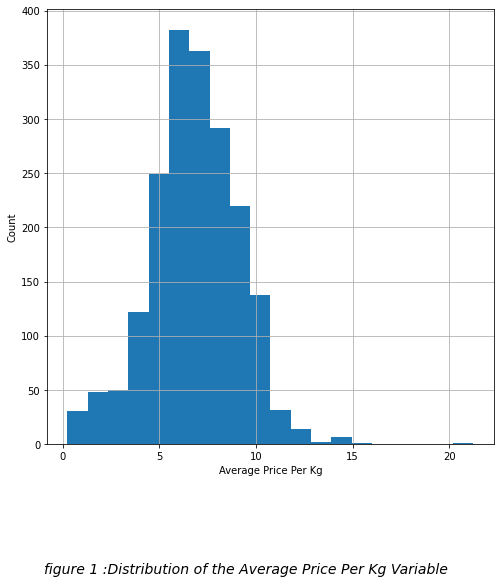

In [223]:
#Plot distribution of average price per kilogram using matplotlib
plt.figure(figsize=(8,8))
plt.hist(df_training_dataset['avg_price_per_kg'],bins=20)
plt.xlabel('Average Price Per Kg')
plt.ylabel('Count')
plt.grid(True)
plt.figtext(0.12, -0.1, 'figure 1 :Distribution of the Average Price Per Kg Variable', horizontalalignment='left',fontsize = 14,style='italic')
plt.show

Taking a look at the histogram, we can see that very few Golden Apples are priced below 2, most of the apples sold between 6 and 7, and very few Golden Apples sold for above 11.

[Also taking a look at the distribution of the Average Price, we can see that:](#dist)  
- Deviate from the normal distribution,
- have appreciable positive skewness and
- show peakedness.

Let's get a body measure for the whole dataset and Average Price Per Kilogram

In [224]:
df_training_dataset.kurtosis()

Weight_Kg            9.109698
Low_Price           17.073369
High_Price          13.630768
Sales_Total         24.200524
Total_Qty_Sold      32.338123
Total_Kg_Sold       45.153801
Stock_On_Hand       14.671224
avg_price_per_kg     1.042921
dtype: float64

All features in the dataset present with great kurtosis (>3 for the normal distribution), indicating that we have a lot of outliers in these features
- Kurtosis is a statistical measure that defines how heavily the tails of a distribution differ from the tails of a normal distribution.
- Kurtosis identifies whether the tailes of a given distribution contain extreme values.

In [225]:
df_training_dataset.skew()

Weight_Kg           3.328254
Low_Price           4.222672
High_Price          3.828819
Sales_Total         4.250317
Total_Qty_Sold      4.445169
Total_Kg_Sold       5.529586
Stock_On_Hand       3.391815
avg_price_per_kg    0.082452
dtype: float64

All features present a very large positive skew.
- Positive skew (or right-skew) distribution is a type of distribution in which most values are clustered around the left tail of the distribution while the right tail of the distribution is longer.

In [226]:
#Skewness and Kurtosis
print("Skewness: %f" % df_training_dataset['avg_price_per_kg'].skew())
print("Kurtosis: %f" % df_training_dataset['avg_price_per_kg'].kurt())


Skewness: 0.082452
Kurtosis: 1.042921


#### Density distribion of average price per kg
- Analysis of the skewness of target variable (`avg_price_per_kg`), shows that the distribution below has a moderate positive skew. 
- Analysis of the target variable kurtosis shows that the tails are slighlty heavier and the distribution is slighlty peaked than a normal distribution.

We will only be working with some of the variables — let’s filter and store their names in two lists called `numerical` and `catagorical`, then redefine our `df_training_dataset` DataFrame to contain only these variables:


In [227]:
numeriacal=['Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold', 'Total_Kg_Sold', 'Stock_On_Hand', 'Weight_Kg']
catagorical=['Province','Container','Size_Grade']

### Analyzing Categorical Variables


Categorical variables are those for which the values are labeled categories. The values, distribution, and dispersion of categorical variables are best understood with **bar plots**. Let’s analyze the (`Province`) variable. `seaborn` gives us a very simple method to show the counts of observations in each category: the `countplot`.


Text(0.12, -0.1, 'figure 3 :The bars in this plot represent the number of Apples produced for each province')

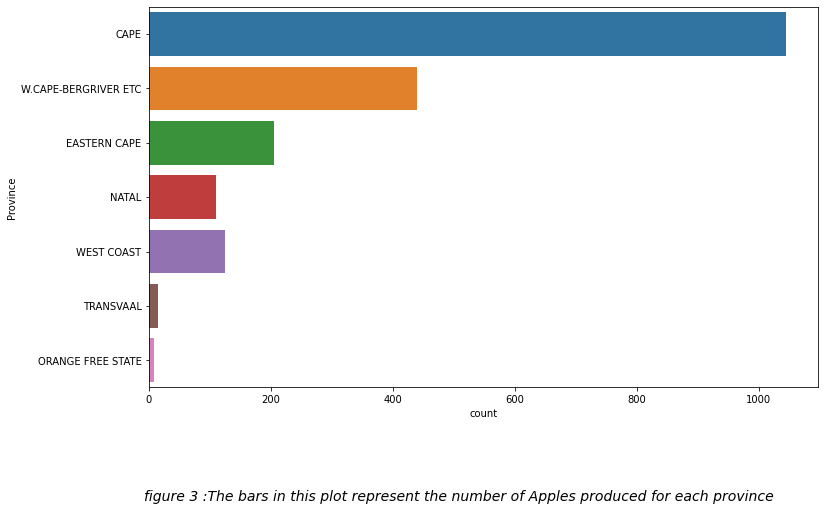

In [228]:
plt.figure(figsize= (12,7))
sns.countplot(y='Province', data=df_training_dataset)
plt.figtext(0.12, -0.1, 'figure 3 :The bars in this plot represent the number of Apples produced for each province', horizontalalignment='left',fontsize = 14,style='italic')


From the visualization, we can easily see that most Golden Delicious Apples were produced in the `CAPE` Province, and very few were produced in `TRANSVAAL` and `ORANGE FREE STATE` provinces.

The reason why Cape provinces produce more Golden Delicious Apple it is because they are the largest traditional apple production region and accounts for more than half of the apple production in the country.The biggest apple production regions are around the Western Cape towns of Ceres, Wolseley, Elgin and Villiersdorp. The Langkloof region is along South Africa’s Southern Cape and spans the border between the Western and the Eastern Cape and produces around 20% of the country’s apples. There are also small but growing production areas further north in the country in the Free State, Mpumalanga and Limpopo Provinces as we can see that Orange Free State has the least of apples production.



Then we iterate over every categorical variable to create a countplot with seaborn:

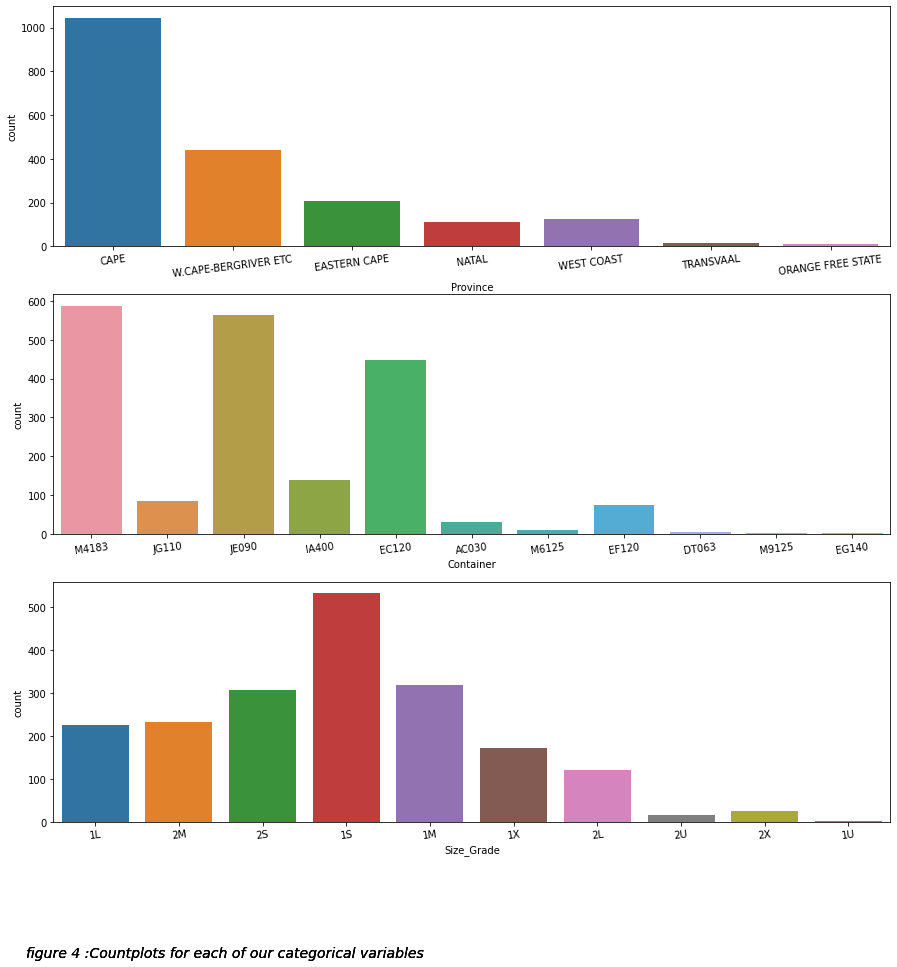

In [229]:
#Countplots for our categorical variables
fig, ax = plt.subplots(3, 1, figsize=(15,15))
for variable, subplot in zip(catagorical, ax.flatten()):
    sns.countplot(df_training_dataset[variable], ax=subplot)
    plt.figtext(0.10, -0.0, 'figure 4 :Countplots for each of our categorical variables', horizontalalignment='left',fontsize = 14,style='italic')
    for label in subplot.get_xticklabels():
        label.set_rotation(7)


As with our numerical variable histograms, we can gather lots of information from this visual-As previously seen that lots af apples are produced from Cape province and largest container for the apples is M4183 ith the size grade of 1S

### Analyzing Relationships Between Numerical and Categorical Variables


The box-and-whisker plot is commonly used for visualizing relationships between numerical variables and categorical variables, and **complex conditional plots** are used to visualize conditional relationships.


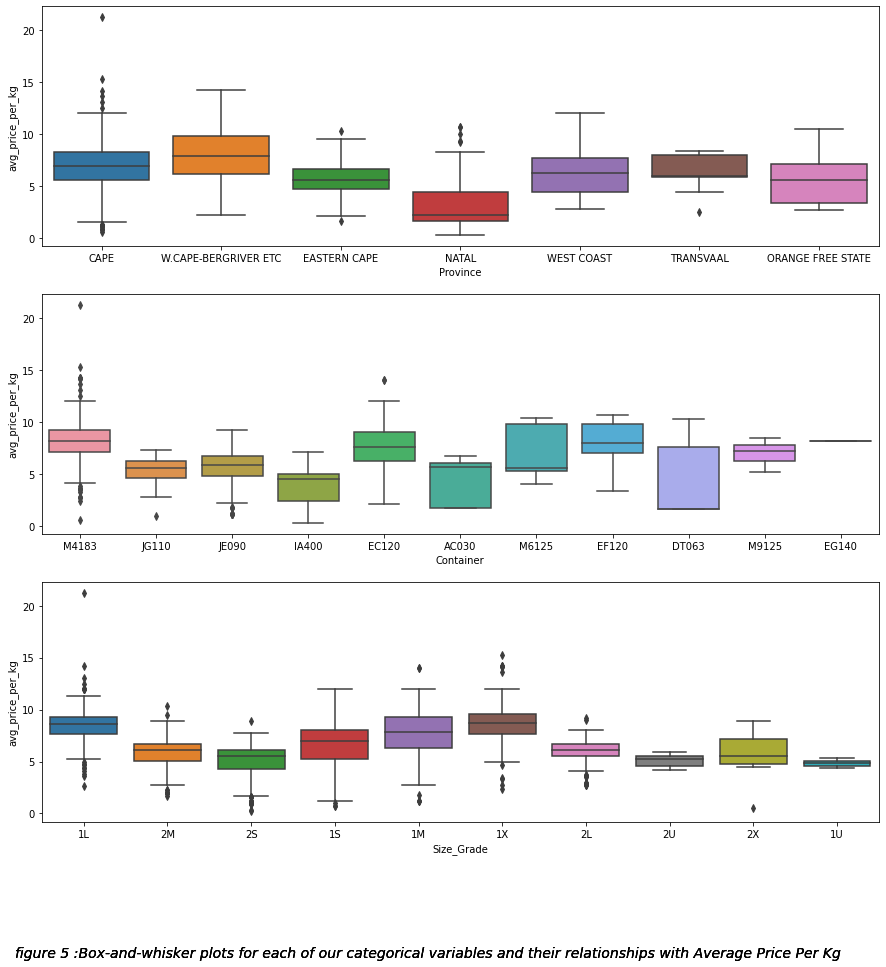

In [230]:
fig, ax = plt.subplots(3, 1, figsize=(15, 15))
for var, subplot in zip(catagorical, ax.flatten()):
    sns.boxplot(x=var, y='avg_price_per_kg', data=df_training_dataset, ax=subplot)
    plt.figtext(0.10, -0.0, 'figure 5 :Box-and-whisker plots for each of our categorical variables and their relationships with Average Price Per Kg', horizontalalignment='left',fontsize = 14,style='italic')


Here, we have iterated through every subplot to produce the visualization between all categorical variables and the avg_price_per_kg.

We can see that Apples produced from W.CAPE-BERGRIVER ETC province classification have a higher average price per kilogram than other province classifications, as do apples with M4183 container, and apples with 1L Size_grade. We can also see that there is significant difference variance in average price per Kilogram between apples with different all three categorical variables.


### Bivariate analysis

**Correlation Analysis** is statistical method that is used to discover if there is a relationship between two variables/ bivariet datasets, and how strong that relationship may be.


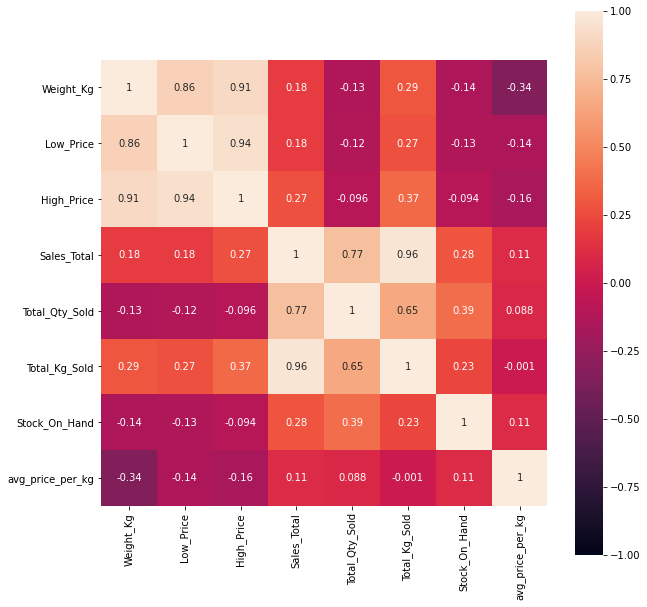

In [231]:
#Heat map for all numerical values in the dataset
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_training_dataset.corr(), vmin=-1, vmax=1, square=True, annot=True);


Already we can see evidence of multicollinearity between some variables.  We would have to keep a watchful eye on these relationships.  None of the predictors have a relationship (positive or negative) with our response variable.  Perhaps once we deal with the outliers this will change.

Looking at the **Correlation coefficients** whose magnitude are between 0.5 and 0.7 indicate variables which can be considered moderately correlated. **Correlation coefficients** whose magnitude are between 0.3 and 0.5 indicate variables which have a low correlation. values from 0 to 0.25 or from 0 to -0.25 are commonly regarded to indicate the absence of correlation


## 6.Spliting the data
<a id='eda'></a>
[Back to table of contents](#toc)

In [251]:
#Splitting data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =  train_test_split(X_standardize,y,test_size=0.2,random_state=42)

## 8. Model training
<a id='train'></a>
[Back to table of contents](#toc)

Before we can classify any new Average price we have to train a model using past avarage price so the model can learn how to classify Prices into their respective variables. We will look into 8 regression models to train:  
1. Lasso
2. ExtraTreesRegressor
3. GradientBoostRegressor
4. XGBoostRegressor
5. RandomForestRegressor
6. AdaBoostRegressor with CatBoost
7. SVM(Support Vector Mechine)

### 1. Lasso

#### The basic concept  
The “LASSO” stands for Least Absolute Shrinkage and Selection Operator. Lasso regression is a regularization technique. It is used over regression methods for a more accurate prediction. This model uses shrinkage. Shrinkage is where data values are shrunk towards a central point as the mean.

- **Pro:** As any regularization method, it can avoid overfitting
         - It can do feature selection.
         - It is fast in terms of inference and fitting.

- **Con:** The model selection result is not intuitive to interpret: for example, why lasso select a feature?


In [323]:
#Initializing the Lasso Regressor 
lasso_reg = Lasso()
#Fitting the Training data to the Lasso regressor
lr1=lasso_reg.fit(X_train,Y_train)


In [324]:
#Predicting for X_test
y_pred =lasso_reg.predict(X_test)
y_pred[:10]

array([6.76784868, 6.76784868, 6.76784868, 6.76784868, 6.76784868,
       6.76784868, 6.76784868, 6.76784868, 6.76784868, 6.76784868])

### 2. ExtraTreesRegressor

#### The basic concept  
An extra-trees regressor. This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

- **Pros**- they are much faster
- **Con**- Extra Trees use the whole original data sample

In [285]:
etr = ExtraTreesRegressor()

etr1 = etr.fit(X_train,Y_train)


In [286]:
y_pred =etr1.predict(X_test)
y_pred[:10]

array([ 8.4869, 10.    ,  4.6903,  5.1261,  5.966 ,  9.9879,  9.501 ,
        5.5911,  6.6596,  5.33  ])

### 3. GradientBoostRegressor

#### The basic concept  
Gradient boosting is a type of machine learning boosting. It relies on the intuition that the best possible next model, when combined with previous models, minimizes the overall prediction error. ... If a small change in the prediction for a case causes no change in error, then next target outcome of the case is zero.

- **Pro:** As an ensemble model, boosting comes with an easy to read and interpret algorithm, making its prediction interpretations easy to handle. The prediction capability is efficient through the use of its clone methods, such as bagging or random forest, and decision trees. Boosting is a resilient method that curbs over-fitting easily.


- **Con:** One disadvantage of boosting is that it is sensitive to outliers since every classifier is obliged to fix the errors in the predecessors. Thus, the method is too dependent on outliers. Another disadvantage is that the method is almost impossible to scale up. This is because every estimator bases its correctness on the previous predictors, thus making the procedure difficult to streamline.



In [288]:
gbr = GradientBoostingRegressor()
gbr1 = gbr.fit(X_train, Y_train)


In [289]:
y_pred =gbr.predict(X_test)
y_pred[:10]

array([8.90903065, 9.77955831, 4.68777431, 4.88117622, 6.00209699,
       9.77955831, 9.54120401, 6.48739269, 6.64221046, 4.96525664])

### 4 . XGBoostRegressor

#### The basic concept  
XGBoost is an implementation of the gradient tree boosting algorithm that is widely recognized for its efficiency and predictive accuracy.

- **Pro:** The user can run a cross-validation after each iteration.
- **Con:** Tree algorithms such as XGBoost and Random Forest can over-fit the data, especially if the trees are too deep with noisy data

In [291]:
xgb = XGBRegressor()
xgb1 = xgb.fit(X_train, Y_train)


In [292]:
y_pred =xgb.predict(X_test)
y_pred[:10]

array([ 8.671829 , 10.020371 ,  4.5546656,  5.29125  ,  5.977992 ,
        9.852263 ,  9.565811 ,  6.189864 ,  6.674516 ,  5.31043  ],
      dtype=float32)

### 5. RandomForestRegressor 

#### The basic concept  
Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

- **Pro:** Robust to outliers.
- Works well with non-linear data.
- Lower risk of overfitting.

- **Con:** Random forests are found to be biased while dealing with categorical variables.


In [296]:
rfr = RandomForestRegressor()
rfr1 = rfr.fit(X_train, Y_train)     


In [297]:
y_pred =rfr1.predict(X_test)
y_pred[:10]

array([ 8.5625, 10.    ,  4.6534,  5.3473,  6.1005, 10.    ,  9.7367,
        5.8934,  6.6809,  5.3007])

### 6. AdaBoostRegressor with CatBoost

#### The basic concept  
An AdaBoost regressor. An AdaBoost [1] regressor is a meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction.

- **Pro:** AdaBoost is like a boon to improve the accuracy of our classification algorithms if used accurately


In [302]:
# define the model 
ada = AdaBoostRegressor(base_estimator = CatBoostRegressor())
# fit the model 
ada1= ada.fit(X_train, Y_train)


Learning rate set to 0.04205
0:	learn: 1.9925809	total: 9.33ms	remaining: 9.32s
1:	learn: 1.9405229	total: 17.7ms	remaining: 8.85s
2:	learn: 1.8872500	total: 26.3ms	remaining: 8.74s
3:	learn: 1.8393753	total: 31.4ms	remaining: 7.83s
4:	learn: 1.7944105	total: 36.4ms	remaining: 7.24s
5:	learn: 1.7478917	total: 41.5ms	remaining: 6.87s
6:	learn: 1.7070638	total: 46.8ms	remaining: 6.64s
7:	learn: 1.6655028	total: 52ms	remaining: 6.45s
8:	learn: 1.6287205	total: 57.2ms	remaining: 6.3s
9:	learn: 1.5942786	total: 62.3ms	remaining: 6.17s
10:	learn: 1.5559983	total: 67.2ms	remaining: 6.04s
11:	learn: 1.5266132	total: 72.1ms	remaining: 5.94s
12:	learn: 1.4926513	total: 77.3ms	remaining: 5.87s
13:	learn: 1.4602553	total: 82.2ms	remaining: 5.79s
14:	learn: 1.4302331	total: 86.9ms	remaining: 5.7s
15:	learn: 1.3992191	total: 91.4ms	remaining: 5.62s
16:	learn: 1.3727190	total: 95.6ms	remaining: 5.53s
17:	learn: 1.3423879	total: 101ms	remaining: 5.49s
18:	learn: 1.3184794	total: 105ms	remaining: 5.41s

188:	learn: 0.4444208	total: 805ms	remaining: 3.45s
189:	learn: 0.4428610	total: 808ms	remaining: 3.44s
190:	learn: 0.4419089	total: 811ms	remaining: 3.43s
191:	learn: 0.4406036	total: 813ms	remaining: 3.42s
192:	learn: 0.4385356	total: 816ms	remaining: 3.41s
193:	learn: 0.4378772	total: 819ms	remaining: 3.4s
194:	learn: 0.4378442	total: 820ms	remaining: 3.38s
195:	learn: 0.4370318	total: 823ms	remaining: 3.38s
196:	learn: 0.4353674	total: 826ms	remaining: 3.37s
197:	learn: 0.4343183	total: 831ms	remaining: 3.37s
198:	learn: 0.4332116	total: 835ms	remaining: 3.36s
199:	learn: 0.4324203	total: 840ms	remaining: 3.36s
200:	learn: 0.4311646	total: 845ms	remaining: 3.36s
201:	learn: 0.4306012	total: 850ms	remaining: 3.36s
202:	learn: 0.4297965	total: 854ms	remaining: 3.35s
203:	learn: 0.4290492	total: 859ms	remaining: 3.35s
204:	learn: 0.4273017	total: 862ms	remaining: 3.34s
205:	learn: 0.4262255	total: 866ms	remaining: 3.34s
206:	learn: 0.4258931	total: 871ms	remaining: 3.34s
207:	learn: 0

383:	learn: 0.2936883	total: 1.62s	remaining: 2.61s
384:	learn: 0.2929680	total: 1.63s	remaining: 2.6s
385:	learn: 0.2928739	total: 1.63s	remaining: 2.59s
386:	learn: 0.2927824	total: 1.63s	remaining: 2.59s
387:	learn: 0.2921265	total: 1.64s	remaining: 2.58s
388:	learn: 0.2917114	total: 1.64s	remaining: 2.58s
389:	learn: 0.2910794	total: 1.64s	remaining: 2.57s
390:	learn: 0.2905186	total: 1.65s	remaining: 2.56s
391:	learn: 0.2900456	total: 1.65s	remaining: 2.56s
392:	learn: 0.2894498	total: 1.66s	remaining: 2.56s
393:	learn: 0.2889926	total: 1.66s	remaining: 2.55s
394:	learn: 0.2884461	total: 1.66s	remaining: 2.55s
395:	learn: 0.2879663	total: 1.67s	remaining: 2.54s
396:	learn: 0.2871498	total: 1.67s	remaining: 2.54s
397:	learn: 0.2870618	total: 1.68s	remaining: 2.54s
398:	learn: 0.2867775	total: 1.68s	remaining: 2.53s
399:	learn: 0.2863557	total: 1.69s	remaining: 2.53s
400:	learn: 0.2859830	total: 1.69s	remaining: 2.53s
401:	learn: 0.2855356	total: 1.7s	remaining: 2.52s
402:	learn: 0.

580:	learn: 0.2267031	total: 2.45s	remaining: 1.76s
581:	learn: 0.2264655	total: 2.45s	remaining: 1.76s
582:	learn: 0.2261870	total: 2.45s	remaining: 1.75s
583:	learn: 0.2258394	total: 2.46s	remaining: 1.75s
584:	learn: 0.2256787	total: 2.46s	remaining: 1.74s
585:	learn: 0.2255821	total: 2.46s	remaining: 1.74s
586:	learn: 0.2252577	total: 2.46s	remaining: 1.73s
587:	learn: 0.2249378	total: 2.47s	remaining: 1.73s
588:	learn: 0.2248915	total: 2.47s	remaining: 1.72s
589:	learn: 0.2244691	total: 2.48s	remaining: 1.72s
590:	learn: 0.2244400	total: 2.48s	remaining: 1.72s
591:	learn: 0.2242361	total: 2.48s	remaining: 1.71s
592:	learn: 0.2238871	total: 2.49s	remaining: 1.71s
593:	learn: 0.2236637	total: 2.49s	remaining: 1.7s
594:	learn: 0.2233692	total: 2.5s	remaining: 1.7s
595:	learn: 0.2231625	total: 2.5s	remaining: 1.7s
596:	learn: 0.2229378	total: 2.51s	remaining: 1.69s
597:	learn: 0.2227306	total: 2.51s	remaining: 1.69s
598:	learn: 0.2224953	total: 2.52s	remaining: 1.68s
599:	learn: 0.222

771:	learn: 0.1855666	total: 3.26s	remaining: 963ms
772:	learn: 0.1853038	total: 3.26s	remaining: 958ms
773:	learn: 0.1850856	total: 3.27s	remaining: 954ms
774:	learn: 0.1849143	total: 3.27s	remaining: 949ms
775:	learn: 0.1847736	total: 3.27s	remaining: 945ms
776:	learn: 0.1844070	total: 3.27s	remaining: 940ms
777:	learn: 0.1840983	total: 3.28s	remaining: 935ms
778:	learn: 0.1837939	total: 3.28s	remaining: 931ms
779:	learn: 0.1835533	total: 3.29s	remaining: 927ms
780:	learn: 0.1833094	total: 3.29s	remaining: 922ms
781:	learn: 0.1831966	total: 3.29s	remaining: 918ms
782:	learn: 0.1830286	total: 3.3s	remaining: 914ms
783:	learn: 0.1828347	total: 3.3s	remaining: 910ms
784:	learn: 0.1827236	total: 3.31s	remaining: 906ms
785:	learn: 0.1825272	total: 3.31s	remaining: 902ms
786:	learn: 0.1823290	total: 3.32s	remaining: 898ms
787:	learn: 0.1821043	total: 3.32s	remaining: 893ms
788:	learn: 0.1820075	total: 3.33s	remaining: 889ms
789:	learn: 0.1818759	total: 3.33s	remaining: 885ms
790:	learn: 0.

931:	learn: 0.1585645	total: 3.92s	remaining: 286ms
932:	learn: 0.1583946	total: 3.92s	remaining: 282ms
933:	learn: 0.1581633	total: 3.92s	remaining: 277ms
934:	learn: 0.1580324	total: 3.93s	remaining: 273ms
935:	learn: 0.1578447	total: 3.93s	remaining: 269ms
936:	learn: 0.1577033	total: 3.93s	remaining: 264ms
937:	learn: 0.1576222	total: 3.94s	remaining: 260ms
938:	learn: 0.1574620	total: 3.94s	remaining: 256ms
939:	learn: 0.1573067	total: 3.94s	remaining: 252ms
940:	learn: 0.1573003	total: 3.95s	remaining: 248ms
941:	learn: 0.1570637	total: 3.95s	remaining: 243ms
942:	learn: 0.1569825	total: 3.96s	remaining: 239ms
943:	learn: 0.1568238	total: 3.96s	remaining: 235ms
944:	learn: 0.1566443	total: 3.97s	remaining: 231ms
945:	learn: 0.1564812	total: 3.97s	remaining: 227ms
946:	learn: 0.1564749	total: 3.98s	remaining: 223ms
947:	learn: 0.1562905	total: 3.98s	remaining: 218ms
948:	learn: 0.1562132	total: 3.98s	remaining: 214ms
949:	learn: 0.1560992	total: 3.99s	remaining: 210ms
950:	learn: 

111:	learn: 0.6401648	total: 489ms	remaining: 3.87s
112:	learn: 0.6375428	total: 491ms	remaining: 3.86s
113:	learn: 0.6341928	total: 494ms	remaining: 3.84s
114:	learn: 0.6316514	total: 497ms	remaining: 3.82s
115:	learn: 0.6279285	total: 500ms	remaining: 3.81s
116:	learn: 0.6252329	total: 502ms	remaining: 3.79s
117:	learn: 0.6229994	total: 505ms	remaining: 3.78s
118:	learn: 0.6215525	total: 508ms	remaining: 3.76s
119:	learn: 0.6175748	total: 513ms	remaining: 3.76s
120:	learn: 0.6146289	total: 518ms	remaining: 3.76s
121:	learn: 0.6120395	total: 523ms	remaining: 3.76s
122:	learn: 0.6098098	total: 527ms	remaining: 3.76s
123:	learn: 0.6064303	total: 532ms	remaining: 3.75s
124:	learn: 0.6045347	total: 536ms	remaining: 3.75s
125:	learn: 0.6008680	total: 541ms	remaining: 3.75s
126:	learn: 0.5975068	total: 544ms	remaining: 3.74s
127:	learn: 0.5950209	total: 549ms	remaining: 3.74s
128:	learn: 0.5922245	total: 553ms	remaining: 3.73s
129:	learn: 0.5900720	total: 557ms	remaining: 3.73s
130:	learn: 

271:	learn: 0.3914310	total: 1.14s	remaining: 3.04s
272:	learn: 0.3895956	total: 1.14s	remaining: 3.04s
273:	learn: 0.3889180	total: 1.14s	remaining: 3.03s
274:	learn: 0.3873147	total: 1.15s	remaining: 3.02s
275:	learn: 0.3855315	total: 1.15s	remaining: 3.01s
276:	learn: 0.3847244	total: 1.15s	remaining: 3s
277:	learn: 0.3840113	total: 1.15s	remaining: 3s
278:	learn: 0.3827084	total: 1.16s	remaining: 2.99s
279:	learn: 0.3816337	total: 1.16s	remaining: 2.98s
280:	learn: 0.3811758	total: 1.17s	remaining: 2.98s
281:	learn: 0.3796205	total: 1.17s	remaining: 2.98s
282:	learn: 0.3785311	total: 1.18s	remaining: 2.98s
283:	learn: 0.3778459	total: 1.18s	remaining: 2.97s
284:	learn: 0.3773281	total: 1.18s	remaining: 2.97s
285:	learn: 0.3767266	total: 1.19s	remaining: 2.96s
286:	learn: 0.3756134	total: 1.19s	remaining: 2.96s
287:	learn: 0.3752779	total: 1.2s	remaining: 2.96s
288:	learn: 0.3742366	total: 1.2s	remaining: 2.95s
289:	learn: 0.3722366	total: 1.21s	remaining: 2.95s
290:	learn: 0.371354

470:	learn: 0.2632491	total: 1.96s	remaining: 2.2s
471:	learn: 0.2625325	total: 1.96s	remaining: 2.19s
472:	learn: 0.2622225	total: 1.96s	remaining: 2.19s
473:	learn: 0.2617481	total: 1.97s	remaining: 2.18s
474:	learn: 0.2614949	total: 1.97s	remaining: 2.18s
475:	learn: 0.2606453	total: 1.97s	remaining: 2.17s
476:	learn: 0.2604630	total: 1.98s	remaining: 2.17s
477:	learn: 0.2601276	total: 1.98s	remaining: 2.16s
478:	learn: 0.2596654	total: 1.98s	remaining: 2.15s
479:	learn: 0.2595230	total: 1.99s	remaining: 2.15s
480:	learn: 0.2593475	total: 1.99s	remaining: 2.15s
481:	learn: 0.2591718	total: 1.99s	remaining: 2.14s
482:	learn: 0.2588383	total: 2s	remaining: 2.14s
483:	learn: 0.2583433	total: 2s	remaining: 2.13s
484:	learn: 0.2578558	total: 2.01s	remaining: 2.13s
485:	learn: 0.2576805	total: 2.01s	remaining: 2.13s
486:	learn: 0.2570636	total: 2.02s	remaining: 2.12s
487:	learn: 0.2567609	total: 2.02s	remaining: 2.12s
488:	learn: 0.2564490	total: 2.02s	remaining: 2.12s
489:	learn: 0.25606

667:	learn: 0.2011050	total: 2.77s	remaining: 1.38s
668:	learn: 0.2008776	total: 2.78s	remaining: 1.38s
669:	learn: 0.2006120	total: 2.78s	remaining: 1.37s
670:	learn: 0.2003093	total: 2.79s	remaining: 1.37s
671:	learn: 0.2002840	total: 2.79s	remaining: 1.36s
672:	learn: 0.2000500	total: 2.79s	remaining: 1.36s
673:	learn: 0.1998050	total: 2.8s	remaining: 1.35s
674:	learn: 0.1994684	total: 2.8s	remaining: 1.35s
675:	learn: 0.1990207	total: 2.8s	remaining: 1.34s
676:	learn: 0.1988994	total: 2.81s	remaining: 1.34s
677:	learn: 0.1986292	total: 2.81s	remaining: 1.33s
678:	learn: 0.1984113	total: 2.82s	remaining: 1.33s
679:	learn: 0.1981793	total: 2.82s	remaining: 1.33s
680:	learn: 0.1981544	total: 2.82s	remaining: 1.32s
681:	learn: 0.1977478	total: 2.83s	remaining: 1.32s
682:	learn: 0.1974043	total: 2.83s	remaining: 1.31s
683:	learn: 0.1970672	total: 2.84s	remaining: 1.31s
684:	learn: 0.1967501	total: 2.84s	remaining: 1.31s
685:	learn: 0.1965299	total: 2.85s	remaining: 1.3s
686:	learn: 0.19

864:	learn: 0.1619527	total: 3.6s	remaining: 561ms
865:	learn: 0.1617414	total: 3.6s	remaining: 557ms
866:	learn: 0.1616169	total: 3.6s	remaining: 553ms
867:	learn: 0.1614398	total: 3.6s	remaining: 548ms
868:	learn: 0.1612687	total: 3.61s	remaining: 544ms
869:	learn: 0.1611439	total: 3.61s	remaining: 539ms
870:	learn: 0.1610469	total: 3.61s	remaining: 535ms
871:	learn: 0.1608749	total: 3.62s	remaining: 531ms
872:	learn: 0.1608588	total: 3.62s	remaining: 527ms
873:	learn: 0.1607273	total: 3.62s	remaining: 523ms
874:	learn: 0.1604941	total: 3.63s	remaining: 519ms
875:	learn: 0.1603082	total: 3.63s	remaining: 514ms
876:	learn: 0.1601310	total: 3.64s	remaining: 510ms
877:	learn: 0.1600467	total: 3.64s	remaining: 506ms
878:	learn: 0.1598097	total: 3.65s	remaining: 502ms
879:	learn: 0.1595899	total: 3.65s	remaining: 498ms
880:	learn: 0.1594541	total: 3.66s	remaining: 494ms
881:	learn: 0.1591817	total: 3.66s	remaining: 490ms
882:	learn: 0.1589951	total: 3.67s	remaining: 486ms
883:	learn: 0.15

27:	learn: 1.2256456	total: 166ms	remaining: 5.77s
28:	learn: 1.2065574	total: 169ms	remaining: 5.67s
29:	learn: 1.1873606	total: 172ms	remaining: 5.57s
30:	learn: 1.1731675	total: 175ms	remaining: 5.47s
31:	learn: 1.1597636	total: 178ms	remaining: 5.38s
32:	learn: 1.1457523	total: 181ms	remaining: 5.29s
33:	learn: 1.1358797	total: 184ms	remaining: 5.22s
34:	learn: 1.1231644	total: 187ms	remaining: 5.15s
35:	learn: 1.1100834	total: 191ms	remaining: 5.12s
36:	learn: 1.0985896	total: 196ms	remaining: 5.1s
37:	learn: 1.0848156	total: 200ms	remaining: 5.07s
38:	learn: 1.0740627	total: 204ms	remaining: 5.04s
39:	learn: 1.0623905	total: 209ms	remaining: 5.02s
40:	learn: 1.0562721	total: 211ms	remaining: 4.94s
41:	learn: 1.0468174	total: 216ms	remaining: 4.92s
42:	learn: 1.0370049	total: 221ms	remaining: 4.92s
43:	learn: 1.0295311	total: 226ms	remaining: 4.9s
44:	learn: 1.0224885	total: 230ms	remaining: 4.89s
45:	learn: 1.0130769	total: 235ms	remaining: 4.87s
46:	learn: 1.0058546	total: 239ms

221:	learn: 0.4759269	total: 990ms	remaining: 3.47s
222:	learn: 0.4746718	total: 994ms	remaining: 3.46s
223:	learn: 0.4738260	total: 997ms	remaining: 3.45s
224:	learn: 0.4731216	total: 1000ms	remaining: 3.44s
225:	learn: 0.4722047	total: 1s	remaining: 3.43s
226:	learn: 0.4707181	total: 1s	remaining: 3.42s
227:	learn: 0.4694770	total: 1.01s	remaining: 3.41s
228:	learn: 0.4685802	total: 1.01s	remaining: 3.4s
229:	learn: 0.4678068	total: 1.01s	remaining: 3.39s
230:	learn: 0.4669774	total: 1.02s	remaining: 3.38s
231:	learn: 0.4655595	total: 1.02s	remaining: 3.38s
232:	learn: 0.4647075	total: 1.02s	remaining: 3.37s
233:	learn: 0.4640808	total: 1.03s	remaining: 3.37s
234:	learn: 0.4629506	total: 1.03s	remaining: 3.36s
235:	learn: 0.4618730	total: 1.04s	remaining: 3.35s
236:	learn: 0.4609044	total: 1.04s	remaining: 3.35s
237:	learn: 0.4599356	total: 1.04s	remaining: 3.35s
238:	learn: 0.4592706	total: 1.05s	remaining: 3.34s
239:	learn: 0.4573290	total: 1.05s	remaining: 3.33s
240:	learn: 0.4556

381:	learn: 0.3360268	total: 1.64s	remaining: 2.65s
382:	learn: 0.3349268	total: 1.64s	remaining: 2.65s
383:	learn: 0.3342852	total: 1.65s	remaining: 2.64s
384:	learn: 0.3338941	total: 1.65s	remaining: 2.64s
385:	learn: 0.3338182	total: 1.65s	remaining: 2.63s
386:	learn: 0.3333853	total: 1.66s	remaining: 2.62s
387:	learn: 0.3324734	total: 1.66s	remaining: 2.62s
388:	learn: 0.3316091	total: 1.66s	remaining: 2.61s
389:	learn: 0.3308624	total: 1.67s	remaining: 2.6s
390:	learn: 0.3298060	total: 1.67s	remaining: 2.6s
391:	learn: 0.3289087	total: 1.68s	remaining: 2.6s
392:	learn: 0.3284353	total: 1.68s	remaining: 2.6s
393:	learn: 0.3278777	total: 1.68s	remaining: 2.59s
394:	learn: 0.3277747	total: 1.69s	remaining: 2.58s
395:	learn: 0.3268157	total: 1.69s	remaining: 2.58s
396:	learn: 0.3264596	total: 1.7s	remaining: 2.58s
397:	learn: 0.3257646	total: 1.7s	remaining: 2.57s
398:	learn: 0.3256661	total: 1.71s	remaining: 2.57s
399:	learn: 0.3252742	total: 1.71s	remaining: 2.56s
400:	learn: 0.3242

577:	learn: 0.2407202	total: 2.46s	remaining: 1.8s
578:	learn: 0.2406758	total: 2.46s	remaining: 1.79s
579:	learn: 0.2401850	total: 2.47s	remaining: 1.79s
580:	learn: 0.2401487	total: 2.47s	remaining: 1.78s
581:	learn: 0.2399052	total: 2.47s	remaining: 1.77s
582:	learn: 0.2396535	total: 2.47s	remaining: 1.77s
583:	learn: 0.2392479	total: 2.48s	remaining: 1.76s
584:	learn: 0.2387824	total: 2.48s	remaining: 1.76s
585:	learn: 0.2386286	total: 2.48s	remaining: 1.75s
586:	learn: 0.2382017	total: 2.49s	remaining: 1.75s
587:	learn: 0.2375195	total: 2.49s	remaining: 1.75s
588:	learn: 0.2371904	total: 2.5s	remaining: 1.74s
589:	learn: 0.2369360	total: 2.5s	remaining: 1.74s
590:	learn: 0.2365979	total: 2.5s	remaining: 1.73s
591:	learn: 0.2363057	total: 2.51s	remaining: 1.73s
592:	learn: 0.2360654	total: 2.51s	remaining: 1.72s
593:	learn: 0.2357747	total: 2.52s	remaining: 1.72s
594:	learn: 0.2355172	total: 2.52s	remaining: 1.72s
595:	learn: 0.2354839	total: 2.52s	remaining: 1.71s
596:	learn: 0.23

736:	learn: 0.1967206	total: 3.11s	remaining: 1.11s
737:	learn: 0.1966513	total: 3.12s	remaining: 1.11s
738:	learn: 0.1963172	total: 3.12s	remaining: 1.1s
739:	learn: 0.1959105	total: 3.12s	remaining: 1.1s
740:	learn: 0.1955897	total: 3.12s	remaining: 1.09s
741:	learn: 0.1953149	total: 3.13s	remaining: 1.09s
742:	learn: 0.1952969	total: 3.13s	remaining: 1.08s
743:	learn: 0.1949401	total: 3.13s	remaining: 1.08s
744:	learn: 0.1947749	total: 3.14s	remaining: 1.07s
745:	learn: 0.1945332	total: 3.14s	remaining: 1.07s
746:	learn: 0.1943336	total: 3.15s	remaining: 1.06s
747:	learn: 0.1941823	total: 3.15s	remaining: 1.06s
748:	learn: 0.1940614	total: 3.15s	remaining: 1.06s
749:	learn: 0.1937544	total: 3.16s	remaining: 1.05s
750:	learn: 0.1935556	total: 3.16s	remaining: 1.05s
751:	learn: 0.1933387	total: 3.17s	remaining: 1.04s
752:	learn: 0.1930637	total: 3.17s	remaining: 1.04s
753:	learn: 0.1926493	total: 3.18s	remaining: 1.04s
754:	learn: 0.1924229	total: 3.18s	remaining: 1.03s
755:	learn: 0.

931:	learn: 0.1554702	total: 3.93s	remaining: 287ms
932:	learn: 0.1551872	total: 3.93s	remaining: 282ms
933:	learn: 0.1549746	total: 3.94s	remaining: 278ms
934:	learn: 0.1548655	total: 3.94s	remaining: 274ms
935:	learn: 0.1548103	total: 3.94s	remaining: 270ms
936:	learn: 0.1546799	total: 3.94s	remaining: 265ms
937:	learn: 0.1545221	total: 3.95s	remaining: 261ms
938:	learn: 0.1543312	total: 3.95s	remaining: 257ms
939:	learn: 0.1541211	total: 3.95s	remaining: 252ms
940:	learn: 0.1538403	total: 3.96s	remaining: 248ms
941:	learn: 0.1536524	total: 3.96s	remaining: 244ms
942:	learn: 0.1534629	total: 3.97s	remaining: 240ms
943:	learn: 0.1532893	total: 3.97s	remaining: 236ms
944:	learn: 0.1530922	total: 3.98s	remaining: 231ms
945:	learn: 0.1529275	total: 3.98s	remaining: 227ms
946:	learn: 0.1527569	total: 3.98s	remaining: 223ms
947:	learn: 0.1525142	total: 3.99s	remaining: 219ms
948:	learn: 0.1523063	total: 3.99s	remaining: 215ms
949:	learn: 0.1521729	total: 4s	remaining: 210ms
950:	learn: 0.1

109:	learn: 0.6841203	total: 492ms	remaining: 3.98s
110:	learn: 0.6820263	total: 495ms	remaining: 3.96s
111:	learn: 0.6800054	total: 498ms	remaining: 3.94s
112:	learn: 0.6757697	total: 500ms	remaining: 3.92s
113:	learn: 0.6746967	total: 503ms	remaining: 3.91s
114:	learn: 0.6720703	total: 505ms	remaining: 3.89s
115:	learn: 0.6694653	total: 508ms	remaining: 3.87s
116:	learn: 0.6661715	total: 511ms	remaining: 3.85s
117:	learn: 0.6634821	total: 513ms	remaining: 3.83s
118:	learn: 0.6609905	total: 517ms	remaining: 3.83s
119:	learn: 0.6567474	total: 521ms	remaining: 3.82s
120:	learn: 0.6549482	total: 525ms	remaining: 3.81s
121:	learn: 0.6539439	total: 529ms	remaining: 3.81s
122:	learn: 0.6516768	total: 533ms	remaining: 3.8s
123:	learn: 0.6496882	total: 538ms	remaining: 3.8s
124:	learn: 0.6478056	total: 542ms	remaining: 3.79s
125:	learn: 0.6455156	total: 546ms	remaining: 3.79s
126:	learn: 0.6428788	total: 550ms	remaining: 3.78s
127:	learn: 0.6406622	total: 554ms	remaining: 3.77s
128:	learn: 0.

269:	learn: 0.4294522	total: 1.13s	remaining: 3.06s
270:	learn: 0.4272201	total: 1.13s	remaining: 3.05s
271:	learn: 0.4257986	total: 1.14s	remaining: 3.04s
272:	learn: 0.4251817	total: 1.14s	remaining: 3.03s
273:	learn: 0.4238478	total: 1.14s	remaining: 3.02s
274:	learn: 0.4231483	total: 1.14s	remaining: 3.02s
275:	learn: 0.4213283	total: 1.15s	remaining: 3.01s
276:	learn: 0.4195146	total: 1.15s	remaining: 3s
277:	learn: 0.4192414	total: 1.15s	remaining: 3s
278:	learn: 0.4177404	total: 1.16s	remaining: 2.99s
279:	learn: 0.4169283	total: 1.16s	remaining: 2.99s
280:	learn: 0.4166995	total: 1.17s	remaining: 2.99s
281:	learn: 0.4155836	total: 1.17s	remaining: 2.98s
282:	learn: 0.4149068	total: 1.18s	remaining: 2.98s
283:	learn: 0.4146420	total: 1.18s	remaining: 2.98s
284:	learn: 0.4132253	total: 1.18s	remaining: 2.97s
285:	learn: 0.4124462	total: 1.19s	remaining: 2.96s
286:	learn: 0.4115363	total: 1.19s	remaining: 2.96s
287:	learn: 0.4100110	total: 1.2s	remaining: 2.95s
288:	learn: 0.40843

429:	learn: 0.3113864	total: 1.79s	remaining: 2.38s
430:	learn: 0.3103509	total: 1.8s	remaining: 2.37s
431:	learn: 0.3101486	total: 1.8s	remaining: 2.37s
432:	learn: 0.3093422	total: 1.8s	remaining: 2.36s
433:	learn: 0.3086724	total: 1.8s	remaining: 2.35s
434:	learn: 0.3081874	total: 1.81s	remaining: 2.35s
435:	learn: 0.3072300	total: 1.81s	remaining: 2.34s
436:	learn: 0.3067203	total: 1.81s	remaining: 2.34s
437:	learn: 0.3060456	total: 1.82s	remaining: 2.33s
438:	learn: 0.3055095	total: 1.82s	remaining: 2.33s
439:	learn: 0.3047535	total: 1.83s	remaining: 2.33s
440:	learn: 0.3039181	total: 1.83s	remaining: 2.32s
441:	learn: 0.3030263	total: 1.84s	remaining: 2.32s
442:	learn: 0.3024718	total: 1.84s	remaining: 2.31s
443:	learn: 0.3015111	total: 1.85s	remaining: 2.31s
444:	learn: 0.3006076	total: 1.85s	remaining: 2.31s
445:	learn: 0.3002494	total: 1.85s	remaining: 2.3s
446:	learn: 0.2996311	total: 1.86s	remaining: 2.3s
447:	learn: 0.2989195	total: 1.86s	remaining: 2.3s
448:	learn: 0.29830

589:	learn: 0.2381902	total: 2.44s	remaining: 1.69s
590:	learn: 0.2377676	total: 2.44s	remaining: 1.69s
591:	learn: 0.2374410	total: 2.44s	remaining: 1.69s
592:	learn: 0.2371483	total: 2.45s	remaining: 1.68s
593:	learn: 0.2369661	total: 2.45s	remaining: 1.68s
594:	learn: 0.2366346	total: 2.45s	remaining: 1.67s
595:	learn: 0.2362807	total: 2.46s	remaining: 1.67s
596:	learn: 0.2358219	total: 2.46s	remaining: 1.66s
597:	learn: 0.2354774	total: 2.46s	remaining: 1.66s
598:	learn: 0.2354546	total: 2.47s	remaining: 1.65s
599:	learn: 0.2351330	total: 2.47s	remaining: 1.65s
600:	learn: 0.2351187	total: 2.48s	remaining: 1.64s
601:	learn: 0.2348213	total: 2.48s	remaining: 1.64s
602:	learn: 0.2348033	total: 2.48s	remaining: 1.64s
603:	learn: 0.2343021	total: 2.49s	remaining: 1.63s
604:	learn: 0.2338380	total: 2.49s	remaining: 1.63s
605:	learn: 0.2333725	total: 2.5s	remaining: 1.62s
606:	learn: 0.2329432	total: 2.5s	remaining: 1.62s
607:	learn: 0.2324887	total: 2.5s	remaining: 1.61s
608:	learn: 0.2

790:	learn: 0.1864364	total: 3.27s	remaining: 866ms
791:	learn: 0.1863195	total: 3.28s	remaining: 861ms
792:	learn: 0.1861148	total: 3.28s	remaining: 857ms
793:	learn: 0.1857901	total: 3.29s	remaining: 853ms
794:	learn: 0.1855656	total: 3.29s	remaining: 848ms
795:	learn: 0.1854912	total: 3.29s	remaining: 844ms
796:	learn: 0.1850703	total: 3.29s	remaining: 839ms
797:	learn: 0.1847144	total: 3.3s	remaining: 835ms
798:	learn: 0.1844428	total: 3.3s	remaining: 830ms
799:	learn: 0.1844318	total: 3.3s	remaining: 826ms
800:	learn: 0.1842255	total: 3.31s	remaining: 822ms
801:	learn: 0.1840946	total: 3.31s	remaining: 818ms
802:	learn: 0.1837927	total: 3.31s	remaining: 813ms
803:	learn: 0.1835208	total: 3.32s	remaining: 809ms
804:	learn: 0.1833054	total: 3.32s	remaining: 805ms
805:	learn: 0.1832861	total: 3.33s	remaining: 801ms
806:	learn: 0.1829415	total: 3.33s	remaining: 797ms
807:	learn: 0.1829059	total: 3.34s	remaining: 793ms
808:	learn: 0.1825929	total: 3.34s	remaining: 789ms
809:	learn: 0.1

952:	learn: 0.1554843	total: 3.94s	remaining: 194ms
953:	learn: 0.1553490	total: 3.95s	remaining: 190ms
954:	learn: 0.1552506	total: 3.95s	remaining: 186ms
955:	learn: 0.1550229	total: 3.95s	remaining: 182ms
956:	learn: 0.1548612	total: 3.96s	remaining: 178ms
957:	learn: 0.1545925	total: 3.96s	remaining: 174ms
958:	learn: 0.1544853	total: 3.96s	remaining: 169ms
959:	learn: 0.1541837	total: 3.96s	remaining: 165ms
960:	learn: 0.1539319	total: 3.97s	remaining: 161ms
961:	learn: 0.1538232	total: 3.97s	remaining: 157ms
962:	learn: 0.1537096	total: 3.98s	remaining: 153ms
963:	learn: 0.1535626	total: 3.98s	remaining: 149ms
964:	learn: 0.1535370	total: 3.99s	remaining: 145ms
965:	learn: 0.1534256	total: 3.99s	remaining: 140ms
966:	learn: 0.1532456	total: 4s	remaining: 136ms
967:	learn: 0.1531569	total: 4s	remaining: 132ms
968:	learn: 0.1530326	total: 4s	remaining: 128ms
969:	learn: 0.1528177	total: 4.01s	remaining: 124ms
970:	learn: 0.1526721	total: 4.01s	remaining: 120ms
971:	learn: 0.1524811

150:	learn: 0.6121461	total: 651ms	remaining: 3.66s
151:	learn: 0.6092748	total: 654ms	remaining: 3.65s
152:	learn: 0.6071887	total: 657ms	remaining: 3.64s
153:	learn: 0.6045847	total: 660ms	remaining: 3.63s
154:	learn: 0.6013566	total: 664ms	remaining: 3.62s
155:	learn: 0.5986118	total: 666ms	remaining: 3.6s
156:	learn: 0.5964375	total: 668ms	remaining: 3.59s
157:	learn: 0.5949589	total: 672ms	remaining: 3.58s
158:	learn: 0.5939073	total: 675ms	remaining: 3.57s
159:	learn: 0.5921794	total: 678ms	remaining: 3.56s
160:	learn: 0.5906244	total: 682ms	remaining: 3.55s
161:	learn: 0.5880838	total: 686ms	remaining: 3.55s
162:	learn: 0.5860133	total: 690ms	remaining: 3.54s
163:	learn: 0.5849937	total: 695ms	remaining: 3.54s
164:	learn: 0.5815649	total: 699ms	remaining: 3.54s
165:	learn: 0.5793485	total: 704ms	remaining: 3.53s
166:	learn: 0.5782367	total: 707ms	remaining: 3.53s
167:	learn: 0.5759644	total: 711ms	remaining: 3.52s
168:	learn: 0.5749892	total: 715ms	remaining: 3.52s
169:	learn: 0

311:	learn: 0.3911711	total: 1.3s	remaining: 2.88s
312:	learn: 0.3909514	total: 1.31s	remaining: 2.87s
313:	learn: 0.3900540	total: 1.31s	remaining: 2.87s
314:	learn: 0.3892882	total: 1.31s	remaining: 2.86s
315:	learn: 0.3880950	total: 1.32s	remaining: 2.85s
316:	learn: 0.3872346	total: 1.32s	remaining: 2.84s
317:	learn: 0.3862707	total: 1.32s	remaining: 2.84s
318:	learn: 0.3849501	total: 1.33s	remaining: 2.83s
319:	learn: 0.3836600	total: 1.33s	remaining: 2.83s
320:	learn: 0.3830868	total: 1.33s	remaining: 2.82s
321:	learn: 0.3825989	total: 1.34s	remaining: 2.82s
322:	learn: 0.3820877	total: 1.34s	remaining: 2.81s
323:	learn: 0.3808660	total: 1.35s	remaining: 2.81s
324:	learn: 0.3802653	total: 1.35s	remaining: 2.81s
325:	learn: 0.3793091	total: 1.35s	remaining: 2.8s
326:	learn: 0.3783383	total: 1.36s	remaining: 2.8s
327:	learn: 0.3775723	total: 1.36s	remaining: 2.79s
328:	learn: 0.3766622	total: 1.37s	remaining: 2.79s
329:	learn: 0.3761164	total: 1.37s	remaining: 2.79s
330:	learn: 0.3

511:	learn: 0.2719374	total: 2.12s	remaining: 2.02s
512:	learn: 0.2717395	total: 2.12s	remaining: 2.01s
513:	learn: 0.2710863	total: 2.12s	remaining: 2.01s
514:	learn: 0.2706213	total: 2.13s	remaining: 2s
515:	learn: 0.2701264	total: 2.13s	remaining: 2s
516:	learn: 0.2697052	total: 2.13s	remaining: 1.99s
517:	learn: 0.2690919	total: 2.13s	remaining: 1.99s
518:	learn: 0.2685387	total: 2.14s	remaining: 1.98s
519:	learn: 0.2680611	total: 2.14s	remaining: 1.98s
520:	learn: 0.2676319	total: 2.15s	remaining: 1.97s
521:	learn: 0.2674731	total: 2.15s	remaining: 1.97s
522:	learn: 0.2671879	total: 2.15s	remaining: 1.97s
523:	learn: 0.2670964	total: 2.16s	remaining: 1.96s
524:	learn: 0.2668969	total: 2.16s	remaining: 1.96s
525:	learn: 0.2660430	total: 2.17s	remaining: 1.95s
526:	learn: 0.2658202	total: 2.17s	remaining: 1.95s
527:	learn: 0.2653551	total: 2.17s	remaining: 1.95s
528:	learn: 0.2648363	total: 2.18s	remaining: 1.94s
529:	learn: 0.2642880	total: 2.18s	remaining: 1.94s
530:	learn: 0.2637

672:	learn: 0.2162859	total: 2.77s	remaining: 1.35s
673:	learn: 0.2162223	total: 2.78s	remaining: 1.34s
674:	learn: 0.2158139	total: 2.78s	remaining: 1.34s
675:	learn: 0.2153059	total: 2.78s	remaining: 1.33s
676:	learn: 0.2149264	total: 2.79s	remaining: 1.33s
677:	learn: 0.2146220	total: 2.79s	remaining: 1.32s
678:	learn: 0.2143251	total: 2.79s	remaining: 1.32s
679:	learn: 0.2142761	total: 2.79s	remaining: 1.31s
680:	learn: 0.2139889	total: 2.8s	remaining: 1.31s
681:	learn: 0.2136492	total: 2.8s	remaining: 1.31s
682:	learn: 0.2133101	total: 2.81s	remaining: 1.3s
683:	learn: 0.2129529	total: 2.81s	remaining: 1.3s
684:	learn: 0.2126003	total: 2.82s	remaining: 1.29s
685:	learn: 0.2122975	total: 2.82s	remaining: 1.29s
686:	learn: 0.2118719	total: 2.83s	remaining: 1.29s
687:	learn: 0.2114626	total: 2.83s	remaining: 1.28s
688:	learn: 0.2111915	total: 2.83s	remaining: 1.28s
689:	learn: 0.2109474	total: 2.84s	remaining: 1.27s
690:	learn: 0.2107401	total: 2.84s	remaining: 1.27s
691:	learn: 0.21

832:	learn: 0.1759569	total: 3.42s	remaining: 686ms
833:	learn: 0.1755384	total: 3.43s	remaining: 682ms
834:	learn: 0.1753408	total: 3.43s	remaining: 678ms
835:	learn: 0.1751601	total: 3.43s	remaining: 673ms
836:	learn: 0.1750250	total: 3.44s	remaining: 669ms
837:	learn: 0.1749961	total: 3.44s	remaining: 665ms
838:	learn: 0.1747664	total: 3.44s	remaining: 660ms
839:	learn: 0.1745034	total: 3.44s	remaining: 656ms
840:	learn: 0.1742619	total: 3.45s	remaining: 652ms
841:	learn: 0.1741009	total: 3.45s	remaining: 648ms
842:	learn: 0.1737469	total: 3.46s	remaining: 644ms
843:	learn: 0.1735097	total: 3.46s	remaining: 640ms
844:	learn: 0.1733343	total: 3.47s	remaining: 636ms
845:	learn: 0.1729996	total: 3.47s	remaining: 632ms
846:	learn: 0.1728938	total: 3.48s	remaining: 628ms
847:	learn: 0.1726138	total: 3.48s	remaining: 624ms
848:	learn: 0.1724658	total: 3.48s	remaining: 620ms
849:	learn: 0.1721397	total: 3.49s	remaining: 616ms
850:	learn: 0.1718572	total: 3.49s	remaining: 612ms
851:	learn: 

993:	learn: 0.1465521	total: 4.07s	remaining: 24.6ms
994:	learn: 0.1463607	total: 4.08s	remaining: 20.5ms
995:	learn: 0.1461541	total: 4.08s	remaining: 16.4ms
996:	learn: 0.1459547	total: 4.08s	remaining: 12.3ms
997:	learn: 0.1456835	total: 4.08s	remaining: 8.18ms
998:	learn: 0.1455097	total: 4.08s	remaining: 4.09ms
999:	learn: 0.1453512	total: 4.09s	remaining: 0us
Learning rate set to 0.04205
0:	learn: 2.1257413	total: 8.26ms	remaining: 8.25s
1:	learn: 2.0723759	total: 15.8ms	remaining: 7.89s
2:	learn: 2.0243778	total: 23.6ms	remaining: 7.83s
3:	learn: 1.9743039	total: 28.8ms	remaining: 7.16s
4:	learn: 1.9246745	total: 32.9ms	remaining: 6.54s
5:	learn: 1.8824054	total: 37.4ms	remaining: 6.2s
6:	learn: 1.8474719	total: 41.8ms	remaining: 5.93s
7:	learn: 1.8128362	total: 46.6ms	remaining: 5.78s
8:	learn: 1.7767536	total: 50.9ms	remaining: 5.61s
9:	learn: 1.7417758	total: 55.4ms	remaining: 5.48s
10:	learn: 1.7105811	total: 59.9ms	remaining: 5.39s
11:	learn: 1.6780835	total: 64.1ms	remaini

190:	learn: 0.5500340	total: 808ms	remaining: 3.42s
191:	learn: 0.5491587	total: 811ms	remaining: 3.41s
192:	learn: 0.5475590	total: 813ms	remaining: 3.4s
193:	learn: 0.5463679	total: 816ms	remaining: 3.39s
194:	learn: 0.5455115	total: 818ms	remaining: 3.38s
195:	learn: 0.5441948	total: 821ms	remaining: 3.37s
196:	learn: 0.5420935	total: 823ms	remaining: 3.35s
197:	learn: 0.5394968	total: 826ms	remaining: 3.34s
198:	learn: 0.5386147	total: 829ms	remaining: 3.34s
199:	learn: 0.5356624	total: 833ms	remaining: 3.33s
200:	learn: 0.5347591	total: 837ms	remaining: 3.33s
201:	learn: 0.5332299	total: 841ms	remaining: 3.32s
202:	learn: 0.5315657	total: 846ms	remaining: 3.32s
203:	learn: 0.5299300	total: 850ms	remaining: 3.32s
204:	learn: 0.5281041	total: 854ms	remaining: 3.31s
205:	learn: 0.5264923	total: 858ms	remaining: 3.31s
206:	learn: 0.5257845	total: 862ms	remaining: 3.3s
207:	learn: 0.5243140	total: 866ms	remaining: 3.3s
208:	learn: 0.5233688	total: 870ms	remaining: 3.29s
209:	learn: 0.5

354:	learn: 0.3696383	total: 1.46s	remaining: 2.66s
355:	learn: 0.3691597	total: 1.47s	remaining: 2.65s
356:	learn: 0.3679771	total: 1.47s	remaining: 2.65s
357:	learn: 0.3672702	total: 1.47s	remaining: 2.64s
358:	learn: 0.3666647	total: 1.47s	remaining: 2.63s
359:	learn: 0.3660732	total: 1.48s	remaining: 2.62s
360:	learn: 0.3651445	total: 1.48s	remaining: 2.62s
361:	learn: 0.3648344	total: 1.48s	remaining: 2.61s
362:	learn: 0.3636813	total: 1.49s	remaining: 2.61s
363:	learn: 0.3634641	total: 1.49s	remaining: 2.6s
364:	learn: 0.3629196	total: 1.5s	remaining: 2.6s
365:	learn: 0.3624864	total: 1.5s	remaining: 2.6s
366:	learn: 0.3618634	total: 1.5s	remaining: 2.59s
367:	learn: 0.3613277	total: 1.51s	remaining: 2.59s
368:	learn: 0.3607677	total: 1.51s	remaining: 2.58s
369:	learn: 0.3602415	total: 1.51s	remaining: 2.58s
370:	learn: 0.3595850	total: 1.52s	remaining: 2.58s
371:	learn: 0.3581966	total: 1.52s	remaining: 2.57s
372:	learn: 0.3577848	total: 1.53s	remaining: 2.57s
373:	learn: 0.3573

517:	learn: 0.2732826	total: 2.12s	remaining: 1.97s
518:	learn: 0.2729382	total: 2.12s	remaining: 1.97s
519:	learn: 0.2725565	total: 2.13s	remaining: 1.96s
520:	learn: 0.2716541	total: 2.13s	remaining: 1.96s
521:	learn: 0.2714957	total: 2.13s	remaining: 1.95s
522:	learn: 0.2707296	total: 2.13s	remaining: 1.95s
523:	learn: 0.2702274	total: 2.14s	remaining: 1.94s
524:	learn: 0.2696870	total: 2.14s	remaining: 1.94s
525:	learn: 0.2691249	total: 2.14s	remaining: 1.93s
526:	learn: 0.2689633	total: 2.15s	remaining: 1.93s
527:	learn: 0.2682456	total: 2.15s	remaining: 1.93s
528:	learn: 0.2675842	total: 2.16s	remaining: 1.92s
529:	learn: 0.2672449	total: 2.16s	remaining: 1.92s
530:	learn: 0.2670777	total: 2.17s	remaining: 1.91s
531:	learn: 0.2662491	total: 2.17s	remaining: 1.91s
532:	learn: 0.2658851	total: 2.17s	remaining: 1.91s
533:	learn: 0.2654966	total: 2.18s	remaining: 1.9s
534:	learn: 0.2650820	total: 2.18s	remaining: 1.9s
535:	learn: 0.2645429	total: 2.19s	remaining: 1.89s
536:	learn: 0.

677:	learn: 0.2129050	total: 2.77s	remaining: 1.32s
678:	learn: 0.2128612	total: 2.77s	remaining: 1.31s
679:	learn: 0.2126430	total: 2.78s	remaining: 1.31s
680:	learn: 0.2122986	total: 2.78s	remaining: 1.3s
681:	learn: 0.2118948	total: 2.78s	remaining: 1.3s
682:	learn: 0.2118491	total: 2.79s	remaining: 1.29s
683:	learn: 0.2113851	total: 2.79s	remaining: 1.29s
684:	learn: 0.2111304	total: 2.79s	remaining: 1.28s
685:	learn: 0.2108859	total: 2.8s	remaining: 1.28s
686:	learn: 0.2103510	total: 2.8s	remaining: 1.28s
687:	learn: 0.2098619	total: 2.81s	remaining: 1.27s
688:	learn: 0.2097521	total: 2.81s	remaining: 1.27s
689:	learn: 0.2094561	total: 2.81s	remaining: 1.26s
690:	learn: 0.2090936	total: 2.82s	remaining: 1.26s
691:	learn: 0.2085833	total: 2.82s	remaining: 1.26s
692:	learn: 0.2083752	total: 2.83s	remaining: 1.25s
693:	learn: 0.2081048	total: 2.83s	remaining: 1.25s
694:	learn: 0.2077371	total: 2.83s	remaining: 1.24s
695:	learn: 0.2076827	total: 2.84s	remaining: 1.24s
696:	learn: 0.20

837:	learn: 0.1732231	total: 3.42s	remaining: 662ms
838:	learn: 0.1729776	total: 3.43s	remaining: 658ms
839:	learn: 0.1727008	total: 3.43s	remaining: 653ms
840:	learn: 0.1723053	total: 3.43s	remaining: 649ms
841:	learn: 0.1721134	total: 3.44s	remaining: 645ms
842:	learn: 0.1718072	total: 3.44s	remaining: 640ms
843:	learn: 0.1715968	total: 3.44s	remaining: 636ms
844:	learn: 0.1714415	total: 3.44s	remaining: 632ms
845:	learn: 0.1711641	total: 3.45s	remaining: 627ms
846:	learn: 0.1708509	total: 3.45s	remaining: 623ms
847:	learn: 0.1707367	total: 3.46s	remaining: 619ms
848:	learn: 0.1704759	total: 3.46s	remaining: 615ms
849:	learn: 0.1702664	total: 3.46s	remaining: 611ms
850:	learn: 0.1700370	total: 3.47s	remaining: 607ms
851:	learn: 0.1700106	total: 3.47s	remaining: 603ms
852:	learn: 0.1699452	total: 3.48s	remaining: 599ms
853:	learn: 0.1696925	total: 3.48s	remaining: 595ms
854:	learn: 0.1696437	total: 3.48s	remaining: 591ms
855:	learn: 0.1694216	total: 3.49s	remaining: 587ms
856:	learn: 

Learning rate set to 0.04205
0:	learn: 2.1136431	total: 8.9ms	remaining: 8.89s
1:	learn: 2.0630104	total: 17.8ms	remaining: 8.88s
2:	learn: 2.0140735	total: 25.2ms	remaining: 8.37s
3:	learn: 1.9649441	total: 33.5ms	remaining: 8.34s
4:	learn: 1.9227298	total: 38.8ms	remaining: 7.72s
5:	learn: 1.8817552	total: 43.7ms	remaining: 7.24s
6:	learn: 1.8431548	total: 48.9ms	remaining: 6.94s
7:	learn: 1.8075835	total: 53.8ms	remaining: 6.67s
8:	learn: 1.7711265	total: 58.8ms	remaining: 6.47s
9:	learn: 1.7393176	total: 63.2ms	remaining: 6.26s
10:	learn: 1.7088595	total: 67.7ms	remaining: 6.09s
11:	learn: 1.6756918	total: 72.4ms	remaining: 5.96s
12:	learn: 1.6416021	total: 77.3ms	remaining: 5.87s
13:	learn: 1.6122109	total: 82ms	remaining: 5.77s
14:	learn: 1.5854782	total: 87.2ms	remaining: 5.72s
15:	learn: 1.5592350	total: 91.5ms	remaining: 5.63s
16:	learn: 1.5321274	total: 95.6ms	remaining: 5.53s
17:	learn: 1.5054402	total: 100ms	remaining: 5.45s
18:	learn: 1.4800825	total: 104ms	remaining: 5.39

185:	learn: 0.5443572	total: 806ms	remaining: 3.53s
186:	learn: 0.5424672	total: 809ms	remaining: 3.52s
187:	learn: 0.5406631	total: 812ms	remaining: 3.51s
188:	learn: 0.5397864	total: 815ms	remaining: 3.5s
189:	learn: 0.5378844	total: 818ms	remaining: 3.48s
190:	learn: 0.5363110	total: 820ms	remaining: 3.47s
191:	learn: 0.5334219	total: 823ms	remaining: 3.46s
192:	learn: 0.5324121	total: 826ms	remaining: 3.46s
193:	learn: 0.5304817	total: 829ms	remaining: 3.45s
194:	learn: 0.5295293	total: 834ms	remaining: 3.44s
195:	learn: 0.5283835	total: 838ms	remaining: 3.44s
196:	learn: 0.5273796	total: 842ms	remaining: 3.43s
197:	learn: 0.5255807	total: 847ms	remaining: 3.43s
198:	learn: 0.5241091	total: 852ms	remaining: 3.43s
199:	learn: 0.5231671	total: 857ms	remaining: 3.43s
200:	learn: 0.5210361	total: 861ms	remaining: 3.42s
201:	learn: 0.5182761	total: 865ms	remaining: 3.42s
202:	learn: 0.5174741	total: 870ms	remaining: 3.41s
203:	learn: 0.5166026	total: 874ms	remaining: 3.41s
204:	learn: 0

380:	learn: 0.3239125	total: 1.61s	remaining: 2.62s
381:	learn: 0.3231679	total: 1.61s	remaining: 2.61s
382:	learn: 0.3225980	total: 1.62s	remaining: 2.6s
383:	learn: 0.3223915	total: 1.62s	remaining: 2.6s
384:	learn: 0.3215397	total: 1.62s	remaining: 2.59s
385:	learn: 0.3206445	total: 1.62s	remaining: 2.58s
386:	learn: 0.3194925	total: 1.63s	remaining: 2.58s
387:	learn: 0.3185636	total: 1.63s	remaining: 2.57s
388:	learn: 0.3177438	total: 1.63s	remaining: 2.56s
389:	learn: 0.3170782	total: 1.64s	remaining: 2.56s
390:	learn: 0.3161398	total: 1.64s	remaining: 2.56s
391:	learn: 0.3154479	total: 1.65s	remaining: 2.55s
392:	learn: 0.3148322	total: 1.65s	remaining: 2.55s
393:	learn: 0.3144254	total: 1.65s	remaining: 2.54s
394:	learn: 0.3138961	total: 1.66s	remaining: 2.54s
395:	learn: 0.3132890	total: 1.66s	remaining: 2.53s
396:	learn: 0.3126030	total: 1.67s	remaining: 2.53s
397:	learn: 0.3120261	total: 1.67s	remaining: 2.52s
398:	learn: 0.3111907	total: 1.67s	remaining: 2.52s
399:	learn: 0.

543:	learn: 0.2406325	total: 2.26s	remaining: 1.89s
544:	learn: 0.2401665	total: 2.26s	remaining: 1.89s
545:	learn: 0.2396620	total: 2.26s	remaining: 1.88s
546:	learn: 0.2391669	total: 2.27s	remaining: 1.88s
547:	learn: 0.2388131	total: 2.27s	remaining: 1.87s
548:	learn: 0.2383761	total: 2.27s	remaining: 1.87s
549:	learn: 0.2377166	total: 2.27s	remaining: 1.86s
550:	learn: 0.2373494	total: 2.28s	remaining: 1.86s
551:	learn: 0.2370931	total: 2.28s	remaining: 1.85s
552:	learn: 0.2367621	total: 2.29s	remaining: 1.85s
553:	learn: 0.2363428	total: 2.29s	remaining: 1.85s
554:	learn: 0.2359329	total: 2.3s	remaining: 1.84s
555:	learn: 0.2354991	total: 2.3s	remaining: 1.84s
556:	learn: 0.2349794	total: 2.3s	remaining: 1.83s
557:	learn: 0.2346339	total: 2.31s	remaining: 1.83s
558:	learn: 0.2342957	total: 2.31s	remaining: 1.83s
559:	learn: 0.2341526	total: 2.32s	remaining: 1.82s
560:	learn: 0.2337694	total: 2.32s	remaining: 1.82s
561:	learn: 0.2332269	total: 2.33s	remaining: 1.81s
562:	learn: 0.2

742:	learn: 0.1784335	total: 3.08s	remaining: 1.07s
743:	learn: 0.1783443	total: 3.08s	remaining: 1.06s
744:	learn: 0.1781623	total: 3.09s	remaining: 1.06s
745:	learn: 0.1779636	total: 3.09s	remaining: 1.05s
746:	learn: 0.1777636	total: 3.09s	remaining: 1.05s
747:	learn: 0.1775076	total: 3.1s	remaining: 1.04s
748:	learn: 0.1772519	total: 3.1s	remaining: 1.04s
749:	learn: 0.1770688	total: 3.1s	remaining: 1.03s
750:	learn: 0.1768613	total: 3.1s	remaining: 1.03s
751:	learn: 0.1765374	total: 3.11s	remaining: 1.02s
752:	learn: 0.1762487	total: 3.11s	remaining: 1.02s
753:	learn: 0.1758862	total: 3.12s	remaining: 1.02s
754:	learn: 0.1757235	total: 3.12s	remaining: 1.01s
755:	learn: 0.1756391	total: 3.13s	remaining: 1.01s
756:	learn: 0.1754574	total: 3.13s	remaining: 1s
757:	learn: 0.1753669	total: 3.13s	remaining: 1s
758:	learn: 0.1752462	total: 3.14s	remaining: 997ms
759:	learn: 0.1750862	total: 3.14s	remaining: 993ms
760:	learn: 0.1748205	total: 3.15s	remaining: 989ms
761:	learn: 0.1745494	

937:	learn: 0.1414283	total: 3.9s	remaining: 258ms
938:	learn: 0.1412746	total: 3.9s	remaining: 254ms
939:	learn: 0.1410787	total: 3.9s	remaining: 249ms
940:	learn: 0.1408956	total: 3.91s	remaining: 245ms
941:	learn: 0.1407531	total: 3.91s	remaining: 241ms
942:	learn: 0.1405359	total: 3.91s	remaining: 237ms
943:	learn: 0.1404257	total: 3.92s	remaining: 232ms
944:	learn: 0.1403652	total: 3.92s	remaining: 228ms
945:	learn: 0.1403346	total: 3.92s	remaining: 224ms
946:	learn: 0.1403248	total: 3.93s	remaining: 220ms
947:	learn: 0.1402032	total: 3.93s	remaining: 216ms
948:	learn: 0.1400262	total: 3.94s	remaining: 211ms
949:	learn: 0.1399433	total: 3.94s	remaining: 207ms
950:	learn: 0.1397787	total: 3.94s	remaining: 203ms
951:	learn: 0.1396903	total: 3.95s	remaining: 199ms
952:	learn: 0.1395734	total: 3.95s	remaining: 195ms
953:	learn: 0.1393741	total: 3.95s	remaining: 191ms
954:	learn: 0.1391907	total: 3.96s	remaining: 187ms
955:	learn: 0.1391739	total: 3.96s	remaining: 182ms
956:	learn: 0.1

110:	learn: 0.7575431	total: 487ms	remaining: 3.9s
111:	learn: 0.7553649	total: 490ms	remaining: 3.88s
112:	learn: 0.7523543	total: 492ms	remaining: 3.86s
113:	learn: 0.7491795	total: 495ms	remaining: 3.85s
114:	learn: 0.7455110	total: 497ms	remaining: 3.83s
115:	learn: 0.7428362	total: 500ms	remaining: 3.81s
116:	learn: 0.7383628	total: 502ms	remaining: 3.79s
117:	learn: 0.7361298	total: 505ms	remaining: 3.77s
118:	learn: 0.7345953	total: 508ms	remaining: 3.76s
119:	learn: 0.7314516	total: 513ms	remaining: 3.76s
120:	learn: 0.7277181	total: 518ms	remaining: 3.76s
121:	learn: 0.7254996	total: 523ms	remaining: 3.76s
122:	learn: 0.7232408	total: 527ms	remaining: 3.75s
123:	learn: 0.7203091	total: 531ms	remaining: 3.75s
124:	learn: 0.7169178	total: 536ms	remaining: 3.75s
125:	learn: 0.7139082	total: 540ms	remaining: 3.75s
126:	learn: 0.7102268	total: 545ms	remaining: 3.74s
127:	learn: 0.7073806	total: 548ms	remaining: 3.74s
128:	learn: 0.7051403	total: 553ms	remaining: 3.73s
129:	learn: 0

308:	learn: 0.4038033	total: 1.3s	remaining: 2.91s
309:	learn: 0.4020265	total: 1.3s	remaining: 2.9s
310:	learn: 0.4015061	total: 1.31s	remaining: 2.9s
311:	learn: 0.4005670	total: 1.31s	remaining: 2.89s
312:	learn: 0.3999139	total: 1.31s	remaining: 2.88s
313:	learn: 0.3992154	total: 1.32s	remaining: 2.88s
314:	learn: 0.3988911	total: 1.32s	remaining: 2.87s
315:	learn: 0.3976686	total: 1.32s	remaining: 2.86s
316:	learn: 0.3972529	total: 1.32s	remaining: 2.85s
317:	learn: 0.3963005	total: 1.33s	remaining: 2.85s
318:	learn: 0.3949296	total: 1.33s	remaining: 2.85s
319:	learn: 0.3941744	total: 1.34s	remaining: 2.84s
320:	learn: 0.3934152	total: 1.34s	remaining: 2.84s
321:	learn: 0.3926289	total: 1.35s	remaining: 2.84s
322:	learn: 0.3913588	total: 1.35s	remaining: 2.83s
323:	learn: 0.3906707	total: 1.35s	remaining: 2.83s
324:	learn: 0.3894505	total: 1.36s	remaining: 2.82s
325:	learn: 0.3879313	total: 1.36s	remaining: 2.82s
326:	learn: 0.3867165	total: 1.37s	remaining: 2.82s
327:	learn: 0.38

473:	learn: 0.2833220	total: 1.96s	remaining: 2.17s
474:	learn: 0.2830588	total: 1.96s	remaining: 2.17s
475:	learn: 0.2824704	total: 1.96s	remaining: 2.16s
476:	learn: 0.2816899	total: 1.97s	remaining: 2.16s
477:	learn: 0.2811573	total: 1.97s	remaining: 2.15s
478:	learn: 0.2806130	total: 1.97s	remaining: 2.14s
479:	learn: 0.2799314	total: 1.97s	remaining: 2.14s
480:	learn: 0.2793827	total: 1.98s	remaining: 2.13s
481:	learn: 0.2783378	total: 1.98s	remaining: 2.13s
482:	learn: 0.2776217	total: 1.99s	remaining: 2.13s
483:	learn: 0.2770255	total: 1.99s	remaining: 2.12s
484:	learn: 0.2765318	total: 1.99s	remaining: 2.12s
485:	learn: 0.2758997	total: 2s	remaining: 2.11s
486:	learn: 0.2753499	total: 2s	remaining: 2.11s
487:	learn: 0.2748778	total: 2.01s	remaining: 2.11s
488:	learn: 0.2744858	total: 2.01s	remaining: 2.1s
489:	learn: 0.2740671	total: 2.02s	remaining: 2.1s
490:	learn: 0.2731358	total: 2.02s	remaining: 2.1s
491:	learn: 0.2727190	total: 2.02s	remaining: 2.09s
492:	learn: 0.2722150

641:	learn: 0.2097976	total: 2.59s	remaining: 1.45s
642:	learn: 0.2094519	total: 2.6s	remaining: 1.44s
643:	learn: 0.2091685	total: 2.6s	remaining: 1.44s
644:	learn: 0.2088715	total: 2.6s	remaining: 1.43s
645:	learn: 0.2083740	total: 2.61s	remaining: 1.43s
646:	learn: 0.2079475	total: 2.61s	remaining: 1.42s
647:	learn: 0.2075859	total: 2.61s	remaining: 1.42s
648:	learn: 0.2070376	total: 2.62s	remaining: 1.42s
649:	learn: 0.2068041	total: 2.62s	remaining: 1.41s
650:	learn: 0.2066654	total: 2.62s	remaining: 1.41s
651:	learn: 0.2063233	total: 2.63s	remaining: 1.4s
652:	learn: 0.2059013	total: 2.63s	remaining: 1.4s
653:	learn: 0.2055780	total: 2.64s	remaining: 1.4s
654:	learn: 0.2051835	total: 2.64s	remaining: 1.39s
655:	learn: 0.2048425	total: 2.64s	remaining: 1.39s
656:	learn: 0.2047598	total: 2.65s	remaining: 1.38s
657:	learn: 0.2044071	total: 2.65s	remaining: 1.38s
658:	learn: 0.2041102	total: 2.65s	remaining: 1.37s
659:	learn: 0.2036975	total: 2.66s	remaining: 1.37s
660:	learn: 0.2033

808:	learn: 0.1672698	total: 3.24s	remaining: 765ms
809:	learn: 0.1670701	total: 3.24s	remaining: 761ms
810:	learn: 0.1668453	total: 3.25s	remaining: 756ms
811:	learn: 0.1667603	total: 3.25s	remaining: 752ms
812:	learn: 0.1665155	total: 3.25s	remaining: 748ms
813:	learn: 0.1662379	total: 3.25s	remaining: 744ms
814:	learn: 0.1660507	total: 3.26s	remaining: 739ms
815:	learn: 0.1658161	total: 3.26s	remaining: 735ms
816:	learn: 0.1655262	total: 3.26s	remaining: 731ms
817:	learn: 0.1653085	total: 3.27s	remaining: 727ms
818:	learn: 0.1652476	total: 3.27s	remaining: 723ms
819:	learn: 0.1650168	total: 3.27s	remaining: 719ms
820:	learn: 0.1646740	total: 3.28s	remaining: 715ms
821:	learn: 0.1645269	total: 3.28s	remaining: 711ms
822:	learn: 0.1642791	total: 3.29s	remaining: 707ms
823:	learn: 0.1639056	total: 3.29s	remaining: 703ms
824:	learn: 0.1636438	total: 3.3s	remaining: 699ms
825:	learn: 0.1634789	total: 3.3s	remaining: 695ms
826:	learn: 0.1634251	total: 3.3s	remaining: 691ms
827:	learn: 0.1

973:	learn: 0.1375513	total: 3.91s	remaining: 104ms
974:	learn: 0.1374152	total: 3.91s	remaining: 100ms
975:	learn: 0.1372576	total: 3.91s	remaining: 96.2ms
976:	learn: 0.1370618	total: 3.92s	remaining: 92.2ms
977:	learn: 0.1368882	total: 3.92s	remaining: 88.2ms
978:	learn: 0.1367605	total: 3.92s	remaining: 84.1ms
979:	learn: 0.1365572	total: 3.92s	remaining: 80.1ms
980:	learn: 0.1364280	total: 3.93s	remaining: 76.1ms
981:	learn: 0.1362218	total: 3.93s	remaining: 72ms
982:	learn: 0.1361613	total: 3.93s	remaining: 68ms
983:	learn: 0.1360281	total: 3.94s	remaining: 64ms
984:	learn: 0.1358240	total: 3.94s	remaining: 60ms
985:	learn: 0.1357229	total: 3.95s	remaining: 56ms
986:	learn: 0.1355247	total: 3.95s	remaining: 52ms
987:	learn: 0.1352399	total: 3.96s	remaining: 48ms
988:	learn: 0.1350701	total: 3.96s	remaining: 44ms
989:	learn: 0.1349270	total: 3.96s	remaining: 40ms
990:	learn: 0.1347718	total: 3.97s	remaining: 36ms
991:	learn: 0.1345989	total: 3.97s	remaining: 32ms
992:	learn: 0.134

147:	learn: 0.6385247	total: 637ms	remaining: 3.67s
148:	learn: 0.6364704	total: 640ms	remaining: 3.65s
149:	learn: 0.6348282	total: 642ms	remaining: 3.64s
150:	learn: 0.6330937	total: 645ms	remaining: 3.63s
151:	learn: 0.6306575	total: 648ms	remaining: 3.61s
152:	learn: 0.6289662	total: 650ms	remaining: 3.6s
153:	learn: 0.6261583	total: 653ms	remaining: 3.59s
154:	learn: 0.6229461	total: 656ms	remaining: 3.57s
155:	learn: 0.6208553	total: 659ms	remaining: 3.56s
156:	learn: 0.6185076	total: 662ms	remaining: 3.55s
157:	learn: 0.6155292	total: 666ms	remaining: 3.55s
158:	learn: 0.6141263	total: 671ms	remaining: 3.55s
159:	learn: 0.6112738	total: 675ms	remaining: 3.54s
160:	learn: 0.6089931	total: 679ms	remaining: 3.54s
161:	learn: 0.6078850	total: 683ms	remaining: 3.54s
162:	learn: 0.6059944	total: 688ms	remaining: 3.53s
163:	learn: 0.6038617	total: 692ms	remaining: 3.53s
164:	learn: 0.6016116	total: 696ms	remaining: 3.52s
165:	learn: 0.5989354	total: 700ms	remaining: 3.52s
166:	learn: 0

310:	learn: 0.4026740	total: 1.3s	remaining: 2.89s
311:	learn: 0.4017723	total: 1.31s	remaining: 2.88s
312:	learn: 0.4013456	total: 1.31s	remaining: 2.87s
313:	learn: 0.4006777	total: 1.31s	remaining: 2.87s
314:	learn: 0.4000815	total: 1.32s	remaining: 2.86s
315:	learn: 0.3993370	total: 1.32s	remaining: 2.86s
316:	learn: 0.3985629	total: 1.32s	remaining: 2.85s
317:	learn: 0.3981182	total: 1.33s	remaining: 2.84s
318:	learn: 0.3975154	total: 1.33s	remaining: 2.84s
319:	learn: 0.3964497	total: 1.33s	remaining: 2.83s
320:	learn: 0.3958640	total: 1.34s	remaining: 2.83s
321:	learn: 0.3951062	total: 1.34s	remaining: 2.83s
322:	learn: 0.3939892	total: 1.35s	remaining: 2.82s
323:	learn: 0.3932682	total: 1.35s	remaining: 2.82s
324:	learn: 0.3917294	total: 1.35s	remaining: 2.81s
325:	learn: 0.3904419	total: 1.36s	remaining: 2.8s
326:	learn: 0.3889924	total: 1.36s	remaining: 2.8s
327:	learn: 0.3875413	total: 1.36s	remaining: 2.8s
328:	learn: 0.3869794	total: 1.37s	remaining: 2.79s
329:	learn: 0.38

472:	learn: 0.2854116	total: 1.96s	remaining: 2.19s
473:	learn: 0.2847443	total: 1.97s	remaining: 2.18s
474:	learn: 0.2840800	total: 1.97s	remaining: 2.18s
475:	learn: 0.2834793	total: 1.97s	remaining: 2.17s
476:	learn: 0.2829558	total: 1.97s	remaining: 2.16s
477:	learn: 0.2824001	total: 1.98s	remaining: 2.16s
478:	learn: 0.2821606	total: 1.98s	remaining: 2.15s
479:	learn: 0.2816573	total: 1.98s	remaining: 2.15s
480:	learn: 0.2814830	total: 1.98s	remaining: 2.14s
481:	learn: 0.2811355	total: 1.99s	remaining: 2.14s
482:	learn: 0.2804963	total: 1.99s	remaining: 2.13s
483:	learn: 0.2803313	total: 2s	remaining: 2.13s
484:	learn: 0.2798137	total: 2s	remaining: 2.13s
485:	learn: 0.2790830	total: 2.01s	remaining: 2.12s
486:	learn: 0.2788781	total: 2.01s	remaining: 2.12s
487:	learn: 0.2785295	total: 2.01s	remaining: 2.11s
488:	learn: 0.2780852	total: 2.02s	remaining: 2.11s
489:	learn: 0.2776284	total: 2.02s	remaining: 2.1s
490:	learn: 0.2769835	total: 2.02s	remaining: 2.1s
491:	learn: 0.276381

635:	learn: 0.2194847	total: 2.62s	remaining: 1.5s
636:	learn: 0.2192060	total: 2.62s	remaining: 1.5s
637:	learn: 0.2190154	total: 2.63s	remaining: 1.49s
638:	learn: 0.2187375	total: 2.63s	remaining: 1.49s
639:	learn: 0.2185574	total: 2.63s	remaining: 1.48s
640:	learn: 0.2183797	total: 2.63s	remaining: 1.48s
641:	learn: 0.2179275	total: 2.64s	remaining: 1.47s
642:	learn: 0.2173884	total: 2.64s	remaining: 1.47s
643:	learn: 0.2171235	total: 2.64s	remaining: 1.46s
644:	learn: 0.2166752	total: 2.65s	remaining: 1.46s
645:	learn: 0.2161613	total: 2.65s	remaining: 1.45s
646:	learn: 0.2161122	total: 2.66s	remaining: 1.45s
647:	learn: 0.2156524	total: 2.66s	remaining: 1.45s
648:	learn: 0.2154159	total: 2.67s	remaining: 1.44s
649:	learn: 0.2152329	total: 2.67s	remaining: 1.44s
650:	learn: 0.2147736	total: 2.68s	remaining: 1.44s
651:	learn: 0.2144526	total: 2.69s	remaining: 1.43s
652:	learn: 0.2141657	total: 2.69s	remaining: 1.43s
653:	learn: 0.2137615	total: 2.7s	remaining: 1.43s
654:	learn: 0.2

833:	learn: 0.1658886	total: 3.43s	remaining: 683ms
834:	learn: 0.1656984	total: 3.43s	remaining: 678ms
835:	learn: 0.1654712	total: 3.44s	remaining: 674ms
836:	learn: 0.1653607	total: 3.44s	remaining: 670ms
837:	learn: 0.1649869	total: 3.44s	remaining: 665ms
838:	learn: 0.1646809	total: 3.44s	remaining: 661ms
839:	learn: 0.1644372	total: 3.44s	remaining: 656ms
840:	learn: 0.1641874	total: 3.45s	remaining: 652ms
841:	learn: 0.1637936	total: 3.45s	remaining: 648ms
842:	learn: 0.1635841	total: 3.45s	remaining: 643ms
843:	learn: 0.1634913	total: 3.46s	remaining: 639ms
844:	learn: 0.1634160	total: 3.46s	remaining: 635ms
845:	learn: 0.1632877	total: 3.47s	remaining: 631ms
846:	learn: 0.1630224	total: 3.47s	remaining: 627ms
847:	learn: 0.1629616	total: 3.48s	remaining: 623ms
848:	learn: 0.1628981	total: 3.48s	remaining: 619ms
849:	learn: 0.1628137	total: 3.48s	remaining: 615ms
850:	learn: 0.1625204	total: 3.49s	remaining: 611ms
851:	learn: 0.1622950	total: 3.49s	remaining: 607ms
852:	learn: 

Learning rate set to 0.04205
0:	learn: 2.0857555	total: 8.84ms	remaining: 8.83s
1:	learn: 2.0388922	total: 17.4ms	remaining: 8.7s
2:	learn: 1.9905860	total: 26.2ms	remaining: 8.7s
3:	learn: 1.9457985	total: 35ms	remaining: 8.71s
4:	learn: 1.9049400	total: 43.2ms	remaining: 8.59s
5:	learn: 1.8702257	total: 52.3ms	remaining: 8.66s
6:	learn: 1.8379894	total: 60.8ms	remaining: 8.63s
7:	learn: 1.8045440	total: 68.5ms	remaining: 8.5s
8:	learn: 1.7743255	total: 77.2ms	remaining: 8.5s
9:	learn: 1.7431552	total: 86ms	remaining: 8.52s
10:	learn: 1.7108551	total: 94.1ms	remaining: 8.46s
11:	learn: 1.6830102	total: 102ms	remaining: 8.4s
12:	learn: 1.6555254	total: 109ms	remaining: 8.28s
13:	learn: 1.6285359	total: 114ms	remaining: 8.01s
14:	learn: 1.6037602	total: 118ms	remaining: 7.76s
15:	learn: 1.5774273	total: 123ms	remaining: 7.55s
16:	learn: 1.5581475	total: 128ms	remaining: 7.4s
17:	learn: 1.5396842	total: 132ms	remaining: 7.23s
18:	learn: 1.5172278	total: 138ms	remaining: 7.1s
19:	learn: 1

171:	learn: 0.6150576	total: 791ms	remaining: 3.81s
172:	learn: 0.6132160	total: 794ms	remaining: 3.79s
173:	learn: 0.6100233	total: 797ms	remaining: 3.78s
174:	learn: 0.6087905	total: 800ms	remaining: 3.77s
175:	learn: 0.6049688	total: 803ms	remaining: 3.76s
176:	learn: 0.6025856	total: 805ms	remaining: 3.74s
177:	learn: 0.6004545	total: 808ms	remaining: 3.73s
178:	learn: 0.5971916	total: 811ms	remaining: 3.72s
179:	learn: 0.5945327	total: 814ms	remaining: 3.71s
180:	learn: 0.5932076	total: 818ms	remaining: 3.7s
181:	learn: 0.5916025	total: 823ms	remaining: 3.7s
182:	learn: 0.5888118	total: 826ms	remaining: 3.69s
183:	learn: 0.5872717	total: 830ms	remaining: 3.68s
184:	learn: 0.5851388	total: 834ms	remaining: 3.67s
185:	learn: 0.5842723	total: 838ms	remaining: 3.67s
186:	learn: 0.5815092	total: 842ms	remaining: 3.66s
187:	learn: 0.5799852	total: 846ms	remaining: 3.65s
188:	learn: 0.5786131	total: 850ms	remaining: 3.65s
189:	learn: 0.5759590	total: 855ms	remaining: 3.64s
190:	learn: 0.

331:	learn: 0.3947939	total: 1.45s	remaining: 2.91s
332:	learn: 0.3933861	total: 1.45s	remaining: 2.91s
333:	learn: 0.3922870	total: 1.45s	remaining: 2.9s
334:	learn: 0.3911245	total: 1.46s	remaining: 2.89s
335:	learn: 0.3891094	total: 1.46s	remaining: 2.88s
336:	learn: 0.3885116	total: 1.46s	remaining: 2.88s
337:	learn: 0.3879946	total: 1.47s	remaining: 2.87s
338:	learn: 0.3871499	total: 1.47s	remaining: 2.86s
339:	learn: 0.3860451	total: 1.47s	remaining: 2.86s
340:	learn: 0.3852644	total: 1.48s	remaining: 2.85s
341:	learn: 0.3847346	total: 1.48s	remaining: 2.85s
342:	learn: 0.3839499	total: 1.49s	remaining: 2.85s
343:	learn: 0.3833353	total: 1.49s	remaining: 2.84s
344:	learn: 0.3827404	total: 1.49s	remaining: 2.84s
345:	learn: 0.3819360	total: 1.5s	remaining: 2.83s
346:	learn: 0.3816389	total: 1.5s	remaining: 2.83s
347:	learn: 0.3811145	total: 1.51s	remaining: 2.82s
348:	learn: 0.3804674	total: 1.51s	remaining: 2.82s
349:	learn: 0.3791253	total: 1.51s	remaining: 2.81s
350:	learn: 0.3

498:	learn: 0.2760637	total: 2.09s	remaining: 2.1s
499:	learn: 0.2755380	total: 2.09s	remaining: 2.09s
500:	learn: 0.2752295	total: 2.1s	remaining: 2.09s
501:	learn: 0.2749650	total: 2.1s	remaining: 2.08s
502:	learn: 0.2745127	total: 2.1s	remaining: 2.08s
503:	learn: 0.2737514	total: 2.1s	remaining: 2.07s
504:	learn: 0.2731907	total: 2.11s	remaining: 2.07s
505:	learn: 0.2725383	total: 2.11s	remaining: 2.06s
506:	learn: 0.2718750	total: 2.11s	remaining: 2.06s
507:	learn: 0.2712527	total: 2.12s	remaining: 2.05s
508:	learn: 0.2708071	total: 2.12s	remaining: 2.04s
509:	learn: 0.2703241	total: 2.12s	remaining: 2.04s
510:	learn: 0.2696997	total: 2.12s	remaining: 2.03s
511:	learn: 0.2696312	total: 2.13s	remaining: 2.03s
512:	learn: 0.2694514	total: 2.13s	remaining: 2.02s
513:	learn: 0.2685527	total: 2.13s	remaining: 2.02s
514:	learn: 0.2679917	total: 2.14s	remaining: 2.01s
515:	learn: 0.2675786	total: 2.14s	remaining: 2.01s
516:	learn: 0.2674664	total: 2.14s	remaining: 2s
517:	learn: 0.267400

679:	learn: 0.2062122	total: 2.73s	remaining: 1.28s
680:	learn: 0.2057607	total: 2.73s	remaining: 1.28s
681:	learn: 0.2053491	total: 2.74s	remaining: 1.28s
682:	learn: 0.2053017	total: 2.74s	remaining: 1.27s
683:	learn: 0.2048327	total: 2.74s	remaining: 1.27s
684:	learn: 0.2047928	total: 2.75s	remaining: 1.26s
685:	learn: 0.2047690	total: 2.75s	remaining: 1.26s
686:	learn: 0.2043297	total: 2.75s	remaining: 1.25s
687:	learn: 0.2039410	total: 2.75s	remaining: 1.25s
688:	learn: 0.2035015	total: 2.76s	remaining: 1.25s
689:	learn: 0.2032463	total: 2.76s	remaining: 1.24s
690:	learn: 0.2028977	total: 2.77s	remaining: 1.24s
691:	learn: 0.2024672	total: 2.77s	remaining: 1.23s
692:	learn: 0.2024227	total: 2.77s	remaining: 1.23s
693:	learn: 0.2020823	total: 2.78s	remaining: 1.22s
694:	learn: 0.2017779	total: 2.78s	remaining: 1.22s
695:	learn: 0.2014741	total: 2.78s	remaining: 1.22s
696:	learn: 0.2013061	total: 2.79s	remaining: 1.21s
697:	learn: 0.2010434	total: 2.79s	remaining: 1.21s
698:	learn: 

848:	learn: 0.1610632	total: 3.38s	remaining: 601ms
849:	learn: 0.1610460	total: 3.38s	remaining: 597ms
850:	learn: 0.1609010	total: 3.39s	remaining: 593ms
851:	learn: 0.1607311	total: 3.39s	remaining: 589ms
852:	learn: 0.1604877	total: 3.4s	remaining: 585ms
853:	learn: 0.1603177	total: 3.4s	remaining: 581ms
854:	learn: 0.1600721	total: 3.4s	remaining: 577ms
855:	learn: 0.1599159	total: 3.4s	remaining: 573ms
856:	learn: 0.1596531	total: 3.41s	remaining: 568ms
857:	learn: 0.1593353	total: 3.41s	remaining: 564ms
858:	learn: 0.1591913	total: 3.41s	remaining: 560ms
859:	learn: 0.1589558	total: 3.42s	remaining: 556ms
860:	learn: 0.1586759	total: 3.42s	remaining: 552ms
861:	learn: 0.1584256	total: 3.42s	remaining: 548ms
862:	learn: 0.1582182	total: 3.42s	remaining: 544ms
863:	learn: 0.1580664	total: 3.43s	remaining: 540ms
864:	learn: 0.1578288	total: 3.43s	remaining: 536ms
865:	learn: 0.1576576	total: 3.44s	remaining: 532ms
866:	learn: 0.1575650	total: 3.44s	remaining: 528ms
867:	learn: 0.15

29:	learn: 1.3161820	total: 162ms	remaining: 5.25s
30:	learn: 1.3032275	total: 165ms	remaining: 5.17s
31:	learn: 1.2906973	total: 168ms	remaining: 5.1s
32:	learn: 1.2780996	total: 171ms	remaining: 5.02s
33:	learn: 1.2617826	total: 174ms	remaining: 4.94s
34:	learn: 1.2530232	total: 176ms	remaining: 4.86s
35:	learn: 1.2407414	total: 179ms	remaining: 4.8s
36:	learn: 1.2259654	total: 182ms	remaining: 4.72s
37:	learn: 1.2170675	total: 185ms	remaining: 4.67s
38:	learn: 1.2033239	total: 191ms	remaining: 4.72s
39:	learn: 1.1918886	total: 194ms	remaining: 4.66s
40:	learn: 1.1796134	total: 199ms	remaining: 4.64s
41:	learn: 1.1672040	total: 202ms	remaining: 4.6s
42:	learn: 1.1578381	total: 207ms	remaining: 4.6s
43:	learn: 1.1484628	total: 211ms	remaining: 4.58s
44:	learn: 1.1386625	total: 215ms	remaining: 4.55s
45:	learn: 1.1280986	total: 218ms	remaining: 4.53s
46:	learn: 1.1175885	total: 222ms	remaining: 4.51s
47:	learn: 1.1089378	total: 227ms	remaining: 4.5s
48:	learn: 1.0988111	total: 231ms	re

195:	learn: 0.5461787	total: 805ms	remaining: 3.3s
196:	learn: 0.5449006	total: 810ms	remaining: 3.3s
197:	learn: 0.5433471	total: 815ms	remaining: 3.3s
198:	learn: 0.5421281	total: 818ms	remaining: 3.29s
199:	learn: 0.5411168	total: 823ms	remaining: 3.29s
200:	learn: 0.5380154	total: 826ms	remaining: 3.28s
201:	learn: 0.5362407	total: 829ms	remaining: 3.27s
202:	learn: 0.5348135	total: 832ms	remaining: 3.27s
203:	learn: 0.5318234	total: 837ms	remaining: 3.27s
204:	learn: 0.5295012	total: 842ms	remaining: 3.27s
205:	learn: 0.5277146	total: 846ms	remaining: 3.26s
206:	learn: 0.5255279	total: 852ms	remaining: 3.26s
207:	learn: 0.5237295	total: 856ms	remaining: 3.26s
208:	learn: 0.5229535	total: 859ms	remaining: 3.25s
209:	learn: 0.5214916	total: 862ms	remaining: 3.24s
210:	learn: 0.5198039	total: 866ms	remaining: 3.24s
211:	learn: 0.5185272	total: 870ms	remaining: 3.23s
212:	learn: 0.5169567	total: 873ms	remaining: 3.23s
213:	learn: 0.5149572	total: 878ms	remaining: 3.23s
214:	learn: 0.5

363:	learn: 0.3429660	total: 1.58s	remaining: 2.75s
364:	learn: 0.3417377	total: 1.58s	remaining: 2.75s
365:	learn: 0.3414103	total: 1.59s	remaining: 2.75s
366:	learn: 0.3404843	total: 1.59s	remaining: 2.75s
367:	learn: 0.3398073	total: 1.6s	remaining: 2.75s
368:	learn: 0.3386222	total: 1.61s	remaining: 2.75s
369:	learn: 0.3380501	total: 1.61s	remaining: 2.74s
370:	learn: 0.3374530	total: 1.62s	remaining: 2.74s
371:	learn: 0.3366810	total: 1.62s	remaining: 2.74s
372:	learn: 0.3359928	total: 1.63s	remaining: 2.74s
373:	learn: 0.3354565	total: 1.63s	remaining: 2.73s
374:	learn: 0.3348089	total: 1.64s	remaining: 2.73s
375:	learn: 0.3342106	total: 1.64s	remaining: 2.72s
376:	learn: 0.3336301	total: 1.64s	remaining: 2.72s
377:	learn: 0.3325451	total: 1.65s	remaining: 2.72s
378:	learn: 0.3320209	total: 1.65s	remaining: 2.71s
379:	learn: 0.3311326	total: 1.66s	remaining: 2.7s
380:	learn: 0.3303816	total: 1.67s	remaining: 2.71s
381:	learn: 0.3302425	total: 1.67s	remaining: 2.71s
382:	learn: 0.

542:	learn: 0.2630991	total: 2.39s	remaining: 2.01s
543:	learn: 0.2629347	total: 2.4s	remaining: 2.01s
544:	learn: 0.2623084	total: 2.4s	remaining: 2s
545:	learn: 0.2619412	total: 2.4s	remaining: 2s
546:	learn: 0.2613288	total: 2.4s	remaining: 1.99s
547:	learn: 0.2606382	total: 2.41s	remaining: 1.99s
548:	learn: 0.2605082	total: 2.41s	remaining: 1.98s
549:	learn: 0.2604930	total: 2.41s	remaining: 1.97s
550:	learn: 0.2600939	total: 2.42s	remaining: 1.97s
551:	learn: 0.2600717	total: 2.42s	remaining: 1.96s
552:	learn: 0.2593029	total: 2.42s	remaining: 1.96s
553:	learn: 0.2585683	total: 2.42s	remaining: 1.95s
554:	learn: 0.2580044	total: 2.43s	remaining: 1.95s
555:	learn: 0.2575994	total: 2.43s	remaining: 1.94s
556:	learn: 0.2571624	total: 2.44s	remaining: 1.94s
557:	learn: 0.2565352	total: 2.44s	remaining: 1.94s
558:	learn: 0.2559509	total: 2.45s	remaining: 1.93s
559:	learn: 0.2552864	total: 2.45s	remaining: 1.93s
560:	learn: 0.2547489	total: 2.46s	remaining: 1.92s
561:	learn: 0.2541114	

712:	learn: 0.2005695	total: 3.02s	remaining: 1.22s
713:	learn: 0.2001960	total: 3.03s	remaining: 1.21s
714:	learn: 0.1998901	total: 3.03s	remaining: 1.21s
715:	learn: 0.1994501	total: 3.04s	remaining: 1.2s
716:	learn: 0.1993166	total: 3.04s	remaining: 1.2s
717:	learn: 0.1991199	total: 3.04s	remaining: 1.19s
718:	learn: 0.1987190	total: 3.04s	remaining: 1.19s
719:	learn: 0.1983166	total: 3.05s	remaining: 1.19s
720:	learn: 0.1980779	total: 3.05s	remaining: 1.18s
721:	learn: 0.1978336	total: 3.05s	remaining: 1.18s
722:	learn: 0.1972474	total: 3.06s	remaining: 1.17s
723:	learn: 0.1969570	total: 3.06s	remaining: 1.17s
724:	learn: 0.1968367	total: 3.06s	remaining: 1.16s
725:	learn: 0.1966643	total: 3.07s	remaining: 1.16s
726:	learn: 0.1962600	total: 3.07s	remaining: 1.15s
727:	learn: 0.1960098	total: 3.07s	remaining: 1.15s
728:	learn: 0.1957144	total: 3.08s	remaining: 1.14s
729:	learn: 0.1955596	total: 3.08s	remaining: 1.14s
730:	learn: 0.1952570	total: 3.09s	remaining: 1.14s
731:	learn: 0.

887:	learn: 0.1604479	total: 3.67s	remaining: 463ms
888:	learn: 0.1603493	total: 3.67s	remaining: 458ms
889:	learn: 0.1602687	total: 3.67s	remaining: 454ms
890:	learn: 0.1600910	total: 3.68s	remaining: 450ms
891:	learn: 0.1597926	total: 3.68s	remaining: 446ms
892:	learn: 0.1596516	total: 3.68s	remaining: 441ms
893:	learn: 0.1594100	total: 3.68s	remaining: 437ms
894:	learn: 0.1590964	total: 3.69s	remaining: 433ms
895:	learn: 0.1588068	total: 3.69s	remaining: 428ms
896:	learn: 0.1586852	total: 3.69s	remaining: 424ms
897:	learn: 0.1583858	total: 3.69s	remaining: 420ms
898:	learn: 0.1582670	total: 3.7s	remaining: 416ms
899:	learn: 0.1580959	total: 3.7s	remaining: 411ms
900:	learn: 0.1579116	total: 3.71s	remaining: 407ms
901:	learn: 0.1576945	total: 3.71s	remaining: 403ms
902:	learn: 0.1574742	total: 3.71s	remaining: 399ms
903:	learn: 0.1571628	total: 3.72s	remaining: 395ms
904:	learn: 0.1570524	total: 3.72s	remaining: 391ms
905:	learn: 0.1569189	total: 3.73s	remaining: 387ms
906:	learn: 0.

73:	learn: 0.9236344	total: 319ms	remaining: 3.99s
74:	learn: 0.9156428	total: 322ms	remaining: 3.98s
75:	learn: 0.9105555	total: 325ms	remaining: 3.96s
76:	learn: 0.9055654	total: 328ms	remaining: 3.94s
77:	learn: 0.9002888	total: 332ms	remaining: 3.92s
78:	learn: 0.8939752	total: 335ms	remaining: 3.9s
79:	learn: 0.8882452	total: 337ms	remaining: 3.88s
80:	learn: 0.8839074	total: 340ms	remaining: 3.86s
81:	learn: 0.8789334	total: 344ms	remaining: 3.85s
82:	learn: 0.8739600	total: 348ms	remaining: 3.84s
83:	learn: 0.8686078	total: 351ms	remaining: 3.82s
84:	learn: 0.8632650	total: 355ms	remaining: 3.82s
85:	learn: 0.8590891	total: 359ms	remaining: 3.82s
86:	learn: 0.8537754	total: 373ms	remaining: 3.91s
87:	learn: 0.8502795	total: 378ms	remaining: 3.91s
88:	learn: 0.8456685	total: 381ms	remaining: 3.9s
89:	learn: 0.8416291	total: 386ms	remaining: 3.9s
90:	learn: 0.8382714	total: 392ms	remaining: 3.91s
91:	learn: 0.8331944	total: 396ms	remaining: 3.91s
92:	learn: 0.8301934	total: 400ms	

240:	learn: 0.4837445	total: 963ms	remaining: 3.03s
241:	learn: 0.4826342	total: 967ms	remaining: 3.03s
242:	learn: 0.4818885	total: 971ms	remaining: 3.02s
243:	learn: 0.4809968	total: 975ms	remaining: 3.02s
244:	learn: 0.4792905	total: 978ms	remaining: 3.01s
245:	learn: 0.4784578	total: 981ms	remaining: 3.01s
246:	learn: 0.4771291	total: 984ms	remaining: 3s
247:	learn: 0.4754927	total: 987ms	remaining: 2.99s
248:	learn: 0.4744192	total: 990ms	remaining: 2.99s
249:	learn: 0.4734214	total: 993ms	remaining: 2.98s
250:	learn: 0.4714115	total: 996ms	remaining: 2.97s
251:	learn: 0.4699037	total: 999ms	remaining: 2.97s
252:	learn: 0.4680559	total: 1s	remaining: 2.96s
253:	learn: 0.4673140	total: 1.01s	remaining: 2.96s
254:	learn: 0.4658853	total: 1.01s	remaining: 2.96s
255:	learn: 0.4646847	total: 1.01s	remaining: 2.95s
256:	learn: 0.4630634	total: 1.02s	remaining: 2.94s
257:	learn: 0.4620778	total: 1.02s	remaining: 2.94s
258:	learn: 0.4601304	total: 1.02s	remaining: 2.93s
259:	learn: 0.4587

417:	learn: 0.3296108	total: 1.6s	remaining: 2.23s
418:	learn: 0.3294746	total: 1.6s	remaining: 2.22s
419:	learn: 0.3294599	total: 1.61s	remaining: 2.22s
420:	learn: 0.3294383	total: 1.61s	remaining: 2.21s
421:	learn: 0.3289037	total: 1.61s	remaining: 2.21s
422:	learn: 0.3284073	total: 1.61s	remaining: 2.2s
423:	learn: 0.3277197	total: 1.62s	remaining: 2.2s
424:	learn: 0.3277055	total: 1.62s	remaining: 2.19s
425:	learn: 0.3268071	total: 1.62s	remaining: 2.19s
426:	learn: 0.3260730	total: 1.63s	remaining: 2.18s
427:	learn: 0.3258115	total: 1.63s	remaining: 2.18s
428:	learn: 0.3250344	total: 1.63s	remaining: 2.17s
429:	learn: 0.3241020	total: 1.64s	remaining: 2.17s
430:	learn: 0.3236792	total: 1.64s	remaining: 2.17s
431:	learn: 0.3236641	total: 1.65s	remaining: 2.16s
432:	learn: 0.3236428	total: 1.65s	remaining: 2.16s
433:	learn: 0.3235813	total: 1.65s	remaining: 2.16s
434:	learn: 0.3235594	total: 1.66s	remaining: 2.15s
435:	learn: 0.3225381	total: 1.66s	remaining: 2.15s
436:	learn: 0.32

583:	learn: 0.2508139	total: 2.26s	remaining: 1.61s
584:	learn: 0.2503025	total: 2.27s	remaining: 1.61s
585:	learn: 0.2497143	total: 2.27s	remaining: 1.6s
586:	learn: 0.2493149	total: 2.27s	remaining: 1.6s
587:	learn: 0.2490596	total: 2.27s	remaining: 1.59s
588:	learn: 0.2490417	total: 2.28s	remaining: 1.59s
589:	learn: 0.2486566	total: 2.28s	remaining: 1.58s
590:	learn: 0.2481800	total: 2.28s	remaining: 1.58s
591:	learn: 0.2477712	total: 2.29s	remaining: 1.57s
592:	learn: 0.2470552	total: 2.29s	remaining: 1.57s
593:	learn: 0.2470493	total: 2.29s	remaining: 1.57s
594:	learn: 0.2470208	total: 2.3s	remaining: 1.56s
595:	learn: 0.2468745	total: 2.3s	remaining: 1.56s
596:	learn: 0.2462748	total: 2.31s	remaining: 1.56s
597:	learn: 0.2462698	total: 2.31s	remaining: 1.55s
598:	learn: 0.2458970	total: 2.31s	remaining: 1.55s
599:	learn: 0.2458414	total: 2.32s	remaining: 1.55s
600:	learn: 0.2452995	total: 2.32s	remaining: 1.54s
601:	learn: 0.2448615	total: 2.33s	remaining: 1.54s
602:	learn: 0.24

748:	learn: 0.1988635	total: 2.9s	remaining: 972ms
749:	learn: 0.1984509	total: 2.9s	remaining: 968ms
750:	learn: 0.1983741	total: 2.91s	remaining: 964ms
751:	learn: 0.1979143	total: 2.91s	remaining: 960ms
752:	learn: 0.1975132	total: 2.91s	remaining: 955ms
753:	learn: 0.1974795	total: 2.92s	remaining: 951ms
754:	learn: 0.1972927	total: 2.92s	remaining: 947ms
755:	learn: 0.1969126	total: 2.92s	remaining: 943ms
756:	learn: 0.1965058	total: 2.92s	remaining: 939ms
757:	learn: 0.1960898	total: 2.93s	remaining: 935ms
758:	learn: 0.1960751	total: 2.93s	remaining: 931ms
759:	learn: 0.1957488	total: 2.93s	remaining: 927ms
760:	learn: 0.1953086	total: 2.94s	remaining: 923ms
761:	learn: 0.1950471	total: 2.94s	remaining: 919ms
762:	learn: 0.1947517	total: 2.95s	remaining: 916ms
763:	learn: 0.1947301	total: 2.95s	remaining: 912ms
764:	learn: 0.1947256	total: 2.95s	remaining: 908ms
765:	learn: 0.1944626	total: 2.96s	remaining: 904ms
766:	learn: 0.1944243	total: 2.96s	remaining: 900ms
767:	learn: 0.

925:	learn: 0.1566121	total: 3.54s	remaining: 283ms
926:	learn: 0.1563761	total: 3.54s	remaining: 279ms
927:	learn: 0.1560705	total: 3.55s	remaining: 275ms
928:	learn: 0.1557647	total: 3.55s	remaining: 271ms
929:	learn: 0.1554179	total: 3.55s	remaining: 267ms
930:	learn: 0.1554139	total: 3.56s	remaining: 264ms
931:	learn: 0.1553950	total: 3.56s	remaining: 260ms
932:	learn: 0.1551209	total: 3.56s	remaining: 256ms
933:	learn: 0.1548105	total: 3.56s	remaining: 252ms
934:	learn: 0.1547963	total: 3.57s	remaining: 248ms
935:	learn: 0.1545721	total: 3.57s	remaining: 244ms
936:	learn: 0.1543443	total: 3.57s	remaining: 240ms
937:	learn: 0.1540893	total: 3.58s	remaining: 237ms
938:	learn: 0.1540285	total: 3.58s	remaining: 233ms
939:	learn: 0.1540213	total: 3.58s	remaining: 229ms
940:	learn: 0.1537646	total: 3.59s	remaining: 225ms
941:	learn: 0.1537429	total: 3.59s	remaining: 221ms
942:	learn: 0.1535283	total: 3.59s	remaining: 217ms
943:	learn: 0.1532935	total: 3.6s	remaining: 213ms
944:	learn: 0

110:	learn: 0.7585979	total: 461ms	remaining: 3.69s
111:	learn: 0.7559537	total: 464ms	remaining: 3.68s
112:	learn: 0.7531871	total: 467ms	remaining: 3.67s
113:	learn: 0.7495484	total: 470ms	remaining: 3.65s
114:	learn: 0.7463875	total: 473ms	remaining: 3.64s
115:	learn: 0.7426444	total: 476ms	remaining: 3.63s
116:	learn: 0.7386711	total: 479ms	remaining: 3.61s
117:	learn: 0.7369338	total: 481ms	remaining: 3.6s
118:	learn: 0.7346039	total: 484ms	remaining: 3.58s
119:	learn: 0.7309787	total: 488ms	remaining: 3.58s
120:	learn: 0.7281454	total: 492ms	remaining: 3.57s
121:	learn: 0.7244117	total: 494ms	remaining: 3.56s
122:	learn: 0.7217741	total: 498ms	remaining: 3.55s
123:	learn: 0.7192802	total: 501ms	remaining: 3.54s
124:	learn: 0.7160466	total: 506ms	remaining: 3.54s
125:	learn: 0.7126708	total: 508ms	remaining: 3.52s
126:	learn: 0.7103043	total: 511ms	remaining: 3.51s
127:	learn: 0.7071537	total: 515ms	remaining: 3.51s
128:	learn: 0.7034018	total: 519ms	remaining: 3.5s
129:	learn: 0.

278:	learn: 0.4303114	total: 1.1s	remaining: 2.85s
279:	learn: 0.4287113	total: 1.1s	remaining: 2.84s
280:	learn: 0.4275924	total: 1.11s	remaining: 2.83s
281:	learn: 0.4255340	total: 1.11s	remaining: 2.83s
282:	learn: 0.4246758	total: 1.11s	remaining: 2.82s
283:	learn: 0.4228769	total: 1.12s	remaining: 2.81s
284:	learn: 0.4212245	total: 1.12s	remaining: 2.81s
285:	learn: 0.4205087	total: 1.12s	remaining: 2.8s
286:	learn: 0.4194744	total: 1.13s	remaining: 2.8s
287:	learn: 0.4179135	total: 1.13s	remaining: 2.79s
288:	learn: 0.4171957	total: 1.13s	remaining: 2.78s
289:	learn: 0.4166774	total: 1.14s	remaining: 2.78s
290:	learn: 0.4156309	total: 1.14s	remaining: 2.78s
291:	learn: 0.4149906	total: 1.14s	remaining: 2.77s
292:	learn: 0.4142477	total: 1.15s	remaining: 2.77s
293:	learn: 0.4125381	total: 1.15s	remaining: 2.77s
294:	learn: 0.4111812	total: 1.16s	remaining: 2.77s
295:	learn: 0.4106983	total: 1.16s	remaining: 2.77s
296:	learn: 0.4092384	total: 1.17s	remaining: 2.77s
297:	learn: 0.40

444:	learn: 0.3070554	total: 1.76s	remaining: 2.2s
445:	learn: 0.3067540	total: 1.76s	remaining: 2.19s
446:	learn: 0.3065448	total: 1.77s	remaining: 2.19s
447:	learn: 0.3059938	total: 1.77s	remaining: 2.18s
448:	learn: 0.3057421	total: 1.77s	remaining: 2.17s
449:	learn: 0.3054112	total: 1.77s	remaining: 2.17s
450:	learn: 0.3052147	total: 1.78s	remaining: 2.16s
451:	learn: 0.3049891	total: 1.78s	remaining: 2.16s
452:	learn: 0.3048928	total: 1.78s	remaining: 2.15s
453:	learn: 0.3047157	total: 1.79s	remaining: 2.15s
454:	learn: 0.3039872	total: 1.79s	remaining: 2.15s
455:	learn: 0.3037254	total: 1.79s	remaining: 2.14s
456:	learn: 0.3033145	total: 1.8s	remaining: 2.14s
457:	learn: 0.3028703	total: 1.8s	remaining: 2.13s
458:	learn: 0.3023526	total: 1.81s	remaining: 2.13s
459:	learn: 0.3015347	total: 1.81s	remaining: 2.13s
460:	learn: 0.3007574	total: 1.82s	remaining: 2.13s
461:	learn: 0.3000193	total: 1.82s	remaining: 2.12s
462:	learn: 0.2992278	total: 1.83s	remaining: 2.12s
463:	learn: 0.2

608:	learn: 0.2341304	total: 2.41s	remaining: 1.54s
609:	learn: 0.2338957	total: 2.41s	remaining: 1.54s
610:	learn: 0.2334427	total: 2.41s	remaining: 1.54s
611:	learn: 0.2329204	total: 2.42s	remaining: 1.53s
612:	learn: 0.2327155	total: 2.42s	remaining: 1.53s
613:	learn: 0.2323962	total: 2.42s	remaining: 1.52s
614:	learn: 0.2320819	total: 2.42s	remaining: 1.52s
615:	learn: 0.2315428	total: 2.43s	remaining: 1.51s
616:	learn: 0.2312266	total: 2.43s	remaining: 1.51s
617:	learn: 0.2306770	total: 2.43s	remaining: 1.5s
618:	learn: 0.2301370	total: 2.44s	remaining: 1.5s
619:	learn: 0.2297574	total: 2.44s	remaining: 1.5s
620:	learn: 0.2294063	total: 2.44s	remaining: 1.49s
621:	learn: 0.2289860	total: 2.45s	remaining: 1.49s
622:	learn: 0.2284427	total: 2.45s	remaining: 1.48s
623:	learn: 0.2283127	total: 2.46s	remaining: 1.48s
624:	learn: 0.2279516	total: 2.46s	remaining: 1.48s
625:	learn: 0.2274730	total: 2.46s	remaining: 1.47s
626:	learn: 0.2271024	total: 2.47s	remaining: 1.47s
627:	learn: 0.2

770:	learn: 0.1860149	total: 3.06s	remaining: 910ms
771:	learn: 0.1856724	total: 3.07s	remaining: 906ms
772:	learn: 0.1854016	total: 3.07s	remaining: 902ms
773:	learn: 0.1850592	total: 3.07s	remaining: 897ms
774:	learn: 0.1850158	total: 3.08s	remaining: 893ms
775:	learn: 0.1847411	total: 3.08s	remaining: 889ms
776:	learn: 0.1845035	total: 3.08s	remaining: 884ms
777:	learn: 0.1844399	total: 3.08s	remaining: 880ms
778:	learn: 0.1840475	total: 3.09s	remaining: 876ms
779:	learn: 0.1839912	total: 3.09s	remaining: 871ms
780:	learn: 0.1836848	total: 3.09s	remaining: 868ms
781:	learn: 0.1833362	total: 3.1s	remaining: 864ms
782:	learn: 0.1831974	total: 3.1s	remaining: 860ms
783:	learn: 0.1829717	total: 3.1s	remaining: 855ms
784:	learn: 0.1826042	total: 3.11s	remaining: 852ms
785:	learn: 0.1825513	total: 3.11s	remaining: 848ms
786:	learn: 0.1824984	total: 3.12s	remaining: 844ms
787:	learn: 0.1823992	total: 3.12s	remaining: 840ms
788:	learn: 0.1823351	total: 3.13s	remaining: 836ms
789:	learn: 0.1

934:	learn: 0.1524955	total: 3.71s	remaining: 258ms
935:	learn: 0.1524393	total: 3.72s	remaining: 254ms
936:	learn: 0.1523768	total: 3.72s	remaining: 250ms
937:	learn: 0.1523376	total: 3.72s	remaining: 246ms
938:	learn: 0.1522924	total: 3.73s	remaining: 242ms
939:	learn: 0.1520212	total: 3.73s	remaining: 238ms
940:	learn: 0.1519887	total: 3.73s	remaining: 234ms
941:	learn: 0.1517487	total: 3.73s	remaining: 230ms
942:	learn: 0.1515343	total: 3.74s	remaining: 226ms
943:	learn: 0.1513289	total: 3.74s	remaining: 222ms
944:	learn: 0.1510522	total: 3.74s	remaining: 218ms
945:	learn: 0.1509116	total: 3.75s	remaining: 214ms
946:	learn: 0.1507013	total: 3.75s	remaining: 210ms
947:	learn: 0.1506610	total: 3.76s	remaining: 206ms
948:	learn: 0.1504963	total: 3.76s	remaining: 202ms
949:	learn: 0.1504537	total: 3.76s	remaining: 198ms
950:	learn: 0.1503007	total: 3.77s	remaining: 194ms
951:	learn: 0.1502700	total: 3.77s	remaining: 190ms
952:	learn: 0.1501217	total: 3.78s	remaining: 186ms
953:	learn: 

118:	learn: 0.7389806	total: 476ms	remaining: 3.52s
119:	learn: 0.7354029	total: 479ms	remaining: 3.51s
120:	learn: 0.7330883	total: 482ms	remaining: 3.5s
121:	learn: 0.7281871	total: 485ms	remaining: 3.49s
122:	learn: 0.7260407	total: 488ms	remaining: 3.48s
123:	learn: 0.7219664	total: 490ms	remaining: 3.46s
124:	learn: 0.7179104	total: 493ms	remaining: 3.45s
125:	learn: 0.7132987	total: 495ms	remaining: 3.43s
126:	learn: 0.7098551	total: 498ms	remaining: 3.42s
127:	learn: 0.7073236	total: 501ms	remaining: 3.41s
128:	learn: 0.7042888	total: 505ms	remaining: 3.41s
129:	learn: 0.7026328	total: 507ms	remaining: 3.39s
130:	learn: 0.6995452	total: 512ms	remaining: 3.39s
131:	learn: 0.6974805	total: 516ms	remaining: 3.39s
132:	learn: 0.6960049	total: 519ms	remaining: 3.38s
133:	learn: 0.6938478	total: 523ms	remaining: 3.38s
134:	learn: 0.6902106	total: 526ms	remaining: 3.37s
135:	learn: 0.6866058	total: 530ms	remaining: 3.36s
136:	learn: 0.6850798	total: 532ms	remaining: 3.35s
137:	learn: 0

284:	learn: 0.4205244	total: 1.11s	remaining: 2.8s
285:	learn: 0.4190334	total: 1.12s	remaining: 2.8s
286:	learn: 0.4182067	total: 1.13s	remaining: 2.8s
287:	learn: 0.4174644	total: 1.13s	remaining: 2.79s
288:	learn: 0.4161020	total: 1.14s	remaining: 2.79s
289:	learn: 0.4154476	total: 1.14s	remaining: 2.79s
290:	learn: 0.4148554	total: 1.14s	remaining: 2.78s
291:	learn: 0.4137698	total: 1.15s	remaining: 2.78s
292:	learn: 0.4125638	total: 1.15s	remaining: 2.77s
293:	learn: 0.4114308	total: 1.15s	remaining: 2.77s
294:	learn: 0.4106804	total: 1.16s	remaining: 2.77s
295:	learn: 0.4098806	total: 1.16s	remaining: 2.76s
296:	learn: 0.4090445	total: 1.16s	remaining: 2.75s
297:	learn: 0.4073376	total: 1.17s	remaining: 2.75s
298:	learn: 0.4057056	total: 1.17s	remaining: 2.74s
299:	learn: 0.4048760	total: 1.18s	remaining: 2.75s
300:	learn: 0.4043490	total: 1.18s	remaining: 2.74s
301:	learn: 0.4028330	total: 1.18s	remaining: 2.73s
302:	learn: 0.4017778	total: 1.19s	remaining: 2.73s
303:	learn: 0.4

456:	learn: 0.2946377	total: 1.77s	remaining: 2.1s
457:	learn: 0.2940264	total: 1.77s	remaining: 2.1s
458:	learn: 0.2938001	total: 1.78s	remaining: 2.1s
459:	learn: 0.2933918	total: 1.78s	remaining: 2.09s
460:	learn: 0.2924532	total: 1.78s	remaining: 2.08s
461:	learn: 0.2914974	total: 1.78s	remaining: 2.08s
462:	learn: 0.2912324	total: 1.79s	remaining: 2.07s
463:	learn: 0.2908696	total: 1.79s	remaining: 2.07s
464:	learn: 0.2903952	total: 1.79s	remaining: 2.06s
465:	learn: 0.2895626	total: 1.79s	remaining: 2.06s
466:	learn: 0.2887685	total: 1.8s	remaining: 2.05s
467:	learn: 0.2879854	total: 1.8s	remaining: 2.05s
468:	learn: 0.2875378	total: 1.81s	remaining: 2.05s
469:	learn: 0.2872971	total: 1.81s	remaining: 2.04s
470:	learn: 0.2867045	total: 1.82s	remaining: 2.04s
471:	learn: 0.2864562	total: 1.82s	remaining: 2.04s
472:	learn: 0.2859124	total: 1.83s	remaining: 2.03s
473:	learn: 0.2852124	total: 1.83s	remaining: 2.03s
474:	learn: 0.2844658	total: 1.83s	remaining: 2.02s
475:	learn: 0.284

620:	learn: 0.2236534	total: 2.41s	remaining: 1.47s
621:	learn: 0.2233969	total: 2.42s	remaining: 1.47s
622:	learn: 0.2230035	total: 2.42s	remaining: 1.46s
623:	learn: 0.2226685	total: 2.42s	remaining: 1.46s
624:	learn: 0.2221953	total: 2.42s	remaining: 1.46s
625:	learn: 0.2220879	total: 2.43s	remaining: 1.45s
626:	learn: 0.2216838	total: 2.43s	remaining: 1.45s
627:	learn: 0.2212648	total: 2.43s	remaining: 1.44s
628:	learn: 0.2206323	total: 2.44s	remaining: 1.44s
629:	learn: 0.2203981	total: 2.44s	remaining: 1.43s
630:	learn: 0.2200919	total: 2.44s	remaining: 1.43s
631:	learn: 0.2194528	total: 2.44s	remaining: 1.42s
632:	learn: 0.2193134	total: 2.45s	remaining: 1.42s
633:	learn: 0.2187152	total: 2.45s	remaining: 1.42s
634:	learn: 0.2184173	total: 2.46s	remaining: 1.41s
635:	learn: 0.2178329	total: 2.46s	remaining: 1.41s
636:	learn: 0.2176680	total: 2.46s	remaining: 1.4s
637:	learn: 0.2172310	total: 2.47s	remaining: 1.4s
638:	learn: 0.2170538	total: 2.47s	remaining: 1.4s
639:	learn: 0.2

785:	learn: 0.1733381	total: 3.06s	remaining: 834ms
786:	learn: 0.1731735	total: 3.06s	remaining: 830ms
787:	learn: 0.1729724	total: 3.07s	remaining: 825ms
788:	learn: 0.1727583	total: 3.07s	remaining: 821ms
789:	learn: 0.1726560	total: 3.07s	remaining: 817ms
790:	learn: 0.1722759	total: 3.08s	remaining: 813ms
791:	learn: 0.1719350	total: 3.08s	remaining: 808ms
792:	learn: 0.1716356	total: 3.08s	remaining: 804ms
793:	learn: 0.1714933	total: 3.08s	remaining: 800ms
794:	learn: 0.1711359	total: 3.08s	remaining: 796ms
795:	learn: 0.1709500	total: 3.09s	remaining: 792ms
796:	learn: 0.1708934	total: 3.09s	remaining: 788ms
797:	learn: 0.1705462	total: 3.1s	remaining: 784ms
798:	learn: 0.1701953	total: 3.1s	remaining: 780ms
799:	learn: 0.1701561	total: 3.1s	remaining: 776ms
800:	learn: 0.1699965	total: 3.1s	remaining: 772ms
801:	learn: 0.1696941	total: 3.11s	remaining: 768ms
802:	learn: 0.1691780	total: 3.11s	remaining: 764ms
803:	learn: 0.1689296	total: 3.12s	remaining: 760ms
804:	learn: 0.16

958:	learn: 0.1387936	total: 3.71s	remaining: 158ms
959:	learn: 0.1385579	total: 3.71s	remaining: 155ms
960:	learn: 0.1384978	total: 3.71s	remaining: 151ms
961:	learn: 0.1384092	total: 3.71s	remaining: 147ms
962:	learn: 0.1381970	total: 3.72s	remaining: 143ms
963:	learn: 0.1380034	total: 3.72s	remaining: 139ms
964:	learn: 0.1378405	total: 3.73s	remaining: 135ms
965:	learn: 0.1377452	total: 3.73s	remaining: 131ms
966:	learn: 0.1376030	total: 3.73s	remaining: 127ms
967:	learn: 0.1373200	total: 3.74s	remaining: 124ms
968:	learn: 0.1371604	total: 3.74s	remaining: 120ms
969:	learn: 0.1370942	total: 3.75s	remaining: 116ms
970:	learn: 0.1369289	total: 3.75s	remaining: 112ms
971:	learn: 0.1368035	total: 3.76s	remaining: 108ms
972:	learn: 0.1366574	total: 3.76s	remaining: 104ms
973:	learn: 0.1364429	total: 3.77s	remaining: 101ms
974:	learn: 0.1363116	total: 3.78s	remaining: 96.8ms
975:	learn: 0.1361165	total: 3.78s	remaining: 93ms
976:	learn: 0.1358835	total: 3.79s	remaining: 89.2ms
977:	learn:

146:	learn: 0.6754137	total: 645ms	remaining: 3.74s
147:	learn: 0.6714443	total: 649ms	remaining: 3.73s
148:	learn: 0.6700560	total: 652ms	remaining: 3.72s
149:	learn: 0.6687589	total: 655ms	remaining: 3.71s
150:	learn: 0.6665741	total: 658ms	remaining: 3.7s
151:	learn: 0.6653289	total: 660ms	remaining: 3.68s
152:	learn: 0.6611953	total: 663ms	remaining: 3.67s
153:	learn: 0.6597942	total: 665ms	remaining: 3.65s
154:	learn: 0.6575408	total: 668ms	remaining: 3.64s
155:	learn: 0.6549250	total: 671ms	remaining: 3.63s
156:	learn: 0.6516774	total: 674ms	remaining: 3.62s
157:	learn: 0.6507634	total: 677ms	remaining: 3.61s
158:	learn: 0.6481464	total: 681ms	remaining: 3.6s
159:	learn: 0.6468853	total: 686ms	remaining: 3.6s
160:	learn: 0.6457212	total: 690ms	remaining: 3.59s
161:	learn: 0.6432294	total: 694ms	remaining: 3.59s
162:	learn: 0.6420047	total: 698ms	remaining: 3.58s
163:	learn: 0.6404440	total: 702ms	remaining: 3.58s
164:	learn: 0.6371496	total: 707ms	remaining: 3.58s
165:	learn: 0.6

308:	learn: 0.4142994	total: 1.29s	remaining: 2.9s
309:	learn: 0.4132964	total: 1.3s	remaining: 2.89s
310:	learn: 0.4116675	total: 1.3s	remaining: 2.88s
311:	learn: 0.4100702	total: 1.3s	remaining: 2.87s
312:	learn: 0.4091236	total: 1.31s	remaining: 2.87s
313:	learn: 0.4085951	total: 1.31s	remaining: 2.86s
314:	learn: 0.4069493	total: 1.31s	remaining: 2.85s
315:	learn: 0.4052362	total: 1.31s	remaining: 2.84s
316:	learn: 0.4044619	total: 1.32s	remaining: 2.83s
317:	learn: 0.4033602	total: 1.32s	remaining: 2.83s
318:	learn: 0.4026003	total: 1.32s	remaining: 2.82s
319:	learn: 0.4015519	total: 1.33s	remaining: 2.82s
320:	learn: 0.4008947	total: 1.33s	remaining: 2.82s
321:	learn: 0.3995099	total: 1.34s	remaining: 2.81s
322:	learn: 0.3980646	total: 1.34s	remaining: 2.81s
323:	learn: 0.3973512	total: 1.34s	remaining: 2.81s
324:	learn: 0.3956987	total: 1.35s	remaining: 2.8s
325:	learn: 0.3942580	total: 1.35s	remaining: 2.8s
326:	learn: 0.3937508	total: 1.36s	remaining: 2.8s
327:	learn: 0.39331

471:	learn: 0.2841820	total: 1.95s	remaining: 2.18s
472:	learn: 0.2838936	total: 1.95s	remaining: 2.17s
473:	learn: 0.2830522	total: 1.95s	remaining: 2.17s
474:	learn: 0.2823452	total: 1.96s	remaining: 2.16s
475:	learn: 0.2817096	total: 1.96s	remaining: 2.16s
476:	learn: 0.2813963	total: 1.96s	remaining: 2.15s
477:	learn: 0.2808013	total: 1.97s	remaining: 2.15s
478:	learn: 0.2802570	total: 1.97s	remaining: 2.14s
479:	learn: 0.2797976	total: 1.97s	remaining: 2.13s
480:	learn: 0.2794670	total: 1.97s	remaining: 2.13s
481:	learn: 0.2789928	total: 1.98s	remaining: 2.13s
482:	learn: 0.2782406	total: 1.98s	remaining: 2.12s
483:	learn: 0.2776632	total: 1.99s	remaining: 2.12s
484:	learn: 0.2775738	total: 1.99s	remaining: 2.11s
485:	learn: 0.2767015	total: 1.99s	remaining: 2.11s
486:	learn: 0.2759396	total: 2s	remaining: 2.1s
487:	learn: 0.2758221	total: 2s	remaining: 2.1s
488:	learn: 0.2752456	total: 2s	remaining: 2.09s
489:	learn: 0.2748537	total: 2.01s	remaining: 2.09s
490:	learn: 0.2746051	t

640:	learn: 0.2080806	total: 2.6s	remaining: 1.45s
641:	learn: 0.2077055	total: 2.6s	remaining: 1.45s
642:	learn: 0.2073867	total: 2.6s	remaining: 1.45s
643:	learn: 0.2069948	total: 2.61s	remaining: 1.44s
644:	learn: 0.2066590	total: 2.61s	remaining: 1.44s
645:	learn: 0.2061487	total: 2.61s	remaining: 1.43s
646:	learn: 0.2058095	total: 2.61s	remaining: 1.43s
647:	learn: 0.2054301	total: 2.62s	remaining: 1.42s
648:	learn: 0.2049317	total: 2.62s	remaining: 1.42s
649:	learn: 0.2047463	total: 2.62s	remaining: 1.41s
650:	learn: 0.2043210	total: 2.63s	remaining: 1.41s
651:	learn: 0.2042283	total: 2.63s	remaining: 1.4s
652:	learn: 0.2039062	total: 2.63s	remaining: 1.4s
653:	learn: 0.2038609	total: 2.64s	remaining: 1.4s
654:	learn: 0.2035506	total: 2.64s	remaining: 1.39s
655:	learn: 0.2034539	total: 2.65s	remaining: 1.39s
656:	learn: 0.2031086	total: 2.65s	remaining: 1.39s
657:	learn: 0.2027511	total: 2.66s	remaining: 1.38s
658:	learn: 0.2022712	total: 2.66s	remaining: 1.38s
659:	learn: 0.2019

801:	learn: 0.1626709	total: 3.25s	remaining: 804ms
802:	learn: 0.1625983	total: 3.26s	remaining: 800ms
803:	learn: 0.1622328	total: 3.26s	remaining: 795ms
804:	learn: 0.1619068	total: 3.26s	remaining: 791ms
805:	learn: 0.1616073	total: 3.27s	remaining: 786ms
806:	learn: 0.1612672	total: 3.27s	remaining: 782ms
807:	learn: 0.1610668	total: 3.27s	remaining: 778ms
808:	learn: 0.1606917	total: 3.27s	remaining: 773ms
809:	learn: 0.1604919	total: 3.28s	remaining: 769ms
810:	learn: 0.1603809	total: 3.28s	remaining: 764ms
811:	learn: 0.1602175	total: 3.28s	remaining: 760ms
812:	learn: 0.1599744	total: 3.29s	remaining: 757ms
813:	learn: 0.1599191	total: 3.29s	remaining: 752ms
814:	learn: 0.1595764	total: 3.3s	remaining: 749ms
815:	learn: 0.1594202	total: 3.3s	remaining: 745ms
816:	learn: 0.1592070	total: 3.31s	remaining: 740ms
817:	learn: 0.1588959	total: 3.31s	remaining: 736ms
818:	learn: 0.1585912	total: 3.31s	remaining: 732ms
819:	learn: 0.1584992	total: 3.32s	remaining: 728ms
820:	learn: 0.

961:	learn: 0.1317367	total: 3.91s	remaining: 154ms
962:	learn: 0.1316557	total: 3.91s	remaining: 150ms
963:	learn: 0.1315109	total: 3.92s	remaining: 146ms
964:	learn: 0.1312937	total: 3.92s	remaining: 142ms
965:	learn: 0.1309728	total: 3.92s	remaining: 138ms
966:	learn: 0.1308070	total: 3.92s	remaining: 134ms
967:	learn: 0.1306589	total: 3.93s	remaining: 130ms
968:	learn: 0.1304949	total: 3.93s	remaining: 126ms
969:	learn: 0.1303509	total: 3.93s	remaining: 122ms
970:	learn: 0.1301220	total: 3.94s	remaining: 118ms
971:	learn: 0.1299492	total: 3.94s	remaining: 113ms
972:	learn: 0.1298667	total: 3.94s	remaining: 109ms
973:	learn: 0.1297000	total: 3.95s	remaining: 105ms
974:	learn: 0.1296094	total: 3.95s	remaining: 101ms
975:	learn: 0.1294288	total: 3.95s	remaining: 97.3ms
976:	learn: 0.1292978	total: 3.96s	remaining: 93.2ms
977:	learn: 0.1291250	total: 3.96s	remaining: 89.2ms
978:	learn: 0.1289046	total: 3.97s	remaining: 85.1ms
979:	learn: 0.1288387	total: 3.97s	remaining: 81ms
980:	lear

155:	learn: 0.6489992	total: 642ms	remaining: 3.47s
156:	learn: 0.6471875	total: 646ms	remaining: 3.47s
157:	learn: 0.6457722	total: 648ms	remaining: 3.46s
158:	learn: 0.6440901	total: 651ms	remaining: 3.44s
159:	learn: 0.6423700	total: 654ms	remaining: 3.43s
160:	learn: 0.6387423	total: 657ms	remaining: 3.42s
161:	learn: 0.6364753	total: 659ms	remaining: 3.41s
162:	learn: 0.6348688	total: 662ms	remaining: 3.4s
163:	learn: 0.6332196	total: 664ms	remaining: 3.39s
164:	learn: 0.6301365	total: 667ms	remaining: 3.38s
165:	learn: 0.6277802	total: 670ms	remaining: 3.37s
166:	learn: 0.6250225	total: 674ms	remaining: 3.36s
167:	learn: 0.6240583	total: 678ms	remaining: 3.36s
168:	learn: 0.6224377	total: 682ms	remaining: 3.35s
169:	learn: 0.6210755	total: 686ms	remaining: 3.35s
170:	learn: 0.6182889	total: 691ms	remaining: 3.35s
171:	learn: 0.6170803	total: 695ms	remaining: 3.35s
172:	learn: 0.6150440	total: 699ms	remaining: 3.34s
173:	learn: 0.6124796	total: 703ms	remaining: 3.34s
174:	learn: 0

323:	learn: 0.3836552	total: 1.28s	remaining: 2.67s
324:	learn: 0.3822171	total: 1.28s	remaining: 2.67s
325:	learn: 0.3807878	total: 1.29s	remaining: 2.66s
326:	learn: 0.3798986	total: 1.29s	remaining: 2.65s
327:	learn: 0.3789440	total: 1.29s	remaining: 2.65s
328:	learn: 0.3775896	total: 1.29s	remaining: 2.64s
329:	learn: 0.3763244	total: 1.3s	remaining: 2.63s
330:	learn: 0.3751494	total: 1.3s	remaining: 2.63s
331:	learn: 0.3742516	total: 1.3s	remaining: 2.62s
332:	learn: 0.3735109	total: 1.3s	remaining: 2.62s
333:	learn: 0.3727580	total: 1.31s	remaining: 2.61s
334:	learn: 0.3716474	total: 1.31s	remaining: 2.6s
335:	learn: 0.3711298	total: 1.31s	remaining: 2.6s
336:	learn: 0.3706354	total: 1.32s	remaining: 2.6s
337:	learn: 0.3700758	total: 1.32s	remaining: 2.59s
338:	learn: 0.3688036	total: 1.33s	remaining: 2.59s
339:	learn: 0.3677162	total: 1.33s	remaining: 2.59s
340:	learn: 0.3668157	total: 1.34s	remaining: 2.58s
341:	learn: 0.3659941	total: 1.34s	remaining: 2.58s
342:	learn: 0.36478

498:	learn: 0.2574402	total: 1.92s	remaining: 1.93s
499:	learn: 0.2569694	total: 1.92s	remaining: 1.92s
500:	learn: 0.2568644	total: 1.93s	remaining: 1.92s
501:	learn: 0.2562724	total: 1.93s	remaining: 1.92s
502:	learn: 0.2556357	total: 1.93s	remaining: 1.91s
503:	learn: 0.2554951	total: 1.94s	remaining: 1.91s
504:	learn: 0.2547991	total: 1.94s	remaining: 1.9s
505:	learn: 0.2542969	total: 1.94s	remaining: 1.9s
506:	learn: 0.2541132	total: 1.94s	remaining: 1.89s
507:	learn: 0.2534556	total: 1.95s	remaining: 1.89s
508:	learn: 0.2524354	total: 1.95s	remaining: 1.88s
509:	learn: 0.2518143	total: 1.96s	remaining: 1.88s
510:	learn: 0.2511334	total: 1.96s	remaining: 1.87s
511:	learn: 0.2501862	total: 1.96s	remaining: 1.87s
512:	learn: 0.2496098	total: 1.96s	remaining: 1.86s
513:	learn: 0.2490953	total: 1.97s	remaining: 1.86s
514:	learn: 0.2484556	total: 1.97s	remaining: 1.85s
515:	learn: 0.2478128	total: 1.97s	remaining: 1.85s
516:	learn: 0.2473564	total: 1.98s	remaining: 1.85s
517:	learn: 0.

668:	learn: 0.1884808	total: 2.56s	remaining: 1.27s
669:	learn: 0.1880973	total: 2.56s	remaining: 1.26s
670:	learn: 0.1877693	total: 2.57s	remaining: 1.26s
671:	learn: 0.1873468	total: 2.57s	remaining: 1.25s
672:	learn: 0.1871042	total: 2.57s	remaining: 1.25s
673:	learn: 0.1867799	total: 2.58s	remaining: 1.25s
674:	learn: 0.1865129	total: 2.58s	remaining: 1.24s
675:	learn: 0.1860736	total: 2.58s	remaining: 1.24s
676:	learn: 0.1858602	total: 2.58s	remaining: 1.23s
677:	learn: 0.1856369	total: 2.59s	remaining: 1.23s
678:	learn: 0.1853488	total: 2.59s	remaining: 1.23s
679:	learn: 0.1848909	total: 2.6s	remaining: 1.22s
680:	learn: 0.1844845	total: 2.6s	remaining: 1.22s
681:	learn: 0.1841779	total: 2.6s	remaining: 1.21s
682:	learn: 0.1839956	total: 2.61s	remaining: 1.21s
683:	learn: 0.1835793	total: 2.61s	remaining: 1.21s
684:	learn: 0.1833766	total: 2.62s	remaining: 1.2s
685:	learn: 0.1829790	total: 2.62s	remaining: 1.2s
686:	learn: 0.1827115	total: 2.63s	remaining: 1.2s
687:	learn: 0.1822

841:	learn: 0.1453438	total: 3.22s	remaining: 605ms
842:	learn: 0.1452606	total: 3.23s	remaining: 601ms
843:	learn: 0.1451196	total: 3.23s	remaining: 597ms
844:	learn: 0.1448991	total: 3.24s	remaining: 594ms
845:	learn: 0.1447615	total: 3.24s	remaining: 590ms
846:	learn: 0.1446354	total: 3.24s	remaining: 586ms
847:	learn: 0.1442824	total: 3.25s	remaining: 582ms
848:	learn: 0.1439469	total: 3.25s	remaining: 578ms
849:	learn: 0.1436783	total: 3.25s	remaining: 574ms
850:	learn: 0.1434669	total: 3.25s	remaining: 570ms
851:	learn: 0.1432070	total: 3.26s	remaining: 566ms
852:	learn: 0.1430971	total: 3.26s	remaining: 562ms
853:	learn: 0.1428223	total: 3.26s	remaining: 558ms
854:	learn: 0.1426795	total: 3.26s	remaining: 554ms
855:	learn: 0.1425305	total: 3.27s	remaining: 550ms
856:	learn: 0.1423327	total: 3.27s	remaining: 546ms
857:	learn: 0.1420145	total: 3.27s	remaining: 542ms
858:	learn: 0.1417946	total: 3.28s	remaining: 538ms
859:	learn: 0.1415783	total: 3.28s	remaining: 535ms
860:	learn: 

Learning rate set to 0.04205
0:	learn: 2.1010812	total: 9.05ms	remaining: 9.04s
1:	learn: 2.0595302	total: 16.8ms	remaining: 8.38s
2:	learn: 2.0135387	total: 23.2ms	remaining: 7.7s
3:	learn: 1.9697357	total: 27.5ms	remaining: 6.85s
4:	learn: 1.9281580	total: 32ms	remaining: 6.37s
5:	learn: 1.8915606	total: 36.6ms	remaining: 6.07s
6:	learn: 1.8567873	total: 41.2ms	remaining: 5.84s
7:	learn: 1.8200705	total: 46ms	remaining: 5.7s
8:	learn: 1.7843263	total: 50.2ms	remaining: 5.52s
9:	learn: 1.7507020	total: 54.4ms	remaining: 5.38s
10:	learn: 1.7184942	total: 58.7ms	remaining: 5.28s
11:	learn: 1.6905540	total: 62.9ms	remaining: 5.18s
12:	learn: 1.6596660	total: 68ms	remaining: 5.16s
13:	learn: 1.6263276	total: 72.2ms	remaining: 5.08s
14:	learn: 1.5999323	total: 76.5ms	remaining: 5.03s
15:	learn: 1.5769517	total: 80.3ms	remaining: 4.94s
16:	learn: 1.5501560	total: 85ms	remaining: 4.91s
17:	learn: 1.5247089	total: 89.1ms	remaining: 4.86s
18:	learn: 1.5016607	total: 93.5ms	remaining: 4.83s
19:

200:	learn: 0.5472186	total: 820ms	remaining: 3.26s
201:	learn: 0.5455841	total: 823ms	remaining: 3.25s
202:	learn: 0.5428577	total: 826ms	remaining: 3.24s
203:	learn: 0.5412987	total: 829ms	remaining: 3.23s
204:	learn: 0.5398495	total: 832ms	remaining: 3.23s
205:	learn: 0.5392559	total: 835ms	remaining: 3.22s
206:	learn: 0.5370646	total: 837ms	remaining: 3.21s
207:	learn: 0.5347578	total: 839ms	remaining: 3.2s
208:	learn: 0.5341032	total: 842ms	remaining: 3.19s
209:	learn: 0.5330321	total: 844ms	remaining: 3.17s
210:	learn: 0.5310239	total: 847ms	remaining: 3.17s
211:	learn: 0.5293508	total: 851ms	remaining: 3.16s
212:	learn: 0.5277858	total: 855ms	remaining: 3.16s
213:	learn: 0.5265527	total: 859ms	remaining: 3.15s
214:	learn: 0.5253306	total: 863ms	remaining: 3.15s
215:	learn: 0.5244397	total: 867ms	remaining: 3.15s
216:	learn: 0.5233164	total: 872ms	remaining: 3.15s
217:	learn: 0.5221215	total: 876ms	remaining: 3.14s
218:	learn: 0.5210455	total: 880ms	remaining: 3.14s
219:	learn: 0

366:	learn: 0.3548230	total: 1.46s	remaining: 2.52s
367:	learn: 0.3533420	total: 1.47s	remaining: 2.52s
368:	learn: 0.3527088	total: 1.47s	remaining: 2.51s
369:	learn: 0.3521305	total: 1.47s	remaining: 2.5s
370:	learn: 0.3517377	total: 1.47s	remaining: 2.5s
371:	learn: 0.3514422	total: 1.48s	remaining: 2.49s
372:	learn: 0.3508841	total: 1.48s	remaining: 2.49s
373:	learn: 0.3494640	total: 1.48s	remaining: 2.48s
374:	learn: 0.3483221	total: 1.48s	remaining: 2.47s
375:	learn: 0.3474531	total: 1.49s	remaining: 2.47s
376:	learn: 0.3472549	total: 1.49s	remaining: 2.46s
377:	learn: 0.3462392	total: 1.49s	remaining: 2.46s
378:	learn: 0.3452472	total: 1.5s	remaining: 2.45s
379:	learn: 0.3445367	total: 1.5s	remaining: 2.45s
380:	learn: 0.3436569	total: 1.5s	remaining: 2.45s
381:	learn: 0.3428107	total: 1.51s	remaining: 2.44s
382:	learn: 0.3423151	total: 1.51s	remaining: 2.44s
383:	learn: 0.3412468	total: 1.52s	remaining: 2.44s
384:	learn: 0.3401290	total: 1.52s	remaining: 2.43s
385:	learn: 0.338

538:	learn: 0.2474879	total: 2.13s	remaining: 1.82s
539:	learn: 0.2470552	total: 2.13s	remaining: 1.81s
540:	learn: 0.2466601	total: 2.13s	remaining: 1.81s
541:	learn: 0.2464717	total: 2.13s	remaining: 1.8s
542:	learn: 0.2460016	total: 2.14s	remaining: 1.8s
543:	learn: 0.2453990	total: 2.14s	remaining: 1.79s
544:	learn: 0.2449705	total: 2.14s	remaining: 1.79s
545:	learn: 0.2449016	total: 2.15s	remaining: 1.78s
546:	learn: 0.2443437	total: 2.15s	remaining: 1.78s
547:	learn: 0.2439509	total: 2.15s	remaining: 1.77s
548:	learn: 0.2437207	total: 2.15s	remaining: 1.77s
549:	learn: 0.2433734	total: 2.16s	remaining: 1.77s
550:	learn: 0.2430944	total: 2.16s	remaining: 1.76s
551:	learn: 0.2424856	total: 2.17s	remaining: 1.76s
552:	learn: 0.2420803	total: 2.17s	remaining: 1.75s
553:	learn: 0.2417230	total: 2.17s	remaining: 1.75s
554:	learn: 0.2414037	total: 2.18s	remaining: 1.75s
555:	learn: 0.2406831	total: 2.18s	remaining: 1.74s
556:	learn: 0.2402582	total: 2.19s	remaining: 1.74s
557:	learn: 0.

704:	learn: 0.1848802	total: 2.77s	remaining: 1.16s
705:	learn: 0.1845680	total: 2.77s	remaining: 1.15s
706:	learn: 0.1844334	total: 2.78s	remaining: 1.15s
707:	learn: 0.1840739	total: 2.78s	remaining: 1.15s
708:	learn: 0.1839647	total: 2.78s	remaining: 1.14s
709:	learn: 0.1835294	total: 2.78s	remaining: 1.14s
710:	learn: 0.1832715	total: 2.79s	remaining: 1.13s
711:	learn: 0.1827837	total: 2.79s	remaining: 1.13s
712:	learn: 0.1827455	total: 2.79s	remaining: 1.12s
713:	learn: 0.1824271	total: 2.79s	remaining: 1.12s
714:	learn: 0.1820936	total: 2.8s	remaining: 1.11s
715:	learn: 0.1816333	total: 2.8s	remaining: 1.11s
716:	learn: 0.1814595	total: 2.81s	remaining: 1.11s
717:	learn: 0.1811733	total: 2.81s	remaining: 1.1s
718:	learn: 0.1807828	total: 2.81s	remaining: 1.1s
719:	learn: 0.1802586	total: 2.82s	remaining: 1.1s
720:	learn: 0.1800258	total: 2.82s	remaining: 1.09s
721:	learn: 0.1798091	total: 2.83s	remaining: 1.09s
722:	learn: 0.1795724	total: 2.83s	remaining: 1.08s
723:	learn: 0.179

873:	learn: 0.1463947	total: 3.43s	remaining: 494ms
874:	learn: 0.1462989	total: 3.43s	remaining: 490ms
875:	learn: 0.1460228	total: 3.43s	remaining: 486ms
876:	learn: 0.1459362	total: 3.44s	remaining: 482ms
877:	learn: 0.1457730	total: 3.44s	remaining: 478ms
878:	learn: 0.1455850	total: 3.44s	remaining: 474ms
879:	learn: 0.1452978	total: 3.44s	remaining: 470ms
880:	learn: 0.1450652	total: 3.45s	remaining: 466ms
881:	learn: 0.1448164	total: 3.45s	remaining: 462ms
882:	learn: 0.1446706	total: 3.45s	remaining: 458ms
883:	learn: 0.1443764	total: 3.46s	remaining: 453ms
884:	learn: 0.1442279	total: 3.46s	remaining: 449ms
885:	learn: 0.1440826	total: 3.46s	remaining: 446ms
886:	learn: 0.1438887	total: 3.47s	remaining: 442ms
887:	learn: 0.1438385	total: 3.47s	remaining: 438ms
888:	learn: 0.1436296	total: 3.48s	remaining: 434ms
889:	learn: 0.1433203	total: 3.48s	remaining: 430ms
890:	learn: 0.1431741	total: 3.48s	remaining: 426ms
891:	learn: 0.1430750	total: 3.49s	remaining: 422ms
892:	learn: 

33:	learn: 1.2227799	total: 158ms	remaining: 4.5s
34:	learn: 1.2128542	total: 161ms	remaining: 4.45s
35:	learn: 1.2014505	total: 164ms	remaining: 4.4s
36:	learn: 1.1909528	total: 167ms	remaining: 4.34s
37:	learn: 1.1801742	total: 170ms	remaining: 4.3s
38:	learn: 1.1681799	total: 172ms	remaining: 4.24s
39:	learn: 1.1581155	total: 175ms	remaining: 4.19s
40:	learn: 1.1484669	total: 177ms	remaining: 4.14s
41:	learn: 1.1403422	total: 180ms	remaining: 4.1s
42:	learn: 1.1316199	total: 183ms	remaining: 4.06s
43:	learn: 1.1238743	total: 187ms	remaining: 4.06s
44:	learn: 1.1144865	total: 190ms	remaining: 4.04s
45:	learn: 1.1040903	total: 195ms	remaining: 4.04s
46:	learn: 1.0932313	total: 198ms	remaining: 4.02s
47:	learn: 1.0858787	total: 203ms	remaining: 4.02s
48:	learn: 1.0767082	total: 206ms	remaining: 4s
49:	learn: 1.0693690	total: 209ms	remaining: 3.97s
50:	learn: 1.0602468	total: 212ms	remaining: 3.94s
51:	learn: 1.0498042	total: 216ms	remaining: 3.93s
52:	learn: 1.0421535	total: 220ms	rema

197:	learn: 0.5715306	total: 800ms	remaining: 3.24s
198:	learn: 0.5698806	total: 803ms	remaining: 3.23s
199:	learn: 0.5688568	total: 806ms	remaining: 3.22s
200:	learn: 0.5671484	total: 809ms	remaining: 3.21s
201:	learn: 0.5649553	total: 811ms	remaining: 3.21s
202:	learn: 0.5644106	total: 814ms	remaining: 3.2s
203:	learn: 0.5630304	total: 817ms	remaining: 3.19s
204:	learn: 0.5613075	total: 819ms	remaining: 3.17s
205:	learn: 0.5600443	total: 821ms	remaining: 3.17s
206:	learn: 0.5575212	total: 825ms	remaining: 3.16s
207:	learn: 0.5553868	total: 829ms	remaining: 3.15s
208:	learn: 0.5543303	total: 833ms	remaining: 3.15s
209:	learn: 0.5519168	total: 837ms	remaining: 3.15s
210:	learn: 0.5492859	total: 841ms	remaining: 3.14s
211:	learn: 0.5470269	total: 844ms	remaining: 3.14s
212:	learn: 0.5448949	total: 847ms	remaining: 3.13s
213:	learn: 0.5436607	total: 850ms	remaining: 3.12s
214:	learn: 0.5413511	total: 855ms	remaining: 3.12s
215:	learn: 0.5400661	total: 859ms	remaining: 3.12s
216:	learn: 0

364:	learn: 0.3553163	total: 1.45s	remaining: 2.53s
365:	learn: 0.3544126	total: 1.46s	remaining: 2.52s
366:	learn: 0.3532674	total: 1.46s	remaining: 2.52s
367:	learn: 0.3527768	total: 1.46s	remaining: 2.51s
368:	learn: 0.3523101	total: 1.47s	remaining: 2.51s
369:	learn: 0.3521208	total: 1.47s	remaining: 2.5s
370:	learn: 0.3516844	total: 1.47s	remaining: 2.5s
371:	learn: 0.3507782	total: 1.47s	remaining: 2.49s
372:	learn: 0.3494109	total: 1.48s	remaining: 2.48s
373:	learn: 0.3481690	total: 1.48s	remaining: 2.48s
374:	learn: 0.3474229	total: 1.48s	remaining: 2.47s
375:	learn: 0.3468458	total: 1.49s	remaining: 2.47s
376:	learn: 0.3454623	total: 1.49s	remaining: 2.46s
377:	learn: 0.3446159	total: 1.5s	remaining: 2.46s
378:	learn: 0.3434048	total: 1.5s	remaining: 2.46s
379:	learn: 0.3428734	total: 1.5s	remaining: 2.45s
380:	learn: 0.3417871	total: 1.51s	remaining: 2.45s
381:	learn: 0.3408004	total: 1.51s	remaining: 2.45s
382:	learn: 0.3403355	total: 1.52s	remaining: 2.44s
383:	learn: 0.339

527:	learn: 0.2520038	total: 2.1s	remaining: 1.88s
528:	learn: 0.2514481	total: 2.1s	remaining: 1.87s
529:	learn: 0.2510019	total: 2.11s	remaining: 1.87s
530:	learn: 0.2504214	total: 2.11s	remaining: 1.86s
531:	learn: 0.2498929	total: 2.11s	remaining: 1.86s
532:	learn: 0.2493267	total: 2.11s	remaining: 1.85s
533:	learn: 0.2487801	total: 2.12s	remaining: 1.85s
534:	learn: 0.2483081	total: 2.12s	remaining: 1.84s
535:	learn: 0.2481535	total: 2.12s	remaining: 1.84s
536:	learn: 0.2477658	total: 2.12s	remaining: 1.83s
537:	learn: 0.2470083	total: 2.13s	remaining: 1.83s
538:	learn: 0.2468374	total: 2.13s	remaining: 1.82s
539:	learn: 0.2464125	total: 2.14s	remaining: 1.82s
540:	learn: 0.2461130	total: 2.14s	remaining: 1.82s
541:	learn: 0.2454323	total: 2.15s	remaining: 1.81s
542:	learn: 0.2453339	total: 2.15s	remaining: 1.81s
543:	learn: 0.2451136	total: 2.15s	remaining: 1.8s
544:	learn: 0.2446288	total: 2.16s	remaining: 1.8s
545:	learn: 0.2445052	total: 2.16s	remaining: 1.8s
546:	learn: 0.244

698:	learn: 0.1901888	total: 2.75s	remaining: 1.19s
699:	learn: 0.1897049	total: 2.75s	remaining: 1.18s
700:	learn: 0.1893776	total: 2.76s	remaining: 1.18s
701:	learn: 0.1889413	total: 2.76s	remaining: 1.17s
702:	learn: 0.1888834	total: 2.76s	remaining: 1.17s
703:	learn: 0.1886278	total: 2.77s	remaining: 1.16s
704:	learn: 0.1884193	total: 2.77s	remaining: 1.16s
705:	learn: 0.1880827	total: 2.77s	remaining: 1.15s
706:	learn: 0.1878919	total: 2.77s	remaining: 1.15s
707:	learn: 0.1877002	total: 2.78s	remaining: 1.15s
708:	learn: 0.1873285	total: 2.78s	remaining: 1.14s
709:	learn: 0.1869910	total: 2.79s	remaining: 1.14s
710:	learn: 0.1868020	total: 2.79s	remaining: 1.13s
711:	learn: 0.1864365	total: 2.79s	remaining: 1.13s
712:	learn: 0.1861848	total: 2.8s	remaining: 1.13s
713:	learn: 0.1860881	total: 2.8s	remaining: 1.12s
714:	learn: 0.1858674	total: 2.81s	remaining: 1.12s
715:	learn: 0.1856864	total: 2.81s	remaining: 1.11s
716:	learn: 0.1853778	total: 2.81s	remaining: 1.11s
717:	learn: 0.

869:	learn: 0.1512520	total: 3.41s	remaining: 510ms
870:	learn: 0.1511892	total: 3.41s	remaining: 506ms
871:	learn: 0.1511651	total: 3.42s	remaining: 502ms
872:	learn: 0.1509088	total: 3.42s	remaining: 497ms
873:	learn: 0.1507224	total: 3.42s	remaining: 493ms
874:	learn: 0.1504891	total: 3.42s	remaining: 489ms
875:	learn: 0.1503708	total: 3.43s	remaining: 485ms
876:	learn: 0.1501613	total: 3.43s	remaining: 481ms
877:	learn: 0.1499904	total: 3.43s	remaining: 477ms
878:	learn: 0.1498291	total: 3.44s	remaining: 473ms
879:	learn: 0.1496527	total: 3.44s	remaining: 469ms
880:	learn: 0.1495716	total: 3.44s	remaining: 465ms
881:	learn: 0.1492969	total: 3.44s	remaining: 461ms
882:	learn: 0.1490911	total: 3.45s	remaining: 457ms
883:	learn: 0.1488947	total: 3.45s	remaining: 453ms
884:	learn: 0.1485520	total: 3.46s	remaining: 449ms
885:	learn: 0.1483239	total: 3.46s	remaining: 445ms
886:	learn: 0.1481113	total: 3.46s	remaining: 441ms
887:	learn: 0.1481002	total: 3.47s	remaining: 437ms
888:	learn: 

33:	learn: 1.2253547	total: 158ms	remaining: 4.48s
34:	learn: 1.2142628	total: 161ms	remaining: 4.44s
35:	learn: 1.2001161	total: 164ms	remaining: 4.39s
36:	learn: 1.1881865	total: 167ms	remaining: 4.34s
37:	learn: 1.1746604	total: 170ms	remaining: 4.3s
38:	learn: 1.1629877	total: 172ms	remaining: 4.25s
39:	learn: 1.1512485	total: 175ms	remaining: 4.19s
40:	learn: 1.1384500	total: 177ms	remaining: 4.14s
41:	learn: 1.1264564	total: 180ms	remaining: 4.1s
42:	learn: 1.1171472	total: 183ms	remaining: 4.06s
43:	learn: 1.1063397	total: 186ms	remaining: 4.03s
44:	learn: 1.0934562	total: 190ms	remaining: 4.02s
45:	learn: 1.0856581	total: 194ms	remaining: 4.02s
46:	learn: 1.0760741	total: 197ms	remaining: 3.99s
47:	learn: 1.0675603	total: 201ms	remaining: 3.98s
48:	learn: 1.0603638	total: 205ms	remaining: 3.98s
49:	learn: 1.0495530	total: 209ms	remaining: 3.97s
50:	learn: 1.0407653	total: 213ms	remaining: 3.97s
51:	learn: 1.0314376	total: 218ms	remaining: 3.97s
52:	learn: 1.0226098	total: 222ms

200:	learn: 0.5571995	total: 804ms	remaining: 3.2s
201:	learn: 0.5544888	total: 808ms	remaining: 3.19s
202:	learn: 0.5532999	total: 810ms	remaining: 3.18s
203:	learn: 0.5520898	total: 813ms	remaining: 3.17s
204:	learn: 0.5507628	total: 815ms	remaining: 3.16s
205:	learn: 0.5495029	total: 818ms	remaining: 3.15s
206:	learn: 0.5479211	total: 820ms	remaining: 3.14s
207:	learn: 0.5470405	total: 823ms	remaining: 3.13s
208:	learn: 0.5453015	total: 825ms	remaining: 3.12s
209:	learn: 0.5438560	total: 828ms	remaining: 3.12s
210:	learn: 0.5422692	total: 831ms	remaining: 3.11s
211:	learn: 0.5416070	total: 834ms	remaining: 3.1s
212:	learn: 0.5398419	total: 837ms	remaining: 3.09s
213:	learn: 0.5375999	total: 840ms	remaining: 3.09s
214:	learn: 0.5349177	total: 844ms	remaining: 3.08s
215:	learn: 0.5341045	total: 848ms	remaining: 3.08s
216:	learn: 0.5331191	total: 853ms	remaining: 3.08s
217:	learn: 0.5304052	total: 857ms	remaining: 3.07s
218:	learn: 0.5294259	total: 861ms	remaining: 3.07s
219:	learn: 0.

368:	learn: 0.3693558	total: 1.45s	remaining: 2.48s
369:	learn: 0.3681968	total: 1.45s	remaining: 2.48s
370:	learn: 0.3674176	total: 1.46s	remaining: 2.47s
371:	learn: 0.3663022	total: 1.46s	remaining: 2.46s
372:	learn: 0.3654890	total: 1.46s	remaining: 2.46s
373:	learn: 0.3644852	total: 1.46s	remaining: 2.45s
374:	learn: 0.3643015	total: 1.47s	remaining: 2.44s
375:	learn: 0.3630943	total: 1.47s	remaining: 2.44s
376:	learn: 0.3628951	total: 1.47s	remaining: 2.43s
377:	learn: 0.3627040	total: 1.48s	remaining: 2.43s
378:	learn: 0.3619758	total: 1.48s	remaining: 2.42s
379:	learn: 0.3615965	total: 1.48s	remaining: 2.42s
380:	learn: 0.3603951	total: 1.49s	remaining: 2.42s
381:	learn: 0.3597120	total: 1.49s	remaining: 2.41s
382:	learn: 0.3590581	total: 1.5s	remaining: 2.41s
383:	learn: 0.3584428	total: 1.5s	remaining: 2.4s
384:	learn: 0.3581204	total: 1.5s	remaining: 2.4s
385:	learn: 0.3568883	total: 1.51s	remaining: 2.4s
386:	learn: 0.3566789	total: 1.51s	remaining: 2.4s
387:	learn: 0.35555

536:	learn: 0.2607175	total: 2.1s	remaining: 1.81s
537:	learn: 0.2599571	total: 2.1s	remaining: 1.8s
538:	learn: 0.2597711	total: 2.1s	remaining: 1.8s
539:	learn: 0.2592768	total: 2.11s	remaining: 1.79s
540:	learn: 0.2587137	total: 2.11s	remaining: 1.79s
541:	learn: 0.2582320	total: 2.11s	remaining: 1.78s
542:	learn: 0.2575575	total: 2.11s	remaining: 1.78s
543:	learn: 0.2569595	total: 2.12s	remaining: 1.77s
544:	learn: 0.2563771	total: 2.12s	remaining: 1.77s
545:	learn: 0.2560369	total: 2.12s	remaining: 1.76s
546:	learn: 0.2554805	total: 2.13s	remaining: 1.76s
547:	learn: 0.2551307	total: 2.13s	remaining: 1.76s
548:	learn: 0.2548670	total: 2.13s	remaining: 1.75s
549:	learn: 0.2544523	total: 2.14s	remaining: 1.75s
550:	learn: 0.2540302	total: 2.14s	remaining: 1.74s
551:	learn: 0.2535339	total: 2.14s	remaining: 1.74s
552:	learn: 0.2528157	total: 2.14s	remaining: 1.73s
553:	learn: 0.2519413	total: 2.15s	remaining: 1.73s
554:	learn: 0.2513594	total: 2.15s	remaining: 1.73s
555:	learn: 0.250

705:	learn: 0.1935438	total: 2.75s	remaining: 1.15s
706:	learn: 0.1932327	total: 2.75s	remaining: 1.14s
707:	learn: 0.1928713	total: 2.76s	remaining: 1.14s
708:	learn: 0.1927236	total: 2.76s	remaining: 1.13s
709:	learn: 0.1925777	total: 2.76s	remaining: 1.13s
710:	learn: 0.1924386	total: 2.76s	remaining: 1.12s
711:	learn: 0.1919440	total: 2.77s	remaining: 1.12s
712:	learn: 0.1916248	total: 2.77s	remaining: 1.11s
713:	learn: 0.1914222	total: 2.77s	remaining: 1.11s
714:	learn: 0.1913912	total: 2.77s	remaining: 1.1s
715:	learn: 0.1910734	total: 2.78s	remaining: 1.1s
716:	learn: 0.1906891	total: 2.78s	remaining: 1.1s
717:	learn: 0.1903771	total: 2.79s	remaining: 1.09s
718:	learn: 0.1899241	total: 2.79s	remaining: 1.09s
719:	learn: 0.1895564	total: 2.79s	remaining: 1.09s
720:	learn: 0.1892925	total: 2.8s	remaining: 1.08s
721:	learn: 0.1891817	total: 2.8s	remaining: 1.08s
722:	learn: 0.1886416	total: 2.81s	remaining: 1.07s
723:	learn: 0.1884937	total: 2.81s	remaining: 1.07s
724:	learn: 0.188

870:	learn: 0.1511084	total: 3.4s	remaining: 504ms
871:	learn: 0.1509615	total: 3.4s	remaining: 500ms
872:	learn: 0.1506995	total: 3.41s	remaining: 496ms
873:	learn: 0.1504563	total: 3.41s	remaining: 492ms
874:	learn: 0.1503019	total: 3.41s	remaining: 488ms
875:	learn: 0.1501241	total: 3.42s	remaining: 483ms
876:	learn: 0.1499141	total: 3.42s	remaining: 479ms
877:	learn: 0.1497265	total: 3.42s	remaining: 475ms
878:	learn: 0.1496133	total: 3.42s	remaining: 471ms
879:	learn: 0.1493459	total: 3.43s	remaining: 467ms
880:	learn: 0.1489744	total: 3.43s	remaining: 463ms
881:	learn: 0.1489453	total: 3.43s	remaining: 459ms
882:	learn: 0.1487086	total: 3.44s	remaining: 455ms
883:	learn: 0.1485641	total: 3.44s	remaining: 452ms
884:	learn: 0.1482955	total: 3.44s	remaining: 448ms
885:	learn: 0.1480889	total: 3.45s	remaining: 444ms
886:	learn: 0.1480362	total: 3.45s	remaining: 440ms
887:	learn: 0.1477940	total: 3.46s	remaining: 436ms
888:	learn: 0.1476895	total: 3.46s	remaining: 432ms
889:	learn: 0.

28:	learn: 1.3586407	total: 155ms	remaining: 5.2s
29:	learn: 1.3404243	total: 159ms	remaining: 5.13s
30:	learn: 1.3221360	total: 162ms	remaining: 5.06s
31:	learn: 1.3085247	total: 165ms	remaining: 5s
32:	learn: 1.2937395	total: 169ms	remaining: 4.94s
33:	learn: 1.2789161	total: 172ms	remaining: 4.89s
34:	learn: 1.2637582	total: 175ms	remaining: 4.84s
35:	learn: 1.2460189	total: 179ms	remaining: 4.78s
36:	learn: 1.2371397	total: 182ms	remaining: 4.72s
37:	learn: 1.2267907	total: 185ms	remaining: 4.69s
38:	learn: 1.2165637	total: 188ms	remaining: 4.64s
39:	learn: 1.2038915	total: 192ms	remaining: 4.61s
40:	learn: 1.1955089	total: 196ms	remaining: 4.59s
41:	learn: 1.1857510	total: 200ms	remaining: 4.57s
42:	learn: 1.1747746	total: 204ms	remaining: 4.55s
43:	learn: 1.1624470	total: 208ms	remaining: 4.52s
44:	learn: 1.1509956	total: 212ms	remaining: 4.5s
45:	learn: 1.1400539	total: 217ms	remaining: 4.49s
46:	learn: 1.1297813	total: 220ms	remaining: 4.47s
47:	learn: 1.1184623	total: 225ms	re

194:	learn: 0.5664228	total: 804ms	remaining: 3.32s
195:	learn: 0.5652309	total: 807ms	remaining: 3.31s
196:	learn: 0.5643930	total: 810ms	remaining: 3.3s
197:	learn: 0.5628336	total: 812ms	remaining: 3.29s
198:	learn: 0.5617275	total: 815ms	remaining: 3.28s
199:	learn: 0.5592047	total: 817ms	remaining: 3.27s
200:	learn: 0.5563819	total: 820ms	remaining: 3.26s
201:	learn: 0.5542365	total: 822ms	remaining: 3.25s
202:	learn: 0.5524901	total: 824ms	remaining: 3.23s
203:	learn: 0.5511294	total: 826ms	remaining: 3.22s
204:	learn: 0.5503035	total: 829ms	remaining: 3.21s
205:	learn: 0.5475814	total: 833ms	remaining: 3.21s
206:	learn: 0.5456198	total: 836ms	remaining: 3.2s
207:	learn: 0.5432660	total: 840ms	remaining: 3.2s
208:	learn: 0.5408050	total: 843ms	remaining: 3.19s
209:	learn: 0.5390494	total: 848ms	remaining: 3.19s
210:	learn: 0.5375482	total: 851ms	remaining: 3.18s
211:	learn: 0.5361513	total: 854ms	remaining: 3.17s
212:	learn: 0.5348196	total: 858ms	remaining: 3.17s
213:	learn: 0.5

363:	learn: 0.3477138	total: 1.45s	remaining: 2.54s
364:	learn: 0.3466150	total: 1.46s	remaining: 2.53s
365:	learn: 0.3457223	total: 1.46s	remaining: 2.53s
366:	learn: 0.3455079	total: 1.46s	remaining: 2.52s
367:	learn: 0.3449904	total: 1.47s	remaining: 2.52s
368:	learn: 0.3442699	total: 1.47s	remaining: 2.51s
369:	learn: 0.3438379	total: 1.47s	remaining: 2.5s
370:	learn: 0.3433173	total: 1.47s	remaining: 2.5s
371:	learn: 0.3425194	total: 1.48s	remaining: 2.49s
372:	learn: 0.3420154	total: 1.48s	remaining: 2.48s
373:	learn: 0.3414859	total: 1.48s	remaining: 2.48s
374:	learn: 0.3406208	total: 1.48s	remaining: 2.47s
375:	learn: 0.3402408	total: 1.49s	remaining: 2.47s
376:	learn: 0.3391089	total: 1.49s	remaining: 2.46s
377:	learn: 0.3387541	total: 1.5s	remaining: 2.46s
378:	learn: 0.3381523	total: 1.5s	remaining: 2.46s
379:	learn: 0.3373005	total: 1.5s	remaining: 2.46s
380:	learn: 0.3362806	total: 1.51s	remaining: 2.45s
381:	learn: 0.3354530	total: 1.51s	remaining: 2.45s
382:	learn: 0.335

533:	learn: 0.2471164	total: 2.1s	remaining: 1.83s
534:	learn: 0.2464606	total: 2.1s	remaining: 1.83s
535:	learn: 0.2461824	total: 2.11s	remaining: 1.82s
536:	learn: 0.2460948	total: 2.11s	remaining: 1.82s
537:	learn: 0.2455371	total: 2.11s	remaining: 1.81s
538:	learn: 0.2454818	total: 2.11s	remaining: 1.81s
539:	learn: 0.2447481	total: 2.12s	remaining: 1.8s
540:	learn: 0.2443885	total: 2.12s	remaining: 1.8s
541:	learn: 0.2441070	total: 2.12s	remaining: 1.79s
542:	learn: 0.2438819	total: 2.12s	remaining: 1.79s
543:	learn: 0.2436755	total: 2.13s	remaining: 1.78s
544:	learn: 0.2429048	total: 2.13s	remaining: 1.78s
545:	learn: 0.2423037	total: 2.14s	remaining: 1.78s
546:	learn: 0.2417470	total: 2.14s	remaining: 1.77s
547:	learn: 0.2416583	total: 2.14s	remaining: 1.77s
548:	learn: 0.2410609	total: 2.15s	remaining: 1.76s
549:	learn: 0.2408990	total: 2.15s	remaining: 1.76s
550:	learn: 0.2401866	total: 2.16s	remaining: 1.76s
551:	learn: 0.2395574	total: 2.16s	remaining: 1.75s
552:	learn: 0.23

703:	learn: 0.1869924	total: 2.75s	remaining: 1.16s
704:	learn: 0.1868753	total: 2.75s	remaining: 1.15s
705:	learn: 0.1866446	total: 2.75s	remaining: 1.15s
706:	learn: 0.1863818	total: 2.76s	remaining: 1.14s
707:	learn: 0.1859101	total: 2.76s	remaining: 1.14s
708:	learn: 0.1855706	total: 2.76s	remaining: 1.13s
709:	learn: 0.1854162	total: 2.76s	remaining: 1.13s
710:	learn: 0.1851919	total: 2.77s	remaining: 1.12s
711:	learn: 0.1850016	total: 2.77s	remaining: 1.12s
712:	learn: 0.1845565	total: 2.77s	remaining: 1.11s
713:	learn: 0.1842239	total: 2.77s	remaining: 1.11s
714:	learn: 0.1839641	total: 2.78s	remaining: 1.11s
715:	learn: 0.1835065	total: 2.78s	remaining: 1.1s
716:	learn: 0.1832031	total: 2.78s	remaining: 1.1s
717:	learn: 0.1829178	total: 2.79s	remaining: 1.09s
718:	learn: 0.1824397	total: 2.79s	remaining: 1.09s
719:	learn: 0.1823474	total: 2.8s	remaining: 1.09s
720:	learn: 0.1821271	total: 2.8s	remaining: 1.08s
721:	learn: 0.1818008	total: 2.81s	remaining: 1.08s
722:	learn: 0.18

875:	learn: 0.1472175	total: 3.4s	remaining: 482ms
876:	learn: 0.1469418	total: 3.4s	remaining: 478ms
877:	learn: 0.1467865	total: 3.41s	remaining: 474ms
878:	learn: 0.1465222	total: 3.41s	remaining: 469ms
879:	learn: 0.1462728	total: 3.41s	remaining: 465ms
880:	learn: 0.1459548	total: 3.42s	remaining: 461ms
881:	learn: 0.1458091	total: 3.42s	remaining: 457ms
882:	learn: 0.1456224	total: 3.42s	remaining: 453ms
883:	learn: 0.1453569	total: 3.42s	remaining: 449ms
884:	learn: 0.1451783	total: 3.42s	remaining: 445ms
885:	learn: 0.1449358	total: 3.43s	remaining: 441ms
886:	learn: 0.1447985	total: 3.43s	remaining: 437ms
887:	learn: 0.1446703	total: 3.44s	remaining: 433ms
888:	learn: 0.1444512	total: 3.44s	remaining: 429ms
889:	learn: 0.1443514	total: 3.44s	remaining: 426ms
890:	learn: 0.1442118	total: 3.45s	remaining: 422ms
891:	learn: 0.1439817	total: 3.45s	remaining: 418ms
892:	learn: 0.1437727	total: 3.46s	remaining: 414ms
893:	learn: 0.1436060	total: 3.46s	remaining: 410ms
894:	learn: 0.

74:	learn: 0.8906550	total: 325ms	remaining: 4s
75:	learn: 0.8860598	total: 328ms	remaining: 3.99s
76:	learn: 0.8792358	total: 331ms	remaining: 3.97s
77:	learn: 0.8739616	total: 334ms	remaining: 3.95s
78:	learn: 0.8681553	total: 337ms	remaining: 3.92s
79:	learn: 0.8654816	total: 340ms	remaining: 3.9s
80:	learn: 0.8615805	total: 342ms	remaining: 3.88s
81:	learn: 0.8563982	total: 344ms	remaining: 3.85s
82:	learn: 0.8514532	total: 347ms	remaining: 3.83s
83:	learn: 0.8472259	total: 349ms	remaining: 3.81s
84:	learn: 0.8414053	total: 352ms	remaining: 3.79s
85:	learn: 0.8377320	total: 354ms	remaining: 3.77s
86:	learn: 0.8328449	total: 358ms	remaining: 3.76s
87:	learn: 0.8263451	total: 362ms	remaining: 3.75s
88:	learn: 0.8228979	total: 366ms	remaining: 3.75s
89:	learn: 0.8187247	total: 370ms	remaining: 3.74s
90:	learn: 0.8153447	total: 374ms	remaining: 3.74s
91:	learn: 0.8122930	total: 377ms	remaining: 3.72s
92:	learn: 0.8075021	total: 381ms	remaining: 3.72s
93:	learn: 0.8033659	total: 383ms	r

245:	learn: 0.4654960	total: 978ms	remaining: 3s
246:	learn: 0.4646357	total: 981ms	remaining: 2.99s
247:	learn: 0.4639999	total: 983ms	remaining: 2.98s
248:	learn: 0.4632056	total: 986ms	remaining: 2.97s
249:	learn: 0.4613666	total: 989ms	remaining: 2.97s
250:	learn: 0.4598758	total: 991ms	remaining: 2.96s
251:	learn: 0.4591832	total: 994ms	remaining: 2.95s
252:	learn: 0.4576559	total: 996ms	remaining: 2.94s
253:	learn: 0.4562811	total: 999ms	remaining: 2.93s
254:	learn: 0.4549605	total: 1s	remaining: 2.92s
255:	learn: 0.4530034	total: 1s	remaining: 2.92s
256:	learn: 0.4516762	total: 1.01s	remaining: 2.92s
257:	learn: 0.4500426	total: 1.01s	remaining: 2.91s
258:	learn: 0.4494041	total: 1.02s	remaining: 2.91s
259:	learn: 0.4482351	total: 1.02s	remaining: 2.91s
260:	learn: 0.4466778	total: 1.02s	remaining: 2.9s
261:	learn: 0.4453912	total: 1.03s	remaining: 2.9s
262:	learn: 0.4441363	total: 1.03s	remaining: 2.9s
263:	learn: 0.4425940	total: 1.04s	remaining: 2.89s
264:	learn: 0.4418890	to

426:	learn: 0.3093456	total: 1.62s	remaining: 2.17s
427:	learn: 0.3084799	total: 1.62s	remaining: 2.17s
428:	learn: 0.3083608	total: 1.63s	remaining: 2.17s
429:	learn: 0.3073354	total: 1.63s	remaining: 2.16s
430:	learn: 0.3062407	total: 1.63s	remaining: 2.15s
431:	learn: 0.3054511	total: 1.64s	remaining: 2.15s
432:	learn: 0.3053581	total: 1.64s	remaining: 2.15s
433:	learn: 0.3044237	total: 1.64s	remaining: 2.14s
434:	learn: 0.3037335	total: 1.64s	remaining: 2.13s
435:	learn: 0.3031362	total: 1.65s	remaining: 2.13s
436:	learn: 0.3022861	total: 1.65s	remaining: 2.12s
437:	learn: 0.3016515	total: 1.65s	remaining: 2.12s
438:	learn: 0.3007784	total: 1.66s	remaining: 2.12s
439:	learn: 0.2998937	total: 1.66s	remaining: 2.11s
440:	learn: 0.2992301	total: 1.66s	remaining: 2.11s
441:	learn: 0.2983258	total: 1.67s	remaining: 2.11s
442:	learn: 0.2976777	total: 1.67s	remaining: 2.1s
443:	learn: 0.2973916	total: 1.68s	remaining: 2.1s
444:	learn: 0.2969354	total: 1.68s	remaining: 2.09s
445:	learn: 0.

611:	learn: 0.2200042	total: 2.25s	remaining: 1.42s
612:	learn: 0.2196021	total: 2.25s	remaining: 1.42s
613:	learn: 0.2191733	total: 2.25s	remaining: 1.42s
614:	learn: 0.2189721	total: 2.25s	remaining: 1.41s
615:	learn: 0.2188668	total: 2.26s	remaining: 1.41s
616:	learn: 0.2185273	total: 2.26s	remaining: 1.4s
617:	learn: 0.2182982	total: 2.26s	remaining: 1.4s
618:	learn: 0.2178259	total: 2.27s	remaining: 1.39s
619:	learn: 0.2173637	total: 2.27s	remaining: 1.39s
620:	learn: 0.2171024	total: 2.27s	remaining: 1.39s
621:	learn: 0.2164226	total: 2.27s	remaining: 1.38s
622:	learn: 0.2161387	total: 2.28s	remaining: 1.38s
623:	learn: 0.2156672	total: 2.28s	remaining: 1.38s
624:	learn: 0.2152409	total: 2.29s	remaining: 1.37s
625:	learn: 0.2149399	total: 2.29s	remaining: 1.37s
626:	learn: 0.2147377	total: 2.29s	remaining: 1.36s
627:	learn: 0.2143434	total: 2.29s	remaining: 1.36s
628:	learn: 0.2139297	total: 2.3s	remaining: 1.36s
629:	learn: 0.2136104	total: 2.3s	remaining: 1.35s
630:	learn: 0.21

794:	learn: 0.1623955	total: 2.89s	remaining: 746ms
795:	learn: 0.1621164	total: 2.9s	remaining: 742ms
796:	learn: 0.1619233	total: 2.9s	remaining: 738ms
797:	learn: 0.1616853	total: 2.9s	remaining: 734ms
798:	learn: 0.1615327	total: 2.9s	remaining: 731ms
799:	learn: 0.1612176	total: 2.91s	remaining: 727ms
800:	learn: 0.1610347	total: 2.91s	remaining: 723ms
801:	learn: 0.1609032	total: 2.91s	remaining: 719ms
802:	learn: 0.1607836	total: 2.92s	remaining: 715ms
803:	learn: 0.1604391	total: 2.92s	remaining: 711ms
804:	learn: 0.1602103	total: 2.92s	remaining: 707ms
805:	learn: 0.1599761	total: 2.92s	remaining: 703ms
806:	learn: 0.1598129	total: 2.92s	remaining: 700ms
807:	learn: 0.1596439	total: 2.93s	remaining: 696ms
808:	learn: 0.1593682	total: 2.93s	remaining: 692ms
809:	learn: 0.1591904	total: 2.93s	remaining: 688ms
810:	learn: 0.1589197	total: 2.94s	remaining: 685ms
811:	learn: 0.1587392	total: 2.94s	remaining: 681ms
812:	learn: 0.1584621	total: 2.94s	remaining: 677ms
813:	learn: 0.15

970:	learn: 0.1279976	total: 3.51s	remaining: 105ms
971:	learn: 0.1278359	total: 3.52s	remaining: 101ms
972:	learn: 0.1275459	total: 3.52s	remaining: 97.6ms
973:	learn: 0.1273681	total: 3.52s	remaining: 94ms
974:	learn: 0.1271862	total: 3.52s	remaining: 90.4ms
975:	learn: 0.1270721	total: 3.53s	remaining: 86.7ms
976:	learn: 0.1268943	total: 3.53s	remaining: 83.1ms
977:	learn: 0.1266226	total: 3.53s	remaining: 79.5ms
978:	learn: 0.1265230	total: 3.53s	remaining: 75.8ms
979:	learn: 0.1263164	total: 3.54s	remaining: 72.2ms
980:	learn: 0.1261941	total: 3.54s	remaining: 68.6ms
981:	learn: 0.1260800	total: 3.54s	remaining: 65ms
982:	learn: 0.1259159	total: 3.55s	remaining: 61.3ms
983:	learn: 0.1258376	total: 3.55s	remaining: 57.7ms
984:	learn: 0.1258265	total: 3.55s	remaining: 54.1ms
985:	learn: 0.1257101	total: 3.56s	remaining: 50.5ms
986:	learn: 0.1256994	total: 3.56s	remaining: 46.9ms
987:	learn: 0.1254967	total: 3.56s	remaining: 43.3ms
988:	learn: 0.1254810	total: 3.56s	remaining: 39.6ms

160:	learn: 0.6057333	total: 623ms	remaining: 3.25s
161:	learn: 0.6034738	total: 626ms	remaining: 3.24s
162:	learn: 0.6008860	total: 630ms	remaining: 3.23s
163:	learn: 0.5983895	total: 636ms	remaining: 3.24s
164:	learn: 0.5969164	total: 639ms	remaining: 3.23s
165:	learn: 0.5949489	total: 642ms	remaining: 3.23s
166:	learn: 0.5927037	total: 645ms	remaining: 3.22s
167:	learn: 0.5904284	total: 650ms	remaining: 3.22s
168:	learn: 0.5887743	total: 653ms	remaining: 3.21s
169:	learn: 0.5875774	total: 655ms	remaining: 3.2s
170:	learn: 0.5857034	total: 658ms	remaining: 3.19s
171:	learn: 0.5835618	total: 661ms	remaining: 3.18s
172:	learn: 0.5817431	total: 664ms	remaining: 3.17s
173:	learn: 0.5796177	total: 666ms	remaining: 3.16s
174:	learn: 0.5785394	total: 669ms	remaining: 3.15s
175:	learn: 0.5778518	total: 673ms	remaining: 3.15s
176:	learn: 0.5763430	total: 678ms	remaining: 3.15s
177:	learn: 0.5758160	total: 680ms	remaining: 3.14s
178:	learn: 0.5738428	total: 683ms	remaining: 3.13s
179:	learn: 0

329:	learn: 0.3742069	total: 1.26s	remaining: 2.56s
330:	learn: 0.3728210	total: 1.26s	remaining: 2.56s
331:	learn: 0.3718200	total: 1.27s	remaining: 2.55s
332:	learn: 0.3712671	total: 1.27s	remaining: 2.55s
333:	learn: 0.3704896	total: 1.28s	remaining: 2.54s
334:	learn: 0.3700182	total: 1.28s	remaining: 2.54s
335:	learn: 0.3692164	total: 1.28s	remaining: 2.53s
336:	learn: 0.3688118	total: 1.28s	remaining: 2.52s
337:	learn: 0.3683534	total: 1.29s	remaining: 2.52s
338:	learn: 0.3676652	total: 1.29s	remaining: 2.52s
339:	learn: 0.3674423	total: 1.29s	remaining: 2.51s
340:	learn: 0.3665355	total: 1.29s	remaining: 2.5s
341:	learn: 0.3656502	total: 1.3s	remaining: 2.5s
342:	learn: 0.3652624	total: 1.3s	remaining: 2.49s
343:	learn: 0.3639483	total: 1.3s	remaining: 2.49s
344:	learn: 0.3633654	total: 1.31s	remaining: 2.48s
345:	learn: 0.3625941	total: 1.31s	remaining: 2.48s
346:	learn: 0.3622870	total: 1.32s	remaining: 2.48s
347:	learn: 0.3609632	total: 1.32s	remaining: 2.47s
348:	learn: 0.360

516:	learn: 0.2634451	total: 1.9s	remaining: 1.77s
517:	learn: 0.2629280	total: 1.9s	remaining: 1.77s
518:	learn: 0.2624375	total: 1.91s	remaining: 1.77s
519:	learn: 0.2617155	total: 1.91s	remaining: 1.76s
520:	learn: 0.2615082	total: 1.91s	remaining: 1.76s
521:	learn: 0.2608331	total: 1.92s	remaining: 1.75s
522:	learn: 0.2605514	total: 1.92s	remaining: 1.75s
523:	learn: 0.2601887	total: 1.92s	remaining: 1.75s
524:	learn: 0.2595843	total: 1.92s	remaining: 1.74s
525:	learn: 0.2591057	total: 1.93s	remaining: 1.74s
526:	learn: 0.2583663	total: 1.93s	remaining: 1.73s
527:	learn: 0.2577567	total: 1.93s	remaining: 1.73s
528:	learn: 0.2572728	total: 1.94s	remaining: 1.72s
529:	learn: 0.2564067	total: 1.94s	remaining: 1.72s
530:	learn: 0.2561299	total: 1.94s	remaining: 1.72s
531:	learn: 0.2555321	total: 1.95s	remaining: 1.71s
532:	learn: 0.2554701	total: 1.95s	remaining: 1.71s
533:	learn: 0.2554213	total: 1.95s	remaining: 1.7s
534:	learn: 0.2548585	total: 1.96s	remaining: 1.7s
535:	learn: 0.25

692:	learn: 0.1950637	total: 2.54s	remaining: 1.12s
693:	learn: 0.1948230	total: 2.54s	remaining: 1.12s
694:	learn: 0.1945172	total: 2.55s	remaining: 1.12s
695:	learn: 0.1941865	total: 2.55s	remaining: 1.11s
696:	learn: 0.1938113	total: 2.56s	remaining: 1.11s
697:	learn: 0.1935838	total: 2.56s	remaining: 1.11s
698:	learn: 0.1933324	total: 2.56s	remaining: 1.1s
699:	learn: 0.1929718	total: 2.57s	remaining: 1.1s
700:	learn: 0.1926151	total: 2.57s	remaining: 1.09s
701:	learn: 0.1925776	total: 2.57s	remaining: 1.09s
702:	learn: 0.1921907	total: 2.58s	remaining: 1.09s
703:	learn: 0.1919761	total: 2.58s	remaining: 1.08s
704:	learn: 0.1918325	total: 2.58s	remaining: 1.08s
705:	learn: 0.1916253	total: 2.58s	remaining: 1.08s
706:	learn: 0.1913382	total: 2.59s	remaining: 1.07s
707:	learn: 0.1912493	total: 2.59s	remaining: 1.07s
708:	learn: 0.1908134	total: 2.6s	remaining: 1.06s
709:	learn: 0.1905885	total: 2.6s	remaining: 1.06s
710:	learn: 0.1902710	total: 2.6s	remaining: 1.06s
711:	learn: 0.190

891:	learn: 0.1477359	total: 3.33s	remaining: 403ms
892:	learn: 0.1475167	total: 3.33s	remaining: 399ms
893:	learn: 0.1472631	total: 3.33s	remaining: 395ms
894:	learn: 0.1470862	total: 3.33s	remaining: 391ms
895:	learn: 0.1467740	total: 3.34s	remaining: 387ms
896:	learn: 0.1466396	total: 3.34s	remaining: 384ms
897:	learn: 0.1463891	total: 3.34s	remaining: 380ms
898:	learn: 0.1460922	total: 3.35s	remaining: 376ms
899:	learn: 0.1458389	total: 3.35s	remaining: 372ms
900:	learn: 0.1455482	total: 3.35s	remaining: 368ms
901:	learn: 0.1454794	total: 3.35s	remaining: 364ms
902:	learn: 0.1452024	total: 3.36s	remaining: 361ms
903:	learn: 0.1448994	total: 3.36s	remaining: 357ms
904:	learn: 0.1447871	total: 3.36s	remaining: 353ms
905:	learn: 0.1446625	total: 3.37s	remaining: 349ms
906:	learn: 0.1445393	total: 3.37s	remaining: 346ms
907:	learn: 0.1443130	total: 3.37s	remaining: 342ms
908:	learn: 0.1442264	total: 3.38s	remaining: 338ms
909:	learn: 0.1440770	total: 3.38s	remaining: 335ms
910:	learn: 

72:	learn: 0.9248745	total: 323ms	remaining: 4.1s
73:	learn: 0.9155649	total: 326ms	remaining: 4.08s
74:	learn: 0.9091600	total: 329ms	remaining: 4.06s
75:	learn: 0.9025857	total: 332ms	remaining: 4.04s
76:	learn: 0.8989663	total: 335ms	remaining: 4.01s
77:	learn: 0.8912791	total: 337ms	remaining: 3.99s
78:	learn: 0.8867582	total: 340ms	remaining: 3.96s
79:	learn: 0.8828920	total: 344ms	remaining: 3.96s
80:	learn: 0.8765115	total: 347ms	remaining: 3.93s
81:	learn: 0.8701540	total: 349ms	remaining: 3.91s
82:	learn: 0.8650262	total: 352ms	remaining: 3.89s
83:	learn: 0.8591854	total: 355ms	remaining: 3.87s
84:	learn: 0.8541560	total: 359ms	remaining: 3.87s
85:	learn: 0.8490174	total: 364ms	remaining: 3.87s
86:	learn: 0.8464113	total: 367ms	remaining: 3.86s
87:	learn: 0.8408322	total: 372ms	remaining: 3.86s
88:	learn: 0.8350475	total: 376ms	remaining: 3.85s
89:	learn: 0.8311428	total: 380ms	remaining: 3.85s
90:	learn: 0.8258979	total: 384ms	remaining: 3.84s
91:	learn: 0.8220871	total: 388m

231:	learn: 0.4954526	total: 971ms	remaining: 3.21s
232:	learn: 0.4946440	total: 974ms	remaining: 3.21s
233:	learn: 0.4930519	total: 978ms	remaining: 3.2s
234:	learn: 0.4918903	total: 980ms	remaining: 3.19s
235:	learn: 0.4906469	total: 983ms	remaining: 3.18s
236:	learn: 0.4891450	total: 985ms	remaining: 3.17s
237:	learn: 0.4878673	total: 988ms	remaining: 3.16s
238:	learn: 0.4865725	total: 990ms	remaining: 3.15s
239:	learn: 0.4850872	total: 993ms	remaining: 3.14s
240:	learn: 0.4836755	total: 995ms	remaining: 3.13s
241:	learn: 0.4823994	total: 998ms	remaining: 3.13s
242:	learn: 0.4819218	total: 1s	remaining: 3.12s
243:	learn: 0.4802580	total: 1.01s	remaining: 3.12s
244:	learn: 0.4789464	total: 1.01s	remaining: 3.12s
245:	learn: 0.4768358	total: 1.01s	remaining: 3.11s
246:	learn: 0.4752830	total: 1.02s	remaining: 3.11s
247:	learn: 0.4741449	total: 1.02s	remaining: 3.1s
248:	learn: 0.4725790	total: 1.03s	remaining: 3.1s
249:	learn: 0.4712578	total: 1.03s	remaining: 3.1s
250:	learn: 0.46935

396:	learn: 0.3276202	total: 1.62s	remaining: 2.46s
397:	learn: 0.3273126	total: 1.62s	remaining: 2.45s
398:	learn: 0.3268888	total: 1.62s	remaining: 2.45s
399:	learn: 0.3264410	total: 1.63s	remaining: 2.44s
400:	learn: 0.3260336	total: 1.63s	remaining: 2.43s
401:	learn: 0.3255093	total: 1.63s	remaining: 2.43s
402:	learn: 0.3251404	total: 1.63s	remaining: 2.42s
403:	learn: 0.3245754	total: 1.64s	remaining: 2.41s
404:	learn: 0.3239056	total: 1.64s	remaining: 2.41s
405:	learn: 0.3232213	total: 1.64s	remaining: 2.4s
406:	learn: 0.3227199	total: 1.64s	remaining: 2.4s
407:	learn: 0.3217888	total: 1.65s	remaining: 2.39s
408:	learn: 0.3215633	total: 1.65s	remaining: 2.39s
409:	learn: 0.3208593	total: 1.66s	remaining: 2.38s
410:	learn: 0.3196790	total: 1.66s	remaining: 2.38s
411:	learn: 0.3185860	total: 1.66s	remaining: 2.37s
412:	learn: 0.3178509	total: 1.67s	remaining: 2.37s
413:	learn: 0.3167144	total: 1.67s	remaining: 2.37s
414:	learn: 0.3157941	total: 1.68s	remaining: 2.36s
415:	learn: 0.

565:	learn: 0.2377703	total: 2.27s	remaining: 1.74s
566:	learn: 0.2377093	total: 2.27s	remaining: 1.74s
567:	learn: 0.2372846	total: 2.28s	remaining: 1.73s
568:	learn: 0.2371068	total: 2.28s	remaining: 1.73s
569:	learn: 0.2361242	total: 2.29s	remaining: 1.73s
570:	learn: 0.2357528	total: 2.29s	remaining: 1.72s
571:	learn: 0.2351167	total: 2.29s	remaining: 1.72s
572:	learn: 0.2348643	total: 2.3s	remaining: 1.71s
573:	learn: 0.2344318	total: 2.3s	remaining: 1.71s
574:	learn: 0.2339941	total: 2.3s	remaining: 1.7s
575:	learn: 0.2336204	total: 2.31s	remaining: 1.7s
576:	learn: 0.2327824	total: 2.31s	remaining: 1.69s
577:	learn: 0.2323625	total: 2.31s	remaining: 1.69s
578:	learn: 0.2320112	total: 2.31s	remaining: 1.68s
579:	learn: 0.2315710	total: 2.32s	remaining: 1.68s
580:	learn: 0.2309459	total: 2.32s	remaining: 1.67s
581:	learn: 0.2302972	total: 2.33s	remaining: 1.67s
582:	learn: 0.2298069	total: 2.33s	remaining: 1.67s
583:	learn: 0.2294244	total: 2.33s	remaining: 1.66s
584:	learn: 0.228

740:	learn: 0.1794901	total: 2.92s	remaining: 1.02s
741:	learn: 0.1794247	total: 2.92s	remaining: 1.02s
742:	learn: 0.1790689	total: 2.92s	remaining: 1.01s
743:	learn: 0.1786863	total: 2.93s	remaining: 1.01s
744:	learn: 0.1785802	total: 2.93s	remaining: 1s
745:	learn: 0.1784916	total: 2.94s	remaining: 1000ms
746:	learn: 0.1781867	total: 2.94s	remaining: 995ms
747:	learn: 0.1778834	total: 2.94s	remaining: 991ms
748:	learn: 0.1776673	total: 2.94s	remaining: 987ms
749:	learn: 0.1772933	total: 2.95s	remaining: 982ms
750:	learn: 0.1770846	total: 2.95s	remaining: 978ms
751:	learn: 0.1767168	total: 2.95s	remaining: 974ms
752:	learn: 0.1763248	total: 2.95s	remaining: 969ms
753:	learn: 0.1759979	total: 2.96s	remaining: 965ms
754:	learn: 0.1757527	total: 2.96s	remaining: 961ms
755:	learn: 0.1754528	total: 2.96s	remaining: 957ms
756:	learn: 0.1752358	total: 2.97s	remaining: 953ms
757:	learn: 0.1749891	total: 2.97s	remaining: 949ms
758:	learn: 0.1748857	total: 2.97s	remaining: 945ms
759:	learn: 0.

926:	learn: 0.1399999	total: 3.55s	remaining: 280ms
927:	learn: 0.1397718	total: 3.55s	remaining: 276ms
928:	learn: 0.1395270	total: 3.56s	remaining: 272ms
929:	learn: 0.1393158	total: 3.56s	remaining: 268ms
930:	learn: 0.1391806	total: 3.56s	remaining: 264ms
931:	learn: 0.1390589	total: 3.56s	remaining: 260ms
932:	learn: 0.1387957	total: 3.57s	remaining: 256ms
933:	learn: 0.1385838	total: 3.57s	remaining: 252ms
934:	learn: 0.1383195	total: 3.57s	remaining: 248ms
935:	learn: 0.1380638	total: 3.57s	remaining: 244ms
936:	learn: 0.1379671	total: 3.58s	remaining: 241ms
937:	learn: 0.1377200	total: 3.58s	remaining: 237ms
938:	learn: 0.1375263	total: 3.58s	remaining: 233ms
939:	learn: 0.1372530	total: 3.59s	remaining: 229ms
940:	learn: 0.1370146	total: 3.59s	remaining: 225ms
941:	learn: 0.1368246	total: 3.59s	remaining: 221ms
942:	learn: 0.1366020	total: 3.6s	remaining: 217ms
943:	learn: 0.1364832	total: 3.6s	remaining: 213ms
944:	learn: 0.1362879	total: 3.6s	remaining: 210ms
945:	learn: 0.1

110:	learn: 0.7550119	total: 464ms	remaining: 3.72s
111:	learn: 0.7518208	total: 468ms	remaining: 3.71s
112:	learn: 0.7494253	total: 471ms	remaining: 3.7s
113:	learn: 0.7479257	total: 476ms	remaining: 3.7s
114:	learn: 0.7459031	total: 479ms	remaining: 3.69s
115:	learn: 0.7430398	total: 482ms	remaining: 3.67s
116:	learn: 0.7406993	total: 484ms	remaining: 3.65s
117:	learn: 0.7376816	total: 487ms	remaining: 3.64s
118:	learn: 0.7341301	total: 490ms	remaining: 3.63s
119:	learn: 0.7324776	total: 493ms	remaining: 3.61s
120:	learn: 0.7295544	total: 496ms	remaining: 3.6s
121:	learn: 0.7264285	total: 498ms	remaining: 3.59s
122:	learn: 0.7237236	total: 501ms	remaining: 3.58s
123:	learn: 0.7219641	total: 505ms	remaining: 3.57s
124:	learn: 0.7187179	total: 511ms	remaining: 3.58s
125:	learn: 0.7146007	total: 514ms	remaining: 3.56s
126:	learn: 0.7132658	total: 520ms	remaining: 3.57s
127:	learn: 0.7091959	total: 523ms	remaining: 3.56s
128:	learn: 0.7054184	total: 527ms	remaining: 3.56s
129:	learn: 0.7

285:	learn: 0.4327363	total: 1.1s	remaining: 2.76s
286:	learn: 0.4319150	total: 1.11s	remaining: 2.75s
287:	learn: 0.4293311	total: 1.12s	remaining: 2.76s
288:	learn: 0.4276670	total: 1.12s	remaining: 2.75s
289:	learn: 0.4260136	total: 1.12s	remaining: 2.75s
290:	learn: 0.4251832	total: 1.12s	remaining: 2.74s
291:	learn: 0.4240256	total: 1.13s	remaining: 2.74s
292:	learn: 0.4228642	total: 1.13s	remaining: 2.73s
293:	learn: 0.4222953	total: 1.14s	remaining: 2.73s
294:	learn: 0.4218511	total: 1.14s	remaining: 2.72s
295:	learn: 0.4204233	total: 1.14s	remaining: 2.71s
296:	learn: 0.4197681	total: 1.14s	remaining: 2.71s
297:	learn: 0.4193855	total: 1.15s	remaining: 2.7s
298:	learn: 0.4177655	total: 1.15s	remaining: 2.7s
299:	learn: 0.4159380	total: 1.16s	remaining: 2.7s
300:	learn: 0.4153439	total: 1.16s	remaining: 2.69s
301:	learn: 0.4136110	total: 1.16s	remaining: 2.69s
302:	learn: 0.4123482	total: 1.17s	remaining: 2.69s
303:	learn: 0.4110812	total: 1.17s	remaining: 2.69s
304:	learn: 0.41

461:	learn: 0.2936975	total: 1.74s	remaining: 2.03s
462:	learn: 0.2933911	total: 1.75s	remaining: 2.02s
463:	learn: 0.2932368	total: 1.75s	remaining: 2.02s
464:	learn: 0.2929619	total: 1.75s	remaining: 2.02s
465:	learn: 0.2923581	total: 1.75s	remaining: 2.01s
466:	learn: 0.2918161	total: 1.76s	remaining: 2.01s
467:	learn: 0.2908807	total: 1.76s	remaining: 2s
468:	learn: 0.2905025	total: 1.76s	remaining: 2s
469:	learn: 0.2898125	total: 1.76s	remaining: 1.99s
470:	learn: 0.2896062	total: 1.77s	remaining: 1.99s
471:	learn: 0.2891106	total: 1.77s	remaining: 1.98s
472:	learn: 0.2884243	total: 1.77s	remaining: 1.98s
473:	learn: 0.2877013	total: 1.78s	remaining: 1.97s
474:	learn: 0.2871095	total: 1.78s	remaining: 1.97s
475:	learn: 0.2863636	total: 1.78s	remaining: 1.96s
476:	learn: 0.2856628	total: 1.79s	remaining: 1.96s
477:	learn: 0.2854266	total: 1.79s	remaining: 1.96s
478:	learn: 0.2851571	total: 1.8s	remaining: 1.95s
479:	learn: 0.2844838	total: 1.8s	remaining: 1.95s
480:	learn: 0.284136

633:	learn: 0.2220354	total: 2.39s	remaining: 1.38s
634:	learn: 0.2216698	total: 2.4s	remaining: 1.38s
635:	learn: 0.2214135	total: 2.4s	remaining: 1.37s
636:	learn: 0.2206161	total: 2.4s	remaining: 1.37s
637:	learn: 0.2201783	total: 2.4s	remaining: 1.36s
638:	learn: 0.2196838	total: 2.41s	remaining: 1.36s
639:	learn: 0.2195646	total: 2.41s	remaining: 1.35s
640:	learn: 0.2190999	total: 2.41s	remaining: 1.35s
641:	learn: 0.2190147	total: 2.41s	remaining: 1.34s
642:	learn: 0.2185425	total: 2.42s	remaining: 1.34s
643:	learn: 0.2180586	total: 2.42s	remaining: 1.34s
644:	learn: 0.2179604	total: 2.42s	remaining: 1.33s
645:	learn: 0.2173378	total: 2.42s	remaining: 1.33s
646:	learn: 0.2171610	total: 2.43s	remaining: 1.32s
647:	learn: 0.2168634	total: 2.43s	remaining: 1.32s
648:	learn: 0.2164208	total: 2.44s	remaining: 1.32s
649:	learn: 0.2158662	total: 2.44s	remaining: 1.31s
650:	learn: 0.2154997	total: 2.44s	remaining: 1.31s
651:	learn: 0.2149605	total: 2.45s	remaining: 1.31s
652:	learn: 0.21

794:	learn: 0.1705374	total: 3.02s	remaining: 780ms
795:	learn: 0.1704294	total: 3.02s	remaining: 775ms
796:	learn: 0.1699158	total: 3.03s	remaining: 772ms
797:	learn: 0.1696445	total: 3.04s	remaining: 768ms
798:	learn: 0.1695006	total: 3.04s	remaining: 764ms
799:	learn: 0.1693696	total: 3.04s	remaining: 760ms
800:	learn: 0.1691822	total: 3.04s	remaining: 756ms
801:	learn: 0.1688483	total: 3.05s	remaining: 752ms
802:	learn: 0.1684831	total: 3.05s	remaining: 748ms
803:	learn: 0.1682815	total: 3.05s	remaining: 744ms
804:	learn: 0.1679136	total: 3.05s	remaining: 740ms
805:	learn: 0.1677188	total: 3.06s	remaining: 736ms
806:	learn: 0.1675339	total: 3.06s	remaining: 732ms
807:	learn: 0.1671766	total: 3.06s	remaining: 728ms
808:	learn: 0.1670021	total: 3.07s	remaining: 724ms
809:	learn: 0.1667561	total: 3.07s	remaining: 721ms
810:	learn: 0.1665070	total: 3.08s	remaining: 718ms
811:	learn: 0.1663042	total: 3.08s	remaining: 714ms
812:	learn: 0.1659420	total: 3.08s	remaining: 710ms
813:	learn: 

959:	learn: 0.1360341	total: 3.67s	remaining: 153ms
960:	learn: 0.1359846	total: 3.67s	remaining: 149ms
961:	learn: 0.1359248	total: 3.68s	remaining: 145ms
962:	learn: 0.1355955	total: 3.68s	remaining: 141ms
963:	learn: 0.1355215	total: 3.68s	remaining: 138ms
964:	learn: 0.1354803	total: 3.69s	remaining: 134ms
965:	learn: 0.1353002	total: 3.69s	remaining: 130ms
966:	learn: 0.1351397	total: 3.69s	remaining: 126ms
967:	learn: 0.1348319	total: 3.7s	remaining: 122ms
968:	learn: 0.1346709	total: 3.7s	remaining: 118ms
969:	learn: 0.1346394	total: 3.7s	remaining: 115ms
970:	learn: 0.1344189	total: 3.71s	remaining: 111ms
971:	learn: 0.1341612	total: 3.71s	remaining: 107ms
972:	learn: 0.1340226	total: 3.71s	remaining: 103ms
973:	learn: 0.1338995	total: 3.72s	remaining: 99.3ms
974:	learn: 0.1337625	total: 3.73s	remaining: 95.5ms
975:	learn: 0.1335449	total: 3.73s	remaining: 91.7ms
976:	learn: 0.1334424	total: 3.73s	remaining: 87.9ms
977:	learn: 0.1333248	total: 3.74s	remaining: 84.1ms
978:	learn

154:	learn: 0.6521981	total: 631ms	remaining: 3.44s
155:	learn: 0.6510671	total: 634ms	remaining: 3.43s
156:	learn: 0.6497141	total: 637ms	remaining: 3.42s
157:	learn: 0.6476894	total: 640ms	remaining: 3.41s
158:	learn: 0.6458923	total: 643ms	remaining: 3.4s
159:	learn: 0.6427845	total: 645ms	remaining: 3.39s
160:	learn: 0.6415965	total: 648ms	remaining: 3.38s
161:	learn: 0.6376712	total: 650ms	remaining: 3.36s
162:	learn: 0.6360283	total: 652ms	remaining: 3.35s
163:	learn: 0.6344841	total: 655ms	remaining: 3.34s
164:	learn: 0.6321609	total: 658ms	remaining: 3.33s
165:	learn: 0.6299233	total: 661ms	remaining: 3.32s
166:	learn: 0.6282331	total: 664ms	remaining: 3.31s
167:	learn: 0.6269490	total: 668ms	remaining: 3.31s
168:	learn: 0.6251151	total: 672ms	remaining: 3.31s
169:	learn: 0.6226869	total: 676ms	remaining: 3.3s
170:	learn: 0.6211997	total: 681ms	remaining: 3.3s
171:	learn: 0.6190612	total: 685ms	remaining: 3.29s
172:	learn: 0.6171507	total: 688ms	remaining: 3.29s
173:	learn: 0.6

318:	learn: 0.4064807	total: 1.27s	remaining: 2.71s
319:	learn: 0.4053825	total: 1.27s	remaining: 2.71s
320:	learn: 0.4041707	total: 1.27s	remaining: 2.7s
321:	learn: 0.4031962	total: 1.28s	remaining: 2.69s
322:	learn: 0.4027648	total: 1.28s	remaining: 2.69s
323:	learn: 0.4013401	total: 1.28s	remaining: 2.68s
324:	learn: 0.4000307	total: 1.29s	remaining: 2.67s
325:	learn: 0.3995124	total: 1.29s	remaining: 2.66s
326:	learn: 0.3988762	total: 1.29s	remaining: 2.66s
327:	learn: 0.3980683	total: 1.29s	remaining: 2.65s
328:	learn: 0.3967333	total: 1.3s	remaining: 2.64s
329:	learn: 0.3955324	total: 1.3s	remaining: 2.64s
330:	learn: 0.3946297	total: 1.3s	remaining: 2.63s
331:	learn: 0.3938532	total: 1.31s	remaining: 2.63s
332:	learn: 0.3925651	total: 1.31s	remaining: 2.62s
333:	learn: 0.3914487	total: 1.31s	remaining: 2.62s
334:	learn: 0.3912064	total: 1.32s	remaining: 2.62s
335:	learn: 0.3899183	total: 1.32s	remaining: 2.61s
336:	learn: 0.3896761	total: 1.33s	remaining: 2.61s
337:	learn: 0.38

486:	learn: 0.2819724	total: 1.93s	remaining: 2.03s
487:	learn: 0.2812707	total: 1.93s	remaining: 2.03s
488:	learn: 0.2806344	total: 1.93s	remaining: 2.02s
489:	learn: 0.2800479	total: 1.94s	remaining: 2.02s
490:	learn: 0.2794774	total: 1.94s	remaining: 2.01s
491:	learn: 0.2788821	total: 1.94s	remaining: 2.01s
492:	learn: 0.2780979	total: 1.95s	remaining: 2s
493:	learn: 0.2776775	total: 1.95s	remaining: 2s
494:	learn: 0.2768726	total: 1.95s	remaining: 1.99s
495:	learn: 0.2761572	total: 1.95s	remaining: 1.98s
496:	learn: 0.2758693	total: 1.96s	remaining: 1.98s
497:	learn: 0.2755173	total: 1.96s	remaining: 1.98s
498:	learn: 0.2747162	total: 1.96s	remaining: 1.97s
499:	learn: 0.2743553	total: 1.97s	remaining: 1.97s
500:	learn: 0.2739566	total: 1.97s	remaining: 1.96s
501:	learn: 0.2736801	total: 1.97s	remaining: 1.96s
502:	learn: 0.2732553	total: 1.98s	remaining: 1.95s
503:	learn: 0.2724318	total: 1.98s	remaining: 1.95s
504:	learn: 0.2718376	total: 1.99s	remaining: 1.95s
505:	learn: 0.2712

651:	learn: 0.2046515	total: 2.56s	remaining: 1.37s
652:	learn: 0.2043450	total: 2.57s	remaining: 1.36s
653:	learn: 0.2038326	total: 2.57s	remaining: 1.36s
654:	learn: 0.2035764	total: 2.57s	remaining: 1.35s
655:	learn: 0.2032533	total: 2.58s	remaining: 1.35s
656:	learn: 0.2028663	total: 2.58s	remaining: 1.35s
657:	learn: 0.2025219	total: 2.58s	remaining: 1.34s
658:	learn: 0.2023977	total: 2.58s	remaining: 1.34s
659:	learn: 0.2018864	total: 2.59s	remaining: 1.33s
660:	learn: 0.2014008	total: 2.59s	remaining: 1.33s
661:	learn: 0.2010957	total: 2.59s	remaining: 1.32s
662:	learn: 0.2006870	total: 2.6s	remaining: 1.32s
663:	learn: 0.2002584	total: 2.6s	remaining: 1.31s
664:	learn: 0.2000072	total: 2.6s	remaining: 1.31s
665:	learn: 0.1997201	total: 2.61s	remaining: 1.31s
666:	learn: 0.1992699	total: 2.61s	remaining: 1.3s
667:	learn: 0.1988058	total: 2.62s	remaining: 1.3s
668:	learn: 0.1985130	total: 2.62s	remaining: 1.3s
669:	learn: 0.1983072	total: 2.62s	remaining: 1.29s
670:	learn: 0.1978

818:	learn: 0.1560884	total: 3.21s	remaining: 711ms
819:	learn: 0.1558324	total: 3.22s	remaining: 707ms
820:	learn: 0.1555256	total: 3.22s	remaining: 703ms
821:	learn: 0.1553117	total: 3.23s	remaining: 699ms
822:	learn: 0.1551244	total: 3.23s	remaining: 694ms
823:	learn: 0.1549430	total: 3.23s	remaining: 690ms
824:	learn: 0.1547698	total: 3.23s	remaining: 686ms
825:	learn: 0.1547264	total: 3.24s	remaining: 682ms
826:	learn: 0.1544903	total: 3.24s	remaining: 677ms
827:	learn: 0.1542729	total: 3.24s	remaining: 673ms
828:	learn: 0.1540533	total: 3.24s	remaining: 669ms
829:	learn: 0.1538822	total: 3.25s	remaining: 665ms
830:	learn: 0.1535333	total: 3.25s	remaining: 661ms
831:	learn: 0.1532000	total: 3.25s	remaining: 657ms
832:	learn: 0.1529528	total: 3.26s	remaining: 653ms
833:	learn: 0.1526251	total: 3.26s	remaining: 650ms
834:	learn: 0.1525523	total: 3.27s	remaining: 646ms
835:	learn: 0.1523467	total: 3.27s	remaining: 642ms
836:	learn: 0.1522965	total: 3.28s	remaining: 638ms
837:	learn: 

981:	learn: 0.1257801	total: 3.86s	remaining: 70.8ms
982:	learn: 0.1255164	total: 3.86s	remaining: 66.8ms
983:	learn: 0.1254852	total: 3.87s	remaining: 62.9ms
984:	learn: 0.1253310	total: 3.87s	remaining: 58.9ms
985:	learn: 0.1251825	total: 3.87s	remaining: 55ms
986:	learn: 0.1249738	total: 3.87s	remaining: 51ms
987:	learn: 0.1249152	total: 3.88s	remaining: 47.1ms
988:	learn: 0.1248854	total: 3.88s	remaining: 43.1ms
989:	learn: 0.1246588	total: 3.88s	remaining: 39.2ms
990:	learn: 0.1245532	total: 3.88s	remaining: 35.3ms
991:	learn: 0.1243220	total: 3.89s	remaining: 31.3ms
992:	learn: 0.1243144	total: 3.89s	remaining: 27.4ms
993:	learn: 0.1241222	total: 3.89s	remaining: 23.5ms
994:	learn: 0.1239750	total: 3.9s	remaining: 19.6ms
995:	learn: 0.1237856	total: 3.9s	remaining: 15.7ms
996:	learn: 0.1236111	total: 3.91s	remaining: 11.8ms
997:	learn: 0.1234273	total: 3.91s	remaining: 7.84ms
998:	learn: 0.1232633	total: 3.91s	remaining: 3.92ms
999:	learn: 0.1230904	total: 3.92s	remaining: 0us
Le

146:	learn: 0.6638118	total: 643ms	remaining: 3.73s
147:	learn: 0.6611883	total: 646ms	remaining: 3.72s
148:	learn: 0.6588947	total: 648ms	remaining: 3.7s
149:	learn: 0.6568262	total: 651ms	remaining: 3.69s
150:	learn: 0.6549218	total: 654ms	remaining: 3.68s
151:	learn: 0.6524940	total: 657ms	remaining: 3.66s
152:	learn: 0.6506793	total: 659ms	remaining: 3.65s
153:	learn: 0.6479984	total: 662ms	remaining: 3.63s
154:	learn: 0.6447528	total: 664ms	remaining: 3.62s
155:	learn: 0.6437917	total: 666ms	remaining: 3.6s
156:	learn: 0.6426154	total: 669ms	remaining: 3.59s
157:	learn: 0.6392622	total: 672ms	remaining: 3.58s
158:	learn: 0.6379554	total: 677ms	remaining: 3.58s
159:	learn: 0.6347383	total: 681ms	remaining: 3.58s
160:	learn: 0.6317277	total: 686ms	remaining: 3.57s
161:	learn: 0.6290495	total: 690ms	remaining: 3.57s
162:	learn: 0.6277806	total: 694ms	remaining: 3.56s
163:	learn: 0.6253907	total: 698ms	remaining: 3.56s
164:	learn: 0.6216316	total: 702ms	remaining: 3.55s
165:	learn: 0.

310:	learn: 0.4080511	total: 1.29s	remaining: 2.87s
311:	learn: 0.4072120	total: 1.3s	remaining: 2.86s
312:	learn: 0.4065230	total: 1.3s	remaining: 2.85s
313:	learn: 0.4051007	total: 1.3s	remaining: 2.84s
314:	learn: 0.4043196	total: 1.3s	remaining: 2.84s
315:	learn: 0.4036681	total: 1.31s	remaining: 2.83s
316:	learn: 0.4022601	total: 1.31s	remaining: 2.82s
317:	learn: 0.4012419	total: 1.31s	remaining: 2.81s
318:	learn: 0.4009058	total: 1.31s	remaining: 2.81s
319:	learn: 0.3996719	total: 1.32s	remaining: 2.8s
320:	learn: 0.3990710	total: 1.32s	remaining: 2.79s
321:	learn: 0.3986943	total: 1.32s	remaining: 2.79s
322:	learn: 0.3975456	total: 1.33s	remaining: 2.78s
323:	learn: 0.3972692	total: 1.33s	remaining: 2.78s
324:	learn: 0.3962801	total: 1.33s	remaining: 2.77s
325:	learn: 0.3958323	total: 1.34s	remaining: 2.77s
326:	learn: 0.3952015	total: 1.34s	remaining: 2.77s
327:	learn: 0.3949467	total: 1.35s	remaining: 2.76s
328:	learn: 0.3939187	total: 1.35s	remaining: 2.76s
329:	learn: 0.392

476:	learn: 0.2909016	total: 1.94s	remaining: 2.13s
477:	learn: 0.2900539	total: 1.94s	remaining: 2.12s
478:	learn: 0.2896793	total: 1.94s	remaining: 2.12s
479:	learn: 0.2891829	total: 1.95s	remaining: 2.11s
480:	learn: 0.2888386	total: 1.95s	remaining: 2.1s
481:	learn: 0.2879887	total: 1.95s	remaining: 2.1s
482:	learn: 0.2875590	total: 1.95s	remaining: 2.09s
483:	learn: 0.2871222	total: 1.96s	remaining: 2.09s
484:	learn: 0.2866632	total: 1.96s	remaining: 2.08s
485:	learn: 0.2865286	total: 1.96s	remaining: 2.07s
486:	learn: 0.2857604	total: 1.96s	remaining: 2.07s
487:	learn: 0.2855004	total: 1.97s	remaining: 2.06s
488:	learn: 0.2848003	total: 1.97s	remaining: 2.06s
489:	learn: 0.2844019	total: 1.98s	remaining: 2.06s
490:	learn: 0.2840330	total: 1.98s	remaining: 2.05s
491:	learn: 0.2836543	total: 1.99s	remaining: 2.05s
492:	learn: 0.2831305	total: 1.99s	remaining: 2.05s
493:	learn: 0.2829077	total: 1.99s	remaining: 2.04s
494:	learn: 0.2822343	total: 2s	remaining: 2.04s
495:	learn: 0.282

643:	learn: 0.2149328	total: 2.59s	remaining: 1.43s
644:	learn: 0.2144214	total: 2.6s	remaining: 1.43s
645:	learn: 0.2142796	total: 2.6s	remaining: 1.43s
646:	learn: 0.2136634	total: 2.6s	remaining: 1.42s
647:	learn: 0.2132040	total: 2.6s	remaining: 1.42s
648:	learn: 0.2129559	total: 2.61s	remaining: 1.41s
649:	learn: 0.2124168	total: 2.61s	remaining: 1.41s
650:	learn: 0.2119706	total: 2.61s	remaining: 1.4s
651:	learn: 0.2117125	total: 2.62s	remaining: 1.4s
652:	learn: 0.2115321	total: 2.62s	remaining: 1.39s
653:	learn: 0.2113369	total: 2.62s	remaining: 1.39s
654:	learn: 0.2109541	total: 2.62s	remaining: 1.38s
655:	learn: 0.2104759	total: 2.63s	remaining: 1.38s
656:	learn: 0.2101072	total: 2.63s	remaining: 1.37s
657:	learn: 0.2096908	total: 2.64s	remaining: 1.37s
658:	learn: 0.2095033	total: 2.64s	remaining: 1.37s
659:	learn: 0.2091452	total: 2.65s	remaining: 1.36s
660:	learn: 0.2085604	total: 2.65s	remaining: 1.36s
661:	learn: 0.2083858	total: 2.65s	remaining: 1.35s
662:	learn: 0.2079

806:	learn: 0.1668041	total: 3.24s	remaining: 776ms
807:	learn: 0.1665070	total: 3.25s	remaining: 772ms
808:	learn: 0.1661171	total: 3.25s	remaining: 768ms
809:	learn: 0.1658605	total: 3.25s	remaining: 763ms
810:	learn: 0.1654949	total: 3.26s	remaining: 759ms
811:	learn: 0.1652021	total: 3.26s	remaining: 755ms
812:	learn: 0.1649062	total: 3.26s	remaining: 751ms
813:	learn: 0.1647141	total: 3.27s	remaining: 747ms
814:	learn: 0.1646269	total: 3.27s	remaining: 742ms
815:	learn: 0.1643929	total: 3.27s	remaining: 738ms
816:	learn: 0.1642555	total: 3.27s	remaining: 734ms
817:	learn: 0.1640302	total: 3.28s	remaining: 729ms
818:	learn: 0.1636108	total: 3.28s	remaining: 725ms
819:	learn: 0.1633065	total: 3.29s	remaining: 721ms
820:	learn: 0.1632023	total: 3.29s	remaining: 717ms
821:	learn: 0.1630328	total: 3.29s	remaining: 713ms
822:	learn: 0.1629082	total: 3.3s	remaining: 709ms
823:	learn: 0.1627647	total: 3.3s	remaining: 705ms
824:	learn: 0.1624491	total: 3.31s	remaining: 701ms
825:	learn: 0.

970:	learn: 0.1328437	total: 3.89s	remaining: 116ms
971:	learn: 0.1327185	total: 3.9s	remaining: 112ms
972:	learn: 0.1323840	total: 3.9s	remaining: 108ms
973:	learn: 0.1322334	total: 3.9s	remaining: 104ms
974:	learn: 0.1321629	total: 3.91s	remaining: 100ms
975:	learn: 0.1320459	total: 3.91s	remaining: 96.1ms
976:	learn: 0.1318296	total: 3.91s	remaining: 92.1ms
977:	learn: 0.1317158	total: 3.91s	remaining: 88.1ms
978:	learn: 0.1316015	total: 3.92s	remaining: 84ms
979:	learn: 0.1313858	total: 3.92s	remaining: 80ms
980:	learn: 0.1312886	total: 3.92s	remaining: 76ms
981:	learn: 0.1310237	total: 3.92s	remaining: 72ms
982:	learn: 0.1309045	total: 3.93s	remaining: 68ms
983:	learn: 0.1307491	total: 3.93s	remaining: 64ms
984:	learn: 0.1306535	total: 3.94s	remaining: 60ms
985:	learn: 0.1304611	total: 3.94s	remaining: 56ms
986:	learn: 0.1303929	total: 3.95s	remaining: 52ms
987:	learn: 0.1301269	total: 3.95s	remaining: 48ms
988:	learn: 0.1298858	total: 3.96s	remaining: 44ms
989:	learn: 0.1297503	t

156:	learn: 0.6648000	total: 637ms	remaining: 3.42s
157:	learn: 0.6630053	total: 640ms	remaining: 3.41s
158:	learn: 0.6614861	total: 644ms	remaining: 3.4s
159:	learn: 0.6592847	total: 647ms	remaining: 3.4s
160:	learn: 0.6582060	total: 650ms	remaining: 3.39s
161:	learn: 0.6565550	total: 652ms	remaining: 3.37s
162:	learn: 0.6539269	total: 654ms	remaining: 3.36s
163:	learn: 0.6521146	total: 657ms	remaining: 3.35s
164:	learn: 0.6497016	total: 659ms	remaining: 3.33s
165:	learn: 0.6468327	total: 662ms	remaining: 3.32s
166:	learn: 0.6431362	total: 664ms	remaining: 3.31s
167:	learn: 0.6409438	total: 667ms	remaining: 3.3s
168:	learn: 0.6377891	total: 670ms	remaining: 3.29s
169:	learn: 0.6356387	total: 674ms	remaining: 3.29s
170:	learn: 0.6336579	total: 676ms	remaining: 3.28s
171:	learn: 0.6309255	total: 678ms	remaining: 3.27s
172:	learn: 0.6273783	total: 682ms	remaining: 3.26s
173:	learn: 0.6246357	total: 687ms	remaining: 3.26s
174:	learn: 0.6229965	total: 690ms	remaining: 3.25s
175:	learn: 0.6

333:	learn: 0.3763709	total: 1.28s	remaining: 2.55s
334:	learn: 0.3751992	total: 1.28s	remaining: 2.54s
335:	learn: 0.3749073	total: 1.28s	remaining: 2.54s
336:	learn: 0.3743363	total: 1.29s	remaining: 2.53s
337:	learn: 0.3734375	total: 1.29s	remaining: 2.53s
338:	learn: 0.3726478	total: 1.29s	remaining: 2.52s
339:	learn: 0.3714000	total: 1.29s	remaining: 2.51s
340:	learn: 0.3702332	total: 1.3s	remaining: 2.51s
341:	learn: 0.3692658	total: 1.3s	remaining: 2.5s
342:	learn: 0.3681763	total: 1.3s	remaining: 2.5s
343:	learn: 0.3670915	total: 1.31s	remaining: 2.49s
344:	learn: 0.3659547	total: 1.31s	remaining: 2.48s
345:	learn: 0.3653120	total: 1.31s	remaining: 2.48s
346:	learn: 0.3641802	total: 1.31s	remaining: 2.47s
347:	learn: 0.3634760	total: 1.32s	remaining: 2.47s
348:	learn: 0.3632742	total: 1.32s	remaining: 2.46s
349:	learn: 0.3626092	total: 1.32s	remaining: 2.46s
350:	learn: 0.3617412	total: 1.33s	remaining: 2.45s
351:	learn: 0.3606316	total: 1.33s	remaining: 2.45s
352:	learn: 0.359

514:	learn: 0.2619734	total: 1.92s	remaining: 1.8s
515:	learn: 0.2611680	total: 1.92s	remaining: 1.8s
516:	learn: 0.2605039	total: 1.93s	remaining: 1.8s
517:	learn: 0.2599662	total: 1.93s	remaining: 1.79s
518:	learn: 0.2595758	total: 1.93s	remaining: 1.79s
519:	learn: 0.2594280	total: 1.93s	remaining: 1.78s
520:	learn: 0.2586348	total: 1.94s	remaining: 1.78s
521:	learn: 0.2582098	total: 1.94s	remaining: 1.77s
522:	learn: 0.2577832	total: 1.94s	remaining: 1.77s
523:	learn: 0.2573868	total: 1.94s	remaining: 1.77s
524:	learn: 0.2570223	total: 1.95s	remaining: 1.76s
525:	learn: 0.2569416	total: 1.95s	remaining: 1.76s
526:	learn: 0.2564414	total: 1.95s	remaining: 1.75s
527:	learn: 0.2558669	total: 1.96s	remaining: 1.75s
528:	learn: 0.2550972	total: 1.96s	remaining: 1.74s
529:	learn: 0.2547932	total: 1.96s	remaining: 1.74s
530:	learn: 0.2542961	total: 1.96s	remaining: 1.73s
531:	learn: 0.2538981	total: 1.97s	remaining: 1.73s
532:	learn: 0.2536146	total: 1.97s	remaining: 1.73s
533:	learn: 0.2

676:	learn: 0.2014521	total: 2.55s	remaining: 1.22s
677:	learn: 0.2010108	total: 2.55s	remaining: 1.21s
678:	learn: 0.2005582	total: 2.55s	remaining: 1.21s
679:	learn: 0.2002298	total: 2.56s	remaining: 1.2s
680:	learn: 0.2000210	total: 2.56s	remaining: 1.2s
681:	learn: 0.1994992	total: 2.56s	remaining: 1.2s
682:	learn: 0.1991176	total: 2.56s	remaining: 1.19s
683:	learn: 0.1986779	total: 2.57s	remaining: 1.19s
684:	learn: 0.1982968	total: 2.57s	remaining: 1.18s
685:	learn: 0.1979087	total: 2.57s	remaining: 1.18s
686:	learn: 0.1974928	total: 2.58s	remaining: 1.17s
687:	learn: 0.1970980	total: 2.58s	remaining: 1.17s
688:	learn: 0.1968919	total: 2.58s	remaining: 1.16s
689:	learn: 0.1966258	total: 2.58s	remaining: 1.16s
690:	learn: 0.1964540	total: 2.58s	remaining: 1.16s
691:	learn: 0.1962017	total: 2.59s	remaining: 1.15s
692:	learn: 0.1960325	total: 2.59s	remaining: 1.15s
693:	learn: 0.1956098	total: 2.59s	remaining: 1.14s
694:	learn: 0.1954270	total: 2.6s	remaining: 1.14s
695:	learn: 0.19

843:	learn: 0.1586394	total: 3.19s	remaining: 590ms
844:	learn: 0.1583748	total: 3.2s	remaining: 586ms
845:	learn: 0.1582279	total: 3.2s	remaining: 583ms
846:	learn: 0.1580924	total: 3.21s	remaining: 580ms
847:	learn: 0.1578864	total: 3.21s	remaining: 576ms
848:	learn: 0.1577462	total: 3.22s	remaining: 573ms
849:	learn: 0.1572482	total: 3.22s	remaining: 569ms
850:	learn: 0.1569768	total: 3.23s	remaining: 565ms
851:	learn: 0.1567778	total: 3.23s	remaining: 561ms
852:	learn: 0.1566386	total: 3.23s	remaining: 557ms
853:	learn: 0.1564198	total: 3.23s	remaining: 553ms
854:	learn: 0.1561769	total: 3.24s	remaining: 549ms
855:	learn: 0.1561451	total: 3.24s	remaining: 545ms
856:	learn: 0.1558272	total: 3.25s	remaining: 542ms
857:	learn: 0.1557375	total: 3.25s	remaining: 539ms
858:	learn: 0.1554539	total: 3.26s	remaining: 535ms
859:	learn: 0.1549882	total: 3.26s	remaining: 531ms
860:	learn: 0.1549277	total: 3.27s	remaining: 527ms
861:	learn: 0.1547912	total: 3.27s	remaining: 524ms
862:	learn: 0.

30:	learn: 1.2480126	total: 140ms	remaining: 4.39s
31:	learn: 1.2375323	total: 146ms	remaining: 4.41s
32:	learn: 1.2241096	total: 150ms	remaining: 4.4s
33:	learn: 1.2118119	total: 153ms	remaining: 4.36s
34:	learn: 1.2009697	total: 157ms	remaining: 4.32s
35:	learn: 1.1910089	total: 161ms	remaining: 4.3s
36:	learn: 1.1803478	total: 163ms	remaining: 4.25s
37:	learn: 1.1698095	total: 166ms	remaining: 4.21s
38:	learn: 1.1599461	total: 169ms	remaining: 4.17s
39:	learn: 1.1503796	total: 173ms	remaining: 4.14s
40:	learn: 1.1448785	total: 174ms	remaining: 4.07s
41:	learn: 1.1363350	total: 179ms	remaining: 4.08s
42:	learn: 1.1262768	total: 183ms	remaining: 4.07s
43:	learn: 1.1160682	total: 190ms	remaining: 4.13s
44:	learn: 1.1050354	total: 195ms	remaining: 4.13s
45:	learn: 1.0943936	total: 201ms	remaining: 4.17s
46:	learn: 1.0872536	total: 205ms	remaining: 4.16s
47:	learn: 1.0801585	total: 209ms	remaining: 4.15s
48:	learn: 1.0739315	total: 217ms	remaining: 4.21s
49:	learn: 1.0659655	total: 221ms

209:	learn: 0.5551177	total: 950ms	remaining: 3.57s
210:	learn: 0.5526186	total: 954ms	remaining: 3.57s
211:	learn: 0.5504134	total: 960ms	remaining: 3.57s
212:	learn: 0.5479249	total: 964ms	remaining: 3.56s
213:	learn: 0.5455493	total: 967ms	remaining: 3.55s
214:	learn: 0.5430555	total: 970ms	remaining: 3.54s
215:	learn: 0.5415595	total: 975ms	remaining: 3.54s
216:	learn: 0.5403843	total: 978ms	remaining: 3.53s
217:	learn: 0.5389377	total: 981ms	remaining: 3.52s
218:	learn: 0.5366490	total: 984ms	remaining: 3.51s
219:	learn: 0.5359273	total: 987ms	remaining: 3.5s
220:	learn: 0.5342530	total: 989ms	remaining: 3.49s
221:	learn: 0.5323830	total: 992ms	remaining: 3.48s
222:	learn: 0.5310440	total: 996ms	remaining: 3.47s
223:	learn: 0.5301784	total: 1s	remaining: 3.47s
224:	learn: 0.5296781	total: 1s	remaining: 3.46s
225:	learn: 0.5288593	total: 1.01s	remaining: 3.46s
226:	learn: 0.5277875	total: 1.01s	remaining: 3.45s
227:	learn: 0.5265319	total: 1.02s	remaining: 3.45s
228:	learn: 0.52468

395:	learn: 0.3413952	total: 1.74s	remaining: 2.66s
396:	learn: 0.3410119	total: 1.75s	remaining: 2.65s
397:	learn: 0.3407662	total: 1.75s	remaining: 2.65s
398:	learn: 0.3396008	total: 1.75s	remaining: 2.64s
399:	learn: 0.3390880	total: 1.76s	remaining: 2.64s
400:	learn: 0.3377828	total: 1.76s	remaining: 2.63s
401:	learn: 0.3369593	total: 1.77s	remaining: 2.63s
402:	learn: 0.3357272	total: 1.77s	remaining: 2.62s
403:	learn: 0.3351681	total: 1.77s	remaining: 2.61s
404:	learn: 0.3342776	total: 1.77s	remaining: 2.61s
405:	learn: 0.3328643	total: 1.78s	remaining: 2.6s
406:	learn: 0.3320698	total: 1.78s	remaining: 2.59s
407:	learn: 0.3312634	total: 1.78s	remaining: 2.59s
408:	learn: 0.3307685	total: 1.79s	remaining: 2.58s
409:	learn: 0.3292594	total: 1.79s	remaining: 2.58s
410:	learn: 0.3288004	total: 1.79s	remaining: 2.57s
411:	learn: 0.3283899	total: 1.8s	remaining: 2.57s
412:	learn: 0.3279840	total: 1.8s	remaining: 2.56s
413:	learn: 0.3270952	total: 1.81s	remaining: 2.56s
414:	learn: 0.3

572:	learn: 0.2324840	total: 2.52s	remaining: 1.88s
573:	learn: 0.2317916	total: 2.53s	remaining: 1.88s
574:	learn: 0.2311010	total: 2.53s	remaining: 1.87s
575:	learn: 0.2308705	total: 2.53s	remaining: 1.86s
576:	learn: 0.2304951	total: 2.54s	remaining: 1.86s
577:	learn: 0.2299708	total: 2.54s	remaining: 1.85s
578:	learn: 0.2296159	total: 2.54s	remaining: 1.85s
579:	learn: 0.2292597	total: 2.55s	remaining: 1.84s
580:	learn: 0.2289700	total: 2.55s	remaining: 1.84s
581:	learn: 0.2285861	total: 2.55s	remaining: 1.83s
582:	learn: 0.2285246	total: 2.55s	remaining: 1.83s
583:	learn: 0.2281276	total: 2.56s	remaining: 1.82s
584:	learn: 0.2279983	total: 2.56s	remaining: 1.82s
585:	learn: 0.2276693	total: 2.56s	remaining: 1.81s
586:	learn: 0.2274468	total: 2.57s	remaining: 1.81s
587:	learn: 0.2269968	total: 2.57s	remaining: 1.8s
588:	learn: 0.2265977	total: 2.58s	remaining: 1.8s
589:	learn: 0.2260480	total: 2.58s	remaining: 1.79s
590:	learn: 0.2256976	total: 2.58s	remaining: 1.79s
591:	learn: 0.

737:	learn: 0.1760004	total: 3.29s	remaining: 1.17s
738:	learn: 0.1758415	total: 3.3s	remaining: 1.17s
739:	learn: 0.1753948	total: 3.3s	remaining: 1.16s
740:	learn: 0.1751339	total: 3.3s	remaining: 1.16s
741:	learn: 0.1748101	total: 3.31s	remaining: 1.15s
742:	learn: 0.1747839	total: 3.31s	remaining: 1.15s
743:	learn: 0.1745778	total: 3.31s	remaining: 1.14s
744:	learn: 0.1743702	total: 3.32s	remaining: 1.14s
745:	learn: 0.1740951	total: 3.32s	remaining: 1.13s
746:	learn: 0.1737016	total: 3.32s	remaining: 1.13s
747:	learn: 0.1732885	total: 3.33s	remaining: 1.12s
748:	learn: 0.1731220	total: 3.33s	remaining: 1.11s
749:	learn: 0.1728050	total: 3.33s	remaining: 1.11s
750:	learn: 0.1724809	total: 3.34s	remaining: 1.11s
751:	learn: 0.1722629	total: 3.34s	remaining: 1.1s
752:	learn: 0.1718848	total: 3.35s	remaining: 1.1s
753:	learn: 0.1714456	total: 3.35s	remaining: 1.09s
754:	learn: 0.1710505	total: 3.35s	remaining: 1.09s
755:	learn: 0.1706372	total: 3.36s	remaining: 1.08s
756:	learn: 0.170

908:	learn: 0.1365680	total: 4.04s	remaining: 404ms
909:	learn: 0.1363476	total: 4.04s	remaining: 400ms
910:	learn: 0.1361778	total: 4.05s	remaining: 395ms
911:	learn: 0.1360677	total: 4.05s	remaining: 391ms
912:	learn: 0.1359562	total: 4.05s	remaining: 386ms
913:	learn: 0.1358035	total: 4.06s	remaining: 382ms
914:	learn: 0.1356911	total: 4.06s	remaining: 377ms
915:	learn: 0.1355236	total: 4.06s	remaining: 373ms
916:	learn: 0.1352410	total: 4.07s	remaining: 368ms
917:	learn: 0.1350239	total: 4.07s	remaining: 363ms
918:	learn: 0.1349150	total: 4.07s	remaining: 359ms
919:	learn: 0.1348022	total: 4.07s	remaining: 354ms
920:	learn: 0.1345732	total: 4.08s	remaining: 350ms
921:	learn: 0.1344804	total: 4.08s	remaining: 345ms
922:	learn: 0.1342082	total: 4.08s	remaining: 341ms
923:	learn: 0.1340923	total: 4.09s	remaining: 336ms
924:	learn: 0.1339780	total: 4.09s	remaining: 332ms
925:	learn: 0.1337690	total: 4.1s	remaining: 327ms
926:	learn: 0.1335497	total: 4.1s	remaining: 323ms
927:	learn: 0.

70:	learn: 0.9527620	total: 299ms	remaining: 3.92s
71:	learn: 0.9464777	total: 303ms	remaining: 3.91s
72:	learn: 0.9415043	total: 310ms	remaining: 3.93s
73:	learn: 0.9362169	total: 313ms	remaining: 3.91s
74:	learn: 0.9295336	total: 316ms	remaining: 3.89s
75:	learn: 0.9245567	total: 318ms	remaining: 3.87s
76:	learn: 0.9197691	total: 324ms	remaining: 3.88s
77:	learn: 0.9135151	total: 326ms	remaining: 3.86s
78:	learn: 0.9094919	total: 329ms	remaining: 3.84s
79:	learn: 0.9025669	total: 332ms	remaining: 3.81s
80:	learn: 0.8972889	total: 334ms	remaining: 3.79s
81:	learn: 0.8943912	total: 337ms	remaining: 3.77s
82:	learn: 0.8896530	total: 340ms	remaining: 3.75s
83:	learn: 0.8830124	total: 344ms	remaining: 3.75s
84:	learn: 0.8776997	total: 347ms	remaining: 3.74s
85:	learn: 0.8728292	total: 351ms	remaining: 3.73s
86:	learn: 0.8671725	total: 355ms	remaining: 3.72s
87:	learn: 0.8629339	total: 359ms	remaining: 3.72s
88:	learn: 0.8585766	total: 366ms	remaining: 3.74s
89:	learn: 0.8553383	total: 370

254:	learn: 0.4792288	total: 936ms	remaining: 2.73s
255:	learn: 0.4774579	total: 939ms	remaining: 2.73s
256:	learn: 0.4761529	total: 947ms	remaining: 2.74s
257:	learn: 0.4734362	total: 951ms	remaining: 2.73s
258:	learn: 0.4719517	total: 954ms	remaining: 2.73s
259:	learn: 0.4711689	total: 958ms	remaining: 2.73s
260:	learn: 0.4699053	total: 962ms	remaining: 2.72s
261:	learn: 0.4686183	total: 965ms	remaining: 2.72s
262:	learn: 0.4669148	total: 967ms	remaining: 2.71s
263:	learn: 0.4657576	total: 970ms	remaining: 2.7s
264:	learn: 0.4634041	total: 973ms	remaining: 2.7s
265:	learn: 0.4627599	total: 975ms	remaining: 2.69s
266:	learn: 0.4612783	total: 979ms	remaining: 2.69s
267:	learn: 0.4600404	total: 983ms	remaining: 2.68s
268:	learn: 0.4582492	total: 989ms	remaining: 2.69s
269:	learn: 0.4574177	total: 992ms	remaining: 2.68s
270:	learn: 0.4555444	total: 996ms	remaining: 2.68s
271:	learn: 0.4541493	total: 1s	remaining: 2.68s
272:	learn: 0.4532046	total: 1s	remaining: 2.68s
273:	learn: 0.452720

426:	learn: 0.3132013	total: 1.58s	remaining: 2.13s
427:	learn: 0.3123971	total: 1.59s	remaining: 2.12s
428:	learn: 0.3115664	total: 1.59s	remaining: 2.12s
429:	learn: 0.3109229	total: 1.59s	remaining: 2.11s
430:	learn: 0.3104060	total: 1.6s	remaining: 2.11s
431:	learn: 0.3100571	total: 1.6s	remaining: 2.1s
432:	learn: 0.3093107	total: 1.6s	remaining: 2.1s
433:	learn: 0.3083679	total: 1.6s	remaining: 2.09s
434:	learn: 0.3076835	total: 1.61s	remaining: 2.09s
435:	learn: 0.3071165	total: 1.61s	remaining: 2.08s
436:	learn: 0.3065532	total: 1.61s	remaining: 2.08s
437:	learn: 0.3060070	total: 1.62s	remaining: 2.07s
438:	learn: 0.3052984	total: 1.62s	remaining: 2.07s
439:	learn: 0.3044470	total: 1.63s	remaining: 2.07s
440:	learn: 0.3038915	total: 1.63s	remaining: 2.06s
441:	learn: 0.3034845	total: 1.63s	remaining: 2.06s
442:	learn: 0.3029929	total: 1.64s	remaining: 2.06s
443:	learn: 0.3020705	total: 1.64s	remaining: 2.06s
444:	learn: 0.3015053	total: 1.65s	remaining: 2.05s
445:	learn: 0.3009

595:	learn: 0.2296513	total: 2.23s	remaining: 1.51s
596:	learn: 0.2292938	total: 2.23s	remaining: 1.51s
597:	learn: 0.2288538	total: 2.24s	remaining: 1.51s
598:	learn: 0.2286277	total: 2.24s	remaining: 1.5s
599:	learn: 0.2282125	total: 2.25s	remaining: 1.5s
600:	learn: 0.2279252	total: 2.25s	remaining: 1.49s
601:	learn: 0.2275335	total: 2.25s	remaining: 1.49s
602:	learn: 0.2270889	total: 2.25s	remaining: 1.49s
603:	learn: 0.2266963	total: 2.26s	remaining: 1.48s
604:	learn: 0.2262636	total: 2.26s	remaining: 1.48s
605:	learn: 0.2257765	total: 2.26s	remaining: 1.47s
606:	learn: 0.2253210	total: 2.27s	remaining: 1.47s
607:	learn: 0.2250201	total: 2.27s	remaining: 1.46s
608:	learn: 0.2245463	total: 2.27s	remaining: 1.46s
609:	learn: 0.2241874	total: 2.27s	remaining: 1.45s
610:	learn: 0.2240036	total: 2.28s	remaining: 1.45s
611:	learn: 0.2236073	total: 2.28s	remaining: 1.45s
612:	learn: 0.2230796	total: 2.29s	remaining: 1.44s
613:	learn: 0.2225005	total: 2.29s	remaining: 1.44s
614:	learn: 0.

773:	learn: 0.1749464	total: 2.88s	remaining: 841ms
774:	learn: 0.1747641	total: 2.88s	remaining: 837ms
775:	learn: 0.1747366	total: 2.88s	remaining: 833ms
776:	learn: 0.1745532	total: 2.89s	remaining: 829ms
777:	learn: 0.1742464	total: 2.89s	remaining: 825ms
778:	learn: 0.1740372	total: 2.89s	remaining: 821ms
779:	learn: 0.1737593	total: 2.9s	remaining: 817ms
780:	learn: 0.1733281	total: 2.9s	remaining: 813ms
781:	learn: 0.1731801	total: 2.9s	remaining: 808ms
782:	learn: 0.1728768	total: 2.9s	remaining: 804ms
783:	learn: 0.1725916	total: 2.9s	remaining: 800ms
784:	learn: 0.1724778	total: 2.91s	remaining: 796ms
785:	learn: 0.1722084	total: 2.91s	remaining: 793ms
786:	learn: 0.1720747	total: 2.92s	remaining: 789ms
787:	learn: 0.1717448	total: 2.92s	remaining: 785ms
788:	learn: 0.1714830	total: 2.92s	remaining: 782ms
789:	learn: 0.1714409	total: 2.93s	remaining: 778ms
790:	learn: 0.1710928	total: 2.93s	remaining: 775ms
791:	learn: 0.1707175	total: 2.94s	remaining: 771ms
792:	learn: 0.170

954:	learn: 0.1398839	total: 3.52s	remaining: 166ms
955:	learn: 0.1396084	total: 3.52s	remaining: 162ms
956:	learn: 0.1395585	total: 3.52s	remaining: 158ms
957:	learn: 0.1393599	total: 3.53s	remaining: 155ms
958:	learn: 0.1391836	total: 3.53s	remaining: 151ms
959:	learn: 0.1390299	total: 3.53s	remaining: 147ms
960:	learn: 0.1387965	total: 3.54s	remaining: 144ms
961:	learn: 0.1386890	total: 3.54s	remaining: 140ms
962:	learn: 0.1386349	total: 3.54s	remaining: 136ms
963:	learn: 0.1384877	total: 3.54s	remaining: 132ms
964:	learn: 0.1384442	total: 3.55s	remaining: 129ms
965:	learn: 0.1384085	total: 3.55s	remaining: 125ms
966:	learn: 0.1381239	total: 3.55s	remaining: 121ms
967:	learn: 0.1380609	total: 3.56s	remaining: 118ms
968:	learn: 0.1379198	total: 3.56s	remaining: 114ms
969:	learn: 0.1377931	total: 3.56s	remaining: 110ms
970:	learn: 0.1377493	total: 3.57s	remaining: 107ms
971:	learn: 0.1375827	total: 3.57s	remaining: 103ms
972:	learn: 0.1373650	total: 3.58s	remaining: 99.2ms
973:	learn:

158:	learn: 0.6471407	total: 631ms	remaining: 3.34s
159:	learn: 0.6456658	total: 634ms	remaining: 3.33s
160:	learn: 0.6435197	total: 637ms	remaining: 3.32s
161:	learn: 0.6416390	total: 644ms	remaining: 3.33s
162:	learn: 0.6387439	total: 646ms	remaining: 3.32s
163:	learn: 0.6377151	total: 649ms	remaining: 3.31s
164:	learn: 0.6346157	total: 652ms	remaining: 3.3s
165:	learn: 0.6326902	total: 657ms	remaining: 3.3s
166:	learn: 0.6294976	total: 660ms	remaining: 3.29s
167:	learn: 0.6279929	total: 663ms	remaining: 3.28s
168:	learn: 0.6244055	total: 665ms	remaining: 3.27s
169:	learn: 0.6231532	total: 668ms	remaining: 3.26s
170:	learn: 0.6201804	total: 671ms	remaining: 3.25s
171:	learn: 0.6167483	total: 674ms	remaining: 3.24s
172:	learn: 0.6144556	total: 677ms	remaining: 3.24s
173:	learn: 0.6123488	total: 681ms	remaining: 3.23s
174:	learn: 0.6105762	total: 687ms	remaining: 3.24s
175:	learn: 0.6081495	total: 691ms	remaining: 3.23s
176:	learn: 0.6063216	total: 693ms	remaining: 3.22s
177:	learn: 0.

323:	learn: 0.3959295	total: 1.27s	remaining: 2.65s
324:	learn: 0.3942637	total: 1.27s	remaining: 2.65s
325:	learn: 0.3923460	total: 1.28s	remaining: 2.65s
326:	learn: 0.3918068	total: 1.28s	remaining: 2.65s
327:	learn: 0.3912305	total: 1.29s	remaining: 2.64s
328:	learn: 0.3904523	total: 1.29s	remaining: 2.64s
329:	learn: 0.3902219	total: 1.3s	remaining: 2.63s
330:	learn: 0.3893830	total: 1.3s	remaining: 2.63s
331:	learn: 0.3887007	total: 1.3s	remaining: 2.62s
332:	learn: 0.3879874	total: 1.3s	remaining: 2.62s
333:	learn: 0.3872334	total: 1.31s	remaining: 2.61s
334:	learn: 0.3866978	total: 1.31s	remaining: 2.6s
335:	learn: 0.3861011	total: 1.31s	remaining: 2.6s
336:	learn: 0.3854225	total: 1.32s	remaining: 2.59s
337:	learn: 0.3852380	total: 1.32s	remaining: 2.58s
338:	learn: 0.3850315	total: 1.32s	remaining: 2.58s
339:	learn: 0.3839228	total: 1.32s	remaining: 2.57s
340:	learn: 0.3832223	total: 1.33s	remaining: 2.57s
341:	learn: 0.3813920	total: 1.33s	remaining: 2.57s
342:	learn: 0.3803

502:	learn: 0.2676358	total: 1.91s	remaining: 1.89s
503:	learn: 0.2672860	total: 1.91s	remaining: 1.88s
504:	learn: 0.2667684	total: 1.92s	remaining: 1.88s
505:	learn: 0.2661055	total: 1.92s	remaining: 1.87s
506:	learn: 0.2655530	total: 1.92s	remaining: 1.87s
507:	learn: 0.2651733	total: 1.92s	remaining: 1.86s
508:	learn: 0.2648444	total: 1.93s	remaining: 1.86s
509:	learn: 0.2645729	total: 1.93s	remaining: 1.85s
510:	learn: 0.2639529	total: 1.93s	remaining: 1.85s
511:	learn: 0.2632774	total: 1.93s	remaining: 1.84s
512:	learn: 0.2631878	total: 1.94s	remaining: 1.84s
513:	learn: 0.2627902	total: 1.94s	remaining: 1.83s
514:	learn: 0.2616636	total: 1.94s	remaining: 1.83s
515:	learn: 0.2612428	total: 1.95s	remaining: 1.83s
516:	learn: 0.2606014	total: 1.95s	remaining: 1.82s
517:	learn: 0.2599981	total: 1.96s	remaining: 1.82s
518:	learn: 0.2593440	total: 1.96s	remaining: 1.81s
519:	learn: 0.2589448	total: 1.96s	remaining: 1.81s
520:	learn: 0.2584607	total: 1.97s	remaining: 1.81s
521:	learn: 

686:	learn: 0.1948953	total: 2.55s	remaining: 1.16s
687:	learn: 0.1944741	total: 2.55s	remaining: 1.16s
688:	learn: 0.1941805	total: 2.55s	remaining: 1.15s
689:	learn: 0.1939479	total: 2.56s	remaining: 1.15s
690:	learn: 0.1937564	total: 2.56s	remaining: 1.14s
691:	learn: 0.1935241	total: 2.56s	remaining: 1.14s
692:	learn: 0.1933429	total: 2.56s	remaining: 1.14s
693:	learn: 0.1929556	total: 2.57s	remaining: 1.13s
694:	learn: 0.1927707	total: 2.57s	remaining: 1.13s
695:	learn: 0.1925359	total: 2.57s	remaining: 1.12s
696:	learn: 0.1920833	total: 2.57s	remaining: 1.12s
697:	learn: 0.1916068	total: 2.58s	remaining: 1.11s
698:	learn: 0.1913107	total: 2.58s	remaining: 1.11s
699:	learn: 0.1909282	total: 2.58s	remaining: 1.11s
700:	learn: 0.1906919	total: 2.59s	remaining: 1.1s
701:	learn: 0.1903621	total: 2.59s	remaining: 1.1s
702:	learn: 0.1899769	total: 2.6s	remaining: 1.1s
703:	learn: 0.1895996	total: 2.6s	remaining: 1.09s
704:	learn: 0.1893219	total: 2.6s	remaining: 1.09s
705:	learn: 0.1889

867:	learn: 0.1484238	total: 3.19s	remaining: 485ms
868:	learn: 0.1482787	total: 3.19s	remaining: 482ms
869:	learn: 0.1481279	total: 3.2s	remaining: 478ms
870:	learn: 0.1479182	total: 3.2s	remaining: 474ms
871:	learn: 0.1478389	total: 3.2s	remaining: 470ms
872:	learn: 0.1476528	total: 3.21s	remaining: 466ms
873:	learn: 0.1474423	total: 3.21s	remaining: 463ms
874:	learn: 0.1472486	total: 3.21s	remaining: 459ms
875:	learn: 0.1471283	total: 3.21s	remaining: 455ms
876:	learn: 0.1468477	total: 3.21s	remaining: 451ms
877:	learn: 0.1466106	total: 3.22s	remaining: 447ms
878:	learn: 0.1463884	total: 3.22s	remaining: 443ms
879:	learn: 0.1462779	total: 3.22s	remaining: 440ms
880:	learn: 0.1460498	total: 3.23s	remaining: 436ms
881:	learn: 0.1459209	total: 3.23s	remaining: 432ms
882:	learn: 0.1456884	total: 3.23s	remaining: 428ms
883:	learn: 0.1456630	total: 3.24s	remaining: 425ms
884:	learn: 0.1453273	total: 3.24s	remaining: 421ms
885:	learn: 0.1451091	total: 3.24s	remaining: 417ms
886:	learn: 0.1

35:	learn: 1.2728571	total: 155ms	remaining: 4.16s
36:	learn: 1.2545504	total: 158ms	remaining: 4.12s
37:	learn: 1.2427576	total: 161ms	remaining: 4.07s
38:	learn: 1.2299708	total: 163ms	remaining: 4.03s
39:	learn: 1.2151296	total: 166ms	remaining: 3.99s
40:	learn: 1.2015666	total: 169ms	remaining: 3.95s
41:	learn: 1.1940877	total: 171ms	remaining: 3.9s
42:	learn: 1.1820697	total: 173ms	remaining: 3.86s
43:	learn: 1.1685693	total: 176ms	remaining: 3.83s
44:	learn: 1.1576296	total: 178ms	remaining: 3.79s
45:	learn: 1.1485863	total: 181ms	remaining: 3.75s
46:	learn: 1.1400995	total: 184ms	remaining: 3.73s
47:	learn: 1.1295895	total: 187ms	remaining: 3.71s
48:	learn: 1.1217974	total: 190ms	remaining: 3.7s
49:	learn: 1.1105756	total: 195ms	remaining: 3.7s
50:	learn: 1.0991117	total: 199ms	remaining: 3.7s
51:	learn: 1.0896779	total: 203ms	remaining: 3.7s
52:	learn: 1.0830612	total: 207ms	remaining: 3.7s
53:	learn: 1.0749594	total: 211ms	remaining: 3.7s
54:	learn: 1.0660514	total: 215ms	rema

219:	learn: 0.5383637	total: 793ms	remaining: 2.81s
220:	learn: 0.5359506	total: 796ms	remaining: 2.81s
221:	learn: 0.5334253	total: 799ms	remaining: 2.8s
222:	learn: 0.5313845	total: 801ms	remaining: 2.79s
223:	learn: 0.5299710	total: 804ms	remaining: 2.78s
224:	learn: 0.5276679	total: 807ms	remaining: 2.78s
225:	learn: 0.5271681	total: 809ms	remaining: 2.77s
226:	learn: 0.5252302	total: 811ms	remaining: 2.76s
227:	learn: 0.5237014	total: 814ms	remaining: 2.75s
228:	learn: 0.5222196	total: 816ms	remaining: 2.75s
229:	learn: 0.5212755	total: 818ms	remaining: 2.74s
230:	learn: 0.5199848	total: 822ms	remaining: 2.74s
231:	learn: 0.5184660	total: 824ms	remaining: 2.73s
232:	learn: 0.5174040	total: 828ms	remaining: 2.72s
233:	learn: 0.5153997	total: 832ms	remaining: 2.72s
234:	learn: 0.5136274	total: 836ms	remaining: 2.72s
235:	learn: 0.5126545	total: 840ms	remaining: 2.72s
236:	learn: 0.5119869	total: 843ms	remaining: 2.71s
237:	learn: 0.5103991	total: 847ms	remaining: 2.71s
238:	learn: 0

405:	learn: 0.3316862	total: 1.44s	remaining: 2.1s
406:	learn: 0.3303175	total: 1.44s	remaining: 2.1s
407:	learn: 0.3291616	total: 1.44s	remaining: 2.1s
408:	learn: 0.3283970	total: 1.45s	remaining: 2.09s
409:	learn: 0.3279371	total: 1.45s	remaining: 2.09s
410:	learn: 0.3275261	total: 1.45s	remaining: 2.08s
411:	learn: 0.3264658	total: 1.46s	remaining: 2.08s
412:	learn: 0.3257778	total: 1.46s	remaining: 2.07s
413:	learn: 0.3249079	total: 1.46s	remaining: 2.07s
414:	learn: 0.3239639	total: 1.46s	remaining: 2.06s
415:	learn: 0.3235702	total: 1.47s	remaining: 2.06s
416:	learn: 0.3225515	total: 1.47s	remaining: 2.05s
417:	learn: 0.3216343	total: 1.47s	remaining: 2.05s
418:	learn: 0.3211335	total: 1.48s	remaining: 2.05s
419:	learn: 0.3202030	total: 1.48s	remaining: 2.04s
420:	learn: 0.3190239	total: 1.48s	remaining: 2.04s
421:	learn: 0.3184679	total: 1.49s	remaining: 2.04s
422:	learn: 0.3181377	total: 1.49s	remaining: 2.03s
423:	learn: 0.3178204	total: 1.49s	remaining: 2.03s
424:	learn: 0.3

592:	learn: 0.2271741	total: 2.07s	remaining: 1.42s
593:	learn: 0.2265100	total: 2.08s	remaining: 1.42s
594:	learn: 0.2260778	total: 2.08s	remaining: 1.42s
595:	learn: 0.2259128	total: 2.09s	remaining: 1.42s
596:	learn: 0.2253870	total: 2.09s	remaining: 1.41s
597:	learn: 0.2250100	total: 2.1s	remaining: 1.41s
598:	learn: 0.2244073	total: 2.1s	remaining: 1.4s
599:	learn: 0.2239148	total: 2.1s	remaining: 1.4s
600:	learn: 0.2236586	total: 2.1s	remaining: 1.4s
601:	learn: 0.2234094	total: 2.11s	remaining: 1.39s
602:	learn: 0.2231523	total: 2.11s	remaining: 1.39s
603:	learn: 0.2229776	total: 2.11s	remaining: 1.39s
604:	learn: 0.2229113	total: 2.12s	remaining: 1.38s
605:	learn: 0.2227880	total: 2.12s	remaining: 1.38s
606:	learn: 0.2224505	total: 2.12s	remaining: 1.38s
607:	learn: 0.2220833	total: 2.13s	remaining: 1.37s
608:	learn: 0.2218081	total: 2.13s	remaining: 1.37s
609:	learn: 0.2215383	total: 2.13s	remaining: 1.36s
610:	learn: 0.2210736	total: 2.14s	remaining: 1.36s
611:	learn: 0.22075

768:	learn: 0.1677520	total: 2.69s	remaining: 810ms
769:	learn: 0.1676405	total: 2.7s	remaining: 806ms
770:	learn: 0.1673078	total: 2.7s	remaining: 802ms
771:	learn: 0.1669728	total: 2.7s	remaining: 798ms
772:	learn: 0.1664342	total: 2.71s	remaining: 795ms
773:	learn: 0.1662344	total: 2.71s	remaining: 791ms
774:	learn: 0.1659060	total: 2.71s	remaining: 787ms
775:	learn: 0.1655203	total: 2.71s	remaining: 783ms
776:	learn: 0.1653143	total: 2.72s	remaining: 780ms
777:	learn: 0.1652860	total: 2.72s	remaining: 776ms
778:	learn: 0.1649950	total: 2.72s	remaining: 773ms
779:	learn: 0.1648033	total: 2.73s	remaining: 769ms
780:	learn: 0.1644660	total: 2.73s	remaining: 765ms
781:	learn: 0.1640815	total: 2.73s	remaining: 762ms
782:	learn: 0.1638900	total: 2.73s	remaining: 758ms
783:	learn: 0.1635852	total: 2.74s	remaining: 754ms
784:	learn: 0.1632545	total: 2.74s	remaining: 750ms
785:	learn: 0.1630135	total: 2.74s	remaining: 747ms
786:	learn: 0.1629584	total: 2.75s	remaining: 743ms
787:	learn: 0.1

959:	learn: 0.1255193	total: 3.34s	remaining: 139ms
960:	learn: 0.1253550	total: 3.34s	remaining: 136ms
961:	learn: 0.1252166	total: 3.35s	remaining: 132ms
962:	learn: 0.1249095	total: 3.35s	remaining: 129ms
963:	learn: 0.1247707	total: 3.35s	remaining: 125ms
964:	learn: 0.1246428	total: 3.35s	remaining: 122ms
965:	learn: 0.1244047	total: 3.37s	remaining: 118ms
966:	learn: 0.1242303	total: 3.38s	remaining: 115ms
967:	learn: 0.1240388	total: 3.38s	remaining: 112ms
968:	learn: 0.1239575	total: 3.39s	remaining: 109ms
969:	learn: 0.1237579	total: 3.4s	remaining: 105ms
970:	learn: 0.1235465	total: 3.41s	remaining: 102ms
971:	learn: 0.1232603	total: 3.42s	remaining: 98.4ms
972:	learn: 0.1231660	total: 3.42s	remaining: 95ms
973:	learn: 0.1229824	total: 3.43s	remaining: 91.5ms
974:	learn: 0.1227611	total: 3.43s	remaining: 88ms
975:	learn: 0.1225632	total: 3.44s	remaining: 84.5ms
976:	learn: 0.1224160	total: 3.44s	remaining: 81ms
977:	learn: 0.1222788	total: 3.44s	remaining: 77.5ms
978:	learn: 

158:	learn: 0.6323313	total: 635ms	remaining: 3.36s
159:	learn: 0.6302692	total: 640ms	remaining: 3.36s
160:	learn: 0.6268113	total: 643ms	remaining: 3.35s
161:	learn: 0.6248973	total: 645ms	remaining: 3.34s
162:	learn: 0.6217184	total: 649ms	remaining: 3.33s
163:	learn: 0.6185899	total: 652ms	remaining: 3.32s
164:	learn: 0.6152702	total: 655ms	remaining: 3.31s
165:	learn: 0.6132870	total: 658ms	remaining: 3.31s
166:	learn: 0.6107021	total: 661ms	remaining: 3.29s
167:	learn: 0.6084262	total: 663ms	remaining: 3.28s
168:	learn: 0.6064284	total: 666ms	remaining: 3.27s
169:	learn: 0.6041429	total: 669ms	remaining: 3.27s
170:	learn: 0.6021144	total: 672ms	remaining: 3.26s
171:	learn: 0.5994705	total: 676ms	remaining: 3.25s
172:	learn: 0.5972070	total: 680ms	remaining: 3.25s
173:	learn: 0.5964029	total: 684ms	remaining: 3.25s
174:	learn: 0.5938180	total: 689ms	remaining: 3.25s
175:	learn: 0.5924243	total: 692ms	remaining: 3.24s
176:	learn: 0.5895006	total: 697ms	remaining: 3.24s
177:	learn: 

327:	learn: 0.3664761	total: 1.27s	remaining: 2.6s
328:	learn: 0.3654080	total: 1.27s	remaining: 2.59s
329:	learn: 0.3649694	total: 1.27s	remaining: 2.59s
330:	learn: 0.3641461	total: 1.28s	remaining: 2.58s
331:	learn: 0.3636972	total: 1.28s	remaining: 2.58s
332:	learn: 0.3629373	total: 1.28s	remaining: 2.57s
333:	learn: 0.3618441	total: 1.29s	remaining: 2.56s
334:	learn: 0.3608380	total: 1.29s	remaining: 2.56s
335:	learn: 0.3596259	total: 1.29s	remaining: 2.55s
336:	learn: 0.3589728	total: 1.29s	remaining: 2.54s
337:	learn: 0.3584390	total: 1.3s	remaining: 2.54s
338:	learn: 0.3581331	total: 1.3s	remaining: 2.53s
339:	learn: 0.3577314	total: 1.3s	remaining: 2.53s
340:	learn: 0.3567089	total: 1.3s	remaining: 2.52s
341:	learn: 0.3558476	total: 1.31s	remaining: 2.52s
342:	learn: 0.3547556	total: 1.31s	remaining: 2.51s
343:	learn: 0.3535870	total: 1.31s	remaining: 2.5s
344:	learn: 0.3530100	total: 1.31s	remaining: 2.5s
345:	learn: 0.3520437	total: 1.32s	remaining: 2.5s
346:	learn: 0.351158

509:	learn: 0.2504788	total: 1.91s	remaining: 1.83s
510:	learn: 0.2498355	total: 1.91s	remaining: 1.83s
511:	learn: 0.2492495	total: 1.91s	remaining: 1.82s
512:	learn: 0.2486706	total: 1.92s	remaining: 1.82s
513:	learn: 0.2481893	total: 1.92s	remaining: 1.81s
514:	learn: 0.2474821	total: 1.92s	remaining: 1.81s
515:	learn: 0.2467794	total: 1.92s	remaining: 1.8s
516:	learn: 0.2461963	total: 1.93s	remaining: 1.8s
517:	learn: 0.2460464	total: 1.93s	remaining: 1.8s
518:	learn: 0.2457021	total: 1.93s	remaining: 1.79s
519:	learn: 0.2453385	total: 1.94s	remaining: 1.79s
520:	learn: 0.2450659	total: 1.94s	remaining: 1.78s
521:	learn: 0.2448087	total: 1.94s	remaining: 1.78s
522:	learn: 0.2441149	total: 1.94s	remaining: 1.77s
523:	learn: 0.2440142	total: 1.95s	remaining: 1.77s
524:	learn: 0.2434314	total: 1.95s	remaining: 1.76s
525:	learn: 0.2429005	total: 1.95s	remaining: 1.76s
526:	learn: 0.2424892	total: 1.96s	remaining: 1.76s
527:	learn: 0.2420598	total: 1.96s	remaining: 1.75s
528:	learn: 0.2

689:	learn: 0.1864726	total: 2.53s	remaining: 1.14s
690:	learn: 0.1860617	total: 2.54s	remaining: 1.13s
691:	learn: 0.1855478	total: 2.54s	remaining: 1.13s
692:	learn: 0.1851950	total: 2.54s	remaining: 1.13s
693:	learn: 0.1849059	total: 2.54s	remaining: 1.12s
694:	learn: 0.1843731	total: 2.54s	remaining: 1.12s
695:	learn: 0.1840559	total: 2.55s	remaining: 1.11s
696:	learn: 0.1837470	total: 2.55s	remaining: 1.11s
697:	learn: 0.1835072	total: 2.55s	remaining: 1.1s
698:	learn: 0.1832608	total: 2.55s	remaining: 1.1s
699:	learn: 0.1830231	total: 2.56s	remaining: 1.1s
700:	learn: 0.1826018	total: 2.56s	remaining: 1.09s
701:	learn: 0.1820905	total: 2.56s	remaining: 1.09s
702:	learn: 0.1817148	total: 2.57s	remaining: 1.08s
703:	learn: 0.1813636	total: 2.57s	remaining: 1.08s
704:	learn: 0.1810180	total: 2.58s	remaining: 1.08s
705:	learn: 0.1806376	total: 2.58s	remaining: 1.07s
706:	learn: 0.1803135	total: 2.58s	remaining: 1.07s
707:	learn: 0.1798957	total: 2.59s	remaining: 1.07s
708:	learn: 0.1

867:	learn: 0.1416072	total: 3.16s	remaining: 480ms
868:	learn: 0.1413974	total: 3.16s	remaining: 476ms
869:	learn: 0.1411689	total: 3.16s	remaining: 472ms
870:	learn: 0.1411317	total: 3.16s	remaining: 469ms
871:	learn: 0.1410283	total: 3.17s	remaining: 465ms
872:	learn: 0.1408902	total: 3.17s	remaining: 461ms
873:	learn: 0.1407157	total: 3.17s	remaining: 457ms
874:	learn: 0.1404182	total: 3.17s	remaining: 453ms
875:	learn: 0.1401810	total: 3.17s	remaining: 450ms
876:	learn: 0.1399975	total: 3.18s	remaining: 446ms
877:	learn: 0.1397182	total: 3.18s	remaining: 442ms
878:	learn: 0.1393404	total: 3.18s	remaining: 438ms
879:	learn: 0.1390780	total: 3.19s	remaining: 435ms
880:	learn: 0.1389699	total: 3.19s	remaining: 431ms
881:	learn: 0.1389304	total: 3.2s	remaining: 428ms
882:	learn: 0.1387854	total: 3.2s	remaining: 424ms
883:	learn: 0.1385190	total: 3.21s	remaining: 421ms
884:	learn: 0.1382409	total: 3.21s	remaining: 417ms
885:	learn: 0.1380082	total: 3.21s	remaining: 413ms
886:	learn: 0.

55:	learn: 1.0502279	total: 310ms	remaining: 5.22s
56:	learn: 1.0430832	total: 313ms	remaining: 5.17s
57:	learn: 1.0354369	total: 316ms	remaining: 5.12s
58:	learn: 1.0258028	total: 318ms	remaining: 5.07s
59:	learn: 1.0184872	total: 321ms	remaining: 5.03s
60:	learn: 1.0113216	total: 324ms	remaining: 4.98s
61:	learn: 1.0062509	total: 326ms	remaining: 4.93s
62:	learn: 1.0015350	total: 329ms	remaining: 4.89s
63:	learn: 0.9938949	total: 331ms	remaining: 4.84s
64:	learn: 0.9884271	total: 334ms	remaining: 4.81s
65:	learn: 0.9811594	total: 337ms	remaining: 4.77s
66:	learn: 0.9745991	total: 340ms	remaining: 4.74s
67:	learn: 0.9700077	total: 344ms	remaining: 4.72s
68:	learn: 0.9633867	total: 347ms	remaining: 4.68s
69:	learn: 0.9583715	total: 350ms	remaining: 4.66s
70:	learn: 0.9513218	total: 353ms	remaining: 4.61s
71:	learn: 0.9462725	total: 357ms	remaining: 4.6s
72:	learn: 0.9388989	total: 359ms	remaining: 4.56s
73:	learn: 0.9314391	total: 363ms	remaining: 4.54s
74:	learn: 0.9248499	total: 367m

242:	learn: 0.4939009	total: 952ms	remaining: 2.97s
243:	learn: 0.4918588	total: 955ms	remaining: 2.96s
244:	learn: 0.4893612	total: 957ms	remaining: 2.95s
245:	learn: 0.4870843	total: 960ms	remaining: 2.94s
246:	learn: 0.4854335	total: 963ms	remaining: 2.94s
247:	learn: 0.4840514	total: 965ms	remaining: 2.93s
248:	learn: 0.4824032	total: 968ms	remaining: 2.92s
249:	learn: 0.4812342	total: 970ms	remaining: 2.91s
250:	learn: 0.4804801	total: 973ms	remaining: 2.9s
251:	learn: 0.4792660	total: 975ms	remaining: 2.9s
252:	learn: 0.4785914	total: 978ms	remaining: 2.89s
253:	learn: 0.4762844	total: 981ms	remaining: 2.88s
254:	learn: 0.4743529	total: 985ms	remaining: 2.88s
255:	learn: 0.4724336	total: 989ms	remaining: 2.88s
256:	learn: 0.4714319	total: 993ms	remaining: 2.87s
257:	learn: 0.4699008	total: 997ms	remaining: 2.87s
258:	learn: 0.4679055	total: 1s	remaining: 2.86s
259:	learn: 0.4665368	total: 1s	remaining: 2.86s
260:	learn: 0.4651581	total: 1.01s	remaining: 2.86s
261:	learn: 0.464241

421:	learn: 0.3102490	total: 1.59s	remaining: 2.18s
422:	learn: 0.3098197	total: 1.59s	remaining: 2.17s
423:	learn: 0.3095369	total: 1.6s	remaining: 2.17s
424:	learn: 0.3091974	total: 1.6s	remaining: 2.16s
425:	learn: 0.3087138	total: 1.6s	remaining: 2.16s
426:	learn: 0.3084601	total: 1.6s	remaining: 2.15s
427:	learn: 0.3079929	total: 1.61s	remaining: 2.15s
428:	learn: 0.3067827	total: 1.61s	remaining: 2.14s
429:	learn: 0.3054423	total: 1.61s	remaining: 2.13s
430:	learn: 0.3049869	total: 1.61s	remaining: 2.13s
431:	learn: 0.3040878	total: 1.62s	remaining: 2.13s
432:	learn: 0.3031880	total: 1.62s	remaining: 2.12s
433:	learn: 0.3026069	total: 1.62s	remaining: 2.12s
434:	learn: 0.3021755	total: 1.63s	remaining: 2.11s
435:	learn: 0.3015911	total: 1.63s	remaining: 2.11s
436:	learn: 0.3009300	total: 1.63s	remaining: 2.1s
437:	learn: 0.3006854	total: 1.63s	remaining: 2.1s
438:	learn: 0.3003091	total: 1.64s	remaining: 2.09s
439:	learn: 0.2999755	total: 1.64s	remaining: 2.09s
440:	learn: 0.2990

602:	learn: 0.2242955	total: 2.23s	remaining: 1.47s
603:	learn: 0.2237684	total: 2.23s	remaining: 1.46s
604:	learn: 0.2232590	total: 2.23s	remaining: 1.46s
605:	learn: 0.2228514	total: 2.23s	remaining: 1.45s
606:	learn: 0.2224659	total: 2.24s	remaining: 1.45s
607:	learn: 0.2221007	total: 2.24s	remaining: 1.45s
608:	learn: 0.2220364	total: 2.24s	remaining: 1.44s
609:	learn: 0.2214656	total: 2.25s	remaining: 1.44s
610:	learn: 0.2211555	total: 2.25s	remaining: 1.43s
611:	learn: 0.2209643	total: 2.25s	remaining: 1.43s
612:	learn: 0.2206470	total: 2.25s	remaining: 1.42s
613:	learn: 0.2204313	total: 2.26s	remaining: 1.42s
614:	learn: 0.2202859	total: 2.26s	remaining: 1.41s
615:	learn: 0.2200727	total: 2.26s	remaining: 1.41s
616:	learn: 0.2197291	total: 2.27s	remaining: 1.41s
617:	learn: 0.2191601	total: 2.28s	remaining: 1.41s
618:	learn: 0.2189815	total: 2.28s	remaining: 1.41s
619:	learn: 0.2187132	total: 2.29s	remaining: 1.4s
620:	learn: 0.2182367	total: 2.29s	remaining: 1.4s
621:	learn: 0.

771:	learn: 0.1752875	total: 2.86s	remaining: 846ms
772:	learn: 0.1748811	total: 2.87s	remaining: 842ms
773:	learn: 0.1747397	total: 2.87s	remaining: 838ms
774:	learn: 0.1744944	total: 2.87s	remaining: 834ms
775:	learn: 0.1741068	total: 2.87s	remaining: 830ms
776:	learn: 0.1738181	total: 2.88s	remaining: 826ms
777:	learn: 0.1736820	total: 2.88s	remaining: 822ms
778:	learn: 0.1733097	total: 2.88s	remaining: 818ms
779:	learn: 0.1730427	total: 2.88s	remaining: 814ms
780:	learn: 0.1727483	total: 2.89s	remaining: 810ms
781:	learn: 0.1724540	total: 2.89s	remaining: 806ms
782:	learn: 0.1721686	total: 2.89s	remaining: 802ms
783:	learn: 0.1718537	total: 2.9s	remaining: 798ms
784:	learn: 0.1717051	total: 2.9s	remaining: 795ms
785:	learn: 0.1712671	total: 2.9s	remaining: 791ms
786:	learn: 0.1710571	total: 2.91s	remaining: 787ms
787:	learn: 0.1707869	total: 2.91s	remaining: 784ms
788:	learn: 0.1704498	total: 2.92s	remaining: 780ms
789:	learn: 0.1701509	total: 2.92s	remaining: 776ms
790:	learn: 0.1

954:	learn: 0.1368005	total: 3.5s	remaining: 165ms
955:	learn: 0.1366512	total: 3.5s	remaining: 161ms
956:	learn: 0.1365509	total: 3.5s	remaining: 157ms
957:	learn: 0.1362208	total: 3.51s	remaining: 154ms
958:	learn: 0.1361311	total: 3.51s	remaining: 150ms
959:	learn: 0.1359201	total: 3.51s	remaining: 146ms
960:	learn: 0.1358851	total: 3.52s	remaining: 143ms
961:	learn: 0.1357373	total: 3.52s	remaining: 139ms
962:	learn: 0.1355819	total: 3.52s	remaining: 135ms
963:	learn: 0.1353495	total: 3.53s	remaining: 132ms
964:	learn: 0.1350841	total: 3.53s	remaining: 128ms
965:	learn: 0.1348267	total: 3.53s	remaining: 124ms
966:	learn: 0.1346586	total: 3.53s	remaining: 121ms
967:	learn: 0.1344372	total: 3.54s	remaining: 117ms
968:	learn: 0.1342519	total: 3.54s	remaining: 113ms
969:	learn: 0.1340154	total: 3.54s	remaining: 110ms
970:	learn: 0.1338674	total: 3.55s	remaining: 106ms
971:	learn: 0.1336942	total: 3.55s	remaining: 102ms
972:	learn: 0.1335916	total: 3.56s	remaining: 98.7ms
973:	learn: 0.

127:	learn: 0.7399593	total: 468ms	remaining: 3.19s
128:	learn: 0.7356062	total: 471ms	remaining: 3.18s
129:	learn: 0.7318929	total: 474ms	remaining: 3.17s
130:	learn: 0.7291108	total: 477ms	remaining: 3.16s
131:	learn: 0.7271530	total: 480ms	remaining: 3.15s
132:	learn: 0.7244105	total: 482ms	remaining: 3.14s
133:	learn: 0.7219042	total: 485ms	remaining: 3.13s
134:	learn: 0.7191529	total: 488ms	remaining: 3.13s
135:	learn: 0.7163195	total: 491ms	remaining: 3.12s
136:	learn: 0.7134306	total: 493ms	remaining: 3.11s
137:	learn: 0.7106125	total: 496ms	remaining: 3.1s
138:	learn: 0.7073329	total: 499ms	remaining: 3.09s
139:	learn: 0.7041617	total: 501ms	remaining: 3.08s
140:	learn: 0.7029980	total: 504ms	remaining: 3.07s
141:	learn: 0.7002703	total: 507ms	remaining: 3.06s
142:	learn: 0.6978263	total: 511ms	remaining: 3.06s
143:	learn: 0.6958915	total: 513ms	remaining: 3.05s
144:	learn: 0.6926290	total: 516ms	remaining: 3.04s
145:	learn: 0.6901406	total: 520ms	remaining: 3.04s
146:	learn: 0

300:	learn: 0.4263065	total: 1.1s	remaining: 2.55s
301:	learn: 0.4245755	total: 1.1s	remaining: 2.55s
302:	learn: 0.4232278	total: 1.1s	remaining: 2.54s
303:	learn: 0.4226615	total: 1.11s	remaining: 2.54s
304:	learn: 0.4217287	total: 1.11s	remaining: 2.53s
305:	learn: 0.4209238	total: 1.11s	remaining: 2.53s
306:	learn: 0.4190892	total: 1.12s	remaining: 2.52s
307:	learn: 0.4184150	total: 1.12s	remaining: 2.52s
308:	learn: 0.4172210	total: 1.12s	remaining: 2.51s
309:	learn: 0.4158259	total: 1.12s	remaining: 2.5s
310:	learn: 0.4140470	total: 1.13s	remaining: 2.5s
311:	learn: 0.4126307	total: 1.13s	remaining: 2.49s
312:	learn: 0.4118986	total: 1.13s	remaining: 2.49s
313:	learn: 0.4105414	total: 1.14s	remaining: 2.48s
314:	learn: 0.4095429	total: 1.14s	remaining: 2.48s
315:	learn: 0.4089415	total: 1.14s	remaining: 2.47s
316:	learn: 0.4077781	total: 1.15s	remaining: 2.47s
317:	learn: 0.4070952	total: 1.15s	remaining: 2.46s
318:	learn: 0.4061796	total: 1.15s	remaining: 2.46s
319:	learn: 0.405

465:	learn: 0.2835284	total: 1.74s	remaining: 2s
466:	learn: 0.2827125	total: 1.74s	remaining: 1.99s
467:	learn: 0.2819379	total: 1.75s	remaining: 1.99s
468:	learn: 0.2810581	total: 1.75s	remaining: 1.98s
469:	learn: 0.2806782	total: 1.75s	remaining: 1.98s
470:	learn: 0.2797852	total: 1.75s	remaining: 1.97s
471:	learn: 0.2791545	total: 1.76s	remaining: 1.97s
472:	learn: 0.2782221	total: 1.76s	remaining: 1.96s
473:	learn: 0.2773902	total: 1.76s	remaining: 1.96s
474:	learn: 0.2769961	total: 1.77s	remaining: 1.95s
475:	learn: 0.2765483	total: 1.77s	remaining: 1.95s
476:	learn: 0.2756429	total: 1.77s	remaining: 1.94s
477:	learn: 0.2754098	total: 1.77s	remaining: 1.94s
478:	learn: 0.2746230	total: 1.78s	remaining: 1.93s
479:	learn: 0.2739595	total: 1.78s	remaining: 1.93s
480:	learn: 0.2736979	total: 1.78s	remaining: 1.93s
481:	learn: 0.2734289	total: 1.79s	remaining: 1.92s
482:	learn: 0.2731871	total: 1.79s	remaining: 1.92s
483:	learn: 0.2725368	total: 1.8s	remaining: 1.92s
484:	learn: 0.27

633:	learn: 0.2073292	total: 2.38s	remaining: 1.38s
634:	learn: 0.2067450	total: 2.39s	remaining: 1.37s
635:	learn: 0.2063604	total: 2.39s	remaining: 1.37s
636:	learn: 0.2058888	total: 2.39s	remaining: 1.36s
637:	learn: 0.2054509	total: 2.4s	remaining: 1.36s
638:	learn: 0.2051344	total: 2.4s	remaining: 1.35s
639:	learn: 0.2046877	total: 2.4s	remaining: 1.35s
640:	learn: 0.2042566	total: 2.4s	remaining: 1.35s
641:	learn: 0.2037238	total: 2.41s	remaining: 1.34s
642:	learn: 0.2032396	total: 2.41s	remaining: 1.34s
643:	learn: 0.2028396	total: 2.41s	remaining: 1.33s
644:	learn: 0.2025633	total: 2.42s	remaining: 1.33s
645:	learn: 0.2023366	total: 2.42s	remaining: 1.33s
646:	learn: 0.2023066	total: 2.42s	remaining: 1.32s
647:	learn: 0.2019343	total: 2.43s	remaining: 1.32s
648:	learn: 0.2018721	total: 2.43s	remaining: 1.31s
649:	learn: 0.2016358	total: 2.44s	remaining: 1.31s
650:	learn: 0.2016039	total: 2.44s	remaining: 1.31s
651:	learn: 0.2015488	total: 2.44s	remaining: 1.3s
652:	learn: 0.201

823:	learn: 0.1547514	total: 3.17s	remaining: 677ms
824:	learn: 0.1545296	total: 3.17s	remaining: 673ms
825:	learn: 0.1543698	total: 3.17s	remaining: 669ms
826:	learn: 0.1540154	total: 3.18s	remaining: 665ms
827:	learn: 0.1538336	total: 3.18s	remaining: 661ms
828:	learn: 0.1534423	total: 3.18s	remaining: 657ms
829:	learn: 0.1530961	total: 3.19s	remaining: 653ms
830:	learn: 0.1528743	total: 3.19s	remaining: 649ms
831:	learn: 0.1527675	total: 3.19s	remaining: 644ms
832:	learn: 0.1525011	total: 3.19s	remaining: 640ms
833:	learn: 0.1523392	total: 3.2s	remaining: 636ms
834:	learn: 0.1521227	total: 3.2s	remaining: 632ms
835:	learn: 0.1519423	total: 3.2s	remaining: 628ms
836:	learn: 0.1516499	total: 3.21s	remaining: 624ms
837:	learn: 0.1513952	total: 3.21s	remaining: 621ms
838:	learn: 0.1512511	total: 3.21s	remaining: 617ms
839:	learn: 0.1509450	total: 3.22s	remaining: 613ms
840:	learn: 0.1506321	total: 3.22s	remaining: 609ms
841:	learn: 0.1503479	total: 3.23s	remaining: 605ms
842:	learn: 0.1

998:	learn: 0.1211606	total: 3.81s	remaining: 3.82ms
999:	learn: 0.1209225	total: 3.82s	remaining: 0us
Learning rate set to 0.04205
0:	learn: 2.1219284	total: 4.66ms	remaining: 4.66s
1:	learn: 2.0798997	total: 11.9ms	remaining: 5.94s
2:	learn: 2.0316610	total: 15.5ms	remaining: 5.16s
3:	learn: 1.9897862	total: 20ms	remaining: 4.98s
4:	learn: 1.9483405	total: 29.7ms	remaining: 5.92s
5:	learn: 1.9107929	total: 33.4ms	remaining: 5.53s
6:	learn: 1.8765272	total: 38.5ms	remaining: 5.46s
7:	learn: 1.8425057	total: 44.3ms	remaining: 5.5s
8:	learn: 1.8133460	total: 47.6ms	remaining: 5.25s
9:	learn: 1.7814668	total: 54.6ms	remaining: 5.4s
10:	learn: 1.7526102	total: 59ms	remaining: 5.3s
11:	learn: 1.7223357	total: 62.6ms	remaining: 5.15s
12:	learn: 1.6938674	total: 71.7ms	remaining: 5.44s
13:	learn: 1.6695500	total: 75.1ms	remaining: 5.29s
14:	learn: 1.6426248	total: 78.8ms	remaining: 5.18s
15:	learn: 1.6156094	total: 87.4ms	remaining: 5.37s
16:	learn: 1.5919342	total: 90.6ms	remaining: 5.24s
1

176:	learn: 0.6307409	total: 800ms	remaining: 3.72s
177:	learn: 0.6281144	total: 803ms	remaining: 3.71s
178:	learn: 0.6255134	total: 806ms	remaining: 3.7s
179:	learn: 0.6234638	total: 809ms	remaining: 3.69s
180:	learn: 0.6199442	total: 812ms	remaining: 3.67s
181:	learn: 0.6186392	total: 814ms	remaining: 3.66s
182:	learn: 0.6170765	total: 817ms	remaining: 3.65s
183:	learn: 0.6161405	total: 819ms	remaining: 3.63s
184:	learn: 0.6139284	total: 822ms	remaining: 3.62s
185:	learn: 0.6111747	total: 825ms	remaining: 3.61s
186:	learn: 0.6094828	total: 827ms	remaining: 3.6s
187:	learn: 0.6085931	total: 830ms	remaining: 3.58s
188:	learn: 0.6064424	total: 833ms	remaining: 3.58s
189:	learn: 0.6041005	total: 836ms	remaining: 3.56s
190:	learn: 0.6031107	total: 840ms	remaining: 3.56s
191:	learn: 0.6018063	total: 844ms	remaining: 3.55s
192:	learn: 0.5999582	total: 847ms	remaining: 3.54s
193:	learn: 0.5975414	total: 852ms	remaining: 3.54s
194:	learn: 0.5955770	total: 855ms	remaining: 3.53s
195:	learn: 0.

349:	learn: 0.3934880	total: 1.45s	remaining: 2.7s
350:	learn: 0.3919229	total: 1.46s	remaining: 2.69s
351:	learn: 0.3907330	total: 1.46s	remaining: 2.69s
352:	learn: 0.3902404	total: 1.46s	remaining: 2.68s
353:	learn: 0.3899103	total: 1.47s	remaining: 2.67s
354:	learn: 0.3891437	total: 1.47s	remaining: 2.67s
355:	learn: 0.3879232	total: 1.47s	remaining: 2.66s
356:	learn: 0.3872685	total: 1.47s	remaining: 2.65s
357:	learn: 0.3863449	total: 1.47s	remaining: 2.64s
358:	learn: 0.3858907	total: 1.48s	remaining: 2.64s
359:	learn: 0.3856609	total: 1.48s	remaining: 2.63s
360:	learn: 0.3846070	total: 1.48s	remaining: 2.62s
361:	learn: 0.3831251	total: 1.49s	remaining: 2.62s
362:	learn: 0.3824087	total: 1.49s	remaining: 2.61s
363:	learn: 0.3812396	total: 1.49s	remaining: 2.61s
364:	learn: 0.3807292	total: 1.5s	remaining: 2.61s
365:	learn: 0.3804028	total: 1.5s	remaining: 2.6s
366:	learn: 0.3799642	total: 1.51s	remaining: 2.6s
367:	learn: 0.3791110	total: 1.51s	remaining: 2.6s
368:	learn: 0.3781

518:	learn: 0.2688935	total: 2.09s	remaining: 1.94s
519:	learn: 0.2682703	total: 2.09s	remaining: 1.93s
520:	learn: 0.2676000	total: 2.1s	remaining: 1.93s
521:	learn: 0.2670494	total: 2.1s	remaining: 1.92s
522:	learn: 0.2666232	total: 2.1s	remaining: 1.92s
523:	learn: 0.2664838	total: 2.1s	remaining: 1.91s
524:	learn: 0.2661275	total: 2.11s	remaining: 1.91s
525:	learn: 0.2655493	total: 2.11s	remaining: 1.9s
526:	learn: 0.2650621	total: 2.11s	remaining: 1.89s
527:	learn: 0.2649550	total: 2.11s	remaining: 1.89s
528:	learn: 0.2645938	total: 2.12s	remaining: 1.88s
529:	learn: 0.2645472	total: 2.12s	remaining: 1.88s
530:	learn: 0.2639707	total: 2.12s	remaining: 1.87s
531:	learn: 0.2633107	total: 2.13s	remaining: 1.87s
532:	learn: 0.2627626	total: 2.13s	remaining: 1.87s
533:	learn: 0.2621632	total: 2.13s	remaining: 1.86s
534:	learn: 0.2619498	total: 2.14s	remaining: 1.86s
535:	learn: 0.2614751	total: 2.14s	remaining: 1.85s
536:	learn: 0.2607194	total: 2.15s	remaining: 1.85s
537:	learn: 0.260

691:	learn: 0.1949802	total: 2.75s	remaining: 1.22s
692:	learn: 0.1945519	total: 2.75s	remaining: 1.22s
693:	learn: 0.1942536	total: 2.75s	remaining: 1.21s
694:	learn: 0.1938535	total: 2.75s	remaining: 1.21s
695:	learn: 0.1936456	total: 2.76s	remaining: 1.2s
696:	learn: 0.1931768	total: 2.76s	remaining: 1.2s
697:	learn: 0.1928058	total: 2.76s	remaining: 1.2s
698:	learn: 0.1924412	total: 2.76s	remaining: 1.19s
699:	learn: 0.1922844	total: 2.77s	remaining: 1.19s
700:	learn: 0.1918624	total: 2.77s	remaining: 1.18s
701:	learn: 0.1915810	total: 2.77s	remaining: 1.18s
702:	learn: 0.1911249	total: 2.77s	remaining: 1.17s
703:	learn: 0.1908800	total: 2.78s	remaining: 1.17s
704:	learn: 0.1903274	total: 2.78s	remaining: 1.16s
705:	learn: 0.1897888	total: 2.78s	remaining: 1.16s
706:	learn: 0.1894568	total: 2.79s	remaining: 1.16s
707:	learn: 0.1892402	total: 2.79s	remaining: 1.15s
708:	learn: 0.1887008	total: 2.8s	remaining: 1.15s
709:	learn: 0.1884936	total: 2.8s	remaining: 1.14s
710:	learn: 0.188

867:	learn: 0.1478874	total: 3.38s	remaining: 514ms
868:	learn: 0.1476277	total: 3.38s	remaining: 510ms
869:	learn: 0.1474477	total: 3.39s	remaining: 506ms
870:	learn: 0.1472341	total: 3.39s	remaining: 503ms
871:	learn: 0.1469556	total: 3.4s	remaining: 499ms
872:	learn: 0.1467003	total: 3.4s	remaining: 495ms
873:	learn: 0.1464777	total: 3.4s	remaining: 491ms
874:	learn: 0.1462171	total: 3.4s	remaining: 487ms
875:	learn: 0.1459140	total: 3.41s	remaining: 482ms
876:	learn: 0.1458040	total: 3.41s	remaining: 478ms
877:	learn: 0.1456098	total: 3.41s	remaining: 474ms
878:	learn: 0.1455251	total: 3.42s	remaining: 470ms
879:	learn: 0.1453578	total: 3.42s	remaining: 466ms
880:	learn: 0.1451737	total: 3.42s	remaining: 462ms
881:	learn: 0.1447879	total: 3.42s	remaining: 458ms
882:	learn: 0.1444907	total: 3.43s	remaining: 454ms
883:	learn: 0.1441984	total: 3.43s	remaining: 450ms
884:	learn: 0.1440171	total: 3.43s	remaining: 446ms
885:	learn: 0.1437606	total: 3.44s	remaining: 442ms
886:	learn: 0.14

25:	learn: 1.3651025	total: 164ms	remaining: 6.13s
26:	learn: 1.3483360	total: 168ms	remaining: 6.04s
27:	learn: 1.3310075	total: 170ms	remaining: 5.92s
28:	learn: 1.3137283	total: 175ms	remaining: 5.87s
29:	learn: 1.2997163	total: 179ms	remaining: 5.8s
30:	learn: 1.2868912	total: 192ms	remaining: 6s
31:	learn: 1.2768869	total: 199ms	remaining: 6.03s
32:	learn: 1.2638913	total: 205ms	remaining: 6.01s
33:	learn: 1.2501364	total: 212ms	remaining: 6.03s
34:	learn: 1.2358798	total: 218ms	remaining: 6s
35:	learn: 1.2203655	total: 222ms	remaining: 5.94s
36:	learn: 1.2124228	total: 226ms	remaining: 5.89s
37:	learn: 1.1997284	total: 232ms	remaining: 5.87s
38:	learn: 1.1901751	total: 242ms	remaining: 5.96s
39:	learn: 1.1810861	total: 245ms	remaining: 5.89s
40:	learn: 1.1733588	total: 249ms	remaining: 5.81s
41:	learn: 1.1627148	total: 252ms	remaining: 5.74s
42:	learn: 1.1524444	total: 255ms	remaining: 5.67s
43:	learn: 1.1415210	total: 264ms	remaining: 5.73s
44:	learn: 1.1286354	total: 272ms	rema

199:	learn: 0.5701136	total: 973ms	remaining: 3.89s
200:	learn: 0.5683432	total: 977ms	remaining: 3.88s
201:	learn: 0.5671173	total: 985ms	remaining: 3.89s
202:	learn: 0.5655978	total: 989ms	remaining: 3.88s
203:	learn: 0.5636273	total: 994ms	remaining: 3.88s
204:	learn: 0.5626730	total: 1s	remaining: 3.89s
205:	learn: 0.5608698	total: 1s	remaining: 3.88s
206:	learn: 0.5579485	total: 1.01s	remaining: 3.87s
207:	learn: 0.5569332	total: 1.01s	remaining: 3.86s
208:	learn: 0.5553586	total: 1.02s	remaining: 3.85s
209:	learn: 0.5529223	total: 1.02s	remaining: 3.85s
210:	learn: 0.5503966	total: 1.03s	remaining: 3.84s
211:	learn: 0.5476568	total: 1.03s	remaining: 3.83s
212:	learn: 0.5451528	total: 1.03s	remaining: 3.82s
213:	learn: 0.5432565	total: 1.04s	remaining: 3.82s
214:	learn: 0.5413266	total: 1.04s	remaining: 3.81s
215:	learn: 0.5394994	total: 1.05s	remaining: 3.8s
216:	learn: 0.5378924	total: 1.05s	remaining: 3.79s
217:	learn: 0.5364819	total: 1.05s	remaining: 3.79s
218:	learn: 0.53511

399:	learn: 0.3336671	total: 1.77s	remaining: 2.66s
400:	learn: 0.3328876	total: 1.77s	remaining: 2.65s
401:	learn: 0.3324345	total: 1.78s	remaining: 2.64s
402:	learn: 0.3315177	total: 1.78s	remaining: 2.64s
403:	learn: 0.3307443	total: 1.78s	remaining: 2.63s
404:	learn: 0.3296693	total: 1.78s	remaining: 2.62s
405:	learn: 0.3283180	total: 1.79s	remaining: 2.62s
406:	learn: 0.3275787	total: 1.79s	remaining: 2.61s
407:	learn: 0.3275105	total: 1.79s	remaining: 2.6s
408:	learn: 0.3267425	total: 1.8s	remaining: 2.6s
409:	learn: 0.3261445	total: 1.8s	remaining: 2.59s
410:	learn: 0.3243716	total: 1.8s	remaining: 2.58s
411:	learn: 0.3239271	total: 1.8s	remaining: 2.58s
412:	learn: 0.3230219	total: 1.81s	remaining: 2.57s
413:	learn: 0.3218429	total: 1.81s	remaining: 2.56s
414:	learn: 0.3207389	total: 1.81s	remaining: 2.56s
415:	learn: 0.3200012	total: 1.82s	remaining: 2.55s
416:	learn: 0.3196187	total: 1.82s	remaining: 2.55s
417:	learn: 0.3187397	total: 1.83s	remaining: 2.54s
418:	learn: 0.3183

567:	learn: 0.2354827	total: 2.4s	remaining: 1.83s
568:	learn: 0.2351475	total: 2.41s	remaining: 1.83s
569:	learn: 0.2347336	total: 2.42s	remaining: 1.82s
570:	learn: 0.2346574	total: 2.42s	remaining: 1.82s
571:	learn: 0.2342368	total: 2.42s	remaining: 1.81s
572:	learn: 0.2339311	total: 2.43s	remaining: 1.81s
573:	learn: 0.2331414	total: 2.43s	remaining: 1.8s
574:	learn: 0.2329401	total: 2.44s	remaining: 1.8s
575:	learn: 0.2326242	total: 2.44s	remaining: 1.79s
576:	learn: 0.2320648	total: 2.44s	remaining: 1.79s
577:	learn: 0.2318097	total: 2.44s	remaining: 1.78s
578:	learn: 0.2312823	total: 2.45s	remaining: 1.78s
579:	learn: 0.2309644	total: 2.45s	remaining: 1.78s
580:	learn: 0.2309081	total: 2.46s	remaining: 1.77s
581:	learn: 0.2304079	total: 2.46s	remaining: 1.77s
582:	learn: 0.2302682	total: 2.47s	remaining: 1.77s
583:	learn: 0.2296708	total: 2.48s	remaining: 1.76s
584:	learn: 0.2293963	total: 2.48s	remaining: 1.76s
585:	learn: 0.2288637	total: 2.49s	remaining: 1.76s
586:	learn: 0.2

729:	learn: 0.1834574	total: 3.03s	remaining: 1.12s
730:	learn: 0.1832335	total: 3.04s	remaining: 1.12s
731:	learn: 0.1829261	total: 3.04s	remaining: 1.11s
732:	learn: 0.1826034	total: 3.04s	remaining: 1.11s
733:	learn: 0.1823399	total: 3.05s	remaining: 1.1s
734:	learn: 0.1820337	total: 3.05s	remaining: 1.1s
735:	learn: 0.1817219	total: 3.05s	remaining: 1.09s
736:	learn: 0.1816777	total: 3.06s	remaining: 1.09s
737:	learn: 0.1814954	total: 3.06s	remaining: 1.09s
738:	learn: 0.1810655	total: 3.06s	remaining: 1.08s
739:	learn: 0.1810455	total: 3.07s	remaining: 1.08s
740:	learn: 0.1807527	total: 3.07s	remaining: 1.07s
741:	learn: 0.1807147	total: 3.08s	remaining: 1.07s
742:	learn: 0.1805454	total: 3.08s	remaining: 1.07s
743:	learn: 0.1802364	total: 3.09s	remaining: 1.06s
744:	learn: 0.1798557	total: 3.09s	remaining: 1.06s
745:	learn: 0.1795991	total: 3.09s	remaining: 1.05s
746:	learn: 0.1793459	total: 3.1s	remaining: 1.05s
747:	learn: 0.1793100	total: 3.1s	remaining: 1.04s
748:	learn: 0.17

891:	learn: 0.1501866	total: 3.67s	remaining: 444ms
892:	learn: 0.1499741	total: 3.67s	remaining: 440ms
893:	learn: 0.1496393	total: 3.67s	remaining: 436ms
894:	learn: 0.1494277	total: 3.68s	remaining: 432ms
895:	learn: 0.1494108	total: 3.68s	remaining: 427ms
896:	learn: 0.1494025	total: 3.68s	remaining: 423ms
897:	learn: 0.1490955	total: 3.69s	remaining: 419ms
898:	learn: 0.1488835	total: 3.69s	remaining: 414ms
899:	learn: 0.1485904	total: 3.69s	remaining: 410ms
900:	learn: 0.1484143	total: 3.69s	remaining: 406ms
901:	learn: 0.1482209	total: 3.7s	remaining: 402ms
902:	learn: 0.1480141	total: 3.7s	remaining: 397ms
903:	learn: 0.1478317	total: 3.7s	remaining: 393ms
904:	learn: 0.1476030	total: 3.71s	remaining: 389ms
905:	learn: 0.1475939	total: 3.71s	remaining: 385ms
906:	learn: 0.1475819	total: 3.71s	remaining: 381ms
907:	learn: 0.1474927	total: 3.71s	remaining: 376ms
908:	learn: 0.1471200	total: 3.72s	remaining: 372ms
909:	learn: 0.1469530	total: 3.72s	remaining: 368ms
910:	learn: 0.1

62:	learn: 1.0194500	total: 318ms	remaining: 4.72s
63:	learn: 1.0102778	total: 321ms	remaining: 4.69s
64:	learn: 1.0043152	total: 323ms	remaining: 4.65s
65:	learn: 0.9978041	total: 326ms	remaining: 4.61s
66:	learn: 0.9928595	total: 329ms	remaining: 4.58s
67:	learn: 0.9862800	total: 331ms	remaining: 4.54s
68:	learn: 0.9803386	total: 334ms	remaining: 4.5s
69:	learn: 0.9735642	total: 336ms	remaining: 4.47s
70:	learn: 0.9676241	total: 339ms	remaining: 4.44s
71:	learn: 0.9614531	total: 341ms	remaining: 4.4s
72:	learn: 0.9567857	total: 344ms	remaining: 4.37s
73:	learn: 0.9502754	total: 346ms	remaining: 4.33s
74:	learn: 0.9465029	total: 349ms	remaining: 4.31s
75:	learn: 0.9406095	total: 354ms	remaining: 4.3s
76:	learn: 0.9350825	total: 357ms	remaining: 4.28s
77:	learn: 0.9299208	total: 362ms	remaining: 4.27s
78:	learn: 0.9260025	total: 366ms	remaining: 4.27s
79:	learn: 0.9219286	total: 370ms	remaining: 4.25s
80:	learn: 0.9169146	total: 374ms	remaining: 4.25s
81:	learn: 0.9110576	total: 378ms	

235:	learn: 0.4963047	total: 976ms	remaining: 3.16s
236:	learn: 0.4949085	total: 981ms	remaining: 3.16s
237:	learn: 0.4927238	total: 986ms	remaining: 3.15s
238:	learn: 0.4911531	total: 989ms	remaining: 3.15s
239:	learn: 0.4887219	total: 992ms	remaining: 3.14s
240:	learn: 0.4871009	total: 995ms	remaining: 3.13s
241:	learn: 0.4854817	total: 999ms	remaining: 3.13s
242:	learn: 0.4831981	total: 1s	remaining: 3.12s
243:	learn: 0.4818775	total: 1s	remaining: 3.11s
244:	learn: 0.4795516	total: 1.01s	remaining: 3.1s
245:	learn: 0.4783907	total: 1.01s	remaining: 3.1s
246:	learn: 0.4762177	total: 1.01s	remaining: 3.09s
247:	learn: 0.4742246	total: 1.02s	remaining: 3.08s
248:	learn: 0.4721293	total: 1.02s	remaining: 3.07s
249:	learn: 0.4702489	total: 1.02s	remaining: 3.07s
250:	learn: 0.4685403	total: 1.03s	remaining: 3.06s
251:	learn: 0.4671237	total: 1.03s	remaining: 3.06s
252:	learn: 0.4645593	total: 1.04s	remaining: 3.06s
253:	learn: 0.4628849	total: 1.05s	remaining: 3.08s
254:	learn: 0.461204

403:	learn: 0.3102900	total: 1.61s	remaining: 2.38s
404:	learn: 0.3094159	total: 1.62s	remaining: 2.38s
405:	learn: 0.3085665	total: 1.62s	remaining: 2.37s
406:	learn: 0.3075727	total: 1.62s	remaining: 2.37s
407:	learn: 0.3070620	total: 1.63s	remaining: 2.36s
408:	learn: 0.3066826	total: 1.63s	remaining: 2.35s
409:	learn: 0.3059832	total: 1.63s	remaining: 2.35s
410:	learn: 0.3051677	total: 1.63s	remaining: 2.34s
411:	learn: 0.3044798	total: 1.64s	remaining: 2.33s
412:	learn: 0.3041913	total: 1.64s	remaining: 2.33s
413:	learn: 0.3037299	total: 1.64s	remaining: 2.32s
414:	learn: 0.3031909	total: 1.64s	remaining: 2.31s
415:	learn: 0.3023034	total: 1.65s	remaining: 2.31s
416:	learn: 0.3017700	total: 1.65s	remaining: 2.3s
417:	learn: 0.3008734	total: 1.65s	remaining: 2.3s
418:	learn: 0.3002796	total: 1.66s	remaining: 2.3s
419:	learn: 0.2996063	total: 1.66s	remaining: 2.29s
420:	learn: 0.2991390	total: 1.67s	remaining: 2.29s
421:	learn: 0.2989633	total: 1.67s	remaining: 2.29s
422:	learn: 0.2

569:	learn: 0.2248648	total: 2.25s	remaining: 1.7s
570:	learn: 0.2243623	total: 2.25s	remaining: 1.69s
571:	learn: 0.2242376	total: 2.26s	remaining: 1.69s
572:	learn: 0.2239227	total: 2.26s	remaining: 1.69s
573:	learn: 0.2233170	total: 2.26s	remaining: 1.68s
574:	learn: 0.2231249	total: 2.27s	remaining: 1.68s
575:	learn: 0.2225935	total: 2.27s	remaining: 1.67s
576:	learn: 0.2219666	total: 2.27s	remaining: 1.67s
577:	learn: 0.2215079	total: 2.27s	remaining: 1.66s
578:	learn: 0.2212198	total: 2.28s	remaining: 1.66s
579:	learn: 0.2207555	total: 2.28s	remaining: 1.65s
580:	learn: 0.2206802	total: 2.28s	remaining: 1.65s
581:	learn: 0.2202974	total: 2.29s	remaining: 1.64s
582:	learn: 0.2198634	total: 2.29s	remaining: 1.64s
583:	learn: 0.2197849	total: 2.29s	remaining: 1.63s
584:	learn: 0.2195416	total: 2.3s	remaining: 1.63s
585:	learn: 0.2190726	total: 2.3s	remaining: 1.63s
586:	learn: 0.2185477	total: 2.31s	remaining: 1.62s
587:	learn: 0.2183314	total: 2.31s	remaining: 1.62s
588:	learn: 0.2

770:	learn: 0.1615488	total: 3.06s	remaining: 908ms
771:	learn: 0.1613469	total: 3.06s	remaining: 904ms
772:	learn: 0.1610419	total: 3.06s	remaining: 900ms
773:	learn: 0.1608748	total: 3.06s	remaining: 895ms
774:	learn: 0.1605941	total: 3.07s	remaining: 891ms
775:	learn: 0.1604562	total: 3.07s	remaining: 887ms
776:	learn: 0.1601916	total: 3.07s	remaining: 882ms
777:	learn: 0.1597836	total: 3.08s	remaining: 878ms
778:	learn: 0.1596479	total: 3.08s	remaining: 873ms
779:	learn: 0.1595998	total: 3.08s	remaining: 869ms
780:	learn: 0.1594581	total: 3.08s	remaining: 865ms
781:	learn: 0.1591835	total: 3.09s	remaining: 860ms
782:	learn: 0.1590773	total: 3.09s	remaining: 856ms
783:	learn: 0.1588891	total: 3.09s	remaining: 852ms
784:	learn: 0.1584991	total: 3.09s	remaining: 847ms
785:	learn: 0.1582577	total: 3.1s	remaining: 843ms
786:	learn: 0.1580387	total: 3.1s	remaining: 839ms
787:	learn: 0.1576927	total: 3.1s	remaining: 835ms
788:	learn: 0.1575565	total: 3.11s	remaining: 831ms
789:	learn: 0.1

970:	learn: 0.1229406	total: 3.85s	remaining: 115ms
971:	learn: 0.1227273	total: 3.86s	remaining: 111ms
972:	learn: 0.1225791	total: 3.86s	remaining: 107ms
973:	learn: 0.1224291	total: 3.86s	remaining: 103ms
974:	learn: 0.1222801	total: 3.87s	remaining: 99.1ms
975:	learn: 0.1221120	total: 3.87s	remaining: 95.1ms
976:	learn: 0.1219204	total: 3.87s	remaining: 91.1ms
977:	learn: 0.1217794	total: 3.87s	remaining: 87.1ms
978:	learn: 0.1216328	total: 3.88s	remaining: 83.1ms
979:	learn: 0.1213937	total: 3.88s	remaining: 79.2ms
980:	learn: 0.1211617	total: 3.88s	remaining: 75.2ms
981:	learn: 0.1210734	total: 3.88s	remaining: 71.2ms
982:	learn: 0.1209851	total: 3.89s	remaining: 67.2ms
983:	learn: 0.1208750	total: 3.89s	remaining: 63.2ms
984:	learn: 0.1207272	total: 3.89s	remaining: 59.3ms
985:	learn: 0.1206370	total: 3.9s	remaining: 55.3ms
986:	learn: 0.1204335	total: 3.9s	remaining: 51.4ms
987:	learn: 0.1202439	total: 3.9s	remaining: 47.4ms
988:	learn: 0.1200274	total: 3.91s	remaining: 43.4ms


162:	learn: 0.6265044	total: 642ms	remaining: 3.29s
163:	learn: 0.6235906	total: 646ms	remaining: 3.29s
164:	learn: 0.6210972	total: 651ms	remaining: 3.3s
165:	learn: 0.6190793	total: 655ms	remaining: 3.29s
166:	learn: 0.6165767	total: 658ms	remaining: 3.28s
167:	learn: 0.6152858	total: 661ms	remaining: 3.27s
168:	learn: 0.6129336	total: 665ms	remaining: 3.27s
169:	learn: 0.6111186	total: 667ms	remaining: 3.26s
170:	learn: 0.6088053	total: 670ms	remaining: 3.25s
171:	learn: 0.6064005	total: 673ms	remaining: 3.24s
172:	learn: 0.6046221	total: 676ms	remaining: 3.23s
173:	learn: 0.6020937	total: 678ms	remaining: 3.22s
174:	learn: 0.6003163	total: 681ms	remaining: 3.21s
175:	learn: 0.5986922	total: 684ms	remaining: 3.2s
176:	learn: 0.5958332	total: 689ms	remaining: 3.2s
177:	learn: 0.5948033	total: 694ms	remaining: 3.2s
178:	learn: 0.5938353	total: 698ms	remaining: 3.2s
179:	learn: 0.5922511	total: 702ms	remaining: 3.2s
180:	learn: 0.5900334	total: 708ms	remaining: 3.2s
181:	learn: 0.58820

340:	learn: 0.3872469	total: 1.27s	remaining: 2.46s
341:	learn: 0.3862412	total: 1.28s	remaining: 2.46s
342:	learn: 0.3854114	total: 1.28s	remaining: 2.45s
343:	learn: 0.3845336	total: 1.28s	remaining: 2.44s
344:	learn: 0.3840502	total: 1.28s	remaining: 2.44s
345:	learn: 0.3835441	total: 1.29s	remaining: 2.43s
346:	learn: 0.3826342	total: 1.29s	remaining: 2.43s
347:	learn: 0.3818501	total: 1.29s	remaining: 2.42s
348:	learn: 0.3810686	total: 1.29s	remaining: 2.41s
349:	learn: 0.3801984	total: 1.3s	remaining: 2.41s
350:	learn: 0.3796633	total: 1.3s	remaining: 2.4s
351:	learn: 0.3782017	total: 1.3s	remaining: 2.4s
352:	learn: 0.3768161	total: 1.3s	remaining: 2.39s
353:	learn: 0.3757831	total: 1.31s	remaining: 2.39s
354:	learn: 0.3741276	total: 1.31s	remaining: 2.38s
355:	learn: 0.3730328	total: 1.31s	remaining: 2.38s
356:	learn: 0.3720173	total: 1.32s	remaining: 2.38s
357:	learn: 0.3709740	total: 1.32s	remaining: 2.37s
358:	learn: 0.3700471	total: 1.32s	remaining: 2.37s
359:	learn: 0.3693

519:	learn: 0.2754749	total: 1.91s	remaining: 1.76s
520:	learn: 0.2744219	total: 1.92s	remaining: 1.76s
521:	learn: 0.2739245	total: 1.92s	remaining: 1.76s
522:	learn: 0.2735878	total: 1.92s	remaining: 1.75s
523:	learn: 0.2731985	total: 1.92s	remaining: 1.75s
524:	learn: 0.2728538	total: 1.93s	remaining: 1.74s
525:	learn: 0.2723522	total: 1.93s	remaining: 1.74s
526:	learn: 0.2716620	total: 1.93s	remaining: 1.73s
527:	learn: 0.2711905	total: 1.93s	remaining: 1.73s
528:	learn: 0.2707951	total: 1.94s	remaining: 1.72s
529:	learn: 0.2702313	total: 1.94s	remaining: 1.72s
530:	learn: 0.2697831	total: 1.94s	remaining: 1.72s
531:	learn: 0.2694848	total: 1.94s	remaining: 1.71s
532:	learn: 0.2692350	total: 1.95s	remaining: 1.71s
533:	learn: 0.2686134	total: 1.95s	remaining: 1.7s
534:	learn: 0.2682123	total: 1.95s	remaining: 1.7s
535:	learn: 0.2675595	total: 1.96s	remaining: 1.69s
536:	learn: 0.2669251	total: 1.96s	remaining: 1.69s
537:	learn: 0.2664366	total: 1.97s	remaining: 1.69s
538:	learn: 0.

692:	learn: 0.2056303	total: 2.55s	remaining: 1.13s
693:	learn: 0.2051869	total: 2.55s	remaining: 1.13s
694:	learn: 0.2046019	total: 2.56s	remaining: 1.12s
695:	learn: 0.2042758	total: 2.56s	remaining: 1.12s
696:	learn: 0.2036232	total: 2.56s	remaining: 1.11s
697:	learn: 0.2034689	total: 2.57s	remaining: 1.11s
698:	learn: 0.2029535	total: 2.57s	remaining: 1.11s
699:	learn: 0.2026701	total: 2.57s	remaining: 1.1s
700:	learn: 0.2024345	total: 2.58s	remaining: 1.1s
701:	learn: 0.2020567	total: 2.58s	remaining: 1.1s
702:	learn: 0.2017358	total: 2.59s	remaining: 1.09s
703:	learn: 0.2015170	total: 2.59s	remaining: 1.09s
704:	learn: 0.2011233	total: 2.6s	remaining: 1.09s
705:	learn: 0.2008755	total: 2.6s	remaining: 1.08s
706:	learn: 0.2004384	total: 2.6s	remaining: 1.08s
707:	learn: 0.2001135	total: 2.61s	remaining: 1.07s
708:	learn: 0.1996872	total: 2.61s	remaining: 1.07s
709:	learn: 0.1994203	total: 2.61s	remaining: 1.07s
710:	learn: 0.1990303	total: 2.62s	remaining: 1.06s
711:	learn: 0.1989

867:	learn: 0.1602560	total: 3.17s	remaining: 483ms
868:	learn: 0.1600851	total: 3.18s	remaining: 479ms
869:	learn: 0.1597938	total: 3.18s	remaining: 476ms
870:	learn: 0.1595444	total: 3.19s	remaining: 472ms
871:	learn: 0.1595077	total: 3.19s	remaining: 468ms
872:	learn: 0.1594909	total: 3.19s	remaining: 464ms
873:	learn: 0.1592284	total: 3.19s	remaining: 461ms
874:	learn: 0.1590986	total: 3.2s	remaining: 457ms
875:	learn: 0.1589062	total: 3.2s	remaining: 453ms
876:	learn: 0.1586387	total: 3.2s	remaining: 449ms
877:	learn: 0.1584730	total: 3.21s	remaining: 445ms
878:	learn: 0.1581735	total: 3.21s	remaining: 442ms
879:	learn: 0.1579394	total: 3.21s	remaining: 438ms
880:	learn: 0.1578047	total: 3.21s	remaining: 434ms
881:	learn: 0.1574442	total: 3.22s	remaining: 431ms
882:	learn: 0.1571672	total: 3.22s	remaining: 427ms
883:	learn: 0.1569114	total: 3.23s	remaining: 423ms
884:	learn: 0.1565957	total: 3.23s	remaining: 420ms
885:	learn: 0.1564817	total: 3.24s	remaining: 417ms
886:	learn: 0.1

36:	learn: 1.2033869	total: 163ms	remaining: 4.25s
37:	learn: 1.1898852	total: 167ms	remaining: 4.24s
38:	learn: 1.1783204	total: 171ms	remaining: 4.22s
39:	learn: 1.1650150	total: 175ms	remaining: 4.19s
40:	learn: 1.1554453	total: 178ms	remaining: 4.16s
41:	learn: 1.1433021	total: 181ms	remaining: 4.13s
42:	learn: 1.1346584	total: 184ms	remaining: 4.09s
43:	learn: 1.1252595	total: 186ms	remaining: 4.04s
44:	learn: 1.1152839	total: 189ms	remaining: 4.01s
45:	learn: 1.1058607	total: 191ms	remaining: 3.97s
46:	learn: 1.0992953	total: 194ms	remaining: 3.93s
47:	learn: 1.0911936	total: 196ms	remaining: 3.89s
48:	learn: 1.0812758	total: 199ms	remaining: 3.86s
49:	learn: 1.0721819	total: 201ms	remaining: 3.83s
50:	learn: 1.0643687	total: 205ms	remaining: 3.82s
51:	learn: 1.0559626	total: 209ms	remaining: 3.81s
52:	learn: 1.0481479	total: 213ms	remaining: 3.8s
53:	learn: 1.0401777	total: 217ms	remaining: 3.8s
54:	learn: 1.0319839	total: 222ms	remaining: 3.81s
55:	learn: 1.0259060	total: 226ms

211:	learn: 0.5285568	total: 796ms	remaining: 2.96s
212:	learn: 0.5265110	total: 799ms	remaining: 2.95s
213:	learn: 0.5247979	total: 803ms	remaining: 2.95s
214:	learn: 0.5235295	total: 808ms	remaining: 2.95s
215:	learn: 0.5229089	total: 811ms	remaining: 2.94s
216:	learn: 0.5216555	total: 813ms	remaining: 2.94s
217:	learn: 0.5184021	total: 816ms	remaining: 2.93s
218:	learn: 0.5173655	total: 819ms	remaining: 2.92s
219:	learn: 0.5147138	total: 822ms	remaining: 2.91s
220:	learn: 0.5122768	total: 825ms	remaining: 2.91s
221:	learn: 0.5112248	total: 827ms	remaining: 2.9s
222:	learn: 0.5090996	total: 830ms	remaining: 2.89s
223:	learn: 0.5064723	total: 833ms	remaining: 2.88s
224:	learn: 0.5053048	total: 835ms	remaining: 2.88s
225:	learn: 0.5040725	total: 838ms	remaining: 2.87s
226:	learn: 0.5021372	total: 843ms	remaining: 2.87s
227:	learn: 0.5008931	total: 846ms	remaining: 2.86s
228:	learn: 0.4994584	total: 850ms	remaining: 2.86s
229:	learn: 0.4967772	total: 852ms	remaining: 2.85s
230:	learn: 0

391:	learn: 0.3248292	total: 1.43s	remaining: 2.22s
392:	learn: 0.3240029	total: 1.43s	remaining: 2.21s
393:	learn: 0.3237591	total: 1.44s	remaining: 2.21s
394:	learn: 0.3234214	total: 1.44s	remaining: 2.21s
395:	learn: 0.3231917	total: 1.44s	remaining: 2.2s
396:	learn: 0.3224513	total: 1.45s	remaining: 2.2s
397:	learn: 0.3215644	total: 1.45s	remaining: 2.19s
398:	learn: 0.3207092	total: 1.45s	remaining: 2.19s
399:	learn: 0.3204221	total: 1.46s	remaining: 2.18s
400:	learn: 0.3194752	total: 1.46s	remaining: 2.18s
401:	learn: 0.3192546	total: 1.46s	remaining: 2.17s
402:	learn: 0.3181552	total: 1.46s	remaining: 2.17s
403:	learn: 0.3178909	total: 1.47s	remaining: 2.16s
404:	learn: 0.3169219	total: 1.47s	remaining: 2.16s
405:	learn: 0.3160425	total: 1.47s	remaining: 2.15s
406:	learn: 0.3151204	total: 1.47s	remaining: 2.15s
407:	learn: 0.3144572	total: 1.48s	remaining: 2.15s
408:	learn: 0.3140517	total: 1.48s	remaining: 2.14s
409:	learn: 0.3134049	total: 1.48s	remaining: 2.13s
410:	learn: 0.

572:	learn: 0.2340390	total: 2.08s	remaining: 1.55s
573:	learn: 0.2334980	total: 2.08s	remaining: 1.54s
574:	learn: 0.2330378	total: 2.08s	remaining: 1.54s
575:	learn: 0.2325829	total: 2.08s	remaining: 1.53s
576:	learn: 0.2323252	total: 2.09s	remaining: 1.53s
577:	learn: 0.2319595	total: 2.09s	remaining: 1.53s
578:	learn: 0.2316732	total: 2.09s	remaining: 1.52s
579:	learn: 0.2311942	total: 2.1s	remaining: 1.52s
580:	learn: 0.2307472	total: 2.1s	remaining: 1.51s
581:	learn: 0.2304095	total: 2.1s	remaining: 1.51s
582:	learn: 0.2300975	total: 2.1s	remaining: 1.5s
583:	learn: 0.2298041	total: 2.11s	remaining: 1.5s
584:	learn: 0.2295083	total: 2.11s	remaining: 1.5s
585:	learn: 0.2294208	total: 2.11s	remaining: 1.49s
586:	learn: 0.2289734	total: 2.12s	remaining: 1.49s
587:	learn: 0.2285369	total: 2.12s	remaining: 1.49s
588:	learn: 0.2282555	total: 2.13s	remaining: 1.48s
589:	learn: 0.2280518	total: 2.13s	remaining: 1.48s
590:	learn: 0.2275722	total: 2.13s	remaining: 1.48s
591:	learn: 0.22722

763:	learn: 0.1753375	total: 2.87s	remaining: 888ms
764:	learn: 0.1751288	total: 2.88s	remaining: 884ms
765:	learn: 0.1747623	total: 2.88s	remaining: 881ms
766:	learn: 0.1745443	total: 2.89s	remaining: 877ms
767:	learn: 0.1743758	total: 2.89s	remaining: 873ms
768:	learn: 0.1740719	total: 2.89s	remaining: 869ms
769:	learn: 0.1738688	total: 2.9s	remaining: 865ms
770:	learn: 0.1735342	total: 2.9s	remaining: 861ms
771:	learn: 0.1730740	total: 2.9s	remaining: 857ms
772:	learn: 0.1727645	total: 2.9s	remaining: 853ms
773:	learn: 0.1724706	total: 2.91s	remaining: 849ms
774:	learn: 0.1721710	total: 2.91s	remaining: 844ms
775:	learn: 0.1720167	total: 2.91s	remaining: 840ms
776:	learn: 0.1717267	total: 2.91s	remaining: 836ms
777:	learn: 0.1715808	total: 2.92s	remaining: 832ms
778:	learn: 0.1713978	total: 2.92s	remaining: 828ms
779:	learn: 0.1710307	total: 2.92s	remaining: 825ms
780:	learn: 0.1707374	total: 2.93s	remaining: 821ms
781:	learn: 0.1703950	total: 2.93s	remaining: 817ms
782:	learn: 0.17

950:	learn: 0.1327517	total: 3.67s	remaining: 189ms
951:	learn: 0.1324762	total: 3.68s	remaining: 185ms
952:	learn: 0.1322610	total: 3.68s	remaining: 182ms
953:	learn: 0.1321311	total: 3.68s	remaining: 178ms
954:	learn: 0.1320043	total: 3.69s	remaining: 174ms
955:	learn: 0.1319377	total: 3.69s	remaining: 170ms
956:	learn: 0.1317682	total: 3.69s	remaining: 166ms
957:	learn: 0.1316821	total: 3.7s	remaining: 162ms
958:	learn: 0.1315225	total: 3.7s	remaining: 158ms
959:	learn: 0.1312558	total: 3.7s	remaining: 154ms
960:	learn: 0.1310409	total: 3.71s	remaining: 150ms
961:	learn: 0.1309609	total: 3.71s	remaining: 147ms
962:	learn: 0.1307641	total: 3.71s	remaining: 143ms
963:	learn: 0.1305305	total: 3.72s	remaining: 139ms
964:	learn: 0.1304064	total: 3.72s	remaining: 135ms
965:	learn: 0.1302837	total: 3.72s	remaining: 131ms
966:	learn: 0.1301263	total: 3.73s	remaining: 127ms
967:	learn: 0.1299631	total: 3.73s	remaining: 123ms
968:	learn: 0.1298875	total: 3.74s	remaining: 120ms
969:	learn: 0.1

113:	learn: 0.7702424	total: 479ms	remaining: 3.72s
114:	learn: 0.7673994	total: 482ms	remaining: 3.71s
115:	learn: 0.7637694	total: 485ms	remaining: 3.7s
116:	learn: 0.7594001	total: 488ms	remaining: 3.69s
117:	learn: 0.7567074	total: 491ms	remaining: 3.67s
118:	learn: 0.7526021	total: 494ms	remaining: 3.66s
119:	learn: 0.7490324	total: 497ms	remaining: 3.64s
120:	learn: 0.7464753	total: 499ms	remaining: 3.62s
121:	learn: 0.7437686	total: 501ms	remaining: 3.61s
122:	learn: 0.7397222	total: 504ms	remaining: 3.59s
123:	learn: 0.7359619	total: 507ms	remaining: 3.58s
124:	learn: 0.7328075	total: 509ms	remaining: 3.56s
125:	learn: 0.7302615	total: 512ms	remaining: 3.55s
126:	learn: 0.7289084	total: 516ms	remaining: 3.54s
127:	learn: 0.7253806	total: 520ms	remaining: 3.54s
128:	learn: 0.7232236	total: 523ms	remaining: 3.53s
129:	learn: 0.7211489	total: 527ms	remaining: 3.53s
130:	learn: 0.7173655	total: 530ms	remaining: 3.52s
131:	learn: 0.7143679	total: 533ms	remaining: 3.5s
132:	learn: 0.

301:	learn: 0.4062133	total: 1.11s	remaining: 2.57s
302:	learn: 0.4055251	total: 1.12s	remaining: 2.57s
303:	learn: 0.4039489	total: 1.12s	remaining: 2.56s
304:	learn: 0.4029870	total: 1.12s	remaining: 2.56s
305:	learn: 0.4023541	total: 1.12s	remaining: 2.55s
306:	learn: 0.4016327	total: 1.13s	remaining: 2.54s
307:	learn: 0.4004832	total: 1.13s	remaining: 2.54s
308:	learn: 0.3999482	total: 1.13s	remaining: 2.53s
309:	learn: 0.3994207	total: 1.14s	remaining: 2.53s
310:	learn: 0.3987771	total: 1.14s	remaining: 2.52s
311:	learn: 0.3974320	total: 1.14s	remaining: 2.51s
312:	learn: 0.3965342	total: 1.14s	remaining: 2.51s
313:	learn: 0.3959333	total: 1.15s	remaining: 2.5s
314:	learn: 0.3950249	total: 1.15s	remaining: 2.5s
315:	learn: 0.3941152	total: 1.15s	remaining: 2.49s
316:	learn: 0.3928255	total: 1.15s	remaining: 2.49s
317:	learn: 0.3914908	total: 1.16s	remaining: 2.48s
318:	learn: 0.3911066	total: 1.16s	remaining: 2.49s
319:	learn: 0.3905413	total: 1.17s	remaining: 2.48s
320:	learn: 0.

488:	learn: 0.2620036	total: 1.74s	remaining: 1.82s
489:	learn: 0.2613072	total: 1.75s	remaining: 1.82s
490:	learn: 0.2610505	total: 1.75s	remaining: 1.81s
491:	learn: 0.2604878	total: 1.75s	remaining: 1.81s
492:	learn: 0.2601972	total: 1.75s	remaining: 1.8s
493:	learn: 0.2597183	total: 1.76s	remaining: 1.8s
494:	learn: 0.2591865	total: 1.76s	remaining: 1.79s
495:	learn: 0.2588363	total: 1.76s	remaining: 1.79s
496:	learn: 0.2581605	total: 1.76s	remaining: 1.78s
497:	learn: 0.2574715	total: 1.77s	remaining: 1.78s
498:	learn: 0.2568551	total: 1.77s	remaining: 1.78s
499:	learn: 0.2564697	total: 1.77s	remaining: 1.77s
500:	learn: 0.2559353	total: 1.77s	remaining: 1.77s
501:	learn: 0.2554620	total: 1.78s	remaining: 1.76s
502:	learn: 0.2549587	total: 1.78s	remaining: 1.76s
503:	learn: 0.2542677	total: 1.78s	remaining: 1.76s
504:	learn: 0.2534940	total: 1.79s	remaining: 1.75s
505:	learn: 0.2531733	total: 1.79s	remaining: 1.75s
506:	learn: 0.2524645	total: 1.8s	remaining: 1.75s
507:	learn: 0.2

677:	learn: 0.1834019	total: 2.39s	remaining: 1.13s
678:	learn: 0.1831200	total: 2.39s	remaining: 1.13s
679:	learn: 0.1829043	total: 2.39s	remaining: 1.13s
680:	learn: 0.1824690	total: 2.4s	remaining: 1.12s
681:	learn: 0.1823104	total: 2.4s	remaining: 1.12s
682:	learn: 0.1821187	total: 2.4s	remaining: 1.11s
683:	learn: 0.1819235	total: 2.4s	remaining: 1.11s
684:	learn: 0.1817390	total: 2.41s	remaining: 1.11s
685:	learn: 0.1813683	total: 2.41s	remaining: 1.1s
686:	learn: 0.1808833	total: 2.41s	remaining: 1.1s
687:	learn: 0.1805808	total: 2.41s	remaining: 1.09s
688:	learn: 0.1801591	total: 2.42s	remaining: 1.09s
689:	learn: 0.1797641	total: 2.42s	remaining: 1.09s
690:	learn: 0.1795230	total: 2.42s	remaining: 1.08s
691:	learn: 0.1791084	total: 2.42s	remaining: 1.08s
692:	learn: 0.1787728	total: 2.43s	remaining: 1.07s
693:	learn: 0.1784091	total: 2.43s	remaining: 1.07s
694:	learn: 0.1781810	total: 2.43s	remaining: 1.07s
695:	learn: 0.1780316	total: 2.43s	remaining: 1.06s
696:	learn: 0.1777

863:	learn: 0.1379207	total: 3.02s	remaining: 476ms
864:	learn: 0.1377747	total: 3.03s	remaining: 472ms
865:	learn: 0.1375576	total: 3.03s	remaining: 469ms
866:	learn: 0.1374768	total: 3.03s	remaining: 465ms
867:	learn: 0.1373001	total: 3.03s	remaining: 462ms
868:	learn: 0.1371471	total: 3.04s	remaining: 458ms
869:	learn: 0.1368118	total: 3.04s	remaining: 454ms
870:	learn: 0.1365556	total: 3.04s	remaining: 451ms
871:	learn: 0.1363858	total: 3.04s	remaining: 447ms
872:	learn: 0.1361039	total: 3.05s	remaining: 443ms
873:	learn: 0.1359663	total: 3.05s	remaining: 440ms
874:	learn: 0.1358406	total: 3.05s	remaining: 436ms
875:	learn: 0.1357525	total: 3.05s	remaining: 432ms
876:	learn: 0.1355981	total: 3.06s	remaining: 429ms
877:	learn: 0.1353874	total: 3.06s	remaining: 425ms
878:	learn: 0.1353145	total: 3.06s	remaining: 422ms
879:	learn: 0.1350407	total: 3.07s	remaining: 419ms
880:	learn: 0.1347154	total: 3.08s	remaining: 415ms
881:	learn: 0.1345713	total: 3.08s	remaining: 412ms
882:	learn: 

43:	learn: 1.1523177	total: 152ms	remaining: 3.29s
44:	learn: 1.1424501	total: 155ms	remaining: 3.29s
45:	learn: 1.1302224	total: 158ms	remaining: 3.27s
46:	learn: 1.1223704	total: 161ms	remaining: 3.26s
47:	learn: 1.1134243	total: 166ms	remaining: 3.29s
48:	learn: 1.1052982	total: 170ms	remaining: 3.3s
49:	learn: 1.0961034	total: 173ms	remaining: 3.29s
50:	learn: 1.0890074	total: 177ms	remaining: 3.29s
51:	learn: 1.0799825	total: 179ms	remaining: 3.26s
52:	learn: 1.0685232	total: 183ms	remaining: 3.27s
53:	learn: 1.0611416	total: 185ms	remaining: 3.25s
54:	learn: 1.0551351	total: 189ms	remaining: 3.25s
55:	learn: 1.0487718	total: 193ms	remaining: 3.25s
56:	learn: 1.0426698	total: 196ms	remaining: 3.24s
57:	learn: 1.0345693	total: 199ms	remaining: 3.23s
58:	learn: 1.0252704	total: 203ms	remaining: 3.24s
59:	learn: 1.0193297	total: 207ms	remaining: 3.24s
60:	learn: 1.0109053	total: 210ms	remaining: 3.23s
61:	learn: 1.0069114	total: 213ms	remaining: 3.21s
62:	learn: 0.9995754	total: 215m

230:	learn: 0.5115866	total: 800ms	remaining: 2.66s
231:	learn: 0.5108182	total: 802ms	remaining: 2.65s
232:	learn: 0.5088143	total: 805ms	remaining: 2.65s
233:	learn: 0.5069778	total: 808ms	remaining: 2.64s
234:	learn: 0.5049851	total: 811ms	remaining: 2.64s
235:	learn: 0.5026327	total: 814ms	remaining: 2.63s
236:	learn: 0.5011042	total: 816ms	remaining: 2.63s
237:	learn: 0.4987956	total: 819ms	remaining: 2.62s
238:	learn: 0.4975877	total: 821ms	remaining: 2.62s
239:	learn: 0.4962977	total: 825ms	remaining: 2.61s
240:	learn: 0.4949215	total: 827ms	remaining: 2.6s
241:	learn: 0.4936599	total: 830ms	remaining: 2.6s
242:	learn: 0.4914430	total: 833ms	remaining: 2.59s
243:	learn: 0.4903569	total: 836ms	remaining: 2.59s
244:	learn: 0.4882224	total: 839ms	remaining: 2.58s
245:	learn: 0.4865694	total: 842ms	remaining: 2.58s
246:	learn: 0.4853991	total: 845ms	remaining: 2.58s
247:	learn: 0.4833943	total: 850ms	remaining: 2.58s
248:	learn: 0.4825079	total: 854ms	remaining: 2.58s
249:	learn: 0.

403:	learn: 0.3303872	total: 1.42s	remaining: 2.09s
404:	learn: 0.3298586	total: 1.42s	remaining: 2.09s
405:	learn: 0.3286471	total: 1.42s	remaining: 2.08s
406:	learn: 0.3281495	total: 1.43s	remaining: 2.08s
407:	learn: 0.3271991	total: 1.43s	remaining: 2.07s
408:	learn: 0.3267755	total: 1.43s	remaining: 2.07s
409:	learn: 0.3258850	total: 1.43s	remaining: 2.06s
410:	learn: 0.3255759	total: 1.44s	remaining: 2.06s
411:	learn: 0.3249240	total: 1.44s	remaining: 2.05s
412:	learn: 0.3239551	total: 1.44s	remaining: 2.05s
413:	learn: 0.3230122	total: 1.44s	remaining: 2.04s
414:	learn: 0.3221352	total: 1.45s	remaining: 2.04s
415:	learn: 0.3217083	total: 1.45s	remaining: 2.03s
416:	learn: 0.3210997	total: 1.45s	remaining: 2.03s
417:	learn: 0.3204875	total: 1.45s	remaining: 2.02s
418:	learn: 0.3201286	total: 1.46s	remaining: 2.02s
419:	learn: 0.3194277	total: 1.46s	remaining: 2.02s
420:	learn: 0.3186485	total: 1.47s	remaining: 2.02s
421:	learn: 0.3180445	total: 1.47s	remaining: 2.01s
422:	learn: 

592:	learn: 0.2304510	total: 2.06s	remaining: 1.42s
593:	learn: 0.2299184	total: 2.06s	remaining: 1.41s
594:	learn: 0.2297499	total: 2.07s	remaining: 1.41s
595:	learn: 0.2293718	total: 2.07s	remaining: 1.4s
596:	learn: 0.2287158	total: 2.07s	remaining: 1.4s
597:	learn: 0.2282861	total: 2.08s	remaining: 1.4s
598:	learn: 0.2281587	total: 2.08s	remaining: 1.39s
599:	learn: 0.2280157	total: 2.08s	remaining: 1.39s
600:	learn: 0.2275744	total: 2.08s	remaining: 1.38s
601:	learn: 0.2274051	total: 2.08s	remaining: 1.38s
602:	learn: 0.2271119	total: 2.09s	remaining: 1.37s
603:	learn: 0.2268450	total: 2.09s	remaining: 1.37s
604:	learn: 0.2264024	total: 2.09s	remaining: 1.37s
605:	learn: 0.2260998	total: 2.1s	remaining: 1.36s
606:	learn: 0.2258101	total: 2.1s	remaining: 1.36s
607:	learn: 0.2256397	total: 2.1s	remaining: 1.35s
608:	learn: 0.2250961	total: 2.11s	remaining: 1.35s
609:	learn: 0.2247419	total: 2.11s	remaining: 1.35s
610:	learn: 0.2244378	total: 2.12s	remaining: 1.35s
611:	learn: 0.2242

781:	learn: 0.1729875	total: 2.69s	remaining: 751ms
782:	learn: 0.1728794	total: 2.69s	remaining: 747ms
783:	learn: 0.1725476	total: 2.7s	remaining: 743ms
784:	learn: 0.1722484	total: 2.7s	remaining: 740ms
785:	learn: 0.1720654	total: 2.7s	remaining: 736ms
786:	learn: 0.1718467	total: 2.71s	remaining: 732ms
787:	learn: 0.1715603	total: 2.71s	remaining: 729ms
788:	learn: 0.1713109	total: 2.71s	remaining: 725ms
789:	learn: 0.1711662	total: 2.71s	remaining: 721ms
790:	learn: 0.1708831	total: 2.71s	remaining: 717ms
791:	learn: 0.1707168	total: 2.72s	remaining: 714ms
792:	learn: 0.1705400	total: 2.72s	remaining: 710ms
793:	learn: 0.1702274	total: 2.72s	remaining: 706ms
794:	learn: 0.1697868	total: 2.73s	remaining: 703ms
795:	learn: 0.1695098	total: 2.73s	remaining: 699ms
796:	learn: 0.1692266	total: 2.73s	remaining: 696ms
797:	learn: 0.1689292	total: 2.73s	remaining: 693ms
798:	learn: 0.1686658	total: 2.74s	remaining: 689ms
799:	learn: 0.1683945	total: 2.74s	remaining: 686ms
800:	learn: 0.1

973:	learn: 0.1344993	total: 3.34s	remaining: 89.3ms
974:	learn: 0.1342522	total: 3.35s	remaining: 85.8ms
975:	learn: 0.1341188	total: 3.35s	remaining: 82.4ms
976:	learn: 0.1339612	total: 3.35s	remaining: 78.9ms
977:	learn: 0.1338528	total: 3.35s	remaining: 75.5ms
978:	learn: 0.1337130	total: 3.36s	remaining: 72ms
979:	learn: 0.1336969	total: 3.36s	remaining: 68.6ms
980:	learn: 0.1335118	total: 3.36s	remaining: 65.1ms
981:	learn: 0.1333640	total: 3.37s	remaining: 61.7ms
982:	learn: 0.1332269	total: 3.37s	remaining: 58.3ms
983:	learn: 0.1332138	total: 3.37s	remaining: 54.8ms
984:	learn: 0.1331488	total: 3.38s	remaining: 51.4ms
985:	learn: 0.1331427	total: 3.38s	remaining: 48ms
986:	learn: 0.1329314	total: 3.38s	remaining: 44.5ms
987:	learn: 0.1328671	total: 3.38s	remaining: 41.1ms
988:	learn: 0.1326947	total: 3.38s	remaining: 37.7ms
989:	learn: 0.1324994	total: 3.39s	remaining: 34.2ms
990:	learn: 0.1324242	total: 3.39s	remaining: 30.8ms
991:	learn: 0.1322914	total: 3.39s	remaining: 27.4

173:	learn: 0.6183437	total: 635ms	remaining: 3.01s
174:	learn: 0.6161476	total: 637ms	remaining: 3s
175:	learn: 0.6146793	total: 640ms	remaining: 3s
176:	learn: 0.6122942	total: 643ms	remaining: 2.99s
177:	learn: 0.6110867	total: 646ms	remaining: 2.98s
178:	learn: 0.6088885	total: 648ms	remaining: 2.97s
179:	learn: 0.6072814	total: 651ms	remaining: 2.96s
180:	learn: 0.6047890	total: 653ms	remaining: 2.96s
181:	learn: 0.6024979	total: 656ms	remaining: 2.95s
182:	learn: 0.6001927	total: 658ms	remaining: 2.94s
183:	learn: 0.5987446	total: 661ms	remaining: 2.93s
184:	learn: 0.5964418	total: 663ms	remaining: 2.92s
185:	learn: 0.5947293	total: 666ms	remaining: 2.92s
186:	learn: 0.5926529	total: 670ms	remaining: 2.91s
187:	learn: 0.5900737	total: 672ms	remaining: 2.9s
188:	learn: 0.5889354	total: 676ms	remaining: 2.9s
189:	learn: 0.5849897	total: 679ms	remaining: 2.89s
190:	learn: 0.5833726	total: 683ms	remaining: 2.89s
191:	learn: 0.5817395	total: 687ms	remaining: 2.89s
192:	learn: 0.580976

352:	learn: 0.3669905	total: 1.29s	remaining: 2.37s
353:	learn: 0.3662304	total: 1.29s	remaining: 2.36s
354:	learn: 0.3651814	total: 1.3s	remaining: 2.36s
355:	learn: 0.3645337	total: 1.3s	remaining: 2.35s
356:	learn: 0.3635386	total: 1.3s	remaining: 2.35s
357:	learn: 0.3627550	total: 1.31s	remaining: 2.34s
358:	learn: 0.3624272	total: 1.31s	remaining: 2.34s
359:	learn: 0.3609793	total: 1.31s	remaining: 2.33s
360:	learn: 0.3605732	total: 1.31s	remaining: 2.32s
361:	learn: 0.3594063	total: 1.32s	remaining: 2.32s
362:	learn: 0.3587877	total: 1.32s	remaining: 2.31s
363:	learn: 0.3583377	total: 1.32s	remaining: 2.31s
364:	learn: 0.3571151	total: 1.32s	remaining: 2.3s
365:	learn: 0.3567480	total: 1.33s	remaining: 2.3s
366:	learn: 0.3559749	total: 1.33s	remaining: 2.29s
367:	learn: 0.3550040	total: 1.33s	remaining: 2.29s
368:	learn: 0.3540176	total: 1.33s	remaining: 2.28s
369:	learn: 0.3532267	total: 1.34s	remaining: 2.28s
370:	learn: 0.3519518	total: 1.34s	remaining: 2.28s
371:	learn: 0.351

524:	learn: 0.2575431	total: 1.94s	remaining: 1.75s
525:	learn: 0.2569735	total: 1.94s	remaining: 1.75s
526:	learn: 0.2566855	total: 1.94s	remaining: 1.74s
527:	learn: 0.2563249	total: 1.95s	remaining: 1.74s
528:	learn: 0.2558944	total: 1.95s	remaining: 1.73s
529:	learn: 0.2557053	total: 1.95s	remaining: 1.73s
530:	learn: 0.2555197	total: 1.95s	remaining: 1.72s
531:	learn: 0.2552637	total: 1.96s	remaining: 1.72s
532:	learn: 0.2550639	total: 1.96s	remaining: 1.72s
533:	learn: 0.2546317	total: 1.96s	remaining: 1.71s
534:	learn: 0.2539138	total: 1.96s	remaining: 1.71s
535:	learn: 0.2532746	total: 1.96s	remaining: 1.7s
536:	learn: 0.2529727	total: 1.97s	remaining: 1.7s
537:	learn: 0.2523175	total: 1.97s	remaining: 1.69s
538:	learn: 0.2519192	total: 1.97s	remaining: 1.69s
539:	learn: 0.2513844	total: 1.98s	remaining: 1.68s
540:	learn: 0.2511698	total: 1.98s	remaining: 1.68s
541:	learn: 0.2508850	total: 1.98s	remaining: 1.68s
542:	learn: 0.2507415	total: 1.99s	remaining: 1.67s
543:	learn: 0.

704:	learn: 0.1926716	total: 2.59s	remaining: 1.08s
705:	learn: 0.1923437	total: 2.6s	remaining: 1.08s
706:	learn: 0.1918913	total: 2.6s	remaining: 1.08s
707:	learn: 0.1917250	total: 2.6s	remaining: 1.07s
708:	learn: 0.1915868	total: 2.6s	remaining: 1.07s
709:	learn: 0.1911060	total: 2.61s	remaining: 1.06s
710:	learn: 0.1907508	total: 2.61s	remaining: 1.06s
711:	learn: 0.1903967	total: 2.61s	remaining: 1.06s
712:	learn: 0.1898619	total: 2.61s	remaining: 1.05s
713:	learn: 0.1893269	total: 2.62s	remaining: 1.05s
714:	learn: 0.1891623	total: 2.62s	remaining: 1.04s
715:	learn: 0.1887267	total: 2.62s	remaining: 1.04s
716:	learn: 0.1886171	total: 2.62s	remaining: 1.03s
717:	learn: 0.1883737	total: 2.63s	remaining: 1.03s
718:	learn: 0.1882277	total: 2.63s	remaining: 1.03s
719:	learn: 0.1882031	total: 2.63s	remaining: 1.02s
720:	learn: 0.1881752	total: 2.63s	remaining: 1.02s
721:	learn: 0.1877972	total: 2.64s	remaining: 1.01s
722:	learn: 0.1874230	total: 2.64s	remaining: 1.01s
723:	learn: 0.18

870:	learn: 0.1543393	total: 3.19s	remaining: 472ms
871:	learn: 0.1542683	total: 3.2s	remaining: 469ms
872:	learn: 0.1541808	total: 3.2s	remaining: 466ms
873:	learn: 0.1541673	total: 3.21s	remaining: 462ms
874:	learn: 0.1537263	total: 3.21s	remaining: 459ms
875:	learn: 0.1534149	total: 3.22s	remaining: 456ms
876:	learn: 0.1532476	total: 3.22s	remaining: 452ms
877:	learn: 0.1530559	total: 3.23s	remaining: 448ms
878:	learn: 0.1528639	total: 3.23s	remaining: 445ms
879:	learn: 0.1526060	total: 3.23s	remaining: 441ms
880:	learn: 0.1523920	total: 3.24s	remaining: 437ms
881:	learn: 0.1520429	total: 3.24s	remaining: 434ms
882:	learn: 0.1517144	total: 3.25s	remaining: 430ms
883:	learn: 0.1515783	total: 3.25s	remaining: 427ms
884:	learn: 0.1514558	total: 3.25s	remaining: 423ms
885:	learn: 0.1512371	total: 3.26s	remaining: 419ms
886:	learn: 0.1511020	total: 3.26s	remaining: 416ms
887:	learn: 0.1507423	total: 3.27s	remaining: 412ms
888:	learn: 0.1504433	total: 3.27s	remaining: 409ms
889:	learn: 0.

37:	learn: 1.2099554	total: 167ms	remaining: 4.23s
38:	learn: 1.1974339	total: 170ms	remaining: 4.18s
39:	learn: 1.1861554	total: 172ms	remaining: 4.13s
40:	learn: 1.1716427	total: 175ms	remaining: 4.09s
41:	learn: 1.1597864	total: 177ms	remaining: 4.05s
42:	learn: 1.1475646	total: 180ms	remaining: 4s
43:	learn: 1.1322144	total: 182ms	remaining: 3.96s
44:	learn: 1.1216246	total: 185ms	remaining: 3.92s
45:	learn: 1.1107201	total: 187ms	remaining: 3.88s
46:	learn: 1.0999184	total: 189ms	remaining: 3.84s
47:	learn: 1.0921410	total: 192ms	remaining: 3.81s
48:	learn: 1.0806012	total: 194ms	remaining: 3.77s
49:	learn: 1.0707833	total: 197ms	remaining: 3.75s
50:	learn: 1.0621812	total: 202ms	remaining: 3.75s
51:	learn: 1.0531324	total: 207ms	remaining: 3.77s
52:	learn: 1.0451864	total: 211ms	remaining: 3.77s
53:	learn: 1.0387411	total: 216ms	remaining: 3.77s
54:	learn: 1.0323914	total: 220ms	remaining: 3.78s
55:	learn: 1.0247277	total: 224ms	remaining: 3.77s
56:	learn: 1.0160487	total: 228ms	

209:	learn: 0.5410625	total: 803ms	remaining: 3.02s
210:	learn: 0.5396699	total: 807ms	remaining: 3.02s
211:	learn: 0.5371209	total: 810ms	remaining: 3.01s
212:	learn: 0.5354602	total: 813ms	remaining: 3s
213:	learn: 0.5346248	total: 816ms	remaining: 3s
214:	learn: 0.5322067	total: 818ms	remaining: 2.99s
215:	learn: 0.5306516	total: 821ms	remaining: 2.98s
216:	learn: 0.5294392	total: 823ms	remaining: 2.97s
217:	learn: 0.5269639	total: 826ms	remaining: 2.96s
218:	learn: 0.5248875	total: 828ms	remaining: 2.95s
219:	learn: 0.5226620	total: 831ms	remaining: 2.94s
220:	learn: 0.5212033	total: 833ms	remaining: 2.94s
221:	learn: 0.5200678	total: 837ms	remaining: 2.93s
222:	learn: 0.5189363	total: 840ms	remaining: 2.93s
223:	learn: 0.5167401	total: 843ms	remaining: 2.92s
224:	learn: 0.5154716	total: 846ms	remaining: 2.92s
225:	learn: 0.5128466	total: 849ms	remaining: 2.91s
226:	learn: 0.5119776	total: 854ms	remaining: 2.91s
227:	learn: 0.5108472	total: 857ms	remaining: 2.9s
228:	learn: 0.50933

394:	learn: 0.3315827	total: 1.43s	remaining: 2.19s
395:	learn: 0.3314219	total: 1.44s	remaining: 2.19s
396:	learn: 0.3305151	total: 1.44s	remaining: 2.18s
397:	learn: 0.3296145	total: 1.44s	remaining: 2.18s
398:	learn: 0.3289352	total: 1.44s	remaining: 2.17s
399:	learn: 0.3284405	total: 1.45s	remaining: 2.17s
400:	learn: 0.3276266	total: 1.45s	remaining: 2.16s
401:	learn: 0.3268829	total: 1.45s	remaining: 2.16s
402:	learn: 0.3254872	total: 1.45s	remaining: 2.15s
403:	learn: 0.3247375	total: 1.46s	remaining: 2.15s
404:	learn: 0.3234920	total: 1.46s	remaining: 2.14s
405:	learn: 0.3230610	total: 1.46s	remaining: 2.14s
406:	learn: 0.3228942	total: 1.46s	remaining: 2.13s
407:	learn: 0.3222886	total: 1.47s	remaining: 2.13s
408:	learn: 0.3215738	total: 1.47s	remaining: 2.13s
409:	learn: 0.3211870	total: 1.47s	remaining: 2.12s
410:	learn: 0.3204297	total: 1.48s	remaining: 2.12s
411:	learn: 0.3193733	total: 1.48s	remaining: 2.11s
412:	learn: 0.3187982	total: 1.48s	remaining: 2.11s
413:	learn: 

588:	learn: 0.2247525	total: 2.07s	remaining: 1.45s
589:	learn: 0.2242455	total: 2.07s	remaining: 1.44s
590:	learn: 0.2240989	total: 2.08s	remaining: 1.44s
591:	learn: 0.2240123	total: 2.08s	remaining: 1.43s
592:	learn: 0.2234998	total: 2.08s	remaining: 1.43s
593:	learn: 0.2232901	total: 2.08s	remaining: 1.42s
594:	learn: 0.2227709	total: 2.08s	remaining: 1.42s
595:	learn: 0.2225051	total: 2.09s	remaining: 1.42s
596:	learn: 0.2220797	total: 2.09s	remaining: 1.41s
597:	learn: 0.2217247	total: 2.09s	remaining: 1.41s
598:	learn: 0.2214836	total: 2.1s	remaining: 1.4s
599:	learn: 0.2211233	total: 2.1s	remaining: 1.4s
600:	learn: 0.2204050	total: 2.1s	remaining: 1.39s
601:	learn: 0.2196859	total: 2.1s	remaining: 1.39s
602:	learn: 0.2191257	total: 2.11s	remaining: 1.39s
603:	learn: 0.2188318	total: 2.11s	remaining: 1.38s
604:	learn: 0.2184068	total: 2.11s	remaining: 1.38s
605:	learn: 0.2179524	total: 2.12s	remaining: 1.38s
606:	learn: 0.2174804	total: 2.12s	remaining: 1.37s
607:	learn: 0.2168

779:	learn: 0.1634457	total: 2.71s	remaining: 764ms
780:	learn: 0.1633024	total: 2.71s	remaining: 760ms
781:	learn: 0.1629930	total: 2.71s	remaining: 757ms
782:	learn: 0.1626962	total: 2.72s	remaining: 753ms
783:	learn: 0.1623609	total: 2.72s	remaining: 749ms
784:	learn: 0.1620819	total: 2.72s	remaining: 745ms
785:	learn: 0.1619160	total: 2.72s	remaining: 742ms
786:	learn: 0.1617203	total: 2.73s	remaining: 738ms
787:	learn: 0.1614721	total: 2.73s	remaining: 734ms
788:	learn: 0.1610693	total: 2.73s	remaining: 730ms
789:	learn: 0.1608772	total: 2.73s	remaining: 727ms
790:	learn: 0.1604541	total: 2.74s	remaining: 723ms
791:	learn: 0.1603172	total: 2.74s	remaining: 719ms
792:	learn: 0.1599411	total: 2.74s	remaining: 716ms
793:	learn: 0.1597910	total: 2.74s	remaining: 712ms
794:	learn: 0.1594434	total: 2.75s	remaining: 708ms
795:	learn: 0.1591364	total: 2.75s	remaining: 705ms
796:	learn: 0.1589645	total: 2.75s	remaining: 702ms
797:	learn: 0.1587975	total: 2.76s	remaining: 698ms
798:	learn: 

969:	learn: 0.1230867	total: 3.35s	remaining: 104ms
970:	learn: 0.1229873	total: 3.35s	remaining: 100ms
971:	learn: 0.1227743	total: 3.36s	remaining: 96.7ms
972:	learn: 0.1227606	total: 3.36s	remaining: 93.2ms
973:	learn: 0.1225438	total: 3.36s	remaining: 89.8ms
974:	learn: 0.1223032	total: 3.37s	remaining: 86.3ms
975:	learn: 0.1220439	total: 3.37s	remaining: 82.8ms
976:	learn: 0.1219992	total: 3.37s	remaining: 79.3ms
977:	learn: 0.1218578	total: 3.37s	remaining: 75.9ms
978:	learn: 0.1217707	total: 3.38s	remaining: 72.4ms
979:	learn: 0.1217547	total: 3.38s	remaining: 68.9ms
980:	learn: 0.1214990	total: 3.38s	remaining: 65.5ms
981:	learn: 0.1213392	total: 3.38s	remaining: 62.1ms
982:	learn: 0.1212237	total: 3.39s	remaining: 58.6ms
983:	learn: 0.1210465	total: 3.39s	remaining: 55.2ms
984:	learn: 0.1208399	total: 3.4s	remaining: 51.7ms
985:	learn: 0.1208252	total: 3.4s	remaining: 48.3ms
986:	learn: 0.1206241	total: 3.4s	remaining: 44.8ms
987:	learn: 0.1203570	total: 3.41s	remaining: 41.4m

129:	learn: 0.7221118	total: 466ms	remaining: 3.12s
130:	learn: 0.7207108	total: 469ms	remaining: 3.11s
131:	learn: 0.7184524	total: 471ms	remaining: 3.1s
132:	learn: 0.7167038	total: 474ms	remaining: 3.09s
133:	learn: 0.7145531	total: 477ms	remaining: 3.08s
134:	learn: 0.7117946	total: 480ms	remaining: 3.07s
135:	learn: 0.7095833	total: 482ms	remaining: 3.06s
136:	learn: 0.7068471	total: 485ms	remaining: 3.05s
137:	learn: 0.7047770	total: 487ms	remaining: 3.04s
138:	learn: 0.7011444	total: 490ms	remaining: 3.03s
139:	learn: 0.6989583	total: 493ms	remaining: 3.03s
140:	learn: 0.6970130	total: 496ms	remaining: 3.02s
141:	learn: 0.6956666	total: 499ms	remaining: 3.01s
142:	learn: 0.6932864	total: 501ms	remaining: 3s
143:	learn: 0.6913518	total: 505ms	remaining: 3s
144:	learn: 0.6880326	total: 508ms	remaining: 2.99s
145:	learn: 0.6863848	total: 510ms	remaining: 2.98s
146:	learn: 0.6842509	total: 514ms	remaining: 2.98s
147:	learn: 0.6829637	total: 520ms	remaining: 2.99s
148:	learn: 0.68113

314:	learn: 0.4173822	total: 1.1s	remaining: 2.39s
315:	learn: 0.4158922	total: 1.1s	remaining: 2.39s
316:	learn: 0.4149757	total: 1.11s	remaining: 2.38s
317:	learn: 0.4141102	total: 1.11s	remaining: 2.38s
318:	learn: 0.4133076	total: 1.11s	remaining: 2.37s
319:	learn: 0.4119792	total: 1.11s	remaining: 2.37s
320:	learn: 0.4108645	total: 1.12s	remaining: 2.36s
321:	learn: 0.4101929	total: 1.12s	remaining: 2.36s
322:	learn: 0.4097925	total: 1.12s	remaining: 2.35s
323:	learn: 0.4085782	total: 1.13s	remaining: 2.35s
324:	learn: 0.4078830	total: 1.13s	remaining: 2.34s
325:	learn: 0.4071173	total: 1.13s	remaining: 2.34s
326:	learn: 0.4061755	total: 1.13s	remaining: 2.33s
327:	learn: 0.4053498	total: 1.14s	remaining: 2.33s
328:	learn: 0.4044343	total: 1.14s	remaining: 2.33s
329:	learn: 0.4029503	total: 1.14s	remaining: 2.32s
330:	learn: 0.4028017	total: 1.15s	remaining: 2.31s
331:	learn: 0.4013585	total: 1.15s	remaining: 2.31s
332:	learn: 0.4002967	total: 1.15s	remaining: 2.31s
333:	learn: 0.

489:	learn: 0.2739285	total: 1.74s	remaining: 1.81s
490:	learn: 0.2736420	total: 1.74s	remaining: 1.8s
491:	learn: 0.2730769	total: 1.74s	remaining: 1.8s
492:	learn: 0.2727319	total: 1.75s	remaining: 1.79s
493:	learn: 0.2722580	total: 1.75s	remaining: 1.79s
494:	learn: 0.2719538	total: 1.75s	remaining: 1.78s
495:	learn: 0.2716591	total: 1.75s	remaining: 1.78s
496:	learn: 0.2712086	total: 1.75s	remaining: 1.78s
497:	learn: 0.2705432	total: 1.76s	remaining: 1.77s
498:	learn: 0.2702378	total: 1.76s	remaining: 1.77s
499:	learn: 0.2692756	total: 1.76s	remaining: 1.76s
500:	learn: 0.2683423	total: 1.76s	remaining: 1.76s
501:	learn: 0.2673647	total: 1.77s	remaining: 1.75s
502:	learn: 0.2672024	total: 1.77s	remaining: 1.75s
503:	learn: 0.2667425	total: 1.77s	remaining: 1.74s
504:	learn: 0.2661906	total: 1.78s	remaining: 1.74s
505:	learn: 0.2655621	total: 1.78s	remaining: 1.74s
506:	learn: 0.2647947	total: 1.78s	remaining: 1.73s
507:	learn: 0.2641583	total: 1.78s	remaining: 1.73s
508:	learn: 0.

677:	learn: 0.1935075	total: 2.38s	remaining: 1.13s
678:	learn: 0.1933723	total: 2.38s	remaining: 1.13s
679:	learn: 0.1929241	total: 2.38s	remaining: 1.12s
680:	learn: 0.1923288	total: 2.39s	remaining: 1.12s
681:	learn: 0.1919562	total: 2.39s	remaining: 1.11s
682:	learn: 0.1919399	total: 2.39s	remaining: 1.11s
683:	learn: 0.1916757	total: 2.39s	remaining: 1.11s
684:	learn: 0.1915056	total: 2.4s	remaining: 1.1s
685:	learn: 0.1912564	total: 2.4s	remaining: 1.1s
686:	learn: 0.1908298	total: 2.4s	remaining: 1.09s
687:	learn: 0.1904050	total: 2.4s	remaining: 1.09s
688:	learn: 0.1898974	total: 2.41s	remaining: 1.09s
689:	learn: 0.1896655	total: 2.41s	remaining: 1.08s
690:	learn: 0.1894733	total: 2.41s	remaining: 1.08s
691:	learn: 0.1890291	total: 2.41s	remaining: 1.07s
692:	learn: 0.1886677	total: 2.42s	remaining: 1.07s
693:	learn: 0.1883827	total: 2.42s	remaining: 1.07s
694:	learn: 0.1880450	total: 2.42s	remaining: 1.06s
695:	learn: 0.1876295	total: 2.43s	remaining: 1.06s
696:	learn: 0.1873

862:	learn: 0.1448885	total: 3.02s	remaining: 480ms
863:	learn: 0.1446851	total: 3.03s	remaining: 477ms
864:	learn: 0.1444062	total: 3.03s	remaining: 473ms
865:	learn: 0.1441786	total: 3.03s	remaining: 470ms
866:	learn: 0.1439639	total: 3.04s	remaining: 466ms
867:	learn: 0.1437297	total: 3.04s	remaining: 462ms
868:	learn: 0.1435086	total: 3.04s	remaining: 459ms
869:	learn: 0.1433748	total: 3.04s	remaining: 455ms
870:	learn: 0.1430980	total: 3.05s	remaining: 451ms
871:	learn: 0.1428867	total: 3.05s	remaining: 448ms
872:	learn: 0.1428084	total: 3.05s	remaining: 444ms
873:	learn: 0.1426110	total: 3.05s	remaining: 440ms
874:	learn: 0.1421677	total: 3.06s	remaining: 437ms
875:	learn: 0.1419038	total: 3.06s	remaining: 433ms
876:	learn: 0.1417965	total: 3.06s	remaining: 429ms
877:	learn: 0.1416953	total: 3.07s	remaining: 426ms
878:	learn: 0.1414590	total: 3.07s	remaining: 423ms
879:	learn: 0.1414044	total: 3.08s	remaining: 419ms
880:	learn: 0.1410780	total: 3.08s	remaining: 416ms
881:	learn: 

35:	learn: 1.2628889	total: 145ms	remaining: 3.87s
36:	learn: 1.2496082	total: 147ms	remaining: 3.83s
37:	learn: 1.2358171	total: 150ms	remaining: 3.81s
38:	learn: 1.2241748	total: 153ms	remaining: 3.77s
39:	learn: 1.2104461	total: 159ms	remaining: 3.82s
40:	learn: 1.2003798	total: 164ms	remaining: 3.84s
41:	learn: 1.1888908	total: 167ms	remaining: 3.81s
42:	learn: 1.1781048	total: 170ms	remaining: 3.78s
43:	learn: 1.1649914	total: 173ms	remaining: 3.75s
44:	learn: 1.1566682	total: 175ms	remaining: 3.72s
45:	learn: 1.1484801	total: 179ms	remaining: 3.71s
46:	learn: 1.1401172	total: 181ms	remaining: 3.67s
47:	learn: 1.1264581	total: 184ms	remaining: 3.64s
48:	learn: 1.1149021	total: 186ms	remaining: 3.62s
49:	learn: 1.1035909	total: 189ms	remaining: 3.59s
50:	learn: 1.0970856	total: 192ms	remaining: 3.58s
51:	learn: 1.0886099	total: 195ms	remaining: 3.56s
52:	learn: 1.0782725	total: 199ms	remaining: 3.55s
53:	learn: 1.0670842	total: 203ms	remaining: 3.55s
54:	learn: 1.0586688	total: 206

217:	learn: 0.5291699	total: 797ms	remaining: 2.86s
218:	learn: 0.5273676	total: 801ms	remaining: 2.85s
219:	learn: 0.5263386	total: 803ms	remaining: 2.85s
220:	learn: 0.5242611	total: 806ms	remaining: 2.84s
221:	learn: 0.5228197	total: 808ms	remaining: 2.83s
222:	learn: 0.5211654	total: 811ms	remaining: 2.83s
223:	learn: 0.5194818	total: 813ms	remaining: 2.82s
224:	learn: 0.5174129	total: 816ms	remaining: 2.81s
225:	learn: 0.5159755	total: 818ms	remaining: 2.8s
226:	learn: 0.5149859	total: 820ms	remaining: 2.79s
227:	learn: 0.5129087	total: 823ms	remaining: 2.79s
228:	learn: 0.5117449	total: 825ms	remaining: 2.78s
229:	learn: 0.5097537	total: 828ms	remaining: 2.77s
230:	learn: 0.5088171	total: 831ms	remaining: 2.77s
231:	learn: 0.5078316	total: 836ms	remaining: 2.77s
232:	learn: 0.5059149	total: 840ms	remaining: 2.77s
233:	learn: 0.5039260	total: 845ms	remaining: 2.77s
234:	learn: 0.5019776	total: 850ms	remaining: 2.77s
235:	learn: 0.4998319	total: 854ms	remaining: 2.76s
236:	learn: 0

390:	learn: 0.3326212	total: 1.44s	remaining: 2.24s
391:	learn: 0.3320579	total: 1.44s	remaining: 2.24s
392:	learn: 0.3313511	total: 1.45s	remaining: 2.23s
393:	learn: 0.3305331	total: 1.45s	remaining: 2.23s
394:	learn: 0.3296825	total: 1.45s	remaining: 2.22s
395:	learn: 0.3283604	total: 1.46s	remaining: 2.22s
396:	learn: 0.3275071	total: 1.46s	remaining: 2.21s
397:	learn: 0.3266555	total: 1.46s	remaining: 2.21s
398:	learn: 0.3257605	total: 1.46s	remaining: 2.2s
399:	learn: 0.3252286	total: 1.46s	remaining: 2.2s
400:	learn: 0.3246121	total: 1.47s	remaining: 2.19s
401:	learn: 0.3237821	total: 1.47s	remaining: 2.19s
402:	learn: 0.3236397	total: 1.47s	remaining: 2.18s
403:	learn: 0.3228649	total: 1.47s	remaining: 2.17s
404:	learn: 0.3219316	total: 1.48s	remaining: 2.17s
405:	learn: 0.3212448	total: 1.48s	remaining: 2.17s
406:	learn: 0.3204749	total: 1.49s	remaining: 2.17s
407:	learn: 0.3200939	total: 1.49s	remaining: 2.16s
408:	learn: 0.3195139	total: 1.49s	remaining: 2.16s
409:	learn: 0.

564:	learn: 0.2382132	total: 2.08s	remaining: 1.6s
565:	learn: 0.2380460	total: 2.08s	remaining: 1.6s
566:	learn: 0.2377514	total: 2.08s	remaining: 1.59s
567:	learn: 0.2372617	total: 2.09s	remaining: 1.59s
568:	learn: 0.2368930	total: 2.09s	remaining: 1.58s
569:	learn: 0.2366315	total: 2.09s	remaining: 1.58s
570:	learn: 0.2362776	total: 2.09s	remaining: 1.57s
571:	learn: 0.2359538	total: 2.1s	remaining: 1.57s
572:	learn: 0.2353563	total: 2.1s	remaining: 1.56s
573:	learn: 0.2347454	total: 2.1s	remaining: 1.56s
574:	learn: 0.2343155	total: 2.1s	remaining: 1.55s
575:	learn: 0.2338704	total: 2.11s	remaining: 1.55s
576:	learn: 0.2332035	total: 2.11s	remaining: 1.55s
577:	learn: 0.2329029	total: 2.11s	remaining: 1.54s
578:	learn: 0.2323385	total: 2.12s	remaining: 1.54s
579:	learn: 0.2321116	total: 2.12s	remaining: 1.53s
580:	learn: 0.2316122	total: 2.12s	remaining: 1.53s
581:	learn: 0.2315500	total: 2.13s	remaining: 1.53s
582:	learn: 0.2312690	total: 2.13s	remaining: 1.52s
583:	learn: 0.2308

754:	learn: 0.1780973	total: 2.72s	remaining: 881ms
755:	learn: 0.1778935	total: 2.72s	remaining: 878ms
756:	learn: 0.1777884	total: 2.72s	remaining: 874ms
757:	learn: 0.1776932	total: 2.73s	remaining: 870ms
758:	learn: 0.1773180	total: 2.73s	remaining: 866ms
759:	learn: 0.1769931	total: 2.73s	remaining: 863ms
760:	learn: 0.1765340	total: 2.73s	remaining: 859ms
761:	learn: 0.1762168	total: 2.74s	remaining: 855ms
762:	learn: 0.1758128	total: 2.74s	remaining: 851ms
763:	learn: 0.1757602	total: 2.74s	remaining: 847ms
764:	learn: 0.1754605	total: 2.74s	remaining: 843ms
765:	learn: 0.1752342	total: 2.75s	remaining: 839ms
766:	learn: 0.1749910	total: 2.75s	remaining: 835ms
767:	learn: 0.1749077	total: 2.75s	remaining: 831ms
768:	learn: 0.1745831	total: 2.75s	remaining: 828ms
769:	learn: 0.1745090	total: 2.76s	remaining: 824ms
770:	learn: 0.1741822	total: 2.76s	remaining: 820ms
771:	learn: 0.1739169	total: 2.77s	remaining: 817ms
772:	learn: 0.1738357	total: 2.77s	remaining: 814ms
773:	learn: 

933:	learn: 0.1399721	total: 3.35s	remaining: 237ms
934:	learn: 0.1397408	total: 3.36s	remaining: 233ms
935:	learn: 0.1394620	total: 3.36s	remaining: 230ms
936:	learn: 0.1391974	total: 3.36s	remaining: 226ms
937:	learn: 0.1391233	total: 3.37s	remaining: 222ms
938:	learn: 0.1389355	total: 3.37s	remaining: 219ms
939:	learn: 0.1388059	total: 3.37s	remaining: 215ms
940:	learn: 0.1386317	total: 3.37s	remaining: 211ms
941:	learn: 0.1384437	total: 3.38s	remaining: 208ms
942:	learn: 0.1383212	total: 3.38s	remaining: 204ms
943:	learn: 0.1380549	total: 3.38s	remaining: 201ms
944:	learn: 0.1378201	total: 3.38s	remaining: 197ms
945:	learn: 0.1376005	total: 3.38s	remaining: 193ms
946:	learn: 0.1374778	total: 3.39s	remaining: 190ms
947:	learn: 0.1373403	total: 3.39s	remaining: 186ms
948:	learn: 0.1372628	total: 3.39s	remaining: 182ms
949:	learn: 0.1370609	total: 3.4s	remaining: 179ms
950:	learn: 0.1368686	total: 3.4s	remaining: 175ms
951:	learn: 0.1367145	total: 3.4s	remaining: 172ms
952:	learn: 0.1

123:	learn: 0.7473537	total: 474ms	remaining: 3.35s
124:	learn: 0.7444322	total: 476ms	remaining: 3.33s
125:	learn: 0.7417230	total: 479ms	remaining: 3.32s
126:	learn: 0.7404187	total: 481ms	remaining: 3.31s
127:	learn: 0.7379035	total: 484ms	remaining: 3.29s
128:	learn: 0.7350111	total: 486ms	remaining: 3.28s
129:	learn: 0.7308621	total: 489ms	remaining: 3.27s
130:	learn: 0.7292408	total: 491ms	remaining: 3.26s
131:	learn: 0.7253020	total: 494ms	remaining: 3.25s
132:	learn: 0.7213103	total: 496ms	remaining: 3.24s
133:	learn: 0.7185026	total: 499ms	remaining: 3.23s
134:	learn: 0.7162610	total: 501ms	remaining: 3.21s
135:	learn: 0.7127787	total: 504ms	remaining: 3.2s
136:	learn: 0.7104522	total: 507ms	remaining: 3.19s
137:	learn: 0.7071903	total: 509ms	remaining: 3.18s
138:	learn: 0.7046067	total: 511ms	remaining: 3.17s
139:	learn: 0.7021829	total: 515ms	remaining: 3.16s
140:	learn: 0.7004222	total: 518ms	remaining: 3.15s
141:	learn: 0.6984964	total: 522ms	remaining: 3.15s
142:	learn: 0

314:	learn: 0.4134962	total: 1.12s	remaining: 2.43s
315:	learn: 0.4133816	total: 1.12s	remaining: 2.42s
316:	learn: 0.4126388	total: 1.12s	remaining: 2.42s
317:	learn: 0.4116889	total: 1.13s	remaining: 2.42s
318:	learn: 0.4111547	total: 1.13s	remaining: 2.41s
319:	learn: 0.4110055	total: 1.13s	remaining: 2.41s
320:	learn: 0.4100875	total: 1.13s	remaining: 2.4s
321:	learn: 0.4091443	total: 1.14s	remaining: 2.39s
322:	learn: 0.4077060	total: 1.14s	remaining: 2.39s
323:	learn: 0.4073754	total: 1.14s	remaining: 2.38s
324:	learn: 0.4062860	total: 1.14s	remaining: 2.38s
325:	learn: 0.4056558	total: 1.15s	remaining: 2.37s
326:	learn: 0.4050336	total: 1.15s	remaining: 2.37s
327:	learn: 0.4036175	total: 1.15s	remaining: 2.36s
328:	learn: 0.4021472	total: 1.16s	remaining: 2.36s
329:	learn: 0.4020096	total: 1.16s	remaining: 2.35s
330:	learn: 0.4014354	total: 1.16s	remaining: 2.35s
331:	learn: 0.3999019	total: 1.17s	remaining: 2.35s
332:	learn: 0.3992979	total: 1.17s	remaining: 2.35s
333:	learn: 0

490:	learn: 0.2801286	total: 1.74s	remaining: 1.81s
491:	learn: 0.2796270	total: 1.75s	remaining: 1.8s
492:	learn: 0.2794021	total: 1.75s	remaining: 1.8s
493:	learn: 0.2790258	total: 1.75s	remaining: 1.8s
494:	learn: 0.2782990	total: 1.76s	remaining: 1.79s
495:	learn: 0.2777851	total: 1.76s	remaining: 1.79s
496:	learn: 0.2770313	total: 1.76s	remaining: 1.78s
497:	learn: 0.2764664	total: 1.76s	remaining: 1.78s
498:	learn: 0.2761142	total: 1.77s	remaining: 1.77s
499:	learn: 0.2753487	total: 1.77s	remaining: 1.77s
500:	learn: 0.2745162	total: 1.77s	remaining: 1.76s
501:	learn: 0.2736471	total: 1.77s	remaining: 1.76s
502:	learn: 0.2729305	total: 1.78s	remaining: 1.76s
503:	learn: 0.2724210	total: 1.78s	remaining: 1.75s
504:	learn: 0.2716896	total: 1.78s	remaining: 1.75s
505:	learn: 0.2708888	total: 1.79s	remaining: 1.75s
506:	learn: 0.2703248	total: 1.79s	remaining: 1.74s
507:	learn: 0.2700697	total: 1.79s	remaining: 1.74s
508:	learn: 0.2694922	total: 1.8s	remaining: 1.74s
509:	learn: 0.26

673:	learn: 0.1982982	total: 2.39s	remaining: 1.16s
674:	learn: 0.1981470	total: 2.39s	remaining: 1.15s
675:	learn: 0.1979706	total: 2.39s	remaining: 1.15s
676:	learn: 0.1977897	total: 2.4s	remaining: 1.14s
677:	learn: 0.1974504	total: 2.4s	remaining: 1.14s
678:	learn: 0.1969984	total: 2.4s	remaining: 1.14s
679:	learn: 0.1966656	total: 2.4s	remaining: 1.13s
680:	learn: 0.1961225	total: 2.41s	remaining: 1.13s
681:	learn: 0.1957348	total: 2.41s	remaining: 1.12s
682:	learn: 0.1955481	total: 2.41s	remaining: 1.12s
683:	learn: 0.1953127	total: 2.41s	remaining: 1.11s
684:	learn: 0.1949006	total: 2.42s	remaining: 1.11s
685:	learn: 0.1944458	total: 2.42s	remaining: 1.11s
686:	learn: 0.1942213	total: 2.42s	remaining: 1.1s
687:	learn: 0.1937519	total: 2.43s	remaining: 1.1s
688:	learn: 0.1934003	total: 2.43s	remaining: 1.1s
689:	learn: 0.1930136	total: 2.43s	remaining: 1.09s
690:	learn: 0.1928815	total: 2.44s	remaining: 1.09s
691:	learn: 0.1924803	total: 2.44s	remaining: 1.09s
692:	learn: 0.19208

859:	learn: 0.1490335	total: 3.03s	remaining: 493ms
860:	learn: 0.1488502	total: 3.03s	remaining: 489ms
861:	learn: 0.1486690	total: 3.03s	remaining: 486ms
862:	learn: 0.1483935	total: 3.04s	remaining: 482ms
863:	learn: 0.1481206	total: 3.04s	remaining: 478ms
864:	learn: 0.1479595	total: 3.04s	remaining: 475ms
865:	learn: 0.1477143	total: 3.04s	remaining: 471ms
866:	learn: 0.1476429	total: 3.04s	remaining: 467ms
867:	learn: 0.1473704	total: 3.05s	remaining: 463ms
868:	learn: 0.1471713	total: 3.05s	remaining: 460ms
869:	learn: 0.1469083	total: 3.05s	remaining: 456ms
870:	learn: 0.1468295	total: 3.05s	remaining: 452ms
871:	learn: 0.1466378	total: 3.06s	remaining: 449ms
872:	learn: 0.1464084	total: 3.06s	remaining: 445ms
873:	learn: 0.1461109	total: 3.06s	remaining: 441ms
874:	learn: 0.1458851	total: 3.06s	remaining: 438ms
875:	learn: 0.1457217	total: 3.07s	remaining: 434ms
876:	learn: 0.1454164	total: 3.07s	remaining: 431ms
877:	learn: 0.1452026	total: 3.08s	remaining: 427ms
878:	learn: 

26:	learn: 1.3681232	total: 152ms	remaining: 5.47s
27:	learn: 1.3485555	total: 155ms	remaining: 5.37s
28:	learn: 1.3267182	total: 157ms	remaining: 5.27s
29:	learn: 1.3135113	total: 161ms	remaining: 5.19s
30:	learn: 1.2973034	total: 163ms	remaining: 5.1s
31:	learn: 1.2844462	total: 165ms	remaining: 5s
32:	learn: 1.2702644	total: 168ms	remaining: 4.92s
33:	learn: 1.2560935	total: 170ms	remaining: 4.84s
34:	learn: 1.2406658	total: 173ms	remaining: 4.76s
35:	learn: 1.2230366	total: 175ms	remaining: 4.69s
36:	learn: 1.2110404	total: 178ms	remaining: 4.63s
37:	learn: 1.1962544	total: 180ms	remaining: 4.56s
38:	learn: 1.1838387	total: 183ms	remaining: 4.5s
39:	learn: 1.1730587	total: 186ms	remaining: 4.47s
40:	learn: 1.1576243	total: 189ms	remaining: 4.42s
41:	learn: 1.1484914	total: 192ms	remaining: 4.39s
42:	learn: 1.1391044	total: 197ms	remaining: 4.37s
43:	learn: 1.1271937	total: 201ms	remaining: 4.36s
44:	learn: 1.1148803	total: 205ms	remaining: 4.34s
45:	learn: 1.1037294	total: 209ms	re

203:	learn: 0.5565674	total: 792ms	remaining: 3.09s
204:	learn: 0.5550733	total: 796ms	remaining: 3.08s
205:	learn: 0.5536619	total: 798ms	remaining: 3.08s
206:	learn: 0.5530103	total: 801ms	remaining: 3.07s
207:	learn: 0.5511132	total: 804ms	remaining: 3.06s
208:	learn: 0.5483090	total: 806ms	remaining: 3.05s
209:	learn: 0.5461491	total: 809ms	remaining: 3.04s
210:	learn: 0.5451486	total: 812ms	remaining: 3.04s
211:	learn: 0.5426080	total: 814ms	remaining: 3.03s
212:	learn: 0.5420418	total: 817ms	remaining: 3.02s
213:	learn: 0.5411436	total: 819ms	remaining: 3.01s
214:	learn: 0.5399566	total: 822ms	remaining: 3s
215:	learn: 0.5381568	total: 824ms	remaining: 2.99s
216:	learn: 0.5368532	total: 827ms	remaining: 2.98s
217:	learn: 0.5344366	total: 832ms	remaining: 2.98s
218:	learn: 0.5319929	total: 835ms	remaining: 2.98s
219:	learn: 0.5295996	total: 839ms	remaining: 2.97s
220:	learn: 0.5276253	total: 843ms	remaining: 2.97s
221:	learn: 0.5264761	total: 847ms	remaining: 2.97s
222:	learn: 0.5

379:	learn: 0.3636494	total: 1.44s	remaining: 2.35s
380:	learn: 0.3632817	total: 1.45s	remaining: 2.35s
381:	learn: 0.3623116	total: 1.45s	remaining: 2.34s
382:	learn: 0.3611204	total: 1.45s	remaining: 2.34s
383:	learn: 0.3598773	total: 1.45s	remaining: 2.33s
384:	learn: 0.3594877	total: 1.46s	remaining: 2.33s
385:	learn: 0.3591183	total: 1.46s	remaining: 2.32s
386:	learn: 0.3579820	total: 1.46s	remaining: 2.31s
387:	learn: 0.3570279	total: 1.46s	remaining: 2.31s
388:	learn: 0.3560507	total: 1.47s	remaining: 2.3s
389:	learn: 0.3552959	total: 1.47s	remaining: 2.3s
390:	learn: 0.3547136	total: 1.47s	remaining: 2.29s
391:	learn: 0.3539860	total: 1.47s	remaining: 2.28s
392:	learn: 0.3534555	total: 1.48s	remaining: 2.28s
393:	learn: 0.3523919	total: 1.48s	remaining: 2.27s
394:	learn: 0.3518361	total: 1.48s	remaining: 2.27s
395:	learn: 0.3514052	total: 1.49s	remaining: 2.27s
396:	learn: 0.3504865	total: 1.49s	remaining: 2.26s
397:	learn: 0.3500012	total: 1.49s	remaining: 2.26s
398:	learn: 0.

554:	learn: 0.2529185	total: 2.09s	remaining: 1.68s
555:	learn: 0.2524328	total: 2.09s	remaining: 1.67s
556:	learn: 0.2518639	total: 2.1s	remaining: 1.67s
557:	learn: 0.2513009	total: 2.1s	remaining: 1.66s
558:	learn: 0.2506198	total: 2.1s	remaining: 1.66s
559:	learn: 0.2504127	total: 2.1s	remaining: 1.65s
560:	learn: 0.2502663	total: 2.11s	remaining: 1.65s
561:	learn: 0.2497590	total: 2.11s	remaining: 1.64s
562:	learn: 0.2492587	total: 2.11s	remaining: 1.64s
563:	learn: 0.2487850	total: 2.11s	remaining: 1.63s
564:	learn: 0.2485783	total: 2.12s	remaining: 1.63s
565:	learn: 0.2482128	total: 2.12s	remaining: 1.62s
566:	learn: 0.2476194	total: 2.12s	remaining: 1.62s
567:	learn: 0.2471953	total: 2.12s	remaining: 1.61s
568:	learn: 0.2466786	total: 2.13s	remaining: 1.61s
569:	learn: 0.2462197	total: 2.13s	remaining: 1.61s
570:	learn: 0.2459368	total: 2.13s	remaining: 1.6s
571:	learn: 0.2453910	total: 2.14s	remaining: 1.6s
572:	learn: 0.2447565	total: 2.14s	remaining: 1.59s
573:	learn: 0.2442

726:	learn: 0.1882843	total: 2.73s	remaining: 1.02s
727:	learn: 0.1879217	total: 2.73s	remaining: 1.02s
728:	learn: 0.1878284	total: 2.74s	remaining: 1.02s
729:	learn: 0.1877803	total: 2.74s	remaining: 1.01s
730:	learn: 0.1873375	total: 2.74s	remaining: 1.01s
731:	learn: 0.1869376	total: 2.74s	remaining: 1s
732:	learn: 0.1868824	total: 2.75s	remaining: 1s
733:	learn: 0.1865006	total: 2.75s	remaining: 997ms
734:	learn: 0.1861588	total: 2.75s	remaining: 992ms
735:	learn: 0.1857053	total: 2.75s	remaining: 988ms
736:	learn: 0.1852835	total: 2.76s	remaining: 984ms
737:	learn: 0.1849380	total: 2.76s	remaining: 980ms
738:	learn: 0.1846602	total: 2.76s	remaining: 975ms
739:	learn: 0.1845983	total: 2.77s	remaining: 972ms
740:	learn: 0.1842153	total: 2.77s	remaining: 967ms
741:	learn: 0.1841131	total: 2.77s	remaining: 963ms
742:	learn: 0.1838980	total: 2.77s	remaining: 960ms
743:	learn: 0.1836242	total: 2.78s	remaining: 956ms
744:	learn: 0.1833408	total: 2.78s	remaining: 953ms
745:	learn: 0.1830

906:	learn: 0.1440869	total: 3.37s	remaining: 345ms
907:	learn: 0.1437439	total: 3.37s	remaining: 341ms
908:	learn: 0.1435742	total: 3.37s	remaining: 338ms
909:	learn: 0.1434145	total: 3.38s	remaining: 334ms
910:	learn: 0.1431669	total: 3.38s	remaining: 330ms
911:	learn: 0.1430162	total: 3.38s	remaining: 326ms
912:	learn: 0.1430089	total: 3.38s	remaining: 322ms
913:	learn: 0.1427832	total: 3.38s	remaining: 319ms
914:	learn: 0.1426622	total: 3.39s	remaining: 315ms
915:	learn: 0.1424161	total: 3.39s	remaining: 311ms
916:	learn: 0.1421576	total: 3.39s	remaining: 307ms
917:	learn: 0.1420247	total: 3.4s	remaining: 303ms
918:	learn: 0.1420098	total: 3.4s	remaining: 300ms
919:	learn: 0.1419064	total: 3.4s	remaining: 296ms
920:	learn: 0.1417409	total: 3.4s	remaining: 292ms
921:	learn: 0.1415202	total: 3.41s	remaining: 288ms
922:	learn: 0.1413570	total: 3.41s	remaining: 285ms
923:	learn: 0.1411346	total: 3.42s	remaining: 281ms
924:	learn: 0.1408126	total: 3.42s	remaining: 277ms
925:	learn: 0.14

81:	learn: 0.8911559	total: 317ms	remaining: 3.55s
82:	learn: 0.8846866	total: 320ms	remaining: 3.53s
83:	learn: 0.8804568	total: 322ms	remaining: 3.52s
84:	learn: 0.8758697	total: 325ms	remaining: 3.5s
85:	learn: 0.8723370	total: 328ms	remaining: 3.48s
86:	learn: 0.8671360	total: 331ms	remaining: 3.47s
87:	learn: 0.8612139	total: 333ms	remaining: 3.45s
88:	learn: 0.8571458	total: 336ms	remaining: 3.44s
89:	learn: 0.8509012	total: 338ms	remaining: 3.42s
90:	learn: 0.8471030	total: 341ms	remaining: 3.4s
91:	learn: 0.8410630	total: 343ms	remaining: 3.39s
92:	learn: 0.8375310	total: 346ms	remaining: 3.37s
93:	learn: 0.8346663	total: 349ms	remaining: 3.36s
94:	learn: 0.8298745	total: 352ms	remaining: 3.35s
95:	learn: 0.8260212	total: 355ms	remaining: 3.35s
96:	learn: 0.8233134	total: 358ms	remaining: 3.33s
97:	learn: 0.8187176	total: 363ms	remaining: 3.34s
98:	learn: 0.8142437	total: 368ms	remaining: 3.35s
99:	learn: 0.8080637	total: 372ms	remaining: 3.35s
100:	learn: 0.8037636	total: 376m

266:	learn: 0.4513150	total: 955ms	remaining: 2.62s
267:	learn: 0.4504267	total: 958ms	remaining: 2.62s
268:	learn: 0.4494280	total: 962ms	remaining: 2.61s
269:	learn: 0.4470235	total: 965ms	remaining: 2.61s
270:	learn: 0.4454501	total: 968ms	remaining: 2.6s
271:	learn: 0.4446684	total: 972ms	remaining: 2.6s
272:	learn: 0.4425656	total: 974ms	remaining: 2.59s
273:	learn: 0.4409850	total: 977ms	remaining: 2.59s
274:	learn: 0.4396018	total: 979ms	remaining: 2.58s
275:	learn: 0.4384289	total: 982ms	remaining: 2.58s
276:	learn: 0.4375620	total: 984ms	remaining: 2.57s
277:	learn: 0.4367907	total: 987ms	remaining: 2.56s
278:	learn: 0.4347720	total: 990ms	remaining: 2.56s
279:	learn: 0.4331763	total: 992ms	remaining: 2.55s
280:	learn: 0.4318952	total: 995ms	remaining: 2.54s
281:	learn: 0.4311330	total: 998ms	remaining: 2.54s
282:	learn: 0.4300992	total: 1s	remaining: 2.54s
283:	learn: 0.4289424	total: 1s	remaining: 2.53s
284:	learn: 0.4275688	total: 1.01s	remaining: 2.53s
285:	learn: 0.426912

442:	learn: 0.2950463	total: 1.6s	remaining: 2.02s
443:	learn: 0.2944903	total: 1.61s	remaining: 2.01s
444:	learn: 0.2940925	total: 1.61s	remaining: 2.01s
445:	learn: 0.2935397	total: 1.61s	remaining: 2s
446:	learn: 0.2930387	total: 1.61s	remaining: 2s
447:	learn: 0.2919927	total: 1.62s	remaining: 1.99s
448:	learn: 0.2913784	total: 1.62s	remaining: 1.99s
449:	learn: 0.2910092	total: 1.62s	remaining: 1.98s
450:	learn: 0.2904899	total: 1.62s	remaining: 1.98s
451:	learn: 0.2900560	total: 1.63s	remaining: 1.97s
452:	learn: 0.2891570	total: 1.63s	remaining: 1.97s
453:	learn: 0.2881067	total: 1.63s	remaining: 1.96s
454:	learn: 0.2877076	total: 1.63s	remaining: 1.96s
455:	learn: 0.2874404	total: 1.64s	remaining: 1.95s
456:	learn: 0.2865488	total: 1.64s	remaining: 1.95s
457:	learn: 0.2862036	total: 1.64s	remaining: 1.95s
458:	learn: 0.2856835	total: 1.65s	remaining: 1.94s
459:	learn: 0.2854090	total: 1.65s	remaining: 1.94s
460:	learn: 0.2845766	total: 1.66s	remaining: 1.94s
461:	learn: 0.28376

617:	learn: 0.2109363	total: 2.25s	remaining: 1.39s
618:	learn: 0.2106040	total: 2.25s	remaining: 1.39s
619:	learn: 0.2104420	total: 2.25s	remaining: 1.38s
620:	learn: 0.2101409	total: 2.26s	remaining: 1.38s
621:	learn: 0.2100576	total: 2.26s	remaining: 1.37s
622:	learn: 0.2095694	total: 2.26s	remaining: 1.37s
623:	learn: 0.2092768	total: 2.26s	remaining: 1.36s
624:	learn: 0.2090622	total: 2.27s	remaining: 1.36s
625:	learn: 0.2086386	total: 2.27s	remaining: 1.35s
626:	learn: 0.2083126	total: 2.27s	remaining: 1.35s
627:	learn: 0.2080086	total: 2.27s	remaining: 1.35s
628:	learn: 0.2076702	total: 2.27s	remaining: 1.34s
629:	learn: 0.2072188	total: 2.28s	remaining: 1.34s
630:	learn: 0.2067222	total: 2.28s	remaining: 1.33s
631:	learn: 0.2063629	total: 2.28s	remaining: 1.33s
632:	learn: 0.2061951	total: 2.29s	remaining: 1.33s
633:	learn: 0.2059097	total: 2.29s	remaining: 1.32s
634:	learn: 0.2054270	total: 2.3s	remaining: 1.32s
635:	learn: 0.2050477	total: 2.3s	remaining: 1.32s
636:	learn: 0.

791:	learn: 0.1619308	total: 2.9s	remaining: 761ms
792:	learn: 0.1616479	total: 2.9s	remaining: 757ms
793:	learn: 0.1614855	total: 2.9s	remaining: 753ms
794:	learn: 0.1612222	total: 2.91s	remaining: 749ms
795:	learn: 0.1610204	total: 2.91s	remaining: 746ms
796:	learn: 0.1607203	total: 2.91s	remaining: 742ms
797:	learn: 0.1605877	total: 2.91s	remaining: 738ms
798:	learn: 0.1603712	total: 2.92s	remaining: 734ms
799:	learn: 0.1603268	total: 2.92s	remaining: 730ms
800:	learn: 0.1601523	total: 2.92s	remaining: 726ms
801:	learn: 0.1598630	total: 2.92s	remaining: 722ms
802:	learn: 0.1597676	total: 2.93s	remaining: 718ms
803:	learn: 0.1597458	total: 2.93s	remaining: 714ms
804:	learn: 0.1594726	total: 2.93s	remaining: 710ms
805:	learn: 0.1592553	total: 2.94s	remaining: 706ms
806:	learn: 0.1589576	total: 2.94s	remaining: 703ms
807:	learn: 0.1587856	total: 2.94s	remaining: 700ms
808:	learn: 0.1583888	total: 2.95s	remaining: 696ms
809:	learn: 0.1583193	total: 2.95s	remaining: 693ms
810:	learn: 0.1

963:	learn: 0.1282652	total: 3.55s	remaining: 132ms
964:	learn: 0.1282553	total: 3.55s	remaining: 129ms
965:	learn: 0.1282282	total: 3.55s	remaining: 125ms
966:	learn: 0.1280070	total: 3.56s	remaining: 121ms
967:	learn: 0.1278030	total: 3.56s	remaining: 118ms
968:	learn: 0.1275563	total: 3.56s	remaining: 114ms
969:	learn: 0.1272864	total: 3.56s	remaining: 110ms
970:	learn: 0.1270144	total: 3.57s	remaining: 107ms
971:	learn: 0.1268731	total: 3.57s	remaining: 103ms
972:	learn: 0.1266743	total: 3.57s	remaining: 99.1ms
973:	learn: 0.1264268	total: 3.57s	remaining: 95.4ms
974:	learn: 0.1262163	total: 3.58s	remaining: 91.7ms
975:	learn: 0.1259737	total: 3.58s	remaining: 88ms
976:	learn: 0.1257504	total: 3.58s	remaining: 84.3ms
977:	learn: 0.1254438	total: 3.58s	remaining: 80.7ms
978:	learn: 0.1252055	total: 3.59s	remaining: 77ms
979:	learn: 0.1250376	total: 3.59s	remaining: 73.4ms
980:	learn: 0.1248349	total: 3.6s	remaining: 69.7ms
981:	learn: 0.1246172	total: 3.6s	remaining: 66ms
982:	learn

156:	learn: 0.6559676	total: 639ms	remaining: 3.43s
157:	learn: 0.6540643	total: 642ms	remaining: 3.42s
158:	learn: 0.6509301	total: 645ms	remaining: 3.41s
159:	learn: 0.6472326	total: 648ms	remaining: 3.4s
160:	learn: 0.6458292	total: 650ms	remaining: 3.39s
161:	learn: 0.6443374	total: 653ms	remaining: 3.38s
162:	learn: 0.6418225	total: 656ms	remaining: 3.37s
163:	learn: 0.6391981	total: 659ms	remaining: 3.36s
164:	learn: 0.6378765	total: 661ms	remaining: 3.35s
165:	learn: 0.6361495	total: 664ms	remaining: 3.34s
166:	learn: 0.6335841	total: 667ms	remaining: 3.33s
167:	learn: 0.6318360	total: 669ms	remaining: 3.31s
168:	learn: 0.6293555	total: 672ms	remaining: 3.3s
169:	learn: 0.6276005	total: 675ms	remaining: 3.29s
170:	learn: 0.6244928	total: 678ms	remaining: 3.29s
171:	learn: 0.6227720	total: 682ms	remaining: 3.28s
172:	learn: 0.6211991	total: 685ms	remaining: 3.27s
173:	learn: 0.6199914	total: 690ms	remaining: 3.27s
174:	learn: 0.6176499	total: 694ms	remaining: 3.27s
175:	learn: 0.

330:	learn: 0.3865510	total: 1.29s	remaining: 2.61s
331:	learn: 0.3851583	total: 1.29s	remaining: 2.6s
332:	learn: 0.3846698	total: 1.3s	remaining: 2.6s
333:	learn: 0.3835860	total: 1.3s	remaining: 2.59s
334:	learn: 0.3828898	total: 1.3s	remaining: 2.58s
335:	learn: 0.3817412	total: 1.3s	remaining: 2.58s
336:	learn: 0.3810748	total: 1.31s	remaining: 2.57s
337:	learn: 0.3800450	total: 1.31s	remaining: 2.56s
338:	learn: 0.3795370	total: 1.31s	remaining: 2.56s
339:	learn: 0.3785979	total: 1.31s	remaining: 2.55s
340:	learn: 0.3775727	total: 1.32s	remaining: 2.54s
341:	learn: 0.3770557	total: 1.32s	remaining: 2.54s
342:	learn: 0.3762171	total: 1.32s	remaining: 2.53s
343:	learn: 0.3757847	total: 1.32s	remaining: 2.53s
344:	learn: 0.3750388	total: 1.33s	remaining: 2.52s
345:	learn: 0.3743081	total: 1.33s	remaining: 2.52s
346:	learn: 0.3733726	total: 1.34s	remaining: 2.52s
347:	learn: 0.3729067	total: 1.34s	remaining: 2.51s
348:	learn: 0.3723825	total: 1.34s	remaining: 2.51s
349:	learn: 0.3712

508:	learn: 0.2678638	total: 2.04s	remaining: 1.97s
509:	learn: 0.2669824	total: 2.04s	remaining: 1.96s
510:	learn: 0.2662999	total: 2.04s	remaining: 1.96s
511:	learn: 0.2658039	total: 2.05s	remaining: 1.95s
512:	learn: 0.2656668	total: 2.05s	remaining: 1.95s
513:	learn: 0.2653819	total: 2.05s	remaining: 1.94s
514:	learn: 0.2647027	total: 2.06s	remaining: 1.94s
515:	learn: 0.2640532	total: 2.06s	remaining: 1.93s
516:	learn: 0.2635612	total: 2.06s	remaining: 1.93s
517:	learn: 0.2628612	total: 2.06s	remaining: 1.92s
518:	learn: 0.2625135	total: 2.06s	remaining: 1.91s
519:	learn: 0.2621790	total: 2.07s	remaining: 1.91s
520:	learn: 0.2616597	total: 2.07s	remaining: 1.9s
521:	learn: 0.2609965	total: 2.07s	remaining: 1.9s
522:	learn: 0.2604531	total: 2.08s	remaining: 1.89s
523:	learn: 0.2598822	total: 2.08s	remaining: 1.89s
524:	learn: 0.2592079	total: 2.08s	remaining: 1.88s
525:	learn: 0.2583626	total: 2.08s	remaining: 1.88s
526:	learn: 0.2575873	total: 2.09s	remaining: 1.88s
527:	learn: 0.

675:	learn: 0.2013885	total: 2.69s	remaining: 1.29s
676:	learn: 0.2009226	total: 2.69s	remaining: 1.28s
677:	learn: 0.2007489	total: 2.69s	remaining: 1.28s
678:	learn: 0.2002987	total: 2.69s	remaining: 1.27s
679:	learn: 0.2000297	total: 2.7s	remaining: 1.27s
680:	learn: 0.1998109	total: 2.7s	remaining: 1.26s
681:	learn: 0.1996661	total: 2.7s	remaining: 1.26s
682:	learn: 0.1994070	total: 2.71s	remaining: 1.25s
683:	learn: 0.1991319	total: 2.71s	remaining: 1.25s
684:	learn: 0.1989884	total: 2.71s	remaining: 1.25s
685:	learn: 0.1987454	total: 2.71s	remaining: 1.24s
686:	learn: 0.1984014	total: 2.71s	remaining: 1.24s
687:	learn: 0.1981715	total: 2.72s	remaining: 1.23s
688:	learn: 0.1978928	total: 2.72s	remaining: 1.23s
689:	learn: 0.1977982	total: 2.72s	remaining: 1.22s
690:	learn: 0.1973532	total: 2.73s	remaining: 1.22s
691:	learn: 0.1970577	total: 2.73s	remaining: 1.22s
692:	learn: 0.1969098	total: 2.74s	remaining: 1.21s
693:	learn: 0.1966517	total: 2.74s	remaining: 1.21s
694:	learn: 0.1

847:	learn: 0.1558486	total: 3.33s	remaining: 598ms
848:	learn: 0.1554528	total: 3.34s	remaining: 594ms
849:	learn: 0.1552126	total: 3.34s	remaining: 590ms
850:	learn: 0.1551564	total: 3.34s	remaining: 585ms
851:	learn: 0.1549531	total: 3.35s	remaining: 581ms
852:	learn: 0.1547157	total: 3.35s	remaining: 577ms
853:	learn: 0.1544701	total: 3.35s	remaining: 573ms
854:	learn: 0.1542308	total: 3.35s	remaining: 569ms
855:	learn: 0.1539532	total: 3.36s	remaining: 565ms
856:	learn: 0.1536630	total: 3.36s	remaining: 561ms
857:	learn: 0.1535888	total: 3.36s	remaining: 556ms
858:	learn: 0.1535436	total: 3.36s	remaining: 552ms
859:	learn: 0.1532131	total: 3.37s	remaining: 548ms
860:	learn: 0.1529537	total: 3.37s	remaining: 544ms
861:	learn: 0.1527471	total: 3.37s	remaining: 540ms
862:	learn: 0.1524674	total: 3.38s	remaining: 537ms
863:	learn: 0.1524271	total: 3.38s	remaining: 533ms
864:	learn: 0.1522036	total: 3.39s	remaining: 529ms
865:	learn: 0.1517877	total: 3.39s	remaining: 525ms
866:	learn: 

32:	learn: 1.3265918	total: 158ms	remaining: 4.63s
33:	learn: 1.3100699	total: 162ms	remaining: 4.59s
34:	learn: 1.2955248	total: 165ms	remaining: 4.54s
35:	learn: 1.2833225	total: 167ms	remaining: 4.48s
36:	learn: 1.2700139	total: 170ms	remaining: 4.43s
37:	learn: 1.2614046	total: 173ms	remaining: 4.38s
38:	learn: 1.2511877	total: 176ms	remaining: 4.32s
39:	learn: 1.2410246	total: 178ms	remaining: 4.27s
40:	learn: 1.2291623	total: 180ms	remaining: 4.22s
41:	learn: 1.2194156	total: 183ms	remaining: 4.17s
42:	learn: 1.2056086	total: 185ms	remaining: 4.12s
43:	learn: 1.1937419	total: 187ms	remaining: 4.07s
44:	learn: 1.1801216	total: 190ms	remaining: 4.03s
45:	learn: 1.1710774	total: 192ms	remaining: 3.99s
46:	learn: 1.1590530	total: 195ms	remaining: 3.96s
47:	learn: 1.1473727	total: 200ms	remaining: 3.96s
48:	learn: 1.1353940	total: 206ms	remaining: 3.99s
49:	learn: 1.1272937	total: 211ms	remaining: 4s
50:	learn: 1.1182089	total: 215ms	remaining: 4s
51:	learn: 1.1095505	total: 219ms	rem

215:	learn: 0.5364295	total: 794ms	remaining: 2.88s
216:	learn: 0.5340743	total: 797ms	remaining: 2.88s
217:	learn: 0.5328339	total: 801ms	remaining: 2.87s
218:	learn: 0.5316258	total: 805ms	remaining: 2.87s
219:	learn: 0.5301929	total: 808ms	remaining: 2.87s
220:	learn: 0.5273539	total: 812ms	remaining: 2.86s
221:	learn: 0.5263917	total: 814ms	remaining: 2.85s
222:	learn: 0.5243424	total: 817ms	remaining: 2.85s
223:	learn: 0.5227101	total: 819ms	remaining: 2.84s
224:	learn: 0.5207665	total: 823ms	remaining: 2.83s
225:	learn: 0.5182232	total: 825ms	remaining: 2.83s
226:	learn: 0.5162595	total: 827ms	remaining: 2.82s
227:	learn: 0.5139500	total: 831ms	remaining: 2.81s
228:	learn: 0.5118491	total: 833ms	remaining: 2.81s
229:	learn: 0.5103803	total: 836ms	remaining: 2.8s
230:	learn: 0.5094782	total: 838ms	remaining: 2.79s
231:	learn: 0.5078748	total: 843ms	remaining: 2.79s
232:	learn: 0.5050285	total: 846ms	remaining: 2.78s
233:	learn: 0.5041700	total: 848ms	remaining: 2.78s
234:	learn: 0

398:	learn: 0.3249534	total: 1.44s	remaining: 2.17s
399:	learn: 0.3240599	total: 1.44s	remaining: 2.16s
400:	learn: 0.3235445	total: 1.44s	remaining: 2.16s
401:	learn: 0.3229489	total: 1.45s	remaining: 2.15s
402:	learn: 0.3226302	total: 1.45s	remaining: 2.15s
403:	learn: 0.3217048	total: 1.45s	remaining: 2.14s
404:	learn: 0.3208595	total: 1.45s	remaining: 2.14s
405:	learn: 0.3200315	total: 1.46s	remaining: 2.13s
406:	learn: 0.3193336	total: 1.46s	remaining: 2.13s
407:	learn: 0.3190948	total: 1.46s	remaining: 2.12s
408:	learn: 0.3180972	total: 1.46s	remaining: 2.12s
409:	learn: 0.3173591	total: 1.47s	remaining: 2.11s
410:	learn: 0.3170019	total: 1.47s	remaining: 2.11s
411:	learn: 0.3164338	total: 1.47s	remaining: 2.1s
412:	learn: 0.3152939	total: 1.47s	remaining: 2.1s
413:	learn: 0.3141465	total: 1.48s	remaining: 2.09s
414:	learn: 0.3133861	total: 1.48s	remaining: 2.09s
415:	learn: 0.3126719	total: 1.49s	remaining: 2.09s
416:	learn: 0.3117891	total: 1.49s	remaining: 2.08s
417:	learn: 0.

580:	learn: 0.2226160	total: 2.08s	remaining: 1.5s
581:	learn: 0.2221776	total: 2.08s	remaining: 1.49s
582:	learn: 0.2215317	total: 2.08s	remaining: 1.49s
583:	learn: 0.2210890	total: 2.08s	remaining: 1.48s
584:	learn: 0.2206101	total: 2.09s	remaining: 1.48s
585:	learn: 0.2202811	total: 2.09s	remaining: 1.48s
586:	learn: 0.2200485	total: 2.09s	remaining: 1.47s
587:	learn: 0.2195340	total: 2.09s	remaining: 1.47s
588:	learn: 0.2190176	total: 2.1s	remaining: 1.46s
589:	learn: 0.2188880	total: 2.1s	remaining: 1.46s
590:	learn: 0.2185456	total: 2.1s	remaining: 1.45s
591:	learn: 0.2179122	total: 2.1s	remaining: 1.45s
592:	learn: 0.2178545	total: 2.11s	remaining: 1.45s
593:	learn: 0.2175239	total: 2.11s	remaining: 1.44s
594:	learn: 0.2171741	total: 2.11s	remaining: 1.44s
595:	learn: 0.2167415	total: 2.11s	remaining: 1.43s
596:	learn: 0.2162881	total: 2.12s	remaining: 1.43s
597:	learn: 0.2156852	total: 2.12s	remaining: 1.43s
598:	learn: 0.2153091	total: 2.13s	remaining: 1.42s
599:	learn: 0.215

753:	learn: 0.1646420	total: 2.72s	remaining: 888ms
754:	learn: 0.1644769	total: 2.73s	remaining: 884ms
755:	learn: 0.1642179	total: 2.73s	remaining: 881ms
756:	learn: 0.1640094	total: 2.73s	remaining: 877ms
757:	learn: 0.1637544	total: 2.73s	remaining: 873ms
758:	learn: 0.1634778	total: 2.74s	remaining: 869ms
759:	learn: 0.1630931	total: 2.74s	remaining: 865ms
760:	learn: 0.1628364	total: 2.74s	remaining: 861ms
761:	learn: 0.1625501	total: 2.74s	remaining: 857ms
762:	learn: 0.1623082	total: 2.75s	remaining: 853ms
763:	learn: 0.1620930	total: 2.75s	remaining: 849ms
764:	learn: 0.1618174	total: 2.75s	remaining: 845ms
765:	learn: 0.1616838	total: 2.75s	remaining: 841ms
766:	learn: 0.1616448	total: 2.75s	remaining: 837ms
767:	learn: 0.1614325	total: 2.76s	remaining: 833ms
768:	learn: 0.1613214	total: 2.76s	remaining: 829ms
769:	learn: 0.1611488	total: 2.77s	remaining: 826ms
770:	learn: 0.1608109	total: 2.77s	remaining: 823ms
771:	learn: 0.1604515	total: 2.77s	remaining: 819ms
772:	learn: 

926:	learn: 0.1264942	total: 3.37s	remaining: 265ms
927:	learn: 0.1261904	total: 3.37s	remaining: 262ms
928:	learn: 0.1260440	total: 3.38s	remaining: 258ms
929:	learn: 0.1259621	total: 3.38s	remaining: 254ms
930:	learn: 0.1257615	total: 3.38s	remaining: 251ms
931:	learn: 0.1254550	total: 3.38s	remaining: 247ms
932:	learn: 0.1252638	total: 3.39s	remaining: 243ms
933:	learn: 0.1251253	total: 3.39s	remaining: 240ms
934:	learn: 0.1249386	total: 3.39s	remaining: 236ms
935:	learn: 0.1247223	total: 3.39s	remaining: 232ms
936:	learn: 0.1246864	total: 3.4s	remaining: 228ms
937:	learn: 0.1244883	total: 3.4s	remaining: 225ms
938:	learn: 0.1243651	total: 3.4s	remaining: 221ms
939:	learn: 0.1242431	total: 3.4s	remaining: 217ms
940:	learn: 0.1240078	total: 3.41s	remaining: 214ms
941:	learn: 0.1238759	total: 3.41s	remaining: 210ms
942:	learn: 0.1235258	total: 3.42s	remaining: 206ms
943:	learn: 0.1233927	total: 3.42s	remaining: 203ms
944:	learn: 0.1231928	total: 3.42s	remaining: 199ms
945:	learn: 0.12

In [305]:
# get predictions on the test set 
y_pred = ada.predict(X_test)
y_pred[:10]

array([8.6100883 , 9.94049577, 4.75686436, 5.04242341, 6.06331623,
       9.85442559, 9.21248838, 6.04598208, 6.84131861, 5.19467332])

### 7. SVM(Support Vector Mechine)

#### The basic concept  
Support vectors are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Using these support vectors, we maximize the margin of the classifier. Deleting the support vectors will change the position of the hyperplane. These are the points that help us build our SVM.

- **Pros**- It works really well with a clear margin of separation. It is effective in high dimensional spaces. 
- **Cons**- It doesn't perform well when we have large data set because the required training time is higher. 

In [311]:
#Training the modelusing Support Vector Machine
from sklearn import svm
clf = svm.SVR()
clf1=clf.fit(X_train, Y_train)


In [312]:
#Viewing first 10 predictions
y_pred = clf.predict(X_test)
y_pred[:10]


array([8.3772442 , 9.9100297 , 5.9391256 , 5.89250532, 5.80434371,
       9.58798727, 8.74025726, 5.09426766, 7.40495027, 5.87904325])

## 9. Evaluate model accuracy
<a id='eval'></a>
[Back to table of contents](#toc)

### Make predictions

The ultimate goal of training a regression model is to be able to predict new instances or new data. So next we make new predictions for new "unseen" data (test dataset).

1. Lasso

In [317]:
print("Testing:")
print('MSE:', metrics.mean_squared_error(Y_test, y_pred))
print('R_squared:', metrics.r2_score(Y_test, y_pred))

Testing:
MSE: 1.092978865972272
R_squared: 0.7287151903832672


Model fitting and evaluation

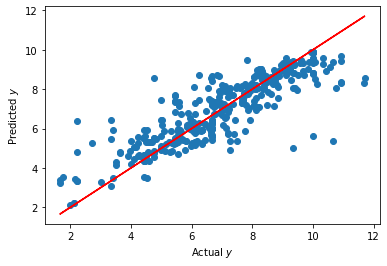

In [321]:
plt.scatter(Y_test,y_pred)
plt.plot(Y_test,Y_test,"r") 
plt.ylabel("Predicted $y$")
plt.xlabel("Actual $y$")
plt.show()

Make prediction using test data set for submission on Kaggle

In [325]:
#Use the model to make predictions
predicted_prices = lr1.predict(X_scaledtest)

my_submission = pd.DataFrame({'Index': df_test['Index'], 'avg_price_per_kg': predicted_prices})

my_submission.to_csv('lr1.csv', index=False)

2. ExtraTreesRegressor

In [326]:
print("Testing:")
print('MSE:', metrics.mean_squared_error(Y_test, y_pred))
print('R_squared:', metrics.r2_score(Y_test, y_pred))

Testing:
MSE: 4.052208603228878
R_squared: -0.005785814967552705


Model fitting and evaluation

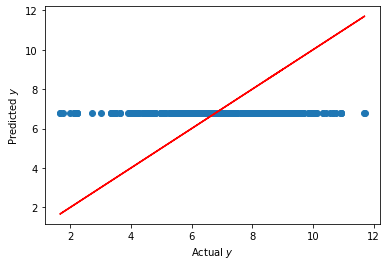

In [327]:
plt.scatter(Y_test,y_pred)
plt.plot(Y_test,Y_test,"r") 
plt.ylabel("Predicted $y$")
plt.xlabel("Actual $y$")
plt.show()

Make prediction using test data set for submission on Kaggle

In [ ]:
predicted_prices = etr1.predict(X_scaledtest)

my_submission = pd.DataFrame({'Index': df_test['Index'], 'avg_price_per_kg': predicted_prices})

my_submission.to_csv('etr1.csv', index=False)

Kaggle score:0.78185


3. GradientBoostRegressor

In [328]:
print("Testing:")
print('MSE:', metrics.mean_squared_error(Y_test, y_pred))
print('R_squared:', metrics.r2_score(Y_test, y_pred))

Testing:
MSE: 4.052208603228878
R_squared: -0.005785814967552705


Model fitting and evaluation

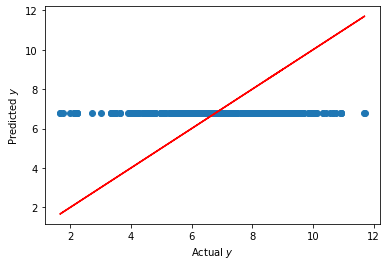

In [329]:
plt.scatter(Y_test,y_pred)
plt.plot(Y_test,Y_test,"r") 
plt.ylabel("Predicted $y$")
plt.xlabel("Actual $y$")
plt.show()

Make prediction using test data set for submission on Kaggle

In [ ]:
#Use the model to make predictions
predicted_prices = gbr1.predict(X_scaledtest)

my_submission = pd.DataFrame({'Index': df_test['Index'], 'avg_price_per_kg': predicted_prices})

my_submission.to_csv('gbr1.csv', index=False)

Kaggle score :1.00539


4 . XGBoostRegressor

In [330]:
print("Testing:")
print('MSE:', metrics.mean_squared_error(Y_test, y_pred))
print('R_squared:', metrics.r2_score(Y_test, y_pred))

Testing:
MSE: 4.052208603228878
R_squared: -0.005785814967552705


Model fitting and evaluation


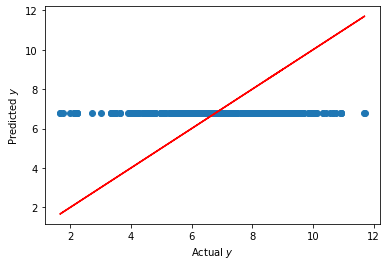

In [331]:
plt.scatter(Y_test,y_pred)
plt.plot(Y_test,Y_test,"r") 
plt.ylabel("Predicted $y$")
plt.xlabel("Actual $y$")
plt.show()

Make prediction using test data set for submission on Kaggle

In [ ]:
#Use the model to make predictions
predicted_prices = xgb1.predict(X_scaledtest)

my_submission = pd.DataFrame({'Index': df_test['Index'], 'avg_price_per_kg': predicted_prices})

my_submission.to_csv('xgb1.csv', index=False)

kaggle score: 0.93533


5. RandomForestRegressor 

In [332]:
print("Testing:")
print('MSE:', metrics.mean_squared_error(Y_test, y_pred))
print('R_squared:', metrics.r2_score(Y_test, y_pred))

Testing:
MSE: 4.052208603228878
R_squared: -0.005785814967552705


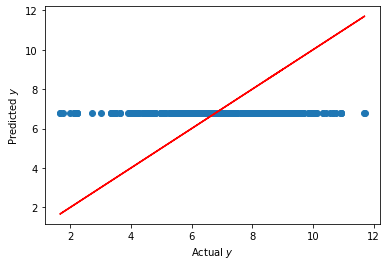

In [333]:
plt.scatter(Y_test,y_pred)
plt.plot(Y_test,Y_test,"r") 
plt.ylabel("Predicted $y$")
plt.xlabel("Actual $y$")
plt.show()

Make prediction using test data set for submission on Kaggle

In [ ]:
#Use the model to make predictions
predicted_prices = rfr1.predict(X_scaledtest)

my_submission = pd.DataFrame({'Index': df_test['Index'], 'avg_price_per_kg': predicted_prices})

my_submission.to_csv('rfr2.csv', index=False)

kaggle score:1.10843


6. AdaBoostRegressor with CatBoost

In [335]:
print("Testing:")
print('MSE:', metrics.mean_squared_error(Y_test, y_pred))
print('R_squared:', metrics.r2_score(Y_test, y_pred))

Testing:
MSE: 4.052208603228878
R_squared: -0.005785814967552705


Model fitting and evaluation

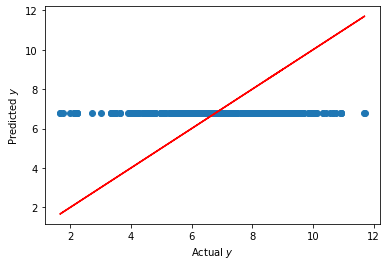

In [336]:
plt.scatter(Y_test,y_pred)
plt.plot(Y_test,Y_test,"r") 
plt.ylabel("Predicted $y$")
plt.xlabel("Actual $y$")
plt.show()

Make prediction using test data set for submission on Kaggle

In [ ]:
#Use the model to make predictions
predicted_prices = ada1.predict(X_scaledtest)

my_submission = pd.DataFrame({'Index': df_test['Index'], 'avg_price_per_kg': predicted_prices})

my_submission.to_csv('ada1.csv', index=False)

kaggle score: 0.80599


7. SVM(Support Vector Mechine)

In [337]:
print("Testing:")
print('MSE:', metrics.mean_squared_error(Y_test, y_pred))
print('R_squared:', metrics.r2_score(Y_test, y_pred))

Testing:
MSE: 4.052208603228878
R_squared: -0.005785814967552705


Model fitting and evaluation

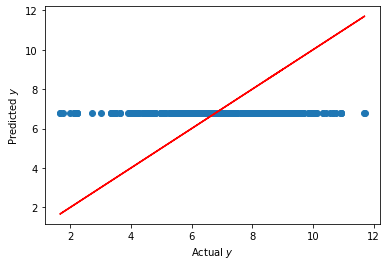

In [338]:
plt.scatter(Y_test,y_pred)
plt.plot(Y_test,Y_test,"r") 
plt.ylabel("Predicted $y$")
plt.xlabel("Actual $y$")
plt.show()

In [ ]:
#Use the model to make predictions
predicted_prices = clf1.predict(X_scaledtest)

my_submission = pd.DataFrame({'Index': df_test['Index'], 'avg_price_per_kg': predicted_prices})

my_submission.to_csv('clf1.csv', index=False)

kaggle score: 1.39587


## 10. Saving important data 
<a id='save'></a>
[Back to table of contents](#toc)

### Save the models

We will Pickled one model that gave us a better prediction of the average prive per kilogram

In [316]:
#ExtraTreesRegressor
with open('Extra_Trees_Regressor.pkl','wb') as file:
    pickle.dump(etr,file)


## 11. Conclusion
<a id='conclude'></a>
[Back to table of contents](#toc)

The decision is to go with the Extra Tree Regressor. Few things to consider:

- The Extra Trees algorithm works by creating a large number of unpruned decision trees from the training dataset. Predictions are made by averaging the prediction of the decision trees in the case of regression or using majority voting in the case of predictions.
- Extra Trees adds randomization but still has optimization.

It seems like our ExtraTreesRegressor model will generalize the best to new unseen data, which is what we ultimately expect our model to do.  

So after some data cleaning, extensive analysis and hyperparameter tweaking we found our best model to be ExtreTreesRegressor. with a kaggle score of (0.78185)  which was a better score we got compared to other models that we used.

